### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve  
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import catboost as cat
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('V5_2019.csv')

In [4]:
pd.options.display.max_columns = None

In [5]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,568269,42641,172.16.0.5-192.168.50.4-55989-50529-17,172.16.0.5,55989,192.168.50.4,50529,17,2018-11-03 10:34:48.345746,1,2,0,888.0,0.0,444.0,444.0,444.0,0.000000,0.0,0.0,0.0,0.0,8.880000e+08,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.0,444.0,444.0,444.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,666.000000,444.0,0.0,40,0,0,0,0,0,0,2,888,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
1,1,3914458,89976,172.16.0.5-192.168.50.4-61850-36734-17,172.16.0.5,61850,192.168.50.4,36734,17,2018-11-03 10:40:17.959592,50,2,0,862.0,0.0,431.0,431.0,431.0,0.000000,0.0,0.0,0.0,0.0,1.724000e+07,4.000000e+04,50.000000,0.000000,50.0,50.0,50.0,50.000000,0.000000,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,4.000000e+04,0.0,431.0,431.0,431.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,646.500000,431.0,0.0,28,0,0,0,0,0,0,2,862,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
2,2,2789854,85749,172.16.0.5-192.168.50.4-39757-45349-17,172.16.0.5,39757,192.168.50.4,45349,17,2018-11-03 10:37:47.706365,2,2,0,1108.0,0.0,554.0,554.0,554.0,0.000000,0.0,0.0,0.0,0.0,5.540000e+08,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,0,1.000000e+06,0.0,554.0,554.0,554.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,831.000000,554.0,0.0,16,0,0,0,0,0,0,2,1108,0,0,-1,-1,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
3,3,2834358,86263,172.16.0.5-192.168.50.4-11300-20633-17,172.16.0.5,11300,192.168.50.4,20633,17,2018-11-03 10:37:51.304213,49,2,0,952.0,0.0,476.0,476.0,476.0,0.000000,0.0,0.0,0.0,0.0,1.942857e+07,4.081633e+04,49.000000,0.000000,49.0,49.0,49.0,49.000000,0.000000,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,4.081633e+04,0.0,476.0,476.0,476.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,714.000000,476.0,0.0,40,0,0,0,0,0,0,2,952,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
4,4,5649515,25038,172.16.0.5-192.168.50.4-61850-3134-17,172.16.0.5,61850,192.168.50.4,3134,17,2018-11-03 10:42:46.140707,1,2,0,2200.0,0.0,1100.0,1100.0,1100.0,0.000000,0.0,0.0,0.0,0.0,2.200000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.0,1100.0,1100.0,1100.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,1650.000000,1100.0,0.0,40,0,0,0,0,0,0,2,2200,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [6]:
df.shape

(1055831, 90)

In [7]:
df.Label.value_counts()

UDP        375394
MSSQL      290578
Syn        214258
NetBIOS    172729
BENIGN       2312
LDAP          560
Name: Label, dtype: int64

In [8]:
df.Label.value_counts()

UDP        375394
MSSQL      290578
Syn        214258
NetBIOS    172729
BENIGN       2312
LDAP          560
Name: Label, dtype: int64

In [9]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055831 entries, 0 to 1055830
Data columns (total 90 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0.2                 1055831 non-null  int64  
 1   Unnamed: 0.1                 1055831 non-null  int64  
 2   Unnamed: 0                   1055831 non-null  int64  
 3   Flow ID                      1055831 non-null  object 
 4   Source IP                    1055831 non-null  object 
 5   Source Port                  1055831 non-null  int64  
 6   Destination IP               1055831 non-null  object 
 7   Destination Port             1055831 non-null  int64  
 8   Protocol                     1055831 non-null  int64  
 9   Timestamp                    1055831 non-null  object 
 10  Flow Duration                1055831 non-null  int64  
 11  Total Fwd Packets            1055831 non-null  int64  
 12  Total Backward Packets       1055831 non-n

In [10]:
df=df.drop(columns=["Unnamed: 0", 'Unnamed: 0.1', 'Unnamed: 0.2', "Flow ID", "Source IP", 'Timestamp', "Destination IP", "SimillarHTTP"])

In [11]:
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]

print(f'Columns containing infinity values {inf_columns}')

Columns containing infinity values ['Flow Bytes/s', 'Flow Packets/s']


In [12]:
df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,55989,50529,17,1,2,0,888.0,0.0,444.0,444.0,444.0,0.000000,0.0,0.0,0.0,0.0,8.880000e+08,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.0,444.0,444.0,444.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,666.000000,444.0,0.0,40,0,0,0,0,0,0,2,888,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MSSQL
1,61850,36734,17,50,2,0,862.0,0.0,431.0,431.0,431.0,0.000000,0.0,0.0,0.0,0.0,1.724000e+07,4.000000e+04,50.000000,0.000000,50.0,50.0,50.0,50.000000,0.000000,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,4.000000e+04,0.0,431.0,431.0,431.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,646.500000,431.0,0.0,28,0,0,0,0,0,0,2,862,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MSSQL
2,39757,45349,17,2,2,0,1108.0,0.0,554.0,554.0,554.0,0.000000,0.0,0.0,0.0,0.0,5.540000e+08,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,0,1.000000e+06,0.0,554.0,554.0,554.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,831.000000,554.0,0.0,16,0,0,0,0,0,0,2,1108,0,0,-1,-1,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MSSQL
3,11300,20633,17,49,2,0,952.0,0.0,476.0,476.0,476.0,0.000000,0.0,0.0,0.0,0.0,1.942857e+07,4.081633e+04,49.000000,0.000000,49.0,49.0,49.0,49.000000,0.000000,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,4.081633e+04,0.0,476.0,476.0,476.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,714.000000,476.0,0.0,40,0,0,0,0,0,0,2,952,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MSSQL
4,61850,3134,17,1,2,0,2200.0,0.0,1100.0,1100.0,1100.0,0.000000,0.0,0.0,0.0,0.0,2.200000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.0,1100.0,1100.0,1100.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,1650.000000,1100.0,0.0,40,0,0,0,0,0,0,2,2200,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MSSQL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055826,49450,50809,17,1,2,0,786.0,0.0,393.0,393.0,393.0,0.000000,0.0,0.0,0.0,0.0,7.860000e+08,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,393.0,393.0,393.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,589.500000,393.0,0.0,-2,0,0,0,0,0,0,2,786,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDP
1055827,50002,45676,17,218763,6,0,2154.0,0.0,404.0,332.0,359.0,35.088460,0.0,0.0,0.0,0.0,9.846272e+03,

In [13]:
df.shape

(1055831, 82)

In [14]:

#df=df.drop(columns=['Flow Bytes/s', 'Flow Packets/s'])

In [15]:
#for col in inf_columns:
#    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
#    mean = df[col].mean()
#    df[col].fillna(mean, inplace=True)

In [16]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [17]:
df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0.971653,0.933001,0.50665,-0.148389,-0.066647,-0.131033,0.011468,-0.00661,0.487726,0.537663,0.516538,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149711,-0.151205,-0.149721,-0.003675,-0.148313,-0.153535,-0.151348,-0.149660,-0.003372,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,0.940649,-0.166291,0.537690,0.482447,0.519904,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,0.572696,0.516538,-0.064945,0.166589,0.0,0.0,0.0,0.0,0.0,0.0,-0.066647,0.011468,-0.131033,-0.00661,-0.494629,-0.012228,-0.302235,0.198211,-0.042754,-0.047673,-0.049225,-0.010712,-0.140771,-0.118903,-0.142282,-0.130281,0.045632,MSSQL
1,1.249117,0.201227,0.50665,-0.148382,-0.066647,-0.131033,-0.016099,-0.00661,0.431131,0.480623,0.459571,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149643,-0.151205,-0.149705,-0.001016,-0.148306,-0.153482,-0.151348,-0.149644,-0.000703,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,-1.111307,-0.166291,0.480648,0.426271,0.462908,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,0.515767,0.459571,-0.064945,0.166589,0.0,0.0,0.0,0.0,0.0,0.0,-0.066647,-0.016099,-0.131033,-0.00661,-0.494629,-0.012228,-0.302235,0.198211,-0.042754,-0.047673,-0.049225,-0.010712,-0.140771,-0.118903,-0.142282,-0.130281,0.045632,MSSQL
2,0.203220,0.658221,0.50665,-0.148389,-0.066647,-0.131033,0.244735,-0.00661,0.966609,1.020313,0.998565,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149709,-0.151205,-0.149721,-0.003621,-0.148312,-0.153534,-0.151348,-0.149659,-0.003318,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,-0.106267,-0.166291,1.020348,0.957778,1.002174,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,1.054404,0.998565,-0.064945,0.166589,0.0,0.0,0.0,0.0,0.0,0.0,-0.066647,0.244735,-0.131033,-0.00661,-0.494629,-0.012228,-0.302235,0.198211,-0.042754,-0.047673,-0.049225,-0.010712,-0.140771,-0.118903,-0.142282,-0.130281,0.045632,MSSQL
3,-1.143953,-0.652871,0.50665,-0.148383,-0.066647,-0.131033,0.079328,-0.00661,0.627037,0.678070,0.656764,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149644,-0.151205,-0.149705,-0.001070,-0.148306,-0.153483,-0.151348,-0.149644,-0.000758,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,-1.110453,-0.166291,0.678099,0.620725,0.660200,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,0.712829,0.656764,-0.064945,0.166589,0.0,0

In [18]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [19]:
df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0.971653,0.933001,0.50665,-0.148389,-0.066647,-0.131033,0.011468,-0.00661,0.487726,0.537663,0.516538,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149711,-0.151205,-0.149721,-0.003675,-0.148313,-0.153535,-0.151348,-0.149660,-0.003372,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,0.940649,-0.166291,0.537690,0.482447,0.519904,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,0.572696,0.516538,-0.064945,0.166589,0.0,0.0,0.0,0.0,0.0,0.0,-0.066647,0.011468,-0.131033,-0.00661,-0.494629,-0.012228,-0.302235,0.198211,-0.042754,-0.047673,-0.049225,-0.010712,-0.140771,-0.118903,-0.142282,-0.130281,0.045632,2
1,1.249117,0.201227,0.50665,-0.148382,-0.066647,-0.131033,-0.016099,-0.00661,0.431131,0.480623,0.459571,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149643,-0.151205,-0.149705,-0.001016,-0.148306,-0.153482,-0.151348,-0.149644,-0.000703,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,-1.111307,-0.166291,0.480648,0.426271,0.462908,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,0.515767,0.459571,-0.064945,0.166589,0.0,0.0,0.0,0.0,0.0,0.0,-0.066647,-0.016099,-0.131033,-0.00661,-0.494629,-0.012228,-0.302235,0.198211,-0.042754,-0.047673,-0.049225,-0.010712,-0.140771,-0.118903,-0.142282,-0.130281,0.045632,2
2,0.203220,0.658221,0.50665,-0.148389,-0.066647,-0.131033,0.244735,-0.00661,0.966609,1.020313,0.998565,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149709,-0.151205,-0.149721,-0.003621,-0.148312,-0.153534,-0.151348,-0.149659,-0.003318,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,-0.106267,-0.166291,1.020348,0.957778,1.002174,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,1.054404,0.998565,-0.064945,0.166589,0.0,0.0,0.0,0.0,0.0,0.0,-0.066647,0.244735,-0.131033,-0.00661,-0.494629,-0.012228,-0.302235,0.198211,-0.042754,-0.047673,-0.049225,-0.010712,-0.140771,-0.118903,-0.142282,-0.130281,0.045632,2
3,-1.143953,-0.652871,0.50665,-0.148383,-0.066647,-0.131033,0.079328,-0.00661,0.627037,0.678070,0.656764,-0.403855,-0.032271,-0.182924,-0.064945,-0.016876,0.0,0.0,-0.149644,-0.151205,-0.149705,-0.001070,-0.148306,-0.153483,-0.151348,-0.149644,-0.000758,-0.094418,-0.09372,-0.092825,-0.094715,-0.097627,-0.020232,0.0,0.0,0.0,0.166589,0.000972,-1.110453,-0.166291,0.678099,0.620725,0.660200,-0.353108,-0.036010,0.0,-0.006672,-0.020232,0.0,-0.504658,-0.035246,-0.024473,0.0,-0.266303,0.712829,0.656764,-0.064945,0.166589,0.0,0.0,0.0,0.0,0

In [20]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [22]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_test = rf.predict(X_test)
rf_train=rf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, rf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, rf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, rf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, rf_test, average='weighted')))
print(" ")
print(classification_report(y_test,rf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, rf_test, average=None)))

 
Accuracy of Random Forest: 0.9951176083384241
Precision of Random Forest: 0.9951402705756293
Recall of Random Forest: 0.9951176083384241
Average F1 of Random Forest: 0.995119987626008
 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       462
           1       0.99      0.97      0.98       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           1.00    211167
   macro avg       0.99      0.99      0.99    211167
weighted avg       1.00      1.00      1.00    211167

 
F1-score for each type of attack: [0.99568035 0.98198198 0.99137362 0.99979736 0.99964993 0.99329837]
CPU times: user 2min 14s, sys: 90 ms, total: 2min 14s
Wall time: 2min 14s


In [ ]:
lc = learn_curve(X_train,y_train,1,rf) 
print_graph(lc)

In [22]:
%%time
xgb = xgb.XGBClassifier().fit(X_train, y_train)
xgb.fit(X_train,y_train)
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, xgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, xgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, xgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, xgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,xgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, xgb_test, average=None)))

[16:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9953685945247127
Precision of XGBoost: 0.9953785576981841
Recall of XGBoost: 0.9953685945247127
Average F1 of XGBoost: 0.9953700363432699
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      0.98      0.99       112
           2       0.99      0.99      0.99     5811

[16:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[17:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

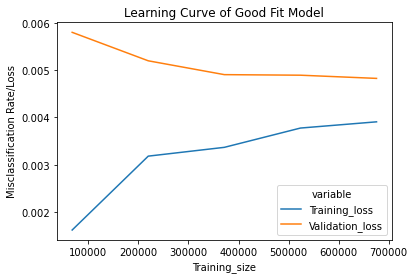

In [26]:
lc = learn_curve(X_train,y_train,1,xgb) 
print_graph(lc)

In [ ]:
%%time
cat = CatBoostClassifier().fit(X_train,y_train)
cat.fit(X_train,y_train)
cat_test = cat.predict(X_test)
cat_train = cat.predict(X_train)

print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, cat_test)))
print("Precision of CatBoost: "+ str(precision_score(y_test, cat_test, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, cat_test, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, cat_test, average='weighted')))
print(" ")
print(classification_report(y_test,cat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, cat_test, average=None)))

Learning rate set to 0.111579
0:	learn: 1.2863487	total: 800ms	remaining: 13m 19s
1:	learn: 1.0232677	total: 1.49s	remaining: 12m 25s
2:	learn: 0.8448032	total: 2.29s	remaining: 12m 41s
3:	learn: 0.7133735	total: 2.99s	remaining: 12m 23s
4:	learn: 0.6115244	total: 3.63s	remaining: 12m 2s
5:	learn: 0.5299687	total: 4.36s	remaining: 12m 2s
6:	learn: 0.4633010	total: 5.11s	remaining: 12m 4s
7:	learn: 0.4068546	total: 5.83s	remaining: 12m 3s
8:	learn: 0.3593035	total: 6.57s	remaining: 12m 3s
9:	learn: 0.3193486	total: 7.26s	remaining: 11m 59s
10:	learn: 0.2847010	total: 7.99s	remaining: 11m 58s
11:	learn: 0.2552165	total: 8.67s	remaining: 11m 53s
12:	learn: 0.2296275	total: 9.38s	remaining: 11m 51s
13:	learn: 0.2072478	total: 10.2s	remaining: 11m 56s
14:	learn: 0.1879330	total: 11s	remaining: 12m
15:	learn: 0.1710802	total: 11.7s	remaining: 12m
16:	learn: 0.1560090	total: 12.6s	remaining: 12m 5s
17:	learn: 0.1426481	total: 13.4s	remaining: 12m 11s
18:	learn: 0.1309038	total: 14.1s	remainin

156:	learn: 0.0179938	total: 1m 26s	remaining: 7m 43s
157:	learn: 0.0179187	total: 1m 26s	remaining: 7m 43s
158:	learn: 0.0179070	total: 1m 27s	remaining: 7m 41s
159:	learn: 0.0179050	total: 1m 27s	remaining: 7m 40s
160:	learn: 0.0178904	total: 1m 28s	remaining: 7m 38s
161:	learn: 0.0178508	total: 1m 28s	remaining: 7m 38s
162:	learn: 0.0178409	total: 1m 28s	remaining: 7m 37s
163:	learn: 0.0178358	total: 1m 29s	remaining: 7m 35s
164:	learn: 0.0178293	total: 1m 29s	remaining: 7m 34s
165:	learn: 0.0178094	total: 1m 30s	remaining: 7m 33s
166:	learn: 0.0177962	total: 1m 30s	remaining: 7m 32s
167:	learn: 0.0177648	total: 1m 31s	remaining: 7m 32s
168:	learn: 0.0177620	total: 1m 31s	remaining: 7m 30s
169:	learn: 0.0177519	total: 1m 32s	remaining: 7m 29s
170:	learn: 0.0177430	total: 1m 32s	remaining: 7m 28s
171:	learn: 0.0177104	total: 1m 32s	remaining: 7m 27s
172:	learn: 0.0176860	total: 1m 33s	remaining: 7m 26s
173:	learn: 0.0176728	total: 1m 33s	remaining: 7m 25s
174:	learn: 0.0176339	total:

310:	learn: 0.0158161	total: 2m 58s	remaining: 6m 36s
311:	learn: 0.0158125	total: 2m 59s	remaining: 6m 35s
312:	learn: 0.0158081	total: 2m 59s	remaining: 6m 34s
313:	learn: 0.0158043	total: 3m	remaining: 6m 33s
314:	learn: 0.0158011	total: 3m	remaining: 6m 33s
315:	learn: 0.0157966	total: 3m 1s	remaining: 6m 32s
316:	learn: 0.0157794	total: 3m 1s	remaining: 6m 31s
317:	learn: 0.0157738	total: 3m 2s	remaining: 6m 30s
318:	learn: 0.0157649	total: 3m 2s	remaining: 6m 30s
319:	learn: 0.0157565	total: 3m 3s	remaining: 6m 29s
320:	learn: 0.0157502	total: 3m 3s	remaining: 6m 28s
321:	learn: 0.0157406	total: 3m 4s	remaining: 6m 28s
322:	learn: 0.0157334	total: 3m 4s	remaining: 6m 27s
323:	learn: 0.0157273	total: 3m 5s	remaining: 6m 26s
324:	learn: 0.0157207	total: 3m 5s	remaining: 6m 26s
325:	learn: 0.0157025	total: 3m 6s	remaining: 6m 25s
326:	learn: 0.0156993	total: 3m 6s	remaining: 6m 24s
327:	learn: 0.0156893	total: 3m 7s	remaining: 6m 24s
328:	learn: 0.0156863	total: 3m 7s	remaining: 6m 

464:	learn: 0.0149307	total: 4m 26s	remaining: 5m 6s
465:	learn: 0.0149291	total: 4m 26s	remaining: 5m 5s
466:	learn: 0.0149246	total: 4m 27s	remaining: 5m 5s
467:	learn: 0.0149184	total: 4m 28s	remaining: 5m 4s
468:	learn: 0.0149132	total: 4m 28s	remaining: 5m 4s
469:	learn: 0.0149051	total: 4m 29s	remaining: 5m 4s
470:	learn: 0.0149040	total: 4m 30s	remaining: 5m 3s
471:	learn: 0.0149003	total: 4m 30s	remaining: 5m 3s
472:	learn: 0.0148979	total: 4m 31s	remaining: 5m 2s
473:	learn: 0.0148953	total: 4m 32s	remaining: 5m 2s
474:	learn: 0.0148930	total: 4m 32s	remaining: 5m 1s
475:	learn: 0.0148855	total: 4m 33s	remaining: 5m 1s
476:	learn: 0.0148798	total: 4m 34s	remaining: 5m
477:	learn: 0.0148787	total: 4m 34s	remaining: 4m 59s
478:	learn: 0.0148741	total: 4m 35s	remaining: 4m 59s
479:	learn: 0.0148714	total: 4m 35s	remaining: 4m 58s
480:	learn: 0.0148711	total: 4m 36s	remaining: 4m 58s
481:	learn: 0.0148674	total: 4m 37s	remaining: 4m 57s
482:	learn: 0.0148636	total: 4m 37s	remainin

617:	learn: 0.0143610	total: 5m 51s	remaining: 3m 37s
618:	learn: 0.0143586	total: 5m 52s	remaining: 3m 36s
619:	learn: 0.0143555	total: 5m 53s	remaining: 3m 36s
620:	learn: 0.0143545	total: 5m 53s	remaining: 3m 35s
621:	learn: 0.0143507	total: 5m 54s	remaining: 3m 35s
622:	learn: 0.0143467	total: 5m 55s	remaining: 3m 34s
623:	learn: 0.0143415	total: 5m 55s	remaining: 3m 34s
624:	learn: 0.0143355	total: 5m 56s	remaining: 3m 33s
625:	learn: 0.0143315	total: 5m 57s	remaining: 3m 33s
626:	learn: 0.0143257	total: 5m 57s	remaining: 3m 32s
627:	learn: 0.0143209	total: 5m 58s	remaining: 3m 32s
628:	learn: 0.0143180	total: 5m 59s	remaining: 3m 31s
629:	learn: 0.0143139	total: 5m 59s	remaining: 3m 31s
630:	learn: 0.0143083	total: 6m	remaining: 3m 30s
631:	learn: 0.0143058	total: 6m 1s	remaining: 3m 30s
632:	learn: 0.0143025	total: 6m 1s	remaining: 3m 29s
633:	learn: 0.0142989	total: 6m 2s	remaining: 3m 29s
634:	learn: 0.0142904	total: 6m 3s	remaining: 3m 28s
635:	learn: 0.0142877	total: 6m 3s	r

770:	learn: 0.0138720	total: 7m 26s	remaining: 2m 12s
771:	learn: 0.0138690	total: 7m 26s	remaining: 2m 11s
772:	learn: 0.0138676	total: 7m 27s	remaining: 2m 11s
773:	learn: 0.0138668	total: 7m 27s	remaining: 2m 10s
774:	learn: 0.0138621	total: 7m 28s	remaining: 2m 10s
775:	learn: 0.0138606	total: 7m 28s	remaining: 2m 9s
776:	learn: 0.0138579	total: 7m 29s	remaining: 2m 8s
777:	learn: 0.0138574	total: 7m 29s	remaining: 2m 8s
778:	learn: 0.0138551	total: 7m 30s	remaining: 2m 7s
779:	learn: 0.0138523	total: 7m 31s	remaining: 2m 7s
780:	learn: 0.0138514	total: 7m 31s	remaining: 2m 6s
781:	learn: 0.0138497	total: 7m 32s	remaining: 2m 6s
782:	learn: 0.0138480	total: 7m 32s	remaining: 2m 5s
783:	learn: 0.0138462	total: 7m 32s	remaining: 2m 4s
784:	learn: 0.0138449	total: 7m 33s	remaining: 2m 4s
785:	learn: 0.0138425	total: 7m 33s	remaining: 2m 3s
786:	learn: 0.0138410	total: 7m 34s	remaining: 2m 3s
787:	learn: 0.0138399	total: 7m 35s	remaining: 2m 2s
788:	learn: 0.0138359	total: 7m 35s	remai

924:	learn: 0.0135120	total: 8m 57s	remaining: 43.6s
925:	learn: 0.0135089	total: 8m 58s	remaining: 43s
926:	learn: 0.0135053	total: 8m 58s	remaining: 42.4s
927:	learn: 0.0135027	total: 8m 59s	remaining: 41.8s
928:	learn: 0.0135006	total: 8m 59s	remaining: 41.3s
929:	learn: 0.0134980	total: 9m	remaining: 40.7s
930:	learn: 0.0134969	total: 9m 1s	remaining: 40.1s
931:	learn: 0.0134959	total: 9m 1s	remaining: 39.5s
932:	learn: 0.0134931	total: 9m 2s	remaining: 38.9s
933:	learn: 0.0134911	total: 9m 3s	remaining: 38.4s
934:	learn: 0.0134886	total: 9m 3s	remaining: 37.8s
935:	learn: 0.0134853	total: 9m 4s	remaining: 37.2s
936:	learn: 0.0134847	total: 9m 5s	remaining: 36.6s
937:	learn: 0.0134829	total: 9m 5s	remaining: 36.1s
938:	learn: 0.0134801	total: 9m 6s	remaining: 35.5s
939:	learn: 0.0134765	total: 9m 6s	remaining: 34.9s
940:	learn: 0.0134736	total: 9m 7s	remaining: 34.3s
941:	learn: 0.0134685	total: 9m 8s	remaining: 33.8s
942:	learn: 0.0134679	total: 9m 9s	remaining: 33.2s
943:	learn: 

82:	learn: 0.0214104	total: 46.6s	remaining: 8m 34s
83:	learn: 0.0212077	total: 47.1s	remaining: 8m 33s
84:	learn: 0.0211769	total: 47.5s	remaining: 8m 31s
85:	learn: 0.0210736	total: 48.1s	remaining: 8m 30s
86:	learn: 0.0209813	total: 48.6s	remaining: 8m 30s
87:	learn: 0.0209248	total: 49.1s	remaining: 8m 29s
88:	learn: 0.0209041	total: 49.5s	remaining: 8m 27s
89:	learn: 0.0208494	total: 50.1s	remaining: 8m 26s
90:	learn: 0.0206692	total: 50.6s	remaining: 8m 25s
91:	learn: 0.0206261	total: 51s	remaining: 8m 23s
92:	learn: 0.0205529	total: 51.6s	remaining: 8m 23s
93:	learn: 0.0205304	total: 52s	remaining: 8m 21s
94:	learn: 0.0204503	total: 52.6s	remaining: 8m 20s
95:	learn: 0.0203381	total: 53.2s	remaining: 8m 20s
96:	learn: 0.0202001	total: 53.8s	remaining: 8m 21s
97:	learn: 0.0201632	total: 54.2s	remaining: 8m 19s
98:	learn: 0.0200793	total: 54.9s	remaining: 8m 19s
99:	learn: 0.0200581	total: 55.3s	remaining: 8m 17s
100:	learn: 0.0199543	total: 55.8s	remaining: 8m 16s
101:	learn: 0.0

237:	learn: 0.0165711	total: 2m 9s	remaining: 6m 55s
238:	learn: 0.0165555	total: 2m 10s	remaining: 6m 55s
239:	learn: 0.0165420	total: 2m 10s	remaining: 6m 54s
240:	learn: 0.0165296	total: 2m 11s	remaining: 6m 53s
241:	learn: 0.0165182	total: 2m 11s	remaining: 6m 52s
242:	learn: 0.0165031	total: 2m 12s	remaining: 6m 52s
243:	learn: 0.0164756	total: 2m 12s	remaining: 6m 51s
244:	learn: 0.0164629	total: 2m 13s	remaining: 6m 50s
245:	learn: 0.0164509	total: 2m 13s	remaining: 6m 49s
246:	learn: 0.0164489	total: 2m 14s	remaining: 6m 48s
247:	learn: 0.0164317	total: 2m 14s	remaining: 6m 48s
248:	learn: 0.0164117	total: 2m 15s	remaining: 6m 47s
249:	learn: 0.0163994	total: 2m 15s	remaining: 6m 46s
250:	learn: 0.0163954	total: 2m 16s	remaining: 6m 45s
251:	learn: 0.0163907	total: 2m 16s	remaining: 6m 45s
252:	learn: 0.0163758	total: 2m 17s	remaining: 6m 44s
253:	learn: 0.0163596	total: 2m 17s	remaining: 6m 44s
254:	learn: 0.0163356	total: 2m 18s	remaining: 6m 43s
255:	learn: 0.0163144	total: 

390:	learn: 0.0152919	total: 3m 36s	remaining: 5m 37s
391:	learn: 0.0152883	total: 3m 37s	remaining: 5m 37s
392:	learn: 0.0152850	total: 3m 38s	remaining: 5m 37s
393:	learn: 0.0152824	total: 3m 38s	remaining: 5m 36s
394:	learn: 0.0152773	total: 3m 39s	remaining: 5m 36s
395:	learn: 0.0152701	total: 3m 40s	remaining: 5m 36s
396:	learn: 0.0152692	total: 3m 40s	remaining: 5m 35s
397:	learn: 0.0152462	total: 3m 41s	remaining: 5m 35s
398:	learn: 0.0152402	total: 3m 42s	remaining: 5m 35s
399:	learn: 0.0152366	total: 3m 43s	remaining: 5m 35s
400:	learn: 0.0152344	total: 3m 44s	remaining: 5m 35s
401:	learn: 0.0152281	total: 3m 45s	remaining: 5m 34s
402:	learn: 0.0152221	total: 3m 45s	remaining: 5m 34s
403:	learn: 0.0152163	total: 3m 46s	remaining: 5m 34s
404:	learn: 0.0152141	total: 3m 47s	remaining: 5m 34s
405:	learn: 0.0152120	total: 3m 48s	remaining: 5m 34s
406:	learn: 0.0152113	total: 3m 49s	remaining: 5m 33s
407:	learn: 0.0152039	total: 3m 50s	remaining: 5m 33s
408:	learn: 0.0152033	total:

In [ ]:
lccat = learn_curve(X_train,y_train,1,cat) 
print_graph(lccat)

In [21]:
%%time
light = lgb.LGBMClassifier().fit(X_train, y_train) 
light.fit(X_train,y_train)
light_train = light.predict(X_train)
light_test = light.predict(X_test) 

print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, light_test)))
print("Precision of LightGBM: "+ str(precision_score(y_test, light_test, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, light_test, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, light_test, average='weighted')))
print(" ")
print(classification_report(y_test,light_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, light_test, average=None)))

Accuracy of LightGBM: 0.8972898227469254
Precision of LightGBM: 0.9242877165229556
Recall of LightGBM: 0.8972898227469254
Average F1 of LightGBM: 0.8984297841990306
 
              precision    recall  f1-score   support

           0       0.99      0.50      0.66       462
           1       0.00      0.00      0.00       112
           2       0.98      0.98      0.98     58116
           3       1.00      0.99      0.99     34546
           4       0.69      1.00      0.81     42852
           5       0.99      0.74      0.84     75079

    accuracy                           0.90    211167
   macro avg       0.77      0.70      0.71    211167
weighted avg       0.92      0.90      0.90    211167

 
F1-score for each type of attack: [0.65994236 0.         0.97759783 0.99254328 0.81439484 0.84461575]
CPU times: user 2min 3s, sys: 39.2 ms, total: 2min 3s
Wall time: 2min 3s


In [20]:
df.Label.value_counts()

5    375394
2    290578
4    214258
3    172729
0      2312
1       560
Name: Label, dtype: int64

In [103]:
df.shape

(1055831, 20)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055831 entries, 0 to 1055830
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source Port                  1055831 non-null  float64
 1   Destination Port             1055831 non-null  float64
 2   Protocol                     1055831 non-null  float64
 3   Flow Duration                1055831 non-null  float64
 4   Total Fwd Packets            1055831 non-null  float64
 5   Total Backward Packets       1055831 non-null  float64
 6   Total Length of Fwd Packets  1055831 non-null  float64
 7   Total Length of Bwd Packets  1055831 non-null  float64
 8   Fwd Packet Length Max        1055831 non-null  float64
 9   Fwd Packet Length Min        1055831 non-null  float64
 10  Fwd Packet Length Mean       1055831 non-null  float64
 11  Fwd Packet Length Std        1055831 non-null  float64
 12  Bwd Packet Length Max        1055831 non-n

# Feature Selection

In [23]:
#removing columns where variation(std) is 0 
df=df.drop('Flow Bytes/s',axis=1)
df=df.drop('Bwd URG Flags',axis=1)
df=df.drop('Fwd URG Flags',axis=1)
df=df.drop('FIN Flag Count',axis=1)
df=df.drop('Flow Packets/s',axis=1)
df=df.drop('Bwd PSH Flags',axis=1)
df=df.drop('PSH Flag Count',axis=1)
df=df.drop('Bwd Avg Bulk Rate',axis=1)
df=df.drop('Bwd Avg Packets/Bulk',axis=1)
df=df.drop('Bwd Avg Bytes/Bulk',axis=1)
df=df.drop('ECE Flag Count',axis=1)
df=df.drop('Fwd Avg Packets/Bulk',axis=1)
df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
df=df.drop('Fwd Avg Bulk Rate', axis=1)

In [22]:
df.shape

(1055831, 82)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055831 entries, 0 to 1055830
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source Port                  1055831 non-null  float64
 1   Destination Port             1055831 non-null  float64
 2   Protocol                     1055831 non-null  float64
 3   Flow Duration                1055831 non-null  float64
 4   Total Fwd Packets            1055831 non-null  float64
 5   Total Backward Packets       1055831 non-null  float64
 6   Total Length of Fwd Packets  1055831 non-null  float64
 7   Total Length of Bwd Packets  1055831 non-null  float64
 8   Fwd Packet Length Max        1055831 non-null  float64
 9   Fwd Packet Length Min        1055831 non-null  float64
 10  Fwd Packet Length Mean       1055831 non-null  float64
 11  Fwd Packet Length Std        1055831 non-null  float64
 12  Bwd Packet Length Max        1055831 non-n

<AxesSubplot:>

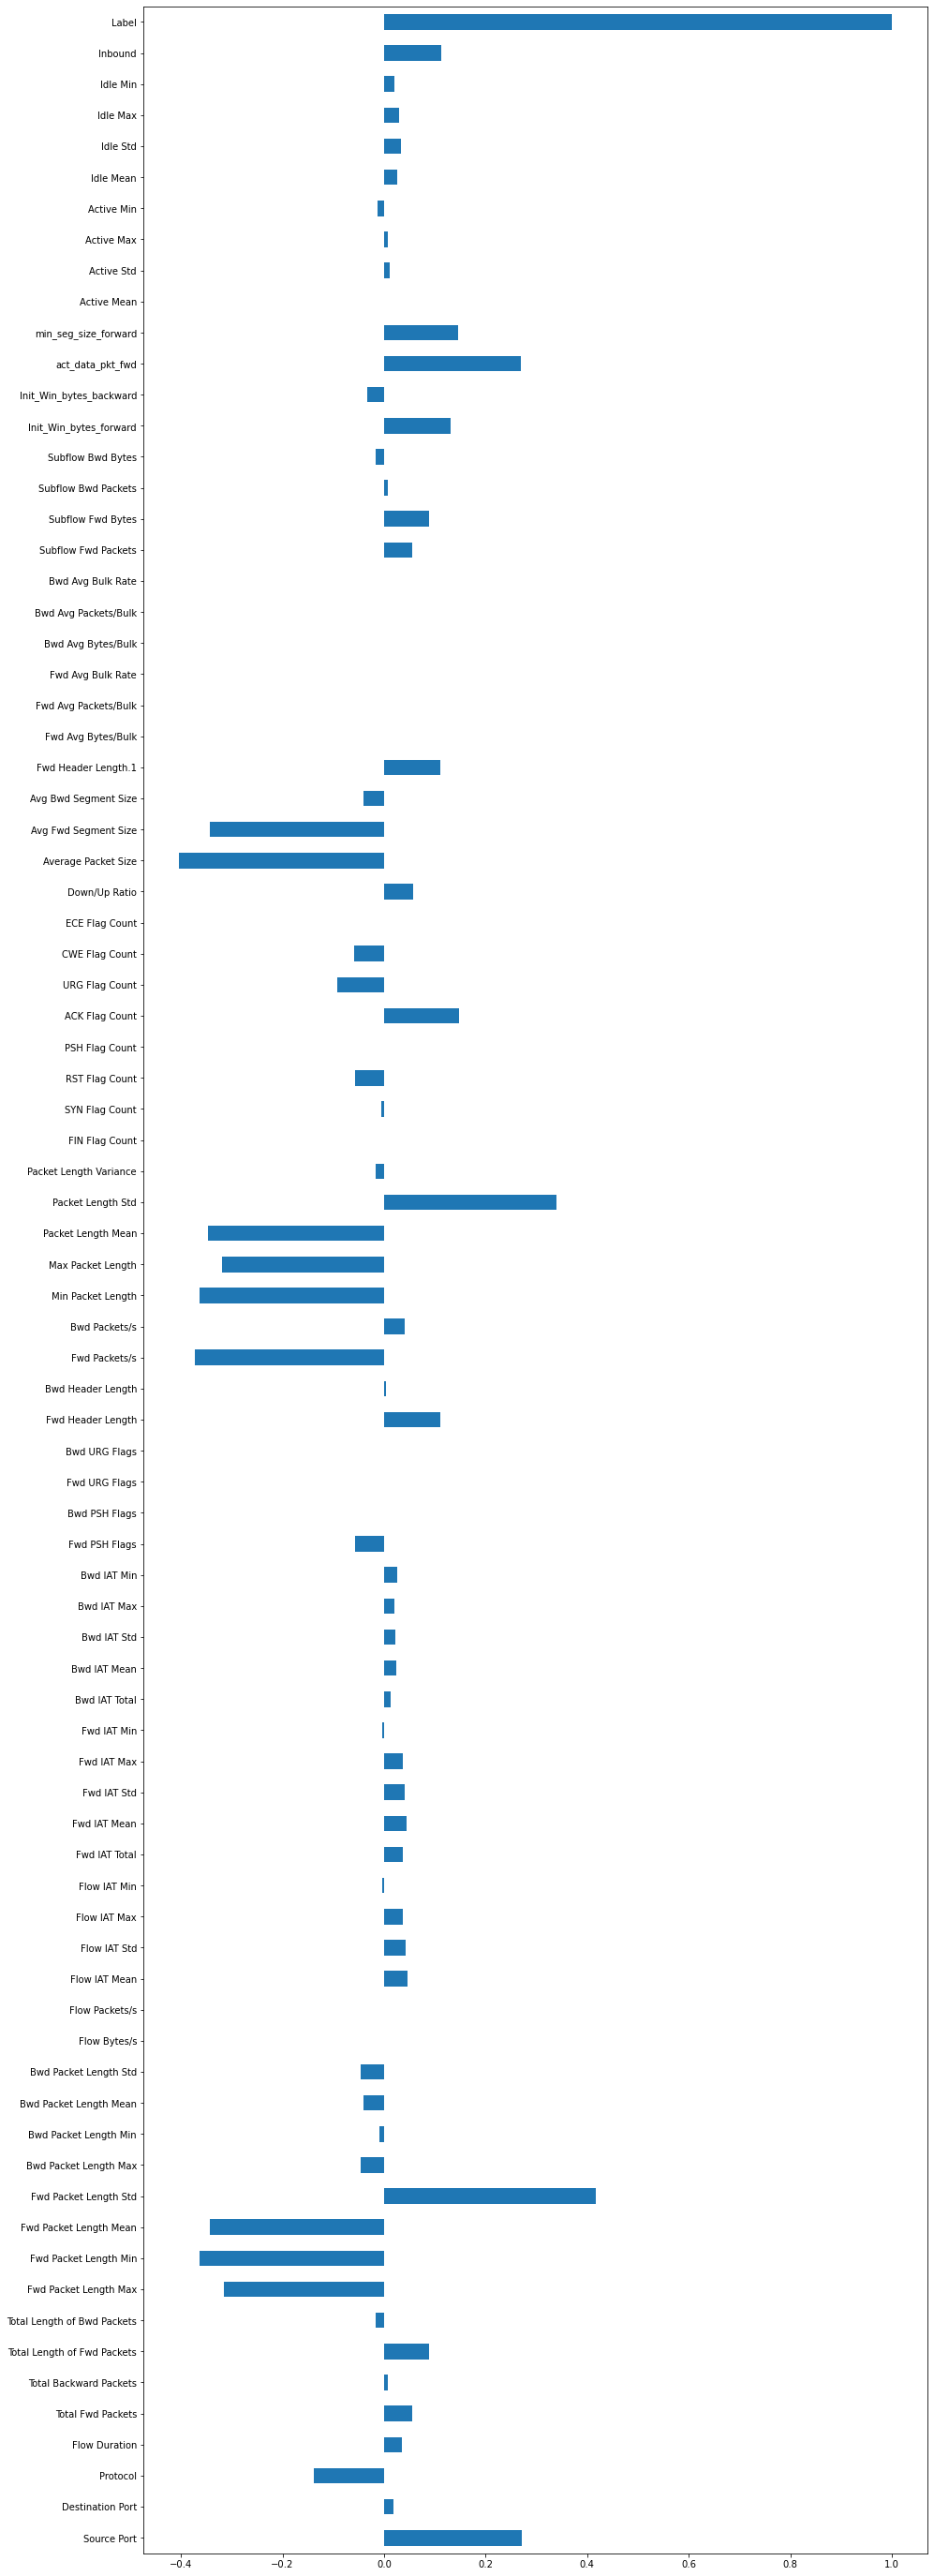

In [24]:
# correlation between target and features
(df.corr().loc['Label']
 .plot(kind='barh', figsize=(15,50)))

In [25]:
# drop uncorrelated numeric features (threshold <0.2)
corr = abs(df.corr().loc['Label'])
corr = corr[corr<0.15]
cols_to_drop = corr.index.to_list()
df = df.drop(cols_to_drop, axis=1)

In [26]:
df.shape # (1055831, 28)

(1055831, 28)

In [27]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(n_estimators=250,random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=0)

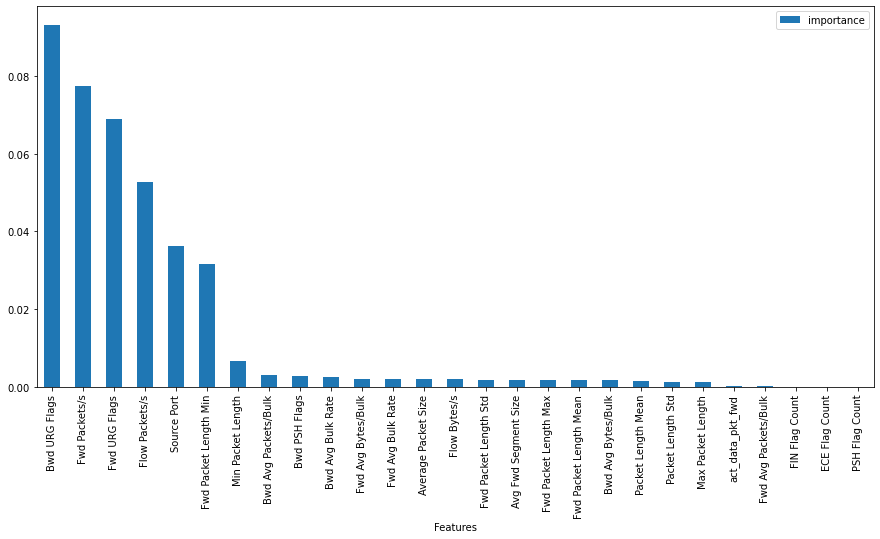

In [28]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
refclasscol=list(df.columns.values)
impocol = pd.DataFrame({'Features':refclasscol[0:27],'importance':importances[0:27]})
impocol = impocol.sort_values('importance',ascending=False).set_index('Features')

plt.rcParams['figure.figsize'] = (15, 7)
impocol.plot.bar();

In [29]:
impocol.tail(28)

,importance
Features,
Bwd URG Flags,0.093237
Fwd Packets/s,0.077384
Fwd URG Flags,0.068952
Flow Packets/s,0.052622
Source Port,0.036341
Fwd Packet Length Min,0.031640
Min Packet Length,0.006561
Bwd Avg Packets/Bulk,0.003123
Bwd PSH Flags,0.002786


In [30]:
impocol.head(20)

,importance
Features,
Bwd URG Flags,0.093237
Fwd Packets/s,0.077384
Fwd URG Flags,0.068952
Flow Packets/s,0.052622
Source Port,0.036341
Fwd Packet Length Min,0.031640
Min Packet Length,0.006561
Bwd Avg Packets/Bulk,0.003123
Bwd PSH Flags,0.002786


In [31]:
impocol.tail(8) 

,importance
Features,
Packet Length Mean,0.001598
Packet Length Std,0.001318
Max Packet Length,0.001145
act_data_pkt_fwd,0.000169
Fwd Avg Packets/Bulk,0.000167
FIN Flag Count,0.000005
ECE Flag Count,0.000000
PSH Flag Count,0.000000


In [32]:
df = df.drop(columns=['PSH Flag Count', "ECE Flag Count", "FIN Flag Count", "Fwd Avg Packets/Bulk", "act_data_pkt_fwd", 
                      "Max Packet Length", "Packet Length Std", "Packet Length Mean"])

In [33]:
df.shape

(1055831, 20)

In [34]:
X_train.shape

(844664, 81)

In [35]:
#X = df.drop(['Label'],axis=1).values
#y = df.iloc[:, -1].values.reshape(-1,1)
#y=np.ravel(y)
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [36]:
#df.shape

(1055831, 20)

In [37]:
#X_train.shape

(844664, 19)

# SMOTE for Imbalanced data

In [38]:
pd.Series(y_train).value_counts()

5    300315
2    232462
4    171406
3    138183
0      1850
1       448
dtype: int64

In [39]:
smote=SMOTE(n_jobs=-1,sampling_strategy={0:138183, 1:138183})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [40]:
pd.Series(y_train).value_counts()

5    300315
2    232462
4    171406
3    138183
1    138183
0    138183
dtype: int64

In [41]:
#2:DrDoSLDAP
#7:DrDoSSSDP
#11:UDPlag

In [42]:
le = preprocessing.LabelEncoder()

def learn_curve(X,y,c,m):
    
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() 
    y = le.fit_transform(y)

    model = m

    lr = Pipeline(steps=(['scaler',sc], ['classifier',model]))
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) 
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) 
    
    lr.fit(X,y) 

    train_score = lr.score(X,y) 
    
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1) 
    test_scores = 1-np.mean(test_scores,axis=1) 
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores":cv_scores, "train_score":train_score, "learning_curve":lc}

In [43]:
def print_graph (lc):
  
    print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
    Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
    Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
    Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
    plt.rcParams['figure.figsize'] = (6, 4)
    fig.autofmt_xdate()

    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    plt.title("")
    plt.ylabel("Misclassification Rate/Loss");

In [44]:
def print_graph (lc):
    
    fig = plt.figure(figsize=(6,4))    
    plt.rcParams["figure.autolayout"] = True
    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    
    #plt.xlim([100000, 900000])
    #plt.ylim([0,  0.014])
    
    fig.autofmt_xdate()
    
    plt.title("Learning Curve of Good Fit Model")
    plt.ylabel("Misclassification Rate/Loss");

# Random Forest 

In [45]:
%%time
rf = RandomForestClassifier().fit(X_train,y_train)
rf_test = rf.predict(X_test)
rf_train=rf.predict(X_train)

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, rf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, rf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, rf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, rf_test, average='weighted')))
print(" ")
print(classification_report(y_test,rf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, rf_test, average=None)))

Accuracy of Random Forest: 0.9949802762742285
Precision of Random Forest: 0.9953337860570216
Recall of Random Forest: 0.9949802762742285
Average F1 of Random Forest: 0.9950831098746472
 
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       462
           1       0.97      0.99      0.98       112
           2       1.00      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      0.99      1.00     42852
           5       0.99      1.00      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.94      0.99      0.96    211167
weighted avg       1.00      0.99      1.00    211167

 
F1-score for each type of attack: [0.79615048 0.98230088 0.9931194  0.99984078 0.99685266 0.99464722]
Wall time: 2min 20s


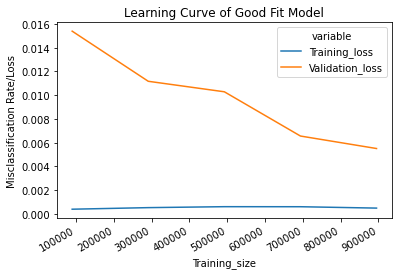

In [46]:
lcrf = learn_curve(X_train,y_train,1,rf) 
print_graph(lcrf)

In [67]:
%%time
cat = CatBoostClassifier().fit(X_train,y_train)
cat.fit(X_train,y_train)
cat_test = cat.predict(X_test)
cat_train = cat.predict(X_train)

print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, cat_test)))
print("Precision of CatBoost: "+ str(precision_score(y_test, cat_test, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, cat_test, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, cat_test, average='weighted')))
print(" ")
print(classification_report(y_test,cat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, cat_test, average=None)))

Learning rate set to 0.11319
0:	learn: 1.2916540	total: 251ms	remaining: 4m 10s
1:	learn: 1.0339092	total: 489ms	remaining: 4m 4s
2:	learn: 0.8580175	total: 749ms	remaining: 4m 8s
3:	learn: 0.7298542	total: 1.01s	remaining: 4m 12s
4:	learn: 0.6295875	total: 1.25s	remaining: 4m 8s
5:	learn: 0.5489887	total: 1.49s	remaining: 4m 7s
6:	learn: 0.4823272	total: 1.74s	remaining: 4m 6s
7:	learn: 0.4273656	total: 1.98s	remaining: 4m 5s
8:	learn: 0.3789244	total: 2.24s	remaining: 4m 6s
9:	learn: 0.3376085	total: 2.5s	remaining: 4m 7s
10:	learn: 0.3041449	total: 2.75s	remaining: 4m 7s
11:	learn: 0.2740930	total: 3.01s	remaining: 4m 7s
12:	learn: 0.2479381	total: 3.27s	remaining: 4m 8s
13:	learn: 0.2249062	total: 3.53s	remaining: 4m 8s
14:	learn: 0.2052916	total: 3.78s	remaining: 4m 8s
15:	learn: 0.1879800	total: 4.04s	remaining: 4m 8s
16:	learn: 0.1722703	total: 4.29s	remaining: 4m 8s
17:	learn: 0.1588943	total: 4.54s	remaining: 4m 7s
18:	learn: 0.1466308	total: 4.82s	remaining: 4m 8s
19:	learn: 

158:	learn: 0.0218096	total: 41.5s	remaining: 3m 39s
159:	learn: 0.0217664	total: 41.8s	remaining: 3m 39s
160:	learn: 0.0217141	total: 42.1s	remaining: 3m 39s
161:	learn: 0.0216771	total: 42.4s	remaining: 3m 39s
162:	learn: 0.0216142	total: 42.7s	remaining: 3m 39s
163:	learn: 0.0215817	total: 42.9s	remaining: 3m 38s
164:	learn: 0.0215401	total: 43.2s	remaining: 3m 38s
165:	learn: 0.0215110	total: 43.4s	remaining: 3m 38s
166:	learn: 0.0214697	total: 43.7s	remaining: 3m 38s
167:	learn: 0.0214430	total: 44s	remaining: 3m 37s
168:	learn: 0.0214088	total: 44.2s	remaining: 3m 37s
169:	learn: 0.0213237	total: 44.5s	remaining: 3m 37s
170:	learn: 0.0212999	total: 44.8s	remaining: 3m 37s
171:	learn: 0.0212606	total: 45.1s	remaining: 3m 37s
172:	learn: 0.0212207	total: 45.4s	remaining: 3m 36s
173:	learn: 0.0211987	total: 45.6s	remaining: 3m 36s
174:	learn: 0.0211779	total: 45.9s	remaining: 3m 36s
175:	learn: 0.0211503	total: 46.1s	remaining: 3m 35s
176:	learn: 0.0210970	total: 46.4s	remaining: 3m

313:	learn: 0.0185763	total: 1m 24s	remaining: 3m 3s
314:	learn: 0.0185647	total: 1m 24s	remaining: 3m 3s
315:	learn: 0.0185613	total: 1m 24s	remaining: 3m 3s
316:	learn: 0.0185523	total: 1m 24s	remaining: 3m 3s
317:	learn: 0.0185463	total: 1m 25s	remaining: 3m 2s
318:	learn: 0.0185430	total: 1m 25s	remaining: 3m 2s
319:	learn: 0.0185335	total: 1m 25s	remaining: 3m 2s
320:	learn: 0.0185217	total: 1m 26s	remaining: 3m 2s
321:	learn: 0.0185130	total: 1m 26s	remaining: 3m 1s
322:	learn: 0.0185031	total: 1m 26s	remaining: 3m 1s
323:	learn: 0.0184998	total: 1m 26s	remaining: 3m 1s
324:	learn: 0.0184896	total: 1m 27s	remaining: 3m 1s
325:	learn: 0.0184781	total: 1m 27s	remaining: 3m
326:	learn: 0.0184686	total: 1m 27s	remaining: 3m
327:	learn: 0.0184580	total: 1m 28s	remaining: 3m
328:	learn: 0.0184541	total: 1m 28s	remaining: 3m
329:	learn: 0.0184410	total: 1m 28s	remaining: 2m 59s
330:	learn: 0.0184387	total: 1m 28s	remaining: 2m 59s
331:	learn: 0.0184312	total: 1m 29s	remaining: 2m 59s
33

466:	learn: 0.0175514	total: 2m 7s	remaining: 2m 25s
467:	learn: 0.0175501	total: 2m 7s	remaining: 2m 24s
468:	learn: 0.0175479	total: 2m 7s	remaining: 2m 24s
469:	learn: 0.0175445	total: 2m 7s	remaining: 2m 24s
470:	learn: 0.0175408	total: 2m 8s	remaining: 2m 24s
471:	learn: 0.0175362	total: 2m 8s	remaining: 2m 23s
472:	learn: 0.0175342	total: 2m 8s	remaining: 2m 23s
473:	learn: 0.0175294	total: 2m 9s	remaining: 2m 23s
474:	learn: 0.0175181	total: 2m 9s	remaining: 2m 23s
475:	learn: 0.0175149	total: 2m 9s	remaining: 2m 22s
476:	learn: 0.0175116	total: 2m 9s	remaining: 2m 22s
477:	learn: 0.0175019	total: 2m 10s	remaining: 2m 22s
478:	learn: 0.0174990	total: 2m 10s	remaining: 2m 21s
479:	learn: 0.0174949	total: 2m 10s	remaining: 2m 21s
480:	learn: 0.0174928	total: 2m 11s	remaining: 2m 21s
481:	learn: 0.0174879	total: 2m 11s	remaining: 2m 21s
482:	learn: 0.0174765	total: 2m 11s	remaining: 2m 20s
483:	learn: 0.0174729	total: 2m 11s	remaining: 2m 20s
484:	learn: 0.0174712	total: 2m 12s	rem

619:	learn: 0.0169579	total: 2m 52s	remaining: 1m 45s
620:	learn: 0.0169556	total: 2m 53s	remaining: 1m 45s
621:	learn: 0.0169515	total: 2m 53s	remaining: 1m 45s
622:	learn: 0.0169504	total: 2m 53s	remaining: 1m 45s
623:	learn: 0.0169481	total: 2m 53s	remaining: 1m 44s
624:	learn: 0.0169442	total: 2m 54s	remaining: 1m 44s
625:	learn: 0.0169427	total: 2m 54s	remaining: 1m 44s
626:	learn: 0.0169411	total: 2m 54s	remaining: 1m 43s
627:	learn: 0.0169395	total: 2m 55s	remaining: 1m 43s
628:	learn: 0.0169363	total: 2m 55s	remaining: 1m 43s
629:	learn: 0.0169340	total: 2m 55s	remaining: 1m 43s
630:	learn: 0.0169317	total: 2m 55s	remaining: 1m 42s
631:	learn: 0.0169298	total: 2m 56s	remaining: 1m 42s
632:	learn: 0.0169268	total: 2m 56s	remaining: 1m 42s
633:	learn: 0.0169250	total: 2m 56s	remaining: 1m 42s
634:	learn: 0.0169237	total: 2m 57s	remaining: 1m 41s
635:	learn: 0.0169232	total: 2m 57s	remaining: 1m 41s
636:	learn: 0.0169193	total: 2m 57s	remaining: 1m 41s
637:	learn: 0.0169186	total:

772:	learn: 0.0165411	total: 3m 36s	remaining: 1m 3s
773:	learn: 0.0165364	total: 3m 37s	remaining: 1m 3s
774:	learn: 0.0165347	total: 3m 37s	remaining: 1m 3s
775:	learn: 0.0165334	total: 3m 37s	remaining: 1m 2s
776:	learn: 0.0165328	total: 3m 37s	remaining: 1m 2s
777:	learn: 0.0165307	total: 3m 38s	remaining: 1m 2s
778:	learn: 0.0165281	total: 3m 38s	remaining: 1m 2s
779:	learn: 0.0165268	total: 3m 38s	remaining: 1m 1s
780:	learn: 0.0165253	total: 3m 39s	remaining: 1m 1s
781:	learn: 0.0165233	total: 3m 39s	remaining: 1m 1s
782:	learn: 0.0165212	total: 3m 39s	remaining: 1m
783:	learn: 0.0165183	total: 3m 39s	remaining: 1m
784:	learn: 0.0165168	total: 3m 40s	remaining: 1m
785:	learn: 0.0165143	total: 3m 40s	remaining: 1m
786:	learn: 0.0165131	total: 3m 40s	remaining: 59.8s
787:	learn: 0.0165114	total: 3m 41s	remaining: 59.5s
788:	learn: 0.0165097	total: 3m 41s	remaining: 59.2s
789:	learn: 0.0165085	total: 3m 41s	remaining: 59s
790:	learn: 0.0165055	total: 3m 42s	remaining: 58.7s
791:	le

929:	learn: 0.0162396	total: 4m 22s	remaining: 19.8s
930:	learn: 0.0162384	total: 4m 23s	remaining: 19.5s
931:	learn: 0.0162382	total: 4m 23s	remaining: 19.2s
932:	learn: 0.0162379	total: 4m 23s	remaining: 18.9s
933:	learn: 0.0162361	total: 4m 23s	remaining: 18.6s
934:	learn: 0.0162341	total: 4m 24s	remaining: 18.4s
935:	learn: 0.0162325	total: 4m 24s	remaining: 18.1s
936:	learn: 0.0162303	total: 4m 24s	remaining: 17.8s
937:	learn: 0.0162289	total: 4m 24s	remaining: 17.5s
938:	learn: 0.0162272	total: 4m 25s	remaining: 17.2s
939:	learn: 0.0162240	total: 4m 25s	remaining: 16.9s
940:	learn: 0.0162222	total: 4m 25s	remaining: 16.7s
941:	learn: 0.0162199	total: 4m 26s	remaining: 16.4s
942:	learn: 0.0162181	total: 4m 26s	remaining: 16.1s
943:	learn: 0.0162154	total: 4m 26s	remaining: 15.8s
944:	learn: 0.0162144	total: 4m 27s	remaining: 15.5s
945:	learn: 0.0162098	total: 4m 27s	remaining: 15.3s
946:	learn: 0.0162084	total: 4m 27s	remaining: 15s
947:	learn: 0.0162073	total: 4m 27s	remaining: 1

86:	learn: 0.0282076	total: 23.7s	remaining: 4m 8s
87:	learn: 0.0280775	total: 24s	remaining: 4m 8s
88:	learn: 0.0279418	total: 24.2s	remaining: 4m 7s
89:	learn: 0.0276844	total: 24.5s	remaining: 4m 7s
90:	learn: 0.0275475	total: 24.7s	remaining: 4m 6s
91:	learn: 0.0274187	total: 25s	remaining: 4m 6s
92:	learn: 0.0273013	total: 25.3s	remaining: 4m 6s
93:	learn: 0.0270184	total: 25.6s	remaining: 4m 6s
94:	learn: 0.0268394	total: 25.8s	remaining: 4m 6s
95:	learn: 0.0266989	total: 26.1s	remaining: 4m 6s
96:	learn: 0.0265243	total: 26.4s	remaining: 4m 5s
97:	learn: 0.0264386	total: 26.7s	remaining: 4m 5s
98:	learn: 0.0263305	total: 26.9s	remaining: 4m 5s
99:	learn: 0.0262333	total: 27.2s	remaining: 4m 4s
100:	learn: 0.0260563	total: 27.5s	remaining: 4m 4s
101:	learn: 0.0259508	total: 27.7s	remaining: 4m 4s
102:	learn: 0.0257683	total: 28s	remaining: 4m 4s
103:	learn: 0.0256584	total: 28.3s	remaining: 4m 3s
104:	learn: 0.0255347	total: 28.5s	remaining: 4m 3s
105:	learn: 0.0253635	total: 28.

243:	learn: 0.0195136	total: 1m 8s	remaining: 3m 31s
244:	learn: 0.0194964	total: 1m 8s	remaining: 3m 31s
245:	learn: 0.0194805	total: 1m 8s	remaining: 3m 30s
246:	learn: 0.0194543	total: 1m 9s	remaining: 3m 30s
247:	learn: 0.0194395	total: 1m 9s	remaining: 3m 30s
248:	learn: 0.0193983	total: 1m 9s	remaining: 3m 30s
249:	learn: 0.0193831	total: 1m 9s	remaining: 3m 29s
250:	learn: 0.0193528	total: 1m 10s	remaining: 3m 29s
251:	learn: 0.0193036	total: 1m 10s	remaining: 3m 29s
252:	learn: 0.0192878	total: 1m 10s	remaining: 3m 29s
253:	learn: 0.0192745	total: 1m 11s	remaining: 3m 28s
254:	learn: 0.0192660	total: 1m 11s	remaining: 3m 28s
255:	learn: 0.0192519	total: 1m 11s	remaining: 3m 28s
256:	learn: 0.0192438	total: 1m 11s	remaining: 3m 27s
257:	learn: 0.0192308	total: 1m 12s	remaining: 3m 27s
258:	learn: 0.0192158	total: 1m 12s	remaining: 3m 27s
259:	learn: 0.0192040	total: 1m 12s	remaining: 3m 27s
260:	learn: 0.0191865	total: 1m 13s	remaining: 3m 26s
261:	learn: 0.0191760	total: 1m 13s

396:	learn: 0.0179490	total: 1m 51s	remaining: 2m 49s
397:	learn: 0.0179461	total: 1m 52s	remaining: 2m 49s
398:	learn: 0.0179437	total: 1m 52s	remaining: 2m 49s
399:	learn: 0.0179385	total: 1m 52s	remaining: 2m 48s
400:	learn: 0.0179344	total: 1m 52s	remaining: 2m 48s
401:	learn: 0.0179204	total: 1m 53s	remaining: 2m 48s
402:	learn: 0.0179141	total: 1m 53s	remaining: 2m 48s
403:	learn: 0.0179073	total: 1m 53s	remaining: 2m 47s
404:	learn: 0.0178988	total: 1m 54s	remaining: 2m 47s
405:	learn: 0.0178927	total: 1m 54s	remaining: 2m 47s
406:	learn: 0.0178891	total: 1m 54s	remaining: 2m 47s
407:	learn: 0.0178823	total: 1m 54s	remaining: 2m 46s
408:	learn: 0.0178771	total: 1m 55s	remaining: 2m 46s
409:	learn: 0.0178739	total: 1m 55s	remaining: 2m 46s
410:	learn: 0.0178680	total: 1m 55s	remaining: 2m 45s
411:	learn: 0.0178631	total: 1m 56s	remaining: 2m 45s
412:	learn: 0.0178580	total: 1m 56s	remaining: 2m 45s
413:	learn: 0.0178530	total: 1m 56s	remaining: 2m 45s
414:	learn: 0.0178427	total:

549:	learn: 0.0171769	total: 2m 36s	remaining: 2m 8s
550:	learn: 0.0171741	total: 2m 36s	remaining: 2m 7s
551:	learn: 0.0171704	total: 2m 37s	remaining: 2m 7s
552:	learn: 0.0171672	total: 2m 37s	remaining: 2m 7s
553:	learn: 0.0171637	total: 2m 37s	remaining: 2m 6s
554:	learn: 0.0171614	total: 2m 38s	remaining: 2m 6s
555:	learn: 0.0171571	total: 2m 38s	remaining: 2m 6s
556:	learn: 0.0171511	total: 2m 38s	remaining: 2m 6s
557:	learn: 0.0171496	total: 2m 38s	remaining: 2m 5s
558:	learn: 0.0171430	total: 2m 39s	remaining: 2m 5s
559:	learn: 0.0171410	total: 2m 39s	remaining: 2m 5s
560:	learn: 0.0171357	total: 2m 39s	remaining: 2m 4s
561:	learn: 0.0171311	total: 2m 40s	remaining: 2m 4s
562:	learn: 0.0171294	total: 2m 40s	remaining: 2m 4s
563:	learn: 0.0171261	total: 2m 40s	remaining: 2m 4s
564:	learn: 0.0171239	total: 2m 40s	remaining: 2m 3s
565:	learn: 0.0171201	total: 2m 41s	remaining: 2m 3s
566:	learn: 0.0171174	total: 2m 41s	remaining: 2m 3s
567:	learn: 0.0171142	total: 2m 41s	remaining:

703:	learn: 0.0167256	total: 3m 21s	remaining: 1m 24s
704:	learn: 0.0167218	total: 3m 21s	remaining: 1m 24s
705:	learn: 0.0167179	total: 3m 22s	remaining: 1m 24s
706:	learn: 0.0167149	total: 3m 22s	remaining: 1m 23s
707:	learn: 0.0167135	total: 3m 22s	remaining: 1m 23s
708:	learn: 0.0167108	total: 3m 23s	remaining: 1m 23s
709:	learn: 0.0167072	total: 3m 23s	remaining: 1m 23s
710:	learn: 0.0167046	total: 3m 23s	remaining: 1m 22s
711:	learn: 0.0167022	total: 3m 24s	remaining: 1m 22s
712:	learn: 0.0167001	total: 3m 24s	remaining: 1m 22s
713:	learn: 0.0166978	total: 3m 24s	remaining: 1m 21s
714:	learn: 0.0166930	total: 3m 24s	remaining: 1m 21s
715:	learn: 0.0166909	total: 3m 25s	remaining: 1m 21s
716:	learn: 0.0166840	total: 3m 25s	remaining: 1m 21s
717:	learn: 0.0166811	total: 3m 25s	remaining: 1m 20s
718:	learn: 0.0166794	total: 3m 26s	remaining: 1m 20s
719:	learn: 0.0166778	total: 3m 26s	remaining: 1m 20s
720:	learn: 0.0166732	total: 3m 26s	remaining: 1m 20s
721:	learn: 0.0166680	total:

858:	learn: 0.0163751	total: 4m 8s	remaining: 40.7s
859:	learn: 0.0163740	total: 4m 8s	remaining: 40.4s
860:	learn: 0.0163719	total: 4m 8s	remaining: 40.1s
861:	learn: 0.0163704	total: 4m 8s	remaining: 39.8s
862:	learn: 0.0163684	total: 4m 9s	remaining: 39.6s
863:	learn: 0.0163671	total: 4m 9s	remaining: 39.3s
864:	learn: 0.0163657	total: 4m 9s	remaining: 39s
865:	learn: 0.0163631	total: 4m 10s	remaining: 38.7s
866:	learn: 0.0163623	total: 4m 10s	remaining: 38.4s
867:	learn: 0.0163602	total: 4m 10s	remaining: 38.1s
868:	learn: 0.0163557	total: 4m 11s	remaining: 37.8s
869:	learn: 0.0163531	total: 4m 11s	remaining: 37.6s
870:	learn: 0.0163517	total: 4m 11s	remaining: 37.3s
871:	learn: 0.0163513	total: 4m 11s	remaining: 37s
872:	learn: 0.0163506	total: 4m 12s	remaining: 36.7s
873:	learn: 0.0163496	total: 4m 12s	remaining: 36.4s
874:	learn: 0.0163487	total: 4m 12s	remaining: 36.1s
875:	learn: 0.0163466	total: 4m 13s	remaining: 35.8s
876:	learn: 0.0163433	total: 4m 13s	remaining: 35.5s
877:

Learning rate set to 0.111909
0:	learn: 1.2977181	total: 227ms	remaining: 3m 46s
1:	learn: 1.0404385	total: 431ms	remaining: 3m 34s
2:	learn: 0.8642642	total: 635ms	remaining: 3m 31s
3:	learn: 0.7359952	total: 841ms	remaining: 3m 29s
4:	learn: 0.6350404	total: 1.04s	remaining: 3m 27s
5:	learn: 0.5538608	total: 1.25s	remaining: 3m 26s
6:	learn: 0.4874276	total: 1.45s	remaining: 3m 26s
7:	learn: 0.4320359	total: 1.66s	remaining: 3m 26s
8:	learn: 0.3856848	total: 1.86s	remaining: 3m 25s
9:	learn: 0.3464408	total: 2.07s	remaining: 3m 25s
10:	learn: 0.3099379	total: 2.29s	remaining: 3m 26s
11:	learn: 0.2789744	total: 2.51s	remaining: 3m 26s
12:	learn: 0.2524262	total: 2.74s	remaining: 3m 27s
13:	learn: 0.2290759	total: 2.97s	remaining: 3m 28s
14:	learn: 0.2089871	total: 3.2s	remaining: 3m 30s
15:	learn: 0.1911759	total: 3.42s	remaining: 3m 30s
16:	learn: 0.1757669	total: 3.64s	remaining: 3m 30s
17:	learn: 0.1620480	total: 3.85s	remaining: 3m 29s
18:	learn: 0.1496011	total: 4.07s	remaining: 

157:	learn: 0.0223605	total: 35.1s	remaining: 3m 6s
158:	learn: 0.0223263	total: 35.3s	remaining: 3m 6s
159:	learn: 0.0223019	total: 35.5s	remaining: 3m 6s
160:	learn: 0.0222434	total: 35.7s	remaining: 3m 6s
161:	learn: 0.0222077	total: 35.9s	remaining: 3m 5s
162:	learn: 0.0221616	total: 36.2s	remaining: 3m 5s
163:	learn: 0.0221247	total: 36.4s	remaining: 3m 5s
164:	learn: 0.0220344	total: 36.6s	remaining: 3m 5s
165:	learn: 0.0219726	total: 36.8s	remaining: 3m 5s
166:	learn: 0.0219437	total: 37.1s	remaining: 3m 4s
167:	learn: 0.0219031	total: 37.3s	remaining: 3m 4s
168:	learn: 0.0218789	total: 37.5s	remaining: 3m 4s
169:	learn: 0.0218455	total: 37.7s	remaining: 3m 3s
170:	learn: 0.0217878	total: 37.9s	remaining: 3m 3s
171:	learn: 0.0217595	total: 38.1s	remaining: 3m 3s
172:	learn: 0.0216955	total: 38.4s	remaining: 3m 3s
173:	learn: 0.0216668	total: 38.6s	remaining: 3m 3s
174:	learn: 0.0216265	total: 38.9s	remaining: 3m 3s
175:	learn: 0.0215882	total: 39.1s	remaining: 3m 2s
176:	learn: 

313:	learn: 0.0186444	total: 1m 10s	remaining: 2m 34s
314:	learn: 0.0186326	total: 1m 11s	remaining: 2m 34s
315:	learn: 0.0186169	total: 1m 11s	remaining: 2m 34s
316:	learn: 0.0186069	total: 1m 11s	remaining: 2m 34s
317:	learn: 0.0186026	total: 1m 11s	remaining: 2m 34s
318:	learn: 0.0185960	total: 1m 12s	remaining: 2m 33s
319:	learn: 0.0185875	total: 1m 12s	remaining: 2m 33s
320:	learn: 0.0185762	total: 1m 12s	remaining: 2m 33s
321:	learn: 0.0185672	total: 1m 12s	remaining: 2m 33s
322:	learn: 0.0185589	total: 1m 12s	remaining: 2m 32s
323:	learn: 0.0185532	total: 1m 13s	remaining: 2m 32s
324:	learn: 0.0185387	total: 1m 13s	remaining: 2m 32s
325:	learn: 0.0185313	total: 1m 13s	remaining: 2m 32s
326:	learn: 0.0185250	total: 1m 13s	remaining: 2m 32s
327:	learn: 0.0185200	total: 1m 14s	remaining: 2m 31s
328:	learn: 0.0185100	total: 1m 14s	remaining: 2m 31s
329:	learn: 0.0184973	total: 1m 14s	remaining: 2m 31s
330:	learn: 0.0184891	total: 1m 14s	remaining: 2m 31s
331:	learn: 0.0184792	total:

466:	learn: 0.0175220	total: 1m 46s	remaining: 2m 1s
467:	learn: 0.0175141	total: 1m 46s	remaining: 2m 1s
468:	learn: 0.0175069	total: 1m 46s	remaining: 2m
469:	learn: 0.0175031	total: 1m 46s	remaining: 2m
470:	learn: 0.0174990	total: 1m 47s	remaining: 2m
471:	learn: 0.0174947	total: 1m 47s	remaining: 2m
472:	learn: 0.0174888	total: 1m 47s	remaining: 1m 59s
473:	learn: 0.0174845	total: 1m 47s	remaining: 1m 59s
474:	learn: 0.0174818	total: 1m 48s	remaining: 1m 59s
475:	learn: 0.0174737	total: 1m 48s	remaining: 1m 59s
476:	learn: 0.0174701	total: 1m 48s	remaining: 1m 59s
477:	learn: 0.0174665	total: 1m 48s	remaining: 1m 58s
478:	learn: 0.0174621	total: 1m 49s	remaining: 1m 58s
479:	learn: 0.0174594	total: 1m 49s	remaining: 1m 58s
480:	learn: 0.0174557	total: 1m 49s	remaining: 1m 58s
481:	learn: 0.0174510	total: 1m 49s	remaining: 1m 58s
482:	learn: 0.0174470	total: 1m 50s	remaining: 1m 57s
483:	learn: 0.0174449	total: 1m 50s	remaining: 1m 57s
484:	learn: 0.0174395	total: 1m 50s	remaining:

620:	learn: 0.0168739	total: 2m 22s	remaining: 1m 27s
621:	learn: 0.0168724	total: 2m 22s	remaining: 1m 26s
622:	learn: 0.0168690	total: 2m 23s	remaining: 1m 26s
623:	learn: 0.0168676	total: 2m 23s	remaining: 1m 26s
624:	learn: 0.0168644	total: 2m 23s	remaining: 1m 26s
625:	learn: 0.0168598	total: 2m 23s	remaining: 1m 25s
626:	learn: 0.0168555	total: 2m 24s	remaining: 1m 25s
627:	learn: 0.0168497	total: 2m 24s	remaining: 1m 25s
628:	learn: 0.0168372	total: 2m 24s	remaining: 1m 25s
629:	learn: 0.0168358	total: 2m 24s	remaining: 1m 24s
630:	learn: 0.0168328	total: 2m 24s	remaining: 1m 24s
631:	learn: 0.0168294	total: 2m 25s	remaining: 1m 24s
632:	learn: 0.0168276	total: 2m 25s	remaining: 1m 24s
633:	learn: 0.0168261	total: 2m 25s	remaining: 1m 24s
634:	learn: 0.0168198	total: 2m 25s	remaining: 1m 23s
635:	learn: 0.0168172	total: 2m 26s	remaining: 1m 23s
636:	learn: 0.0168138	total: 2m 26s	remaining: 1m 23s
637:	learn: 0.0168120	total: 2m 26s	remaining: 1m 23s
638:	learn: 0.0168102	total:

775:	learn: 0.0164291	total: 2m 58s	remaining: 51.4s
776:	learn: 0.0164277	total: 2m 58s	remaining: 51.2s
777:	learn: 0.0164273	total: 2m 58s	remaining: 51s
778:	learn: 0.0164255	total: 2m 58s	remaining: 50.7s
779:	learn: 0.0164237	total: 2m 59s	remaining: 50.5s
780:	learn: 0.0164218	total: 2m 59s	remaining: 50.3s
781:	learn: 0.0164190	total: 2m 59s	remaining: 50s
782:	learn: 0.0164174	total: 2m 59s	remaining: 49.8s
783:	learn: 0.0164167	total: 2m 59s	remaining: 49.6s
784:	learn: 0.0164144	total: 3m	remaining: 49.4s
785:	learn: 0.0164120	total: 3m	remaining: 49.1s
786:	learn: 0.0164098	total: 3m	remaining: 48.9s
787:	learn: 0.0164075	total: 3m 1s	remaining: 48.7s
788:	learn: 0.0164053	total: 3m 1s	remaining: 48.5s
789:	learn: 0.0164044	total: 3m 1s	remaining: 48.2s
790:	learn: 0.0164031	total: 3m 1s	remaining: 48s
791:	learn: 0.0164025	total: 3m 1s	remaining: 47.8s
792:	learn: 0.0164009	total: 3m 2s	remaining: 47.5s
793:	learn: 0.0163993	total: 3m 2s	remaining: 47.3s
794:	learn: 0.0163

932:	learn: 0.0161469	total: 3m 34s	remaining: 15.4s
933:	learn: 0.0161434	total: 3m 34s	remaining: 15.2s
934:	learn: 0.0161423	total: 3m 35s	remaining: 15s
935:	learn: 0.0161415	total: 3m 35s	remaining: 14.7s
936:	learn: 0.0161406	total: 3m 35s	remaining: 14.5s
937:	learn: 0.0161387	total: 3m 35s	remaining: 14.3s
938:	learn: 0.0161359	total: 3m 36s	remaining: 14s
939:	learn: 0.0161338	total: 3m 36s	remaining: 13.8s
940:	learn: 0.0161303	total: 3m 36s	remaining: 13.6s
941:	learn: 0.0161277	total: 3m 36s	remaining: 13.4s
942:	learn: 0.0161263	total: 3m 37s	remaining: 13.1s
943:	learn: 0.0161249	total: 3m 37s	remaining: 12.9s
944:	learn: 0.0161226	total: 3m 37s	remaining: 12.7s
945:	learn: 0.0161201	total: 3m 37s	remaining: 12.4s
946:	learn: 0.0161192	total: 3m 38s	remaining: 12.2s
947:	learn: 0.0161175	total: 3m 38s	remaining: 12s
948:	learn: 0.0161152	total: 3m 38s	remaining: 11.7s
949:	learn: 0.0161124	total: 3m 38s	remaining: 11.5s
950:	learn: 0.0161108	total: 3m 39s	remaining: 11.3s

89:	learn: 0.0284170	total: 20.2s	remaining: 3m 24s
90:	learn: 0.0282880	total: 20.4s	remaining: 3m 24s
91:	learn: 0.0280928	total: 20.7s	remaining: 3m 24s
92:	learn: 0.0279661	total: 20.9s	remaining: 3m 23s
93:	learn: 0.0277283	total: 21.2s	remaining: 3m 23s
94:	learn: 0.0276017	total: 21.4s	remaining: 3m 23s
95:	learn: 0.0275168	total: 21.6s	remaining: 3m 23s
96:	learn: 0.0273257	total: 21.8s	remaining: 3m 23s
97:	learn: 0.0271397	total: 22.1s	remaining: 3m 23s
98:	learn: 0.0270388	total: 22.3s	remaining: 3m 22s
99:	learn: 0.0268452	total: 22.5s	remaining: 3m 22s
100:	learn: 0.0266327	total: 22.8s	remaining: 3m 22s
101:	learn: 0.0265234	total: 23s	remaining: 3m 22s
102:	learn: 0.0264148	total: 23.2s	remaining: 3m 22s
103:	learn: 0.0262817	total: 23.5s	remaining: 3m 22s
104:	learn: 0.0262006	total: 23.7s	remaining: 3m 22s
105:	learn: 0.0261162	total: 23.9s	remaining: 3m 21s
106:	learn: 0.0260140	total: 24.1s	remaining: 3m 21s
107:	learn: 0.0259315	total: 24.4s	remaining: 3m 21s
108:	l

246:	learn: 0.0195607	total: 55.6s	remaining: 2m 49s
247:	learn: 0.0195489	total: 55.9s	remaining: 2m 49s
248:	learn: 0.0195156	total: 56.1s	remaining: 2m 49s
249:	learn: 0.0194963	total: 56.4s	remaining: 2m 49s
250:	learn: 0.0194845	total: 56.7s	remaining: 2m 49s
251:	learn: 0.0194780	total: 57s	remaining: 2m 49s
252:	learn: 0.0194576	total: 57.2s	remaining: 2m 48s
253:	learn: 0.0194354	total: 57.4s	remaining: 2m 48s
254:	learn: 0.0194221	total: 57.7s	remaining: 2m 48s
255:	learn: 0.0194058	total: 57.9s	remaining: 2m 48s
256:	learn: 0.0193919	total: 58.1s	remaining: 2m 48s
257:	learn: 0.0193824	total: 58.4s	remaining: 2m 48s
258:	learn: 0.0193592	total: 58.7s	remaining: 2m 47s
259:	learn: 0.0193387	total: 58.9s	remaining: 2m 47s
260:	learn: 0.0193306	total: 59.1s	remaining: 2m 47s
261:	learn: 0.0193106	total: 59.4s	remaining: 2m 47s
262:	learn: 0.0192939	total: 59.7s	remaining: 2m 47s
263:	learn: 0.0192838	total: 59.9s	remaining: 2m 46s
264:	learn: 0.0192634	total: 1m	remaining: 2m 46

400:	learn: 0.0179063	total: 1m 31s	remaining: 2m 16s
401:	learn: 0.0178995	total: 1m 31s	remaining: 2m 16s
402:	learn: 0.0178937	total: 1m 31s	remaining: 2m 16s
403:	learn: 0.0178900	total: 1m 32s	remaining: 2m 15s
404:	learn: 0.0178815	total: 1m 32s	remaining: 2m 15s
405:	learn: 0.0178783	total: 1m 32s	remaining: 2m 15s
406:	learn: 0.0178722	total: 1m 32s	remaining: 2m 15s
407:	learn: 0.0178592	total: 1m 33s	remaining: 2m 15s
408:	learn: 0.0178557	total: 1m 33s	remaining: 2m 14s
409:	learn: 0.0178455	total: 1m 33s	remaining: 2m 14s
410:	learn: 0.0178436	total: 1m 33s	remaining: 2m 14s
411:	learn: 0.0178405	total: 1m 33s	remaining: 2m 14s
412:	learn: 0.0178381	total: 1m 34s	remaining: 2m 13s
413:	learn: 0.0178251	total: 1m 34s	remaining: 2m 13s
414:	learn: 0.0178210	total: 1m 34s	remaining: 2m 13s
415:	learn: 0.0178152	total: 1m 34s	remaining: 2m 13s
416:	learn: 0.0178107	total: 1m 35s	remaining: 2m 12s
417:	learn: 0.0178064	total: 1m 35s	remaining: 2m 12s
418:	learn: 0.0178012	total:

554:	learn: 0.0171384	total: 2m 6s	remaining: 1m 41s
555:	learn: 0.0171357	total: 2m 6s	remaining: 1m 41s
556:	learn: 0.0171316	total: 2m 7s	remaining: 1m 41s
557:	learn: 0.0171242	total: 2m 7s	remaining: 1m 40s
558:	learn: 0.0171197	total: 2m 7s	remaining: 1m 40s
559:	learn: 0.0171184	total: 2m 7s	remaining: 1m 40s
560:	learn: 0.0171093	total: 2m 7s	remaining: 1m 40s
561:	learn: 0.0171043	total: 2m 8s	remaining: 1m 39s
562:	learn: 0.0171002	total: 2m 8s	remaining: 1m 39s
563:	learn: 0.0170970	total: 2m 8s	remaining: 1m 39s
564:	learn: 0.0170942	total: 2m 8s	remaining: 1m 39s
565:	learn: 0.0170912	total: 2m 9s	remaining: 1m 39s
566:	learn: 0.0170867	total: 2m 9s	remaining: 1m 38s
567:	learn: 0.0170823	total: 2m 9s	remaining: 1m 38s
568:	learn: 0.0170802	total: 2m 9s	remaining: 1m 38s
569:	learn: 0.0170775	total: 2m 10s	remaining: 1m 38s
570:	learn: 0.0170632	total: 2m 10s	remaining: 1m 37s
571:	learn: 0.0170606	total: 2m 10s	remaining: 1m 37s
572:	learn: 0.0170588	total: 2m 10s	remaini

707:	learn: 0.0166617	total: 2m 41s	remaining: 1m 6s
708:	learn: 0.0166606	total: 2m 42s	remaining: 1m 6s
709:	learn: 0.0166571	total: 2m 42s	remaining: 1m 6s
710:	learn: 0.0166547	total: 2m 42s	remaining: 1m 6s
711:	learn: 0.0166532	total: 2m 42s	remaining: 1m 5s
712:	learn: 0.0166505	total: 2m 43s	remaining: 1m 5s
713:	learn: 0.0166487	total: 2m 43s	remaining: 1m 5s
714:	learn: 0.0166456	total: 2m 43s	remaining: 1m 5s
715:	learn: 0.0166425	total: 2m 43s	remaining: 1m 4s
716:	learn: 0.0166399	total: 2m 43s	remaining: 1m 4s
717:	learn: 0.0166378	total: 2m 44s	remaining: 1m 4s
718:	learn: 0.0166354	total: 2m 44s	remaining: 1m 4s
719:	learn: 0.0166340	total: 2m 44s	remaining: 1m 4s
720:	learn: 0.0166322	total: 2m 44s	remaining: 1m 3s
721:	learn: 0.0166294	total: 2m 45s	remaining: 1m 3s
722:	learn: 0.0166280	total: 2m 45s	remaining: 1m 3s
723:	learn: 0.0166196	total: 2m 45s	remaining: 1m 3s
724:	learn: 0.0166177	total: 2m 45s	remaining: 1m 2s
725:	learn: 0.0166161	total: 2m 46s	remaining:

864:	learn: 0.0163131	total: 3m 18s	remaining: 30.9s
865:	learn: 0.0163110	total: 3m 18s	remaining: 30.7s
866:	learn: 0.0163099	total: 3m 18s	remaining: 30.5s
867:	learn: 0.0163091	total: 3m 18s	remaining: 30.2s
868:	learn: 0.0163064	total: 3m 18s	remaining: 30s
869:	learn: 0.0163054	total: 3m 19s	remaining: 29.8s
870:	learn: 0.0163021	total: 3m 19s	remaining: 29.5s
871:	learn: 0.0163010	total: 3m 19s	remaining: 29.3s
872:	learn: 0.0162988	total: 3m 19s	remaining: 29.1s
873:	learn: 0.0162952	total: 3m 20s	remaining: 28.9s
874:	learn: 0.0162930	total: 3m 20s	remaining: 28.6s
875:	learn: 0.0162912	total: 3m 20s	remaining: 28.4s
876:	learn: 0.0162901	total: 3m 20s	remaining: 28.2s
877:	learn: 0.0162887	total: 3m 21s	remaining: 27.9s
878:	learn: 0.0162871	total: 3m 21s	remaining: 27.7s
879:	learn: 0.0162851	total: 3m 21s	remaining: 27.5s
880:	learn: 0.0162786	total: 3m 21s	remaining: 27.3s
881:	learn: 0.0162748	total: 3m 21s	remaining: 27s
882:	learn: 0.0162734	total: 3m 22s	remaining: 26.

21:	learn: 0.1205604	total: 4.91s	remaining: 3m 38s
22:	learn: 0.1126813	total: 5.17s	remaining: 3m 39s
23:	learn: 0.1060467	total: 5.42s	remaining: 3m 40s
24:	learn: 0.0998450	total: 5.7s	remaining: 3m 42s
25:	learn: 0.0945845	total: 5.96s	remaining: 3m 43s
26:	learn: 0.0896495	total: 6.21s	remaining: 3m 43s
27:	learn: 0.0832313	total: 6.43s	remaining: 3m 43s
28:	learn: 0.0792230	total: 6.66s	remaining: 3m 43s
29:	learn: 0.0753728	total: 6.9s	remaining: 3m 43s
30:	learn: 0.0719205	total: 7.11s	remaining: 3m 42s
31:	learn: 0.0687010	total: 7.37s	remaining: 3m 42s
32:	learn: 0.0659429	total: 7.58s	remaining: 3m 42s
33:	learn: 0.0635130	total: 7.78s	remaining: 3m 41s
34:	learn: 0.0614529	total: 8.01s	remaining: 3m 40s
35:	learn: 0.0592732	total: 8.24s	remaining: 3m 40s
36:	learn: 0.0574768	total: 8.46s	remaining: 3m 40s
37:	learn: 0.0549620	total: 8.68s	remaining: 3m 39s
38:	learn: 0.0538242	total: 8.88s	remaining: 3m 38s
39:	learn: 0.0522576	total: 9.13s	remaining: 3m 39s
40:	learn: 0.0

179:	learn: 0.0211256	total: 41.3s	remaining: 3m 8s
180:	learn: 0.0210916	total: 41.6s	remaining: 3m 8s
181:	learn: 0.0210578	total: 41.8s	remaining: 3m 7s
182:	learn: 0.0210140	total: 42s	remaining: 3m 7s
183:	learn: 0.0209930	total: 42.2s	remaining: 3m 7s
184:	learn: 0.0209631	total: 42.4s	remaining: 3m 6s
185:	learn: 0.0209076	total: 42.7s	remaining: 3m 6s
186:	learn: 0.0208689	total: 42.9s	remaining: 3m 6s
187:	learn: 0.0208444	total: 43.1s	remaining: 3m 6s
188:	learn: 0.0207853	total: 43.3s	remaining: 3m 5s
189:	learn: 0.0207622	total: 43.6s	remaining: 3m 5s
190:	learn: 0.0207451	total: 43.8s	remaining: 3m 5s
191:	learn: 0.0207334	total: 44s	remaining: 3m 5s
192:	learn: 0.0207126	total: 44.2s	remaining: 3m 4s
193:	learn: 0.0206989	total: 44.4s	remaining: 3m 4s
194:	learn: 0.0206877	total: 44.7s	remaining: 3m 4s
195:	learn: 0.0206451	total: 44.9s	remaining: 3m 4s
196:	learn: 0.0206261	total: 45.1s	remaining: 3m 3s
197:	learn: 0.0206084	total: 45.3s	remaining: 3m 3s
198:	learn: 0.02

335:	learn: 0.0184687	total: 1m 16s	remaining: 2m 31s
336:	learn: 0.0184589	total: 1m 16s	remaining: 2m 30s
337:	learn: 0.0184492	total: 1m 16s	remaining: 2m 30s
338:	learn: 0.0184444	total: 1m 17s	remaining: 2m 30s
339:	learn: 0.0184410	total: 1m 17s	remaining: 2m 30s
340:	learn: 0.0184362	total: 1m 17s	remaining: 2m 30s
341:	learn: 0.0184300	total: 1m 17s	remaining: 2m 29s
342:	learn: 0.0184232	total: 1m 18s	remaining: 2m 29s
343:	learn: 0.0184134	total: 1m 18s	remaining: 2m 29s
344:	learn: 0.0184085	total: 1m 18s	remaining: 2m 29s
345:	learn: 0.0183978	total: 1m 18s	remaining: 2m 28s
346:	learn: 0.0183878	total: 1m 18s	remaining: 2m 28s
347:	learn: 0.0183767	total: 1m 19s	remaining: 2m 28s
348:	learn: 0.0183717	total: 1m 19s	remaining: 2m 28s
349:	learn: 0.0183642	total: 1m 19s	remaining: 2m 27s
350:	learn: 0.0183548	total: 1m 19s	remaining: 2m 27s
351:	learn: 0.0183453	total: 1m 20s	remaining: 2m 27s
352:	learn: 0.0183415	total: 1m 20s	remaining: 2m 27s
353:	learn: 0.0183352	total:

488:	learn: 0.0174750	total: 1m 50s	remaining: 1m 55s
489:	learn: 0.0174715	total: 1m 51s	remaining: 1m 55s
490:	learn: 0.0174639	total: 1m 51s	remaining: 1m 55s
491:	learn: 0.0174599	total: 1m 51s	remaining: 1m 55s
492:	learn: 0.0174560	total: 1m 51s	remaining: 1m 54s
493:	learn: 0.0174518	total: 1m 52s	remaining: 1m 54s
494:	learn: 0.0174446	total: 1m 52s	remaining: 1m 54s
495:	learn: 0.0174398	total: 1m 52s	remaining: 1m 54s
496:	learn: 0.0174323	total: 1m 52s	remaining: 1m 54s
497:	learn: 0.0174249	total: 1m 52s	remaining: 1m 53s
498:	learn: 0.0174222	total: 1m 53s	remaining: 1m 53s
499:	learn: 0.0174147	total: 1m 53s	remaining: 1m 53s
500:	learn: 0.0174126	total: 1m 53s	remaining: 1m 53s
501:	learn: 0.0174096	total: 1m 53s	remaining: 1m 52s
502:	learn: 0.0174055	total: 1m 54s	remaining: 1m 52s
503:	learn: 0.0174034	total: 1m 54s	remaining: 1m 52s
504:	learn: 0.0173986	total: 1m 54s	remaining: 1m 52s
505:	learn: 0.0173936	total: 1m 54s	remaining: 1m 52s
506:	learn: 0.0173900	total:

641:	learn: 0.0169153	total: 2m 25s	remaining: 1m 21s
642:	learn: 0.0169119	total: 2m 25s	remaining: 1m 21s
643:	learn: 0.0169022	total: 2m 26s	remaining: 1m 20s
644:	learn: 0.0168972	total: 2m 26s	remaining: 1m 20s
645:	learn: 0.0168935	total: 2m 26s	remaining: 1m 20s
646:	learn: 0.0168923	total: 2m 26s	remaining: 1m 20s
647:	learn: 0.0168893	total: 2m 27s	remaining: 1m 19s
648:	learn: 0.0168830	total: 2m 27s	remaining: 1m 19s
649:	learn: 0.0168808	total: 2m 27s	remaining: 1m 19s
650:	learn: 0.0168769	total: 2m 27s	remaining: 1m 19s
651:	learn: 0.0168736	total: 2m 28s	remaining: 1m 19s
652:	learn: 0.0168716	total: 2m 28s	remaining: 1m 18s
653:	learn: 0.0168704	total: 2m 28s	remaining: 1m 18s
654:	learn: 0.0168674	total: 2m 28s	remaining: 1m 18s
655:	learn: 0.0168655	total: 2m 29s	remaining: 1m 18s
656:	learn: 0.0168625	total: 2m 29s	remaining: 1m 17s
657:	learn: 0.0168605	total: 2m 29s	remaining: 1m 17s
658:	learn: 0.0168578	total: 2m 29s	remaining: 1m 17s
659:	learn: 0.0168531	total:

796:	learn: 0.0165367	total: 3m	remaining: 46.1s
797:	learn: 0.0165357	total: 3m 1s	remaining: 45.9s
798:	learn: 0.0165340	total: 3m 1s	remaining: 45.6s
799:	learn: 0.0165296	total: 3m 1s	remaining: 45.4s
800:	learn: 0.0165279	total: 3m 1s	remaining: 45.2s
801:	learn: 0.0165250	total: 3m 2s	remaining: 45s
802:	learn: 0.0165235	total: 3m 2s	remaining: 44.7s
803:	learn: 0.0165228	total: 3m 2s	remaining: 44.5s
804:	learn: 0.0165215	total: 3m 2s	remaining: 44.3s
805:	learn: 0.0165213	total: 3m 2s	remaining: 44s
806:	learn: 0.0165192	total: 3m 3s	remaining: 43.8s
807:	learn: 0.0165175	total: 3m 3s	remaining: 43.6s
808:	learn: 0.0165168	total: 3m 3s	remaining: 43.4s
809:	learn: 0.0165145	total: 3m 3s	remaining: 43.1s
810:	learn: 0.0165094	total: 3m 4s	remaining: 42.9s
811:	learn: 0.0165079	total: 3m 4s	remaining: 42.7s
812:	learn: 0.0165062	total: 3m 4s	remaining: 42.5s
813:	learn: 0.0165046	total: 3m 4s	remaining: 42.2s
814:	learn: 0.0165026	total: 3m 5s	remaining: 42s
815:	learn: 0.0165010

953:	learn: 0.0162365	total: 3m 36s	remaining: 10.5s
954:	learn: 0.0162358	total: 3m 37s	remaining: 10.2s
955:	learn: 0.0162329	total: 3m 37s	remaining: 10s
956:	learn: 0.0162317	total: 3m 37s	remaining: 9.77s
957:	learn: 0.0162305	total: 3m 37s	remaining: 9.55s
958:	learn: 0.0162284	total: 3m 37s	remaining: 9.32s
959:	learn: 0.0162264	total: 3m 38s	remaining: 9.09s
960:	learn: 0.0162248	total: 3m 38s	remaining: 8.86s
961:	learn: 0.0162190	total: 3m 38s	remaining: 8.64s
962:	learn: 0.0162176	total: 3m 38s	remaining: 8.41s
963:	learn: 0.0162170	total: 3m 39s	remaining: 8.18s
964:	learn: 0.0162158	total: 3m 39s	remaining: 7.96s
965:	learn: 0.0162138	total: 3m 39s	remaining: 7.73s
966:	learn: 0.0162122	total: 3m 39s	remaining: 7.5s
967:	learn: 0.0162101	total: 3m 40s	remaining: 7.27s
968:	learn: 0.0162091	total: 3m 40s	remaining: 7.05s
969:	learn: 0.0162082	total: 3m 40s	remaining: 6.82s
970:	learn: 0.0162006	total: 3m 40s	remaining: 6.59s
971:	learn: 0.0161991	total: 3m 41s	remaining: 6.

111:	learn: 0.0252351	total: 24.8s	remaining: 3m 16s
112:	learn: 0.0250710	total: 25s	remaining: 3m 16s
113:	learn: 0.0249634	total: 25.2s	remaining: 3m 16s
114:	learn: 0.0248514	total: 25.5s	remaining: 3m 15s
115:	learn: 0.0247627	total: 25.7s	remaining: 3m 15s
116:	learn: 0.0247036	total: 25.9s	remaining: 3m 15s
117:	learn: 0.0246289	total: 26.1s	remaining: 3m 15s
118:	learn: 0.0245114	total: 26.4s	remaining: 3m 15s
119:	learn: 0.0244301	total: 26.6s	remaining: 3m 15s
120:	learn: 0.0243768	total: 26.8s	remaining: 3m 14s
121:	learn: 0.0242720	total: 27s	remaining: 3m 14s
122:	learn: 0.0242074	total: 27.2s	remaining: 3m 14s
123:	learn: 0.0241313	total: 27.5s	remaining: 3m 14s
124:	learn: 0.0240601	total: 27.7s	remaining: 3m 13s
125:	learn: 0.0240006	total: 27.9s	remaining: 3m 13s
126:	learn: 0.0238918	total: 28.1s	remaining: 3m 13s
127:	learn: 0.0238008	total: 28.4s	remaining: 3m 13s
128:	learn: 0.0237515	total: 28.6s	remaining: 3m 12s
129:	learn: 0.0237016	total: 28.8s	remaining: 3m 1

268:	learn: 0.0191681	total: 59.8s	remaining: 2m 42s
269:	learn: 0.0191550	total: 1m	remaining: 2m 42s
270:	learn: 0.0191389	total: 1m	remaining: 2m 42s
271:	learn: 0.0191123	total: 1m	remaining: 2m 41s
272:	learn: 0.0191042	total: 1m	remaining: 2m 41s
273:	learn: 0.0190924	total: 1m	remaining: 2m 41s
274:	learn: 0.0190843	total: 1m 1s	remaining: 2m 41s
275:	learn: 0.0190699	total: 1m 1s	remaining: 2m 41s
276:	learn: 0.0190641	total: 1m 1s	remaining: 2m 40s
277:	learn: 0.0190530	total: 1m 1s	remaining: 2m 40s
278:	learn: 0.0190442	total: 1m 2s	remaining: 2m 40s
279:	learn: 0.0190271	total: 1m 2s	remaining: 2m 40s
280:	learn: 0.0190130	total: 1m 2s	remaining: 2m 39s
281:	learn: 0.0190070	total: 1m 2s	remaining: 2m 39s
282:	learn: 0.0189945	total: 1m 2s	remaining: 2m 39s
283:	learn: 0.0189712	total: 1m 3s	remaining: 2m 39s
284:	learn: 0.0189631	total: 1m 3s	remaining: 2m 39s
285:	learn: 0.0189577	total: 1m 3s	remaining: 2m 38s
286:	learn: 0.0189500	total: 1m 3s	remaining: 2m 38s
287:	lea

421:	learn: 0.0179151	total: 1m 34s	remaining: 2m 9s
422:	learn: 0.0179095	total: 1m 35s	remaining: 2m 9s
423:	learn: 0.0179050	total: 1m 35s	remaining: 2m 9s
424:	learn: 0.0179021	total: 1m 35s	remaining: 2m 9s
425:	learn: 0.0178977	total: 1m 35s	remaining: 2m 9s
426:	learn: 0.0178769	total: 1m 36s	remaining: 2m 8s
427:	learn: 0.0178734	total: 1m 36s	remaining: 2m 8s
428:	learn: 0.0178666	total: 1m 36s	remaining: 2m 8s
429:	learn: 0.0178606	total: 1m 36s	remaining: 2m 8s
430:	learn: 0.0178487	total: 1m 36s	remaining: 2m 8s
431:	learn: 0.0178436	total: 1m 37s	remaining: 2m 7s
432:	learn: 0.0178398	total: 1m 37s	remaining: 2m 7s
433:	learn: 0.0178334	total: 1m 37s	remaining: 2m 7s
434:	learn: 0.0178243	total: 1m 37s	remaining: 2m 7s
435:	learn: 0.0178213	total: 1m 38s	remaining: 2m 6s
436:	learn: 0.0178135	total: 1m 38s	remaining: 2m 6s
437:	learn: 0.0178105	total: 1m 38s	remaining: 2m 6s
438:	learn: 0.0178072	total: 1m 38s	remaining: 2m 6s
439:	learn: 0.0178033	total: 1m 39s	remaining:

575:	learn: 0.0171264	total: 2m 9s	remaining: 1m 35s
576:	learn: 0.0171249	total: 2m 10s	remaining: 1m 35s
577:	learn: 0.0171228	total: 2m 10s	remaining: 1m 35s
578:	learn: 0.0171204	total: 2m 10s	remaining: 1m 34s
579:	learn: 0.0171188	total: 2m 10s	remaining: 1m 34s
580:	learn: 0.0171142	total: 2m 11s	remaining: 1m 34s
581:	learn: 0.0171090	total: 2m 11s	remaining: 1m 34s
582:	learn: 0.0170969	total: 2m 11s	remaining: 1m 34s
583:	learn: 0.0170945	total: 2m 11s	remaining: 1m 33s
584:	learn: 0.0170920	total: 2m 11s	remaining: 1m 33s
585:	learn: 0.0170893	total: 2m 12s	remaining: 1m 33s
586:	learn: 0.0170875	total: 2m 12s	remaining: 1m 33s
587:	learn: 0.0170856	total: 2m 12s	remaining: 1m 32s
588:	learn: 0.0170832	total: 2m 12s	remaining: 1m 32s
589:	learn: 0.0170822	total: 2m 13s	remaining: 1m 32s
590:	learn: 0.0170762	total: 2m 13s	remaining: 1m 32s
591:	learn: 0.0170718	total: 2m 13s	remaining: 1m 31s
592:	learn: 0.0170674	total: 2m 13s	remaining: 1m 31s
593:	learn: 0.0170659	total: 

728:	learn: 0.0166866	total: 2m 45s	remaining: 1m 1s
729:	learn: 0.0166853	total: 2m 45s	remaining: 1m 1s
730:	learn: 0.0166798	total: 2m 45s	remaining: 1m
731:	learn: 0.0166781	total: 2m 45s	remaining: 1m
732:	learn: 0.0166740	total: 2m 45s	remaining: 1m
733:	learn: 0.0166721	total: 2m 46s	remaining: 1m
734:	learn: 0.0166703	total: 2m 46s	remaining: 1m
735:	learn: 0.0166671	total: 2m 46s	remaining: 59.8s
736:	learn: 0.0166650	total: 2m 46s	remaining: 59.6s
737:	learn: 0.0166624	total: 2m 47s	remaining: 59.3s
738:	learn: 0.0166591	total: 2m 47s	remaining: 59.1s
739:	learn: 0.0166574	total: 2m 47s	remaining: 58.9s
740:	learn: 0.0166553	total: 2m 47s	remaining: 58.7s
741:	learn: 0.0166528	total: 2m 48s	remaining: 58.5s
742:	learn: 0.0166505	total: 2m 48s	remaining: 58.2s
743:	learn: 0.0166480	total: 2m 48s	remaining: 58s
744:	learn: 0.0166449	total: 2m 48s	remaining: 57.8s
745:	learn: 0.0166425	total: 2m 49s	remaining: 57.6s
746:	learn: 0.0166408	total: 2m 49s	remaining: 57.3s
747:	learn

885:	learn: 0.0163309	total: 3m 22s	remaining: 26.1s
886:	learn: 0.0163294	total: 3m 22s	remaining: 25.8s
887:	learn: 0.0163280	total: 3m 23s	remaining: 25.6s
888:	learn: 0.0163268	total: 3m 23s	remaining: 25.4s
889:	learn: 0.0163236	total: 3m 23s	remaining: 25.2s
890:	learn: 0.0163222	total: 3m 23s	remaining: 24.9s
891:	learn: 0.0163207	total: 3m 24s	remaining: 24.7s
892:	learn: 0.0163160	total: 3m 24s	remaining: 24.5s
893:	learn: 0.0163148	total: 3m 24s	remaining: 24.2s
894:	learn: 0.0163139	total: 3m 24s	remaining: 24s
895:	learn: 0.0163122	total: 3m 24s	remaining: 23.8s
896:	learn: 0.0163115	total: 3m 25s	remaining: 23.6s
897:	learn: 0.0163105	total: 3m 25s	remaining: 23.3s
898:	learn: 0.0163087	total: 3m 25s	remaining: 23.1s
899:	learn: 0.0163079	total: 3m 25s	remaining: 22.9s
900:	learn: 0.0163061	total: 3m 26s	remaining: 22.6s
901:	learn: 0.0163052	total: 3m 26s	remaining: 22.4s
902:	learn: 0.0163035	total: 3m 26s	remaining: 22.2s
903:	learn: 0.0163015	total: 3m 26s	remaining: 2

41:	learn: 0.0491592	total: 9.91s	remaining: 3m 46s
42:	learn: 0.0480100	total: 10.1s	remaining: 3m 45s
43:	learn: 0.0466949	total: 10.4s	remaining: 3m 45s
44:	learn: 0.0456077	total: 10.6s	remaining: 3m 45s
45:	learn: 0.0447385	total: 10.9s	remaining: 3m 45s
46:	learn: 0.0439607	total: 11.1s	remaining: 3m 44s
47:	learn: 0.0432227	total: 11.3s	remaining: 3m 44s
48:	learn: 0.0421696	total: 11.5s	remaining: 3m 43s
49:	learn: 0.0416048	total: 11.7s	remaining: 3m 43s
50:	learn: 0.0409685	total: 12s	remaining: 3m 43s
51:	learn: 0.0404243	total: 12.2s	remaining: 3m 42s
52:	learn: 0.0400584	total: 12.4s	remaining: 3m 42s
53:	learn: 0.0393581	total: 12.6s	remaining: 3m 41s
54:	learn: 0.0388799	total: 12.9s	remaining: 3m 41s
55:	learn: 0.0383343	total: 13.1s	remaining: 3m 40s
56:	learn: 0.0377226	total: 13.3s	remaining: 3m 40s
57:	learn: 0.0374054	total: 13.6s	remaining: 3m 40s
58:	learn: 0.0370268	total: 13.8s	remaining: 3m 39s
59:	learn: 0.0366423	total: 14s	remaining: 3m 39s
60:	learn: 0.036

198:	learn: 0.0206972	total: 45.3s	remaining: 3m 2s
199:	learn: 0.0206829	total: 45.5s	remaining: 3m 1s
200:	learn: 0.0206733	total: 45.7s	remaining: 3m 1s
201:	learn: 0.0206615	total: 45.9s	remaining: 3m 1s
202:	learn: 0.0206455	total: 46.1s	remaining: 3m
203:	learn: 0.0205890	total: 46.3s	remaining: 3m
204:	learn: 0.0205541	total: 46.5s	remaining: 3m
205:	learn: 0.0205362	total: 46.7s	remaining: 3m
206:	learn: 0.0205093	total: 47s	remaining: 2m 59s
207:	learn: 0.0204761	total: 47.2s	remaining: 2m 59s
208:	learn: 0.0204561	total: 47.4s	remaining: 2m 59s
209:	learn: 0.0204316	total: 47.6s	remaining: 2m 59s
210:	learn: 0.0204034	total: 47.8s	remaining: 2m 58s
211:	learn: 0.0203857	total: 48s	remaining: 2m 58s
212:	learn: 0.0203777	total: 48.3s	remaining: 2m 58s
213:	learn: 0.0203606	total: 48.5s	remaining: 2m 58s
214:	learn: 0.0203192	total: 48.7s	remaining: 2m 57s
215:	learn: 0.0202964	total: 49s	remaining: 2m 57s
216:	learn: 0.0202831	total: 49.1s	remaining: 2m 57s
217:	learn: 0.02026

354:	learn: 0.0183064	total: 1m 18s	remaining: 2m 23s
355:	learn: 0.0182937	total: 1m 18s	remaining: 2m 22s
356:	learn: 0.0182733	total: 1m 19s	remaining: 2m 22s
357:	learn: 0.0182664	total: 1m 19s	remaining: 2m 22s
358:	learn: 0.0182480	total: 1m 19s	remaining: 2m 22s
359:	learn: 0.0182427	total: 1m 19s	remaining: 2m 21s
360:	learn: 0.0182384	total: 1m 20s	remaining: 2m 21s
361:	learn: 0.0182354	total: 1m 20s	remaining: 2m 21s
362:	learn: 0.0182231	total: 1m 20s	remaining: 2m 21s
363:	learn: 0.0182209	total: 1m 20s	remaining: 2m 20s
364:	learn: 0.0182181	total: 1m 20s	remaining: 2m 20s
365:	learn: 0.0182046	total: 1m 21s	remaining: 2m 20s
366:	learn: 0.0181942	total: 1m 21s	remaining: 2m 20s
367:	learn: 0.0181894	total: 1m 21s	remaining: 2m 19s
368:	learn: 0.0181842	total: 1m 21s	remaining: 2m 19s
369:	learn: 0.0181776	total: 1m 21s	remaining: 2m 19s
370:	learn: 0.0181735	total: 1m 22s	remaining: 2m 19s
371:	learn: 0.0181611	total: 1m 22s	remaining: 2m 19s
372:	learn: 0.0181523	total:

508:	learn: 0.0173261	total: 1m 55s	remaining: 1m 51s
509:	learn: 0.0173211	total: 1m 55s	remaining: 1m 51s
510:	learn: 0.0173180	total: 1m 56s	remaining: 1m 51s
511:	learn: 0.0173172	total: 1m 56s	remaining: 1m 50s
512:	learn: 0.0173139	total: 1m 56s	remaining: 1m 50s
513:	learn: 0.0173099	total: 1m 56s	remaining: 1m 50s
514:	learn: 0.0173040	total: 1m 56s	remaining: 1m 50s
515:	learn: 0.0173000	total: 1m 57s	remaining: 1m 49s
516:	learn: 0.0172968	total: 1m 57s	remaining: 1m 49s
517:	learn: 0.0172939	total: 1m 57s	remaining: 1m 49s
518:	learn: 0.0172874	total: 1m 57s	remaining: 1m 49s
519:	learn: 0.0172852	total: 1m 58s	remaining: 1m 48s
520:	learn: 0.0172792	total: 1m 58s	remaining: 1m 48s
521:	learn: 0.0172710	total: 1m 58s	remaining: 1m 48s
522:	learn: 0.0172698	total: 1m 58s	remaining: 1m 48s
523:	learn: 0.0172669	total: 1m 58s	remaining: 1m 47s
524:	learn: 0.0172608	total: 1m 59s	remaining: 1m 47s
525:	learn: 0.0172529	total: 1m 59s	remaining: 1m 47s
526:	learn: 0.0172497	total:

661:	learn: 0.0167399	total: 2m 32s	remaining: 1m 17s
662:	learn: 0.0167339	total: 2m 32s	remaining: 1m 17s
663:	learn: 0.0167319	total: 2m 32s	remaining: 1m 17s
664:	learn: 0.0167279	total: 2m 33s	remaining: 1m 17s
665:	learn: 0.0167265	total: 2m 33s	remaining: 1m 16s
666:	learn: 0.0167246	total: 2m 33s	remaining: 1m 16s
667:	learn: 0.0167230	total: 2m 33s	remaining: 1m 16s
668:	learn: 0.0167210	total: 2m 33s	remaining: 1m 16s
669:	learn: 0.0167200	total: 2m 34s	remaining: 1m 15s
670:	learn: 0.0167102	total: 2m 34s	remaining: 1m 15s
671:	learn: 0.0167091	total: 2m 34s	remaining: 1m 15s
672:	learn: 0.0167074	total: 2m 34s	remaining: 1m 15s
673:	learn: 0.0167058	total: 2m 34s	remaining: 1m 14s
674:	learn: 0.0167027	total: 2m 35s	remaining: 1m 14s
675:	learn: 0.0166976	total: 2m 35s	remaining: 1m 14s
676:	learn: 0.0166945	total: 2m 35s	remaining: 1m 14s
677:	learn: 0.0166924	total: 2m 35s	remaining: 1m 14s
678:	learn: 0.0166906	total: 2m 36s	remaining: 1m 13s
679:	learn: 0.0166863	total:

817:	learn: 0.0163440	total: 3m 8s	remaining: 41.9s
818:	learn: 0.0163416	total: 3m 8s	remaining: 41.6s
819:	learn: 0.0163390	total: 3m 8s	remaining: 41.4s
820:	learn: 0.0163367	total: 3m 8s	remaining: 41.2s
821:	learn: 0.0163326	total: 3m 9s	remaining: 40.9s
822:	learn: 0.0163318	total: 3m 9s	remaining: 40.7s
823:	learn: 0.0163305	total: 3m 9s	remaining: 40.5s
824:	learn: 0.0163281	total: 3m 9s	remaining: 40.3s
825:	learn: 0.0163223	total: 3m 10s	remaining: 40s
826:	learn: 0.0163206	total: 3m 10s	remaining: 39.8s
827:	learn: 0.0163164	total: 3m 10s	remaining: 39.6s
828:	learn: 0.0163148	total: 3m 10s	remaining: 39.4s
829:	learn: 0.0163138	total: 3m 11s	remaining: 39.1s
830:	learn: 0.0163076	total: 3m 11s	remaining: 38.9s
831:	learn: 0.0163065	total: 3m 11s	remaining: 38.7s
832:	learn: 0.0163053	total: 3m 11s	remaining: 38.4s
833:	learn: 0.0163033	total: 3m 11s	remaining: 38.2s
834:	learn: 0.0163017	total: 3m 12s	remaining: 38s
835:	learn: 0.0162978	total: 3m 12s	remaining: 37.8s
836:	

973:	learn: 0.0160580	total: 3m 45s	remaining: 6.02s
974:	learn: 0.0160569	total: 3m 45s	remaining: 5.79s
975:	learn: 0.0160521	total: 3m 46s	remaining: 5.56s
976:	learn: 0.0160504	total: 3m 46s	remaining: 5.33s
977:	learn: 0.0160501	total: 3m 46s	remaining: 5.1s
978:	learn: 0.0160496	total: 3m 46s	remaining: 4.87s
979:	learn: 0.0160464	total: 3m 47s	remaining: 4.63s
980:	learn: 0.0160440	total: 3m 47s	remaining: 4.4s
981:	learn: 0.0160432	total: 3m 47s	remaining: 4.17s
982:	learn: 0.0160429	total: 3m 47s	remaining: 3.94s
983:	learn: 0.0160396	total: 3m 47s	remaining: 3.71s
984:	learn: 0.0160380	total: 3m 48s	remaining: 3.48s
985:	learn: 0.0160375	total: 3m 48s	remaining: 3.24s
986:	learn: 0.0160356	total: 3m 48s	remaining: 3.01s
987:	learn: 0.0160344	total: 3m 48s	remaining: 2.78s
988:	learn: 0.0160335	total: 3m 49s	remaining: 2.55s
989:	learn: 0.0160314	total: 3m 49s	remaining: 2.32s
990:	learn: 0.0160301	total: 3m 49s	remaining: 2.08s
991:	learn: 0.0160300	total: 3m 49s	remaining: 1

130:	learn: 0.0233089	total: 37.2s	remaining: 4m 7s
131:	learn: 0.0232782	total: 37.5s	remaining: 4m 6s
132:	learn: 0.0232015	total: 37.8s	remaining: 4m 6s
133:	learn: 0.0231554	total: 38.1s	remaining: 4m 6s
134:	learn: 0.0231142	total: 38.4s	remaining: 4m 6s
135:	learn: 0.0230287	total: 38.7s	remaining: 4m 5s
136:	learn: 0.0229857	total: 39s	remaining: 4m 5s
137:	learn: 0.0229297	total: 39.3s	remaining: 4m 5s
138:	learn: 0.0228665	total: 39.6s	remaining: 4m 5s
139:	learn: 0.0228195	total: 39.9s	remaining: 4m 4s
140:	learn: 0.0227227	total: 40.2s	remaining: 4m 4s
141:	learn: 0.0226806	total: 40.4s	remaining: 4m 4s
142:	learn: 0.0226527	total: 40.7s	remaining: 4m 4s
143:	learn: 0.0226352	total: 41s	remaining: 4m 3s
144:	learn: 0.0225860	total: 41.3s	remaining: 4m 3s
145:	learn: 0.0225466	total: 41.5s	remaining: 4m 3s
146:	learn: 0.0225115	total: 41.8s	remaining: 4m 2s
147:	learn: 0.0224852	total: 42.1s	remaining: 4m 2s
148:	learn: 0.0224436	total: 42.4s	remaining: 4m 1s
149:	learn: 0.02

285:	learn: 0.0189534	total: 1m 22s	remaining: 3m 26s
286:	learn: 0.0189407	total: 1m 23s	remaining: 3m 26s
287:	learn: 0.0189178	total: 1m 23s	remaining: 3m 26s
288:	learn: 0.0189055	total: 1m 23s	remaining: 3m 25s
289:	learn: 0.0188936	total: 1m 23s	remaining: 3m 25s
290:	learn: 0.0188871	total: 1m 24s	remaining: 3m 25s
291:	learn: 0.0188767	total: 1m 24s	remaining: 3m 25s
292:	learn: 0.0188676	total: 1m 24s	remaining: 3m 24s
293:	learn: 0.0188578	total: 1m 25s	remaining: 3m 24s
294:	learn: 0.0188474	total: 1m 25s	remaining: 3m 24s
295:	learn: 0.0188260	total: 1m 25s	remaining: 3m 24s
296:	learn: 0.0188187	total: 1m 26s	remaining: 3m 24s
297:	learn: 0.0188109	total: 1m 26s	remaining: 3m 23s
298:	learn: 0.0188022	total: 1m 26s	remaining: 3m 23s
299:	learn: 0.0187958	total: 1m 27s	remaining: 3m 23s
300:	learn: 0.0187906	total: 1m 27s	remaining: 3m 23s
301:	learn: 0.0187838	total: 1m 27s	remaining: 3m 23s
302:	learn: 0.0187604	total: 1m 28s	remaining: 3m 22s
303:	learn: 0.0187229	total:

439:	learn: 0.0176886	total: 2m 8s	remaining: 2m 43s
440:	learn: 0.0176863	total: 2m 9s	remaining: 2m 43s
441:	learn: 0.0176804	total: 2m 9s	remaining: 2m 43s
442:	learn: 0.0176759	total: 2m 9s	remaining: 2m 43s
443:	learn: 0.0176732	total: 2m 10s	remaining: 2m 42s
444:	learn: 0.0176684	total: 2m 10s	remaining: 2m 42s
445:	learn: 0.0176636	total: 2m 10s	remaining: 2m 42s
446:	learn: 0.0176563	total: 2m 10s	remaining: 2m 41s
447:	learn: 0.0176437	total: 2m 11s	remaining: 2m 41s
448:	learn: 0.0176292	total: 2m 11s	remaining: 2m 41s
449:	learn: 0.0176256	total: 2m 11s	remaining: 2m 41s
450:	learn: 0.0176212	total: 2m 12s	remaining: 2m 40s
451:	learn: 0.0176049	total: 2m 12s	remaining: 2m 40s
452:	learn: 0.0175907	total: 2m 12s	remaining: 2m 40s
453:	learn: 0.0175896	total: 2m 12s	remaining: 2m 39s
454:	learn: 0.0175889	total: 2m 13s	remaining: 2m 39s
455:	learn: 0.0175860	total: 2m 13s	remaining: 2m 39s
456:	learn: 0.0175798	total: 2m 13s	remaining: 2m 38s
457:	learn: 0.0175782	total: 2m 

592:	learn: 0.0170326	total: 2m 59s	remaining: 2m 3s
593:	learn: 0.0170284	total: 2m 59s	remaining: 2m 2s
594:	learn: 0.0170231	total: 3m	remaining: 2m 2s
595:	learn: 0.0170211	total: 3m	remaining: 2m 2s
596:	learn: 0.0170202	total: 3m	remaining: 2m 1s
597:	learn: 0.0170191	total: 3m 1s	remaining: 2m 1s
598:	learn: 0.0170175	total: 3m 1s	remaining: 2m 1s
599:	learn: 0.0170147	total: 3m 1s	remaining: 2m 1s
600:	learn: 0.0170127	total: 3m 2s	remaining: 2m
601:	learn: 0.0170102	total: 3m 2s	remaining: 2m
602:	learn: 0.0170062	total: 3m 2s	remaining: 2m
603:	learn: 0.0169948	total: 3m 3s	remaining: 2m
604:	learn: 0.0169833	total: 3m 3s	remaining: 1m 59s
605:	learn: 0.0169809	total: 3m 3s	remaining: 1m 59s
606:	learn: 0.0169783	total: 3m 3s	remaining: 1m 59s
607:	learn: 0.0169739	total: 3m 4s	remaining: 1m 58s
608:	learn: 0.0169696	total: 3m 4s	remaining: 1m 58s
609:	learn: 0.0169680	total: 3m 4s	remaining: 1m 58s
610:	learn: 0.0169664	total: 3m 5s	remaining: 1m 57s
611:	learn: 0.0169640	to

745:	learn: 0.0166080	total: 3m 48s	remaining: 1m 17s
746:	learn: 0.0166066	total: 3m 48s	remaining: 1m 17s
747:	learn: 0.0166050	total: 3m 49s	remaining: 1m 17s
748:	learn: 0.0166024	total: 3m 49s	remaining: 1m 16s
749:	learn: 0.0166006	total: 3m 49s	remaining: 1m 16s
750:	learn: 0.0165993	total: 3m 50s	remaining: 1m 16s
751:	learn: 0.0165950	total: 3m 50s	remaining: 1m 15s
752:	learn: 0.0165936	total: 3m 50s	remaining: 1m 15s
753:	learn: 0.0165920	total: 3m 51s	remaining: 1m 15s
754:	learn: 0.0165889	total: 3m 51s	remaining: 1m 15s
755:	learn: 0.0165867	total: 3m 51s	remaining: 1m 14s
756:	learn: 0.0165759	total: 3m 51s	remaining: 1m 14s
757:	learn: 0.0165721	total: 3m 52s	remaining: 1m 14s
758:	learn: 0.0165714	total: 3m 52s	remaining: 1m 13s
759:	learn: 0.0165692	total: 3m 52s	remaining: 1m 13s
760:	learn: 0.0165620	total: 3m 53s	remaining: 1m 13s
761:	learn: 0.0165601	total: 3m 53s	remaining: 1m 12s
762:	learn: 0.0165590	total: 3m 53s	remaining: 1m 12s
763:	learn: 0.0165567	total:

901:	learn: 0.0162758	total: 4m 34s	remaining: 29.8s
902:	learn: 0.0162748	total: 4m 34s	remaining: 29.5s
903:	learn: 0.0162733	total: 4m 35s	remaining: 29.2s
904:	learn: 0.0162712	total: 4m 35s	remaining: 28.9s
905:	learn: 0.0162698	total: 4m 35s	remaining: 28.6s
906:	learn: 0.0162681	total: 4m 36s	remaining: 28.3s
907:	learn: 0.0162674	total: 4m 36s	remaining: 28s
908:	learn: 0.0162652	total: 4m 36s	remaining: 27.7s
909:	learn: 0.0162643	total: 4m 36s	remaining: 27.4s
910:	learn: 0.0162624	total: 4m 37s	remaining: 27.1s
911:	learn: 0.0162612	total: 4m 37s	remaining: 26.8s
912:	learn: 0.0162603	total: 4m 37s	remaining: 26.5s
913:	learn: 0.0162577	total: 4m 38s	remaining: 26.2s
914:	learn: 0.0162565	total: 4m 38s	remaining: 25.9s
915:	learn: 0.0162515	total: 4m 38s	remaining: 25.6s
916:	learn: 0.0162497	total: 4m 39s	remaining: 25.3s
917:	learn: 0.0162475	total: 4m 39s	remaining: 25s
918:	learn: 0.0162458	total: 4m 39s	remaining: 24.7s
919:	learn: 0.0162426	total: 4m 40s	remaining: 24.

59:	learn: 0.0344240	total: 1.47s	remaining: 23s
60:	learn: 0.0341280	total: 1.49s	remaining: 22.9s
61:	learn: 0.0338473	total: 1.51s	remaining: 22.9s
62:	learn: 0.0334912	total: 1.53s	remaining: 22.8s
63:	learn: 0.0331382	total: 1.55s	remaining: 22.7s
64:	learn: 0.0328559	total: 1.57s	remaining: 22.7s
65:	learn: 0.0326091	total: 1.6s	remaining: 22.6s
66:	learn: 0.0320733	total: 1.62s	remaining: 22.6s
67:	learn: 0.0319348	total: 1.64s	remaining: 22.5s
68:	learn: 0.0317223	total: 1.67s	remaining: 22.5s
69:	learn: 0.0315718	total: 1.69s	remaining: 22.4s
70:	learn: 0.0312837	total: 1.71s	remaining: 22.4s
71:	learn: 0.0310615	total: 1.74s	remaining: 22.4s
72:	learn: 0.0308768	total: 1.76s	remaining: 22.4s
73:	learn: 0.0306931	total: 1.79s	remaining: 22.4s
74:	learn: 0.0305326	total: 1.82s	remaining: 22.4s
75:	learn: 0.0303179	total: 1.85s	remaining: 22.5s
76:	learn: 0.0300797	total: 1.88s	remaining: 22.6s
77:	learn: 0.0298268	total: 1.91s	remaining: 22.6s
78:	learn: 0.0296726	total: 1.94s	

220:	learn: 0.0211357	total: 5.28s	remaining: 18.6s
221:	learn: 0.0211296	total: 5.3s	remaining: 18.6s
222:	learn: 0.0211259	total: 5.33s	remaining: 18.6s
223:	learn: 0.0211014	total: 5.35s	remaining: 18.5s
224:	learn: 0.0210952	total: 5.37s	remaining: 18.5s
225:	learn: 0.0210891	total: 5.4s	remaining: 18.5s
226:	learn: 0.0210850	total: 5.42s	remaining: 18.5s
227:	learn: 0.0210719	total: 5.44s	remaining: 18.4s
228:	learn: 0.0210678	total: 5.47s	remaining: 18.4s
229:	learn: 0.0210624	total: 5.49s	remaining: 18.4s
230:	learn: 0.0210567	total: 5.51s	remaining: 18.3s
231:	learn: 0.0210463	total: 5.53s	remaining: 18.3s
232:	learn: 0.0210413	total: 5.55s	remaining: 18.3s
233:	learn: 0.0210376	total: 5.58s	remaining: 18.3s
234:	learn: 0.0210273	total: 5.6s	remaining: 18.2s
235:	learn: 0.0210023	total: 5.62s	remaining: 18.2s
236:	learn: 0.0209897	total: 5.64s	remaining: 18.2s
237:	learn: 0.0209565	total: 5.67s	remaining: 18.1s
238:	learn: 0.0209303	total: 5.69s	remaining: 18.1s
239:	learn: 0.0

381:	learn: 0.0189578	total: 9.18s	remaining: 14.8s
382:	learn: 0.0189426	total: 9.2s	remaining: 14.8s
383:	learn: 0.0189387	total: 9.22s	remaining: 14.8s
384:	learn: 0.0189361	total: 9.25s	remaining: 14.8s
385:	learn: 0.0189153	total: 9.27s	remaining: 14.8s
386:	learn: 0.0189062	total: 9.3s	remaining: 14.7s
387:	learn: 0.0189032	total: 9.32s	remaining: 14.7s
388:	learn: 0.0188944	total: 9.35s	remaining: 14.7s
389:	learn: 0.0188861	total: 9.38s	remaining: 14.7s
390:	learn: 0.0188778	total: 9.4s	remaining: 14.6s
391:	learn: 0.0188751	total: 9.43s	remaining: 14.6s
392:	learn: 0.0188645	total: 9.45s	remaining: 14.6s
393:	learn: 0.0188556	total: 9.48s	remaining: 14.6s
394:	learn: 0.0188514	total: 9.5s	remaining: 14.6s
395:	learn: 0.0188498	total: 9.52s	remaining: 14.5s
396:	learn: 0.0188478	total: 9.55s	remaining: 14.5s
397:	learn: 0.0188433	total: 9.57s	remaining: 14.5s
398:	learn: 0.0188233	total: 9.6s	remaining: 14.5s
399:	learn: 0.0188193	total: 9.62s	remaining: 14.4s
400:	learn: 0.018

546:	learn: 0.0175857	total: 13.4s	remaining: 11.1s
547:	learn: 0.0175792	total: 13.4s	remaining: 11s
548:	learn: 0.0175741	total: 13.4s	remaining: 11s
549:	learn: 0.0175669	total: 13.4s	remaining: 11s
550:	learn: 0.0175647	total: 13.5s	remaining: 11s
551:	learn: 0.0175429	total: 13.5s	remaining: 10.9s
552:	learn: 0.0175413	total: 13.5s	remaining: 10.9s
553:	learn: 0.0175309	total: 13.5s	remaining: 10.9s
554:	learn: 0.0175231	total: 13.6s	remaining: 10.9s
555:	learn: 0.0175114	total: 13.6s	remaining: 10.9s
556:	learn: 0.0175009	total: 13.7s	remaining: 10.9s
557:	learn: 0.0174948	total: 13.8s	remaining: 10.9s
558:	learn: 0.0174841	total: 13.8s	remaining: 10.9s
559:	learn: 0.0174834	total: 13.8s	remaining: 10.9s
560:	learn: 0.0174803	total: 13.9s	remaining: 10.9s
561:	learn: 0.0174717	total: 13.9s	remaining: 10.8s
562:	learn: 0.0174673	total: 13.9s	remaining: 10.8s
563:	learn: 0.0174575	total: 14s	remaining: 10.8s
564:	learn: 0.0174555	total: 14s	remaining: 10.8s
565:	learn: 0.0174486	to

711:	learn: 0.0165489	total: 18.2s	remaining: 7.37s
712:	learn: 0.0165426	total: 18.3s	remaining: 7.35s
713:	learn: 0.0165372	total: 18.3s	remaining: 7.32s
714:	learn: 0.0165273	total: 18.3s	remaining: 7.29s
715:	learn: 0.0165233	total: 18.3s	remaining: 7.27s
716:	learn: 0.0165202	total: 18.4s	remaining: 7.24s
717:	learn: 0.0165130	total: 18.4s	remaining: 7.22s
718:	learn: 0.0165062	total: 18.4s	remaining: 7.19s
719:	learn: 0.0165029	total: 18.4s	remaining: 7.17s
720:	learn: 0.0164906	total: 18.5s	remaining: 7.14s
721:	learn: 0.0164874	total: 18.5s	remaining: 7.12s
722:	learn: 0.0164840	total: 18.5s	remaining: 7.09s
723:	learn: 0.0164804	total: 18.5s	remaining: 7.06s
724:	learn: 0.0164746	total: 18.6s	remaining: 7.04s
725:	learn: 0.0164668	total: 18.6s	remaining: 7.01s
726:	learn: 0.0164591	total: 18.6s	remaining: 6.98s
727:	learn: 0.0164544	total: 18.6s	remaining: 6.96s
728:	learn: 0.0164507	total: 18.7s	remaining: 6.93s
729:	learn: 0.0164485	total: 18.7s	remaining: 6.91s
730:	learn: 

877:	learn: 0.0157961	total: 22.4s	remaining: 3.11s
878:	learn: 0.0157944	total: 22.4s	remaining: 3.08s
879:	learn: 0.0157928	total: 22.4s	remaining: 3.06s
880:	learn: 0.0157875	total: 22.4s	remaining: 3.03s
881:	learn: 0.0157839	total: 22.5s	remaining: 3s
882:	learn: 0.0157804	total: 22.5s	remaining: 2.98s
883:	learn: 0.0157689	total: 22.5s	remaining: 2.95s
884:	learn: 0.0157618	total: 22.5s	remaining: 2.93s
885:	learn: 0.0157588	total: 22.6s	remaining: 2.9s
886:	learn: 0.0157584	total: 22.6s	remaining: 2.88s
887:	learn: 0.0157535	total: 22.6s	remaining: 2.85s
888:	learn: 0.0157520	total: 22.6s	remaining: 2.83s
889:	learn: 0.0157462	total: 22.7s	remaining: 2.8s
890:	learn: 0.0157412	total: 22.7s	remaining: 2.78s
891:	learn: 0.0157384	total: 22.7s	remaining: 2.75s
892:	learn: 0.0157351	total: 22.8s	remaining: 2.73s
893:	learn: 0.0157336	total: 22.8s	remaining: 2.7s
894:	learn: 0.0157320	total: 22.8s	remaining: 2.68s
895:	learn: 0.0157266	total: 22.9s	remaining: 2.65s
896:	learn: 0.0157

38:	learn: 0.0456115	total: 3.06s	remaining: 1m 15s
39:	learn: 0.0440890	total: 3.13s	remaining: 1m 15s
40:	learn: 0.0427218	total: 3.2s	remaining: 1m 14s
41:	learn: 0.0415773	total: 3.26s	remaining: 1m 14s
42:	learn: 0.0405951	total: 3.33s	remaining: 1m 14s
43:	learn: 0.0397562	total: 3.4s	remaining: 1m 13s
44:	learn: 0.0387645	total: 3.47s	remaining: 1m 13s
45:	learn: 0.0380044	total: 3.54s	remaining: 1m 13s
46:	learn: 0.0373032	total: 3.61s	remaining: 1m 13s
47:	learn: 0.0366338	total: 3.68s	remaining: 1m 13s
48:	learn: 0.0358893	total: 3.76s	remaining: 1m 12s
49:	learn: 0.0352003	total: 3.84s	remaining: 1m 12s
50:	learn: 0.0338447	total: 3.92s	remaining: 1m 13s
51:	learn: 0.0334219	total: 4.01s	remaining: 1m 13s
52:	learn: 0.0328332	total: 4.1s	remaining: 1m 13s
53:	learn: 0.0324214	total: 4.18s	remaining: 1m 13s
54:	learn: 0.0320477	total: 4.26s	remaining: 1m 13s
55:	learn: 0.0317063	total: 4.33s	remaining: 1m 13s
56:	learn: 0.0312523	total: 4.41s	remaining: 1m 12s
57:	learn: 0.03

199:	learn: 0.0201743	total: 15s	remaining: 59.8s
200:	learn: 0.0201482	total: 15s	remaining: 59.8s
201:	learn: 0.0201438	total: 15.1s	remaining: 59.7s
202:	learn: 0.0201329	total: 15.2s	remaining: 59.6s
203:	learn: 0.0201292	total: 15.3s	remaining: 59.6s
204:	learn: 0.0201183	total: 15.3s	remaining: 59.5s
205:	learn: 0.0201047	total: 15.4s	remaining: 59.4s
206:	learn: 0.0200902	total: 15.5s	remaining: 59.3s
207:	learn: 0.0200699	total: 15.6s	remaining: 59.2s
208:	learn: 0.0200109	total: 15.6s	remaining: 59.2s
209:	learn: 0.0199910	total: 15.7s	remaining: 59.1s
210:	learn: 0.0199881	total: 15.8s	remaining: 59s
211:	learn: 0.0199848	total: 15.9s	remaining: 59s
212:	learn: 0.0199544	total: 15.9s	remaining: 58.9s
213:	learn: 0.0199350	total: 16s	remaining: 58.9s
214:	learn: 0.0199247	total: 16.1s	remaining: 58.8s
215:	learn: 0.0199173	total: 16.2s	remaining: 58.8s
216:	learn: 0.0198923	total: 16.3s	remaining: 58.7s
217:	learn: 0.0198679	total: 16.4s	remaining: 58.7s
218:	learn: 0.0198407	

360:	learn: 0.0183931	total: 27s	remaining: 47.9s
361:	learn: 0.0183842	total: 27.1s	remaining: 47.8s
362:	learn: 0.0183730	total: 27.2s	remaining: 47.7s
363:	learn: 0.0183635	total: 27.3s	remaining: 47.6s
364:	learn: 0.0183542	total: 27.3s	remaining: 47.6s
365:	learn: 0.0183439	total: 27.4s	remaining: 47.5s
366:	learn: 0.0183428	total: 27.5s	remaining: 47.4s
367:	learn: 0.0183330	total: 27.6s	remaining: 47.3s
368:	learn: 0.0183309	total: 27.6s	remaining: 47.3s
369:	learn: 0.0183293	total: 27.7s	remaining: 47.2s
370:	learn: 0.0183190	total: 27.8s	remaining: 47.1s
371:	learn: 0.0183149	total: 27.8s	remaining: 47s
372:	learn: 0.0183080	total: 27.9s	remaining: 47s
373:	learn: 0.0182950	total: 28s	remaining: 46.9s
374:	learn: 0.0182870	total: 28.1s	remaining: 46.8s
375:	learn: 0.0182766	total: 28.2s	remaining: 46.7s
376:	learn: 0.0182707	total: 28.2s	remaining: 46.7s
377:	learn: 0.0182635	total: 28.3s	remaining: 46.6s
378:	learn: 0.0182604	total: 28.4s	remaining: 46.5s
379:	learn: 0.018245

520:	learn: 0.0174765	total: 39.4s	remaining: 36.3s
521:	learn: 0.0174740	total: 39.5s	remaining: 36.2s
522:	learn: 0.0174724	total: 39.6s	remaining: 36.1s
523:	learn: 0.0174701	total: 39.7s	remaining: 36s
524:	learn: 0.0174685	total: 39.8s	remaining: 36s
525:	learn: 0.0174659	total: 39.8s	remaining: 35.9s
526:	learn: 0.0174547	total: 39.9s	remaining: 35.8s
527:	learn: 0.0174451	total: 40s	remaining: 35.8s
528:	learn: 0.0174434	total: 40.1s	remaining: 35.7s
529:	learn: 0.0174404	total: 40.2s	remaining: 35.6s
530:	learn: 0.0174331	total: 40.2s	remaining: 35.5s
531:	learn: 0.0174275	total: 40.3s	remaining: 35.5s
532:	learn: 0.0174239	total: 40.4s	remaining: 35.4s
533:	learn: 0.0174221	total: 40.5s	remaining: 35.3s
534:	learn: 0.0174163	total: 40.5s	remaining: 35.2s
535:	learn: 0.0174138	total: 40.6s	remaining: 35.2s
536:	learn: 0.0174126	total: 40.7s	remaining: 35.1s
537:	learn: 0.0174085	total: 40.8s	remaining: 35s
538:	learn: 0.0174076	total: 40.8s	remaining: 34.9s
539:	learn: 0.017405

679:	learn: 0.0169467	total: 52.9s	remaining: 24.9s
680:	learn: 0.0169428	total: 52.9s	remaining: 24.8s
681:	learn: 0.0169423	total: 53s	remaining: 24.7s
682:	learn: 0.0169419	total: 53.1s	remaining: 24.6s
683:	learn: 0.0169413	total: 53.2s	remaining: 24.6s
684:	learn: 0.0169409	total: 53.3s	remaining: 24.5s
685:	learn: 0.0169404	total: 53.3s	remaining: 24.4s
686:	learn: 0.0169365	total: 53.4s	remaining: 24.3s
687:	learn: 0.0169322	total: 53.5s	remaining: 24.3s
688:	learn: 0.0169289	total: 53.6s	remaining: 24.2s
689:	learn: 0.0169280	total: 53.7s	remaining: 24.1s
690:	learn: 0.0169260	total: 53.8s	remaining: 24s
691:	learn: 0.0169209	total: 53.9s	remaining: 24s
692:	learn: 0.0169207	total: 53.9s	remaining: 23.9s
693:	learn: 0.0169170	total: 54s	remaining: 23.8s
694:	learn: 0.0169152	total: 54.1s	remaining: 23.7s
695:	learn: 0.0169118	total: 54.2s	remaining: 23.7s
696:	learn: 0.0169111	total: 54.3s	remaining: 23.6s
697:	learn: 0.0169064	total: 54.4s	remaining: 23.5s
698:	learn: 0.016905

840:	learn: 0.0165301	total: 1m 6s	remaining: 12.6s
841:	learn: 0.0165293	total: 1m 6s	remaining: 12.5s
842:	learn: 0.0165277	total: 1m 6s	remaining: 12.5s
843:	learn: 0.0165272	total: 1m 7s	remaining: 12.4s
844:	learn: 0.0165244	total: 1m 7s	remaining: 12.3s
845:	learn: 0.0165241	total: 1m 7s	remaining: 12.2s
846:	learn: 0.0165219	total: 1m 7s	remaining: 12.1s
847:	learn: 0.0165215	total: 1m 7s	remaining: 12.1s
848:	learn: 0.0165081	total: 1m 7s	remaining: 12s
849:	learn: 0.0165057	total: 1m 7s	remaining: 11.9s
850:	learn: 0.0165048	total: 1m 7s	remaining: 11.8s
851:	learn: 0.0164984	total: 1m 7s	remaining: 11.8s
852:	learn: 0.0164960	total: 1m 7s	remaining: 11.7s
853:	learn: 0.0164931	total: 1m 7s	remaining: 11.6s
854:	learn: 0.0164927	total: 1m 7s	remaining: 11.5s
855:	learn: 0.0164891	total: 1m 8s	remaining: 11.4s
856:	learn: 0.0164883	total: 1m 8s	remaining: 11.4s
857:	learn: 0.0164879	total: 1m 8s	remaining: 11.3s
858:	learn: 0.0164855	total: 1m 8s	remaining: 11.2s
859:	learn: 0.

998:	learn: 0.0161352	total: 1m 19s	remaining: 79.5ms
999:	learn: 0.0161338	total: 1m 19s	remaining: 0us
Learning rate set to 0.108549
0:	learn: 1.2969947	total: 128ms	remaining: 2m 8s
1:	learn: 1.0364395	total: 245ms	remaining: 2m 2s
2:	learn: 0.8601611	total: 374ms	remaining: 2m 4s
3:	learn: 0.7290059	total: 492ms	remaining: 2m 2s
4:	learn: 0.6268756	total: 620ms	remaining: 2m 3s
5:	learn: 0.5445107	total: 739ms	remaining: 2m 2s
6:	learn: 0.4770080	total: 864ms	remaining: 2m 2s
7:	learn: 0.4200005	total: 989ms	remaining: 2m 2s
8:	learn: 0.3717881	total: 1.12s	remaining: 2m 3s
9:	learn: 0.3313585	total: 1.24s	remaining: 2m 2s
10:	learn: 0.2970697	total: 1.36s	remaining: 2m 2s
11:	learn: 0.2664609	total: 1.49s	remaining: 2m 2s
12:	learn: 0.2402738	total: 1.62s	remaining: 2m 3s
13:	learn: 0.2171585	total: 1.75s	remaining: 2m 2s
14:	learn: 0.1969895	total: 1.86s	remaining: 2m 2s
15:	learn: 0.1795379	total: 1.99s	remaining: 2m 2s
16:	learn: 0.1641863	total: 2.11s	remaining: 2m 1s
17:	lear

157:	learn: 0.0208216	total: 19.7s	remaining: 1m 44s
158:	learn: 0.0207867	total: 19.8s	remaining: 1m 44s
159:	learn: 0.0207790	total: 19.9s	remaining: 1m 44s
160:	learn: 0.0207716	total: 20.1s	remaining: 1m 44s
161:	learn: 0.0207396	total: 20.2s	remaining: 1m 44s
162:	learn: 0.0207216	total: 20.3s	remaining: 1m 44s
163:	learn: 0.0206843	total: 20.5s	remaining: 1m 44s
164:	learn: 0.0206745	total: 20.6s	remaining: 1m 44s
165:	learn: 0.0206657	total: 20.8s	remaining: 1m 44s
166:	learn: 0.0206548	total: 20.9s	remaining: 1m 44s
167:	learn: 0.0206273	total: 21.1s	remaining: 1m 44s
168:	learn: 0.0205953	total: 21.2s	remaining: 1m 44s
169:	learn: 0.0205757	total: 21.4s	remaining: 1m 44s
170:	learn: 0.0205703	total: 21.5s	remaining: 1m 44s
171:	learn: 0.0205562	total: 21.6s	remaining: 1m 44s
172:	learn: 0.0205405	total: 21.8s	remaining: 1m 44s
173:	learn: 0.0205069	total: 22s	remaining: 1m 44s
174:	learn: 0.0204874	total: 22.2s	remaining: 1m 44s
175:	learn: 0.0204693	total: 22.3s	remaining: 1m

313:	learn: 0.0186935	total: 40.3s	remaining: 1m 28s
314:	learn: 0.0186832	total: 40.4s	remaining: 1m 27s
315:	learn: 0.0186807	total: 40.6s	remaining: 1m 27s
316:	learn: 0.0186758	total: 40.7s	remaining: 1m 27s
317:	learn: 0.0186686	total: 40.8s	remaining: 1m 27s
318:	learn: 0.0186610	total: 40.9s	remaining: 1m 27s
319:	learn: 0.0186547	total: 41s	remaining: 1m 27s
320:	learn: 0.0186504	total: 41.2s	remaining: 1m 27s
321:	learn: 0.0186491	total: 41.3s	remaining: 1m 26s
322:	learn: 0.0185707	total: 41.4s	remaining: 1m 26s
323:	learn: 0.0185652	total: 41.5s	remaining: 1m 26s
324:	learn: 0.0185593	total: 41.6s	remaining: 1m 26s
325:	learn: 0.0185576	total: 41.8s	remaining: 1m 26s
326:	learn: 0.0185427	total: 41.9s	remaining: 1m 26s
327:	learn: 0.0185395	total: 42s	remaining: 1m 26s
328:	learn: 0.0185383	total: 42.1s	remaining: 1m 25s
329:	learn: 0.0185258	total: 42.2s	remaining: 1m 25s
330:	learn: 0.0185238	total: 42.3s	remaining: 1m 25s
331:	learn: 0.0185153	total: 42.5s	remaining: 1m 2

469:	learn: 0.0177754	total: 59.3s	remaining: 1m 6s
470:	learn: 0.0177740	total: 59.4s	remaining: 1m 6s
471:	learn: 0.0177650	total: 59.5s	remaining: 1m 6s
472:	learn: 0.0177623	total: 59.6s	remaining: 1m 6s
473:	learn: 0.0177609	total: 59.8s	remaining: 1m 6s
474:	learn: 0.0177494	total: 59.9s	remaining: 1m 6s
475:	learn: 0.0177437	total: 1m	remaining: 1m 6s
476:	learn: 0.0177413	total: 1m	remaining: 1m 5s
477:	learn: 0.0177382	total: 1m	remaining: 1m 5s
478:	learn: 0.0177322	total: 1m	remaining: 1m 5s
479:	learn: 0.0177316	total: 1m	remaining: 1m 5s
480:	learn: 0.0177213	total: 1m	remaining: 1m 5s
481:	learn: 0.0177145	total: 1m	remaining: 1m 5s
482:	learn: 0.0177133	total: 1m	remaining: 1m 5s
483:	learn: 0.0177120	total: 1m 1s	remaining: 1m 5s
484:	learn: 0.0177060	total: 1m 1s	remaining: 1m 4s
485:	learn: 0.0177050	total: 1m 1s	remaining: 1m 4s
486:	learn: 0.0177038	total: 1m 1s	remaining: 1m 4s
487:	learn: 0.0176991	total: 1m 1s	remaining: 1m 4s
488:	learn: 0.0176946	total: 1m 1s	r

627:	learn: 0.0172152	total: 1m 18s	remaining: 46.7s
628:	learn: 0.0172147	total: 1m 18s	remaining: 46.5s
629:	learn: 0.0172145	total: 1m 19s	remaining: 46.4s
630:	learn: 0.0172123	total: 1m 19s	remaining: 46.3s
631:	learn: 0.0172108	total: 1m 19s	remaining: 46.2s
632:	learn: 0.0172088	total: 1m 19s	remaining: 46s
633:	learn: 0.0172067	total: 1m 19s	remaining: 45.9s
634:	learn: 0.0172057	total: 1m 19s	remaining: 45.8s
635:	learn: 0.0172047	total: 1m 19s	remaining: 45.6s
636:	learn: 0.0172041	total: 1m 19s	remaining: 45.5s
637:	learn: 0.0171959	total: 1m 19s	remaining: 45.4s
638:	learn: 0.0171944	total: 1m 20s	remaining: 45.2s
639:	learn: 0.0171913	total: 1m 20s	remaining: 45.1s
640:	learn: 0.0171902	total: 1m 20s	remaining: 45s
641:	learn: 0.0171891	total: 1m 20s	remaining: 44.9s
642:	learn: 0.0171862	total: 1m 20s	remaining: 44.7s
643:	learn: 0.0171827	total: 1m 20s	remaining: 44.6s
644:	learn: 0.0171791	total: 1m 20s	remaining: 44.5s
645:	learn: 0.0171767	total: 1m 20s	remaining: 44.

783:	learn: 0.0168208	total: 1m 37s	remaining: 26.9s
784:	learn: 0.0168174	total: 1m 37s	remaining: 26.8s
785:	learn: 0.0168040	total: 1m 37s	remaining: 26.7s
786:	learn: 0.0168005	total: 1m 38s	remaining: 26.5s
787:	learn: 0.0167953	total: 1m 38s	remaining: 26.4s
788:	learn: 0.0167936	total: 1m 38s	remaining: 26.3s
789:	learn: 0.0167918	total: 1m 38s	remaining: 26.2s
790:	learn: 0.0167894	total: 1m 38s	remaining: 26s
791:	learn: 0.0167863	total: 1m 38s	remaining: 25.9s
792:	learn: 0.0167744	total: 1m 38s	remaining: 25.8s
793:	learn: 0.0167739	total: 1m 38s	remaining: 25.7s
794:	learn: 0.0167737	total: 1m 39s	remaining: 25.5s
795:	learn: 0.0167730	total: 1m 39s	remaining: 25.4s
796:	learn: 0.0167701	total: 1m 39s	remaining: 25.3s
797:	learn: 0.0167694	total: 1m 39s	remaining: 25.2s
798:	learn: 0.0167692	total: 1m 39s	remaining: 25.1s
799:	learn: 0.0167686	total: 1m 39s	remaining: 24.9s
800:	learn: 0.0167645	total: 1m 39s	remaining: 24.8s
801:	learn: 0.0167641	total: 1m 39s	remaining: 2

939:	learn: 0.0164765	total: 1m 56s	remaining: 7.45s
940:	learn: 0.0164749	total: 1m 56s	remaining: 7.33s
941:	learn: 0.0164744	total: 1m 56s	remaining: 7.2s
942:	learn: 0.0164738	total: 1m 57s	remaining: 7.08s
943:	learn: 0.0164711	total: 1m 57s	remaining: 6.95s
944:	learn: 0.0164695	total: 1m 57s	remaining: 6.83s
945:	learn: 0.0164694	total: 1m 57s	remaining: 6.7s
946:	learn: 0.0164659	total: 1m 57s	remaining: 6.58s
947:	learn: 0.0164621	total: 1m 57s	remaining: 6.46s
948:	learn: 0.0164612	total: 1m 57s	remaining: 6.33s
949:	learn: 0.0164590	total: 1m 57s	remaining: 6.21s
950:	learn: 0.0164550	total: 1m 58s	remaining: 6.08s
951:	learn: 0.0164548	total: 1m 58s	remaining: 5.96s
952:	learn: 0.0164519	total: 1m 58s	remaining: 5.83s
953:	learn: 0.0164484	total: 1m 58s	remaining: 5.71s
954:	learn: 0.0164443	total: 1m 58s	remaining: 5.59s
955:	learn: 0.0164441	total: 1m 58s	remaining: 5.46s
956:	learn: 0.0164429	total: 1m 58s	remaining: 5.34s
957:	learn: 0.0164382	total: 1m 58s	remaining: 5

98:	learn: 0.0260664	total: 16.7s	remaining: 2m 32s
99:	learn: 0.0260023	total: 16.9s	remaining: 2m 31s
100:	learn: 0.0259264	total: 17s	remaining: 2m 31s
101:	learn: 0.0258390	total: 17.2s	remaining: 2m 31s
102:	learn: 0.0257434	total: 17.4s	remaining: 2m 31s
103:	learn: 0.0256694	total: 17.6s	remaining: 2m 31s
104:	learn: 0.0255956	total: 17.8s	remaining: 2m 31s
105:	learn: 0.0255444	total: 17.9s	remaining: 2m 31s
106:	learn: 0.0254837	total: 18.1s	remaining: 2m 31s
107:	learn: 0.0253970	total: 18.3s	remaining: 2m 30s
108:	learn: 0.0251866	total: 18.5s	remaining: 2m 30s
109:	learn: 0.0251218	total: 18.6s	remaining: 2m 30s
110:	learn: 0.0250627	total: 18.8s	remaining: 2m 30s
111:	learn: 0.0250032	total: 19s	remaining: 2m 30s
112:	learn: 0.0249540	total: 19.1s	remaining: 2m 30s
113:	learn: 0.0248330	total: 19.3s	remaining: 2m 29s
114:	learn: 0.0247632	total: 19.4s	remaining: 2m 29s
115:	learn: 0.0246976	total: 19.6s	remaining: 2m 29s
116:	learn: 0.0246288	total: 19.8s	remaining: 2m 29s

254:	learn: 0.0204722	total: 43.3s	remaining: 2m 6s
255:	learn: 0.0204676	total: 43.5s	remaining: 2m 6s
256:	learn: 0.0204521	total: 43.6s	remaining: 2m 6s
257:	learn: 0.0204420	total: 43.8s	remaining: 2m 6s
258:	learn: 0.0204245	total: 44s	remaining: 2m 5s
259:	learn: 0.0204120	total: 44.2s	remaining: 2m 5s
260:	learn: 0.0203989	total: 44.3s	remaining: 2m 5s
261:	learn: 0.0203905	total: 44.5s	remaining: 2m 5s
262:	learn: 0.0203510	total: 44.7s	remaining: 2m 5s
263:	learn: 0.0203399	total: 44.8s	remaining: 2m 4s
264:	learn: 0.0203344	total: 45s	remaining: 2m 4s
265:	learn: 0.0203187	total: 45.2s	remaining: 2m 4s
266:	learn: 0.0203082	total: 45.4s	remaining: 2m 4s
267:	learn: 0.0202831	total: 45.5s	remaining: 2m 4s
268:	learn: 0.0202770	total: 45.7s	remaining: 2m 4s
269:	learn: 0.0202653	total: 45.9s	remaining: 2m 4s
270:	learn: 0.0202607	total: 46.1s	remaining: 2m 3s
271:	learn: 0.0202507	total: 46.2s	remaining: 2m 3s
272:	learn: 0.0202413	total: 46.4s	remaining: 2m 3s
273:	learn: 0.02

412:	learn: 0.0190591	total: 1m 10s	remaining: 1m 40s
413:	learn: 0.0190496	total: 1m 10s	remaining: 1m 40s
414:	learn: 0.0190436	total: 1m 10s	remaining: 1m 40s
415:	learn: 0.0190401	total: 1m 11s	remaining: 1m 39s
416:	learn: 0.0190368	total: 1m 11s	remaining: 1m 39s
417:	learn: 0.0190221	total: 1m 11s	remaining: 1m 39s
418:	learn: 0.0190188	total: 1m 11s	remaining: 1m 39s
419:	learn: 0.0190142	total: 1m 11s	remaining: 1m 39s
420:	learn: 0.0190071	total: 1m 12s	remaining: 1m 39s
421:	learn: 0.0189957	total: 1m 12s	remaining: 1m 38s
422:	learn: 0.0189934	total: 1m 12s	remaining: 1m 38s
423:	learn: 0.0189881	total: 1m 12s	remaining: 1m 38s
424:	learn: 0.0189825	total: 1m 12s	remaining: 1m 38s
425:	learn: 0.0189777	total: 1m 12s	remaining: 1m 38s
426:	learn: 0.0189729	total: 1m 13s	remaining: 1m 38s
427:	learn: 0.0189688	total: 1m 13s	remaining: 1m 37s
428:	learn: 0.0189605	total: 1m 13s	remaining: 1m 37s
429:	learn: 0.0189556	total: 1m 13s	remaining: 1m 37s
430:	learn: 0.0189503	total:

564:	learn: 0.0183368	total: 1m 37s	remaining: 1m 14s
565:	learn: 0.0183344	total: 1m 37s	remaining: 1m 14s
566:	learn: 0.0183330	total: 1m 37s	remaining: 1m 14s
567:	learn: 0.0183296	total: 1m 37s	remaining: 1m 14s
568:	learn: 0.0183247	total: 1m 37s	remaining: 1m 14s
569:	learn: 0.0183209	total: 1m 37s	remaining: 1m 13s
570:	learn: 0.0183192	total: 1m 38s	remaining: 1m 13s
571:	learn: 0.0183168	total: 1m 38s	remaining: 1m 13s
572:	learn: 0.0183126	total: 1m 38s	remaining: 1m 13s
573:	learn: 0.0183101	total: 1m 38s	remaining: 1m 13s
574:	learn: 0.0183064	total: 1m 38s	remaining: 1m 13s
575:	learn: 0.0183001	total: 1m 39s	remaining: 1m 12s
576:	learn: 0.0182934	total: 1m 39s	remaining: 1m 12s
577:	learn: 0.0182898	total: 1m 39s	remaining: 1m 12s
578:	learn: 0.0182846	total: 1m 39s	remaining: 1m 12s
579:	learn: 0.0182834	total: 1m 39s	remaining: 1m 12s
580:	learn: 0.0182797	total: 1m 39s	remaining: 1m 12s
581:	learn: 0.0182755	total: 1m 40s	remaining: 1m 11s
582:	learn: 0.0182739	total:

720:	learn: 0.0178432	total: 2m 4s	remaining: 48.2s
721:	learn: 0.0178419	total: 2m 4s	remaining: 48s
722:	learn: 0.0178278	total: 2m 4s	remaining: 47.8s
723:	learn: 0.0178271	total: 2m 4s	remaining: 47.6s
724:	learn: 0.0178241	total: 2m 5s	remaining: 47.5s
725:	learn: 0.0178212	total: 2m 5s	remaining: 47.3s
726:	learn: 0.0178175	total: 2m 5s	remaining: 47.1s
727:	learn: 0.0178144	total: 2m 5s	remaining: 47s
728:	learn: 0.0178133	total: 2m 5s	remaining: 46.8s
729:	learn: 0.0178124	total: 2m 6s	remaining: 46.6s
730:	learn: 0.0178089	total: 2m 6s	remaining: 46.5s
731:	learn: 0.0178068	total: 2m 6s	remaining: 46.3s
732:	learn: 0.0178021	total: 2m 6s	remaining: 46.1s
733:	learn: 0.0177998	total: 2m 6s	remaining: 46s
734:	learn: 0.0177977	total: 2m 7s	remaining: 45.8s
735:	learn: 0.0177965	total: 2m 7s	remaining: 45.6s
736:	learn: 0.0177945	total: 2m 7s	remaining: 45.5s
737:	learn: 0.0177924	total: 2m 7s	remaining: 45.3s
738:	learn: 0.0177912	total: 2m 7s	remaining: 45.1s
739:	learn: 0.0177

876:	learn: 0.0174874	total: 2m 31s	remaining: 21.3s
877:	learn: 0.0174857	total: 2m 32s	remaining: 21.1s
878:	learn: 0.0174832	total: 2m 32s	remaining: 21s
879:	learn: 0.0174817	total: 2m 32s	remaining: 20.8s
880:	learn: 0.0174791	total: 2m 32s	remaining: 20.6s
881:	learn: 0.0174768	total: 2m 32s	remaining: 20.4s
882:	learn: 0.0174750	total: 2m 32s	remaining: 20.3s
883:	learn: 0.0174742	total: 2m 33s	remaining: 20.1s
884:	learn: 0.0174732	total: 2m 33s	remaining: 19.9s
885:	learn: 0.0174706	total: 2m 33s	remaining: 19.7s
886:	learn: 0.0174671	total: 2m 33s	remaining: 19.6s
887:	learn: 0.0174649	total: 2m 33s	remaining: 19.4s
888:	learn: 0.0174633	total: 2m 34s	remaining: 19.2s
889:	learn: 0.0174617	total: 2m 34s	remaining: 19.1s
890:	learn: 0.0174600	total: 2m 34s	remaining: 18.9s
891:	learn: 0.0174588	total: 2m 34s	remaining: 18.7s
892:	learn: 0.0174581	total: 2m 34s	remaining: 18.5s
893:	learn: 0.0174550	total: 2m 34s	remaining: 18.4s
894:	learn: 0.0174534	total: 2m 35s	remaining: 1

32:	learn: 0.0669503	total: 8.13s	remaining: 3m 58s
33:	learn: 0.0643499	total: 8.39s	remaining: 3m 58s
34:	learn: 0.0622234	total: 8.62s	remaining: 3m 57s
35:	learn: 0.0602338	total: 8.85s	remaining: 3m 57s
36:	learn: 0.0581630	total: 9.08s	remaining: 3m 56s
37:	learn: 0.0558313	total: 9.3s	remaining: 3m 55s
38:	learn: 0.0542005	total: 9.55s	remaining: 3m 55s
39:	learn: 0.0527681	total: 9.76s	remaining: 3m 54s
40:	learn: 0.0515816	total: 10s	remaining: 3m 53s
41:	learn: 0.0502669	total: 10.2s	remaining: 3m 52s
42:	learn: 0.0491882	total: 10.4s	remaining: 3m 51s
43:	learn: 0.0480631	total: 10.6s	remaining: 3m 50s
44:	learn: 0.0472500	total: 10.8s	remaining: 3m 50s
45:	learn: 0.0462961	total: 11.1s	remaining: 3m 49s
46:	learn: 0.0450546	total: 11.3s	remaining: 3m 48s
47:	learn: 0.0445635	total: 11.5s	remaining: 3m 47s
48:	learn: 0.0438709	total: 11.7s	remaining: 3m 46s
49:	learn: 0.0432651	total: 11.9s	remaining: 3m 45s
50:	learn: 0.0426264	total: 12.1s	remaining: 3m 45s
51:	learn: 0.04

190:	learn: 0.0209275	total: 42.6s	remaining: 3m
191:	learn: 0.0209037	total: 42.8s	remaining: 3m
192:	learn: 0.0208656	total: 43s	remaining: 2m 59s
193:	learn: 0.0208379	total: 43.2s	remaining: 2m 59s
194:	learn: 0.0208060	total: 43.5s	remaining: 2m 59s
195:	learn: 0.0207719	total: 43.7s	remaining: 2m 59s
196:	learn: 0.0207416	total: 43.9s	remaining: 2m 58s
197:	learn: 0.0207176	total: 44.1s	remaining: 2m 58s
198:	learn: 0.0206777	total: 44.3s	remaining: 2m 58s
199:	learn: 0.0206327	total: 44.5s	remaining: 2m 58s
200:	learn: 0.0206116	total: 44.7s	remaining: 2m 57s
201:	learn: 0.0205868	total: 44.9s	remaining: 2m 57s
202:	learn: 0.0205547	total: 45.2s	remaining: 2m 57s
203:	learn: 0.0205298	total: 45.4s	remaining: 2m 57s
204:	learn: 0.0205092	total: 45.6s	remaining: 2m 56s
205:	learn: 0.0204797	total: 45.8s	remaining: 2m 56s
206:	learn: 0.0204559	total: 46s	remaining: 2m 56s
207:	learn: 0.0204380	total: 46.2s	remaining: 2m 55s
208:	learn: 0.0204096	total: 46.4s	remaining: 2m 55s
209:	

345:	learn: 0.0183544	total: 1m 16s	remaining: 2m 24s
346:	learn: 0.0183503	total: 1m 16s	remaining: 2m 24s
347:	learn: 0.0183430	total: 1m 16s	remaining: 2m 24s
348:	learn: 0.0183384	total: 1m 17s	remaining: 2m 23s
349:	learn: 0.0183296	total: 1m 17s	remaining: 2m 23s
350:	learn: 0.0183236	total: 1m 17s	remaining: 2m 23s
351:	learn: 0.0183176	total: 1m 17s	remaining: 2m 23s
352:	learn: 0.0183138	total: 1m 17s	remaining: 2m 22s
353:	learn: 0.0183002	total: 1m 18s	remaining: 2m 22s
354:	learn: 0.0182921	total: 1m 18s	remaining: 2m 22s
355:	learn: 0.0182836	total: 1m 18s	remaining: 2m 22s
356:	learn: 0.0182787	total: 1m 18s	remaining: 2m 22s
357:	learn: 0.0182658	total: 1m 19s	remaining: 2m 21s
358:	learn: 0.0182577	total: 1m 19s	remaining: 2m 21s
359:	learn: 0.0182350	total: 1m 19s	remaining: 2m 21s
360:	learn: 0.0182239	total: 1m 19s	remaining: 2m 21s
361:	learn: 0.0182157	total: 1m 20s	remaining: 2m 21s
362:	learn: 0.0182091	total: 1m 20s	remaining: 2m 20s
363:	learn: 0.0181971	total:

498:	learn: 0.0173463	total: 1m 50s	remaining: 1m 50s
499:	learn: 0.0173440	total: 1m 50s	remaining: 1m 50s
500:	learn: 0.0173425	total: 1m 50s	remaining: 1m 50s
501:	learn: 0.0173288	total: 1m 51s	remaining: 1m 50s
502:	learn: 0.0173251	total: 1m 51s	remaining: 1m 49s
503:	learn: 0.0173222	total: 1m 51s	remaining: 1m 49s
504:	learn: 0.0173179	total: 1m 51s	remaining: 1m 49s
505:	learn: 0.0173153	total: 1m 51s	remaining: 1m 49s
506:	learn: 0.0173081	total: 1m 52s	remaining: 1m 49s
507:	learn: 0.0173025	total: 1m 52s	remaining: 1m 48s
508:	learn: 0.0172991	total: 1m 52s	remaining: 1m 48s
509:	learn: 0.0172856	total: 1m 52s	remaining: 1m 48s
510:	learn: 0.0172828	total: 1m 53s	remaining: 1m 48s
511:	learn: 0.0172690	total: 1m 53s	remaining: 1m 47s
512:	learn: 0.0172651	total: 1m 53s	remaining: 1m 47s
513:	learn: 0.0172631	total: 1m 53s	remaining: 1m 47s
514:	learn: 0.0172607	total: 1m 53s	remaining: 1m 47s
515:	learn: 0.0172547	total: 1m 54s	remaining: 1m 47s
516:	learn: 0.0172523	total:

651:	learn: 0.0167722	total: 2m 24s	remaining: 1m 17s
652:	learn: 0.0167707	total: 2m 24s	remaining: 1m 17s
653:	learn: 0.0167687	total: 2m 25s	remaining: 1m 16s
654:	learn: 0.0167671	total: 2m 25s	remaining: 1m 16s
655:	learn: 0.0167655	total: 2m 25s	remaining: 1m 16s
656:	learn: 0.0167639	total: 2m 25s	remaining: 1m 16s
657:	learn: 0.0167622	total: 2m 26s	remaining: 1m 15s
658:	learn: 0.0167609	total: 2m 26s	remaining: 1m 15s
659:	learn: 0.0167592	total: 2m 26s	remaining: 1m 15s
660:	learn: 0.0167571	total: 2m 26s	remaining: 1m 15s
661:	learn: 0.0167562	total: 2m 26s	remaining: 1m 15s
662:	learn: 0.0167486	total: 2m 27s	remaining: 1m 14s
663:	learn: 0.0167463	total: 2m 27s	remaining: 1m 14s
664:	learn: 0.0167450	total: 2m 27s	remaining: 1m 14s
665:	learn: 0.0167428	total: 2m 27s	remaining: 1m 14s
666:	learn: 0.0167407	total: 2m 28s	remaining: 1m 13s
667:	learn: 0.0167392	total: 2m 28s	remaining: 1m 13s
668:	learn: 0.0167351	total: 2m 28s	remaining: 1m 13s
669:	learn: 0.0167332	total:

806:	learn: 0.0163739	total: 2m 59s	remaining: 42.8s
807:	learn: 0.0163726	total: 2m 59s	remaining: 42.6s
808:	learn: 0.0163702	total: 2m 59s	remaining: 42.4s
809:	learn: 0.0163701	total: 2m 59s	remaining: 42.1s
810:	learn: 0.0163692	total: 2m 59s	remaining: 41.9s
811:	learn: 0.0163677	total: 3m	remaining: 41.7s
812:	learn: 0.0163665	total: 3m	remaining: 41.5s
813:	learn: 0.0163625	total: 3m	remaining: 41.3s
814:	learn: 0.0163612	total: 3m	remaining: 41s
815:	learn: 0.0163597	total: 3m	remaining: 40.8s
816:	learn: 0.0163581	total: 3m 1s	remaining: 40.6s
817:	learn: 0.0163562	total: 3m 1s	remaining: 40.4s
818:	learn: 0.0163549	total: 3m 1s	remaining: 40.1s
819:	learn: 0.0163530	total: 3m 1s	remaining: 39.9s
820:	learn: 0.0163513	total: 3m 2s	remaining: 39.7s
821:	learn: 0.0163495	total: 3m 2s	remaining: 39.5s
822:	learn: 0.0163481	total: 3m 2s	remaining: 39.3s
823:	learn: 0.0163445	total: 3m 2s	remaining: 39s
824:	learn: 0.0163438	total: 3m 2s	remaining: 38.8s
825:	learn: 0.0163433	tota

963:	learn: 0.0160892	total: 3m 34s	remaining: 8s
964:	learn: 0.0160871	total: 3m 34s	remaining: 7.78s
965:	learn: 0.0160857	total: 3m 34s	remaining: 7.56s
966:	learn: 0.0160849	total: 3m 34s	remaining: 7.33s
967:	learn: 0.0160822	total: 3m 35s	remaining: 7.11s
968:	learn: 0.0160809	total: 3m 35s	remaining: 6.89s
969:	learn: 0.0160804	total: 3m 35s	remaining: 6.67s
970:	learn: 0.0160757	total: 3m 35s	remaining: 6.44s
971:	learn: 0.0160743	total: 3m 35s	remaining: 6.22s
972:	learn: 0.0160734	total: 3m 36s	remaining: 6s
973:	learn: 0.0160712	total: 3m 36s	remaining: 5.78s
974:	learn: 0.0160688	total: 3m 36s	remaining: 5.55s
975:	learn: 0.0160671	total: 3m 36s	remaining: 5.33s
976:	learn: 0.0160658	total: 3m 37s	remaining: 5.11s
977:	learn: 0.0160640	total: 3m 37s	remaining: 4.89s
978:	learn: 0.0160624	total: 3m 37s	remaining: 4.67s
979:	learn: 0.0160612	total: 3m 37s	remaining: 4.44s
980:	learn: 0.0160602	total: 3m 37s	remaining: 4.22s
981:	learn: 0.0160530	total: 3m 38s	remaining: 4s
98

132:	learn: 0.0247571	total: 2.99s	remaining: 19.5s
133:	learn: 0.0246917	total: 3.02s	remaining: 19.5s
134:	learn: 0.0246022	total: 3.04s	remaining: 19.5s
135:	learn: 0.0245249	total: 3.06s	remaining: 19.4s
136:	learn: 0.0244720	total: 3.08s	remaining: 19.4s
137:	learn: 0.0243301	total: 3.1s	remaining: 19.4s
138:	learn: 0.0242857	total: 3.12s	remaining: 19.3s
139:	learn: 0.0242552	total: 3.14s	remaining: 19.3s
140:	learn: 0.0242455	total: 3.16s	remaining: 19.3s
141:	learn: 0.0241835	total: 3.18s	remaining: 19.2s
142:	learn: 0.0241674	total: 3.21s	remaining: 19.2s
143:	learn: 0.0241556	total: 3.23s	remaining: 19.2s
144:	learn: 0.0241057	total: 3.25s	remaining: 19.2s
145:	learn: 0.0240471	total: 3.27s	remaining: 19.1s
146:	learn: 0.0240258	total: 3.29s	remaining: 19.1s
147:	learn: 0.0239910	total: 3.31s	remaining: 19.1s
148:	learn: 0.0239838	total: 3.33s	remaining: 19s
149:	learn: 0.0239012	total: 3.35s	remaining: 19s
150:	learn: 0.0238538	total: 3.37s	remaining: 19s
151:	learn: 0.02380

291:	learn: 0.0206393	total: 6.43s	remaining: 15.6s
292:	learn: 0.0206374	total: 6.45s	remaining: 15.6s
293:	learn: 0.0206334	total: 6.47s	remaining: 15.5s
294:	learn: 0.0206146	total: 6.49s	remaining: 15.5s
295:	learn: 0.0206074	total: 6.51s	remaining: 15.5s
296:	learn: 0.0205869	total: 6.53s	remaining: 15.5s
297:	learn: 0.0205777	total: 6.55s	remaining: 15.4s
298:	learn: 0.0205651	total: 6.58s	remaining: 15.4s
299:	learn: 0.0205457	total: 6.6s	remaining: 15.4s
300:	learn: 0.0205093	total: 6.62s	remaining: 15.4s
301:	learn: 0.0204994	total: 6.65s	remaining: 15.4s
302:	learn: 0.0204816	total: 6.67s	remaining: 15.3s
303:	learn: 0.0204721	total: 6.69s	remaining: 15.3s
304:	learn: 0.0204705	total: 6.71s	remaining: 15.3s
305:	learn: 0.0204652	total: 6.73s	remaining: 15.3s
306:	learn: 0.0204465	total: 6.75s	remaining: 15.2s
307:	learn: 0.0204321	total: 6.78s	remaining: 15.2s
308:	learn: 0.0204148	total: 6.8s	remaining: 15.2s
309:	learn: 0.0204123	total: 6.82s	remaining: 15.2s
310:	learn: 0.

456:	learn: 0.0190241	total: 10.1s	remaining: 12s
457:	learn: 0.0190081	total: 10.1s	remaining: 12s
458:	learn: 0.0190063	total: 10.2s	remaining: 12s
459:	learn: 0.0190033	total: 10.2s	remaining: 12s
460:	learn: 0.0189935	total: 10.2s	remaining: 11.9s
461:	learn: 0.0189799	total: 10.2s	remaining: 11.9s
462:	learn: 0.0189756	total: 10.3s	remaining: 11.9s
463:	learn: 0.0189712	total: 10.3s	remaining: 11.9s
464:	learn: 0.0189685	total: 10.3s	remaining: 11.9s
465:	learn: 0.0189589	total: 10.3s	remaining: 11.8s
466:	learn: 0.0189404	total: 10.4s	remaining: 11.8s
467:	learn: 0.0189388	total: 10.4s	remaining: 11.8s
468:	learn: 0.0189371	total: 10.4s	remaining: 11.8s
469:	learn: 0.0189285	total: 10.4s	remaining: 11.8s
470:	learn: 0.0189218	total: 10.5s	remaining: 11.8s
471:	learn: 0.0189086	total: 10.5s	remaining: 11.7s
472:	learn: 0.0189032	total: 10.5s	remaining: 11.7s
473:	learn: 0.0189008	total: 10.5s	remaining: 11.7s
474:	learn: 0.0188957	total: 10.6s	remaining: 11.7s
475:	learn: 0.018883

621:	learn: 0.0179556	total: 14s	remaining: 8.49s
622:	learn: 0.0179542	total: 14s	remaining: 8.47s
623:	learn: 0.0179496	total: 14s	remaining: 8.45s
624:	learn: 0.0179304	total: 14s	remaining: 8.42s
625:	learn: 0.0179288	total: 14.1s	remaining: 8.4s
626:	learn: 0.0179247	total: 14.1s	remaining: 8.38s
627:	learn: 0.0179167	total: 14.1s	remaining: 8.35s
628:	learn: 0.0179152	total: 14.1s	remaining: 8.33s
629:	learn: 0.0179116	total: 14.1s	remaining: 8.31s
630:	learn: 0.0179046	total: 14.2s	remaining: 8.28s
631:	learn: 0.0178998	total: 14.2s	remaining: 8.26s
632:	learn: 0.0178910	total: 14.2s	remaining: 8.24s
633:	learn: 0.0178847	total: 14.2s	remaining: 8.22s
634:	learn: 0.0178776	total: 14.3s	remaining: 8.2s
635:	learn: 0.0178693	total: 14.3s	remaining: 8.18s
636:	learn: 0.0178626	total: 14.3s	remaining: 8.15s
637:	learn: 0.0178619	total: 14.3s	remaining: 8.13s
638:	learn: 0.0178592	total: 14.4s	remaining: 8.11s
639:	learn: 0.0178585	total: 14.4s	remaining: 8.09s
640:	learn: 0.0178558	

780:	learn: 0.0171815	total: 17.6s	remaining: 4.94s
781:	learn: 0.0171793	total: 17.6s	remaining: 4.92s
782:	learn: 0.0171776	total: 17.7s	remaining: 4.9s
783:	learn: 0.0171739	total: 17.7s	remaining: 4.87s
784:	learn: 0.0171713	total: 17.7s	remaining: 4.85s
785:	learn: 0.0171669	total: 17.7s	remaining: 4.83s
786:	learn: 0.0171640	total: 17.8s	remaining: 4.81s
787:	learn: 0.0171620	total: 17.8s	remaining: 4.79s
788:	learn: 0.0171561	total: 17.8s	remaining: 4.76s
789:	learn: 0.0171526	total: 17.8s	remaining: 4.74s
790:	learn: 0.0171457	total: 17.9s	remaining: 4.72s
791:	learn: 0.0171420	total: 17.9s	remaining: 4.7s
792:	learn: 0.0171360	total: 17.9s	remaining: 4.67s
793:	learn: 0.0171292	total: 17.9s	remaining: 4.65s
794:	learn: 0.0171232	total: 18s	remaining: 4.63s
795:	learn: 0.0171118	total: 18s	remaining: 4.61s
796:	learn: 0.0171096	total: 18s	remaining: 4.58s
797:	learn: 0.0171042	total: 18s	remaining: 4.56s
798:	learn: 0.0171028	total: 18s	remaining: 4.54s
799:	learn: 0.0171018	to

943:	learn: 0.0164479	total: 21.7s	remaining: 1.29s
944:	learn: 0.0164460	total: 21.7s	remaining: 1.26s
945:	learn: 0.0164359	total: 21.7s	remaining: 1.24s
946:	learn: 0.0164350	total: 21.8s	remaining: 1.22s
947:	learn: 0.0164329	total: 21.8s	remaining: 1.19s
948:	learn: 0.0164319	total: 21.8s	remaining: 1.17s
949:	learn: 0.0164295	total: 21.8s	remaining: 1.15s
950:	learn: 0.0164292	total: 21.9s	remaining: 1.13s
951:	learn: 0.0164275	total: 21.9s	remaining: 1.1s
952:	learn: 0.0164230	total: 21.9s	remaining: 1.08s
953:	learn: 0.0164142	total: 21.9s	remaining: 1.06s
954:	learn: 0.0164045	total: 21.9s	remaining: 1.03s
955:	learn: 0.0163995	total: 22s	remaining: 1.01s
956:	learn: 0.0163993	total: 22s	remaining: 988ms
957:	learn: 0.0163926	total: 22s	remaining: 965ms
958:	learn: 0.0163881	total: 22s	remaining: 942ms
959:	learn: 0.0163813	total: 22.1s	remaining: 919ms
960:	learn: 0.0163785	total: 22.1s	remaining: 896ms
961:	learn: 0.0163765	total: 22.1s	remaining: 873ms
962:	learn: 0.0163699

104:	learn: 0.0235868	total: 7.51s	remaining: 1m 3s
105:	learn: 0.0235555	total: 7.58s	remaining: 1m 3s
106:	learn: 0.0235023	total: 7.65s	remaining: 1m 3s
107:	learn: 0.0234613	total: 7.73s	remaining: 1m 3s
108:	learn: 0.0233936	total: 7.81s	remaining: 1m 3s
109:	learn: 0.0232755	total: 7.87s	remaining: 1m 3s
110:	learn: 0.0232243	total: 7.95s	remaining: 1m 3s
111:	learn: 0.0232012	total: 8.02s	remaining: 1m 3s
112:	learn: 0.0231180	total: 8.1s	remaining: 1m 3s
113:	learn: 0.0230563	total: 8.17s	remaining: 1m 3s
114:	learn: 0.0230041	total: 8.24s	remaining: 1m 3s
115:	learn: 0.0229380	total: 8.31s	remaining: 1m 3s
116:	learn: 0.0228495	total: 8.38s	remaining: 1m 3s
117:	learn: 0.0228189	total: 8.45s	remaining: 1m 3s
118:	learn: 0.0227787	total: 8.52s	remaining: 1m 3s
119:	learn: 0.0227196	total: 8.59s	remaining: 1m 2s
120:	learn: 0.0226443	total: 8.67s	remaining: 1m 2s
121:	learn: 0.0226062	total: 8.76s	remaining: 1m 3s
122:	learn: 0.0225652	total: 8.84s	remaining: 1m 3s
123:	learn: 0

264:	learn: 0.0197331	total: 19s	remaining: 52.7s
265:	learn: 0.0197211	total: 19.1s	remaining: 52.7s
266:	learn: 0.0197191	total: 19.2s	remaining: 52.6s
267:	learn: 0.0197169	total: 19.2s	remaining: 52.5s
268:	learn: 0.0197057	total: 19.3s	remaining: 52.4s
269:	learn: 0.0196946	total: 19.4s	remaining: 52.4s
270:	learn: 0.0196803	total: 19.4s	remaining: 52.3s
271:	learn: 0.0196712	total: 19.5s	remaining: 52.2s
272:	learn: 0.0196613	total: 19.6s	remaining: 52.2s
273:	learn: 0.0196591	total: 19.7s	remaining: 52.1s
274:	learn: 0.0196343	total: 19.7s	remaining: 52s
275:	learn: 0.0196231	total: 19.8s	remaining: 51.9s
276:	learn: 0.0196137	total: 19.9s	remaining: 51.8s
277:	learn: 0.0195923	total: 19.9s	remaining: 51.8s
278:	learn: 0.0195783	total: 20s	remaining: 51.7s
279:	learn: 0.0195687	total: 20.1s	remaining: 51.7s
280:	learn: 0.0195614	total: 20.2s	remaining: 51.6s
281:	learn: 0.0195576	total: 20.2s	remaining: 51.5s
282:	learn: 0.0195480	total: 20.3s	remaining: 51.4s
283:	learn: 0.0195

425:	learn: 0.0184411	total: 30.7s	remaining: 41.3s
426:	learn: 0.0184394	total: 30.7s	remaining: 41.3s
427:	learn: 0.0184333	total: 30.8s	remaining: 41.2s
428:	learn: 0.0184297	total: 30.9s	remaining: 41.1s
429:	learn: 0.0184241	total: 31s	remaining: 41.1s
430:	learn: 0.0184218	total: 31s	remaining: 41s
431:	learn: 0.0184166	total: 31.1s	remaining: 40.9s
432:	learn: 0.0184069	total: 31.2s	remaining: 40.9s
433:	learn: 0.0184053	total: 31.3s	remaining: 40.8s
434:	learn: 0.0184034	total: 31.3s	remaining: 40.7s
435:	learn: 0.0183969	total: 31.4s	remaining: 40.6s
436:	learn: 0.0183908	total: 31.5s	remaining: 40.5s
437:	learn: 0.0183882	total: 31.5s	remaining: 40.5s
438:	learn: 0.0183868	total: 31.6s	remaining: 40.4s
439:	learn: 0.0183843	total: 31.7s	remaining: 40.3s
440:	learn: 0.0183776	total: 31.7s	remaining: 40.2s
441:	learn: 0.0183705	total: 31.8s	remaining: 40.2s
442:	learn: 0.0183677	total: 31.9s	remaining: 40.1s
443:	learn: 0.0183640	total: 32s	remaining: 40s
444:	learn: 0.0183494	

586:	learn: 0.0177091	total: 42.5s	remaining: 29.9s
587:	learn: 0.0177059	total: 42.6s	remaining: 29.9s
588:	learn: 0.0177021	total: 42.7s	remaining: 29.8s
589:	learn: 0.0176936	total: 42.8s	remaining: 29.7s
590:	learn: 0.0176887	total: 42.9s	remaining: 29.7s
591:	learn: 0.0176853	total: 43s	remaining: 29.6s
592:	learn: 0.0176814	total: 43s	remaining: 29.5s
593:	learn: 0.0176743	total: 43.1s	remaining: 29.5s
594:	learn: 0.0176730	total: 43.2s	remaining: 29.4s
595:	learn: 0.0176715	total: 43.3s	remaining: 29.3s
596:	learn: 0.0176670	total: 43.3s	remaining: 29.2s
597:	learn: 0.0176659	total: 43.4s	remaining: 29.2s
598:	learn: 0.0176604	total: 43.5s	remaining: 29.1s
599:	learn: 0.0176564	total: 43.6s	remaining: 29s
600:	learn: 0.0176559	total: 43.6s	remaining: 29s
601:	learn: 0.0176516	total: 43.7s	remaining: 28.9s
602:	learn: 0.0176500	total: 43.8s	remaining: 28.8s
603:	learn: 0.0176480	total: 43.8s	remaining: 28.7s
604:	learn: 0.0176427	total: 43.9s	remaining: 28.7s
605:	learn: 0.017641

746:	learn: 0.0171434	total: 54.3s	remaining: 18.4s
747:	learn: 0.0171371	total: 54.4s	remaining: 18.3s
748:	learn: 0.0171362	total: 54.4s	remaining: 18.2s
749:	learn: 0.0171346	total: 54.5s	remaining: 18.2s
750:	learn: 0.0171320	total: 54.6s	remaining: 18.1s
751:	learn: 0.0171208	total: 54.6s	remaining: 18s
752:	learn: 0.0171187	total: 54.7s	remaining: 17.9s
753:	learn: 0.0171127	total: 54.8s	remaining: 17.9s
754:	learn: 0.0171085	total: 54.8s	remaining: 17.8s
755:	learn: 0.0171025	total: 54.9s	remaining: 17.7s
756:	learn: 0.0171010	total: 55s	remaining: 17.6s
757:	learn: 0.0170970	total: 55.1s	remaining: 17.6s
758:	learn: 0.0170933	total: 55.1s	remaining: 17.5s
759:	learn: 0.0170925	total: 55.2s	remaining: 17.4s
760:	learn: 0.0170892	total: 55.3s	remaining: 17.4s
761:	learn: 0.0170801	total: 55.4s	remaining: 17.3s
762:	learn: 0.0170781	total: 55.4s	remaining: 17.2s
763:	learn: 0.0170754	total: 55.5s	remaining: 17.1s
764:	learn: 0.0170750	total: 55.6s	remaining: 17.1s
765:	learn: 0.01

906:	learn: 0.0167027	total: 1m 5s	remaining: 6.76s
907:	learn: 0.0166961	total: 1m 5s	remaining: 6.69s
908:	learn: 0.0166935	total: 1m 6s	remaining: 6.61s
909:	learn: 0.0166927	total: 1m 6s	remaining: 6.54s
910:	learn: 0.0166900	total: 1m 6s	remaining: 6.47s
911:	learn: 0.0166874	total: 1m 6s	remaining: 6.4s
912:	learn: 0.0166867	total: 1m 6s	remaining: 6.32s
913:	learn: 0.0166864	total: 1m 6s	remaining: 6.25s
914:	learn: 0.0166845	total: 1m 6s	remaining: 6.18s
915:	learn: 0.0166775	total: 1m 6s	remaining: 6.1s
916:	learn: 0.0166762	total: 1m 6s	remaining: 6.03s
917:	learn: 0.0166743	total: 1m 6s	remaining: 5.96s
918:	learn: 0.0166739	total: 1m 6s	remaining: 5.89s
919:	learn: 0.0166710	total: 1m 6s	remaining: 5.81s
920:	learn: 0.0166661	total: 1m 6s	remaining: 5.74s
921:	learn: 0.0166658	total: 1m 7s	remaining: 5.67s
922:	learn: 0.0166650	total: 1m 7s	remaining: 5.6s
923:	learn: 0.0166627	total: 1m 7s	remaining: 5.52s
924:	learn: 0.0166588	total: 1m 7s	remaining: 5.45s
925:	learn: 0.0

64:	learn: 0.0295919	total: 7.63s	remaining: 1m 49s
65:	learn: 0.0293873	total: 7.74s	remaining: 1m 49s
66:	learn: 0.0291643	total: 7.86s	remaining: 1m 49s
67:	learn: 0.0289775	total: 7.98s	remaining: 1m 49s
68:	learn: 0.0288455	total: 8.1s	remaining: 1m 49s
69:	learn: 0.0287072	total: 8.21s	remaining: 1m 49s
70:	learn: 0.0286144	total: 8.31s	remaining: 1m 48s
71:	learn: 0.0268230	total: 8.42s	remaining: 1m 48s
72:	learn: 0.0266816	total: 8.54s	remaining: 1m 48s
73:	learn: 0.0263501	total: 8.66s	remaining: 1m 48s
74:	learn: 0.0262609	total: 8.76s	remaining: 1m 48s
75:	learn: 0.0260720	total: 8.89s	remaining: 1m 48s
76:	learn: 0.0258922	total: 9.01s	remaining: 1m 48s
77:	learn: 0.0257881	total: 9.13s	remaining: 1m 47s
78:	learn: 0.0256668	total: 9.27s	remaining: 1m 48s
79:	learn: 0.0255526	total: 9.38s	remaining: 1m 47s
80:	learn: 0.0253612	total: 9.5s	remaining: 1m 47s
81:	learn: 0.0252995	total: 9.59s	remaining: 1m 47s
82:	learn: 0.0250549	total: 9.71s	remaining: 1m 47s
83:	learn: 0.0

220:	learn: 0.0196302	total: 25.9s	remaining: 1m 31s
221:	learn: 0.0196197	total: 26s	remaining: 1m 30s
222:	learn: 0.0196127	total: 26.1s	remaining: 1m 30s
223:	learn: 0.0195960	total: 26.2s	remaining: 1m 30s
224:	learn: 0.0195827	total: 26.3s	remaining: 1m 30s
225:	learn: 0.0195646	total: 26.4s	remaining: 1m 30s
226:	learn: 0.0195493	total: 26.6s	remaining: 1m 30s
227:	learn: 0.0195445	total: 26.7s	remaining: 1m 30s
228:	learn: 0.0195352	total: 26.8s	remaining: 1m 30s
229:	learn: 0.0195259	total: 26.9s	remaining: 1m 30s
230:	learn: 0.0195055	total: 27s	remaining: 1m 29s
231:	learn: 0.0194928	total: 27.2s	remaining: 1m 29s
232:	learn: 0.0194736	total: 27.3s	remaining: 1m 29s
233:	learn: 0.0194668	total: 27.4s	remaining: 1m 29s
234:	learn: 0.0194604	total: 27.5s	remaining: 1m 29s
235:	learn: 0.0194572	total: 27.7s	remaining: 1m 29s
236:	learn: 0.0194408	total: 27.8s	remaining: 1m 29s
237:	learn: 0.0194358	total: 27.9s	remaining: 1m 29s
238:	learn: 0.0194297	total: 28s	remaining: 1m 29s

376:	learn: 0.0182737	total: 44.3s	remaining: 1m 13s
377:	learn: 0.0182641	total: 44.4s	remaining: 1m 13s
378:	learn: 0.0182512	total: 44.5s	remaining: 1m 12s
379:	learn: 0.0182496	total: 44.6s	remaining: 1m 12s
380:	learn: 0.0182425	total: 44.7s	remaining: 1m 12s
381:	learn: 0.0182408	total: 44.8s	remaining: 1m 12s
382:	learn: 0.0182389	total: 44.9s	remaining: 1m 12s
383:	learn: 0.0182345	total: 45.1s	remaining: 1m 12s
384:	learn: 0.0182331	total: 45.2s	remaining: 1m 12s
385:	learn: 0.0182305	total: 45.3s	remaining: 1m 12s
386:	learn: 0.0182233	total: 45.4s	remaining: 1m 11s
387:	learn: 0.0182218	total: 45.5s	remaining: 1m 11s
388:	learn: 0.0182158	total: 45.6s	remaining: 1m 11s
389:	learn: 0.0182117	total: 45.8s	remaining: 1m 11s
390:	learn: 0.0182081	total: 45.9s	remaining: 1m 11s
391:	learn: 0.0181996	total: 46s	remaining: 1m 11s
392:	learn: 0.0181973	total: 46.1s	remaining: 1m 11s
393:	learn: 0.0181964	total: 46.2s	remaining: 1m 11s
394:	learn: 0.0181879	total: 46.4s	remaining: 1m

536:	learn: 0.0176161	total: 1m 4s	remaining: 55.9s
537:	learn: 0.0176031	total: 1m 5s	remaining: 55.8s
538:	learn: 0.0175974	total: 1m 5s	remaining: 55.7s
539:	learn: 0.0175966	total: 1m 5s	remaining: 55.6s
540:	learn: 0.0175936	total: 1m 5s	remaining: 55.5s
541:	learn: 0.0175922	total: 1m 5s	remaining: 55.4s
542:	learn: 0.0175884	total: 1m 5s	remaining: 55.2s
543:	learn: 0.0175795	total: 1m 5s	remaining: 55.1s
544:	learn: 0.0175778	total: 1m 5s	remaining: 55s
545:	learn: 0.0175728	total: 1m 5s	remaining: 54.9s
546:	learn: 0.0175673	total: 1m 6s	remaining: 54.7s
547:	learn: 0.0175633	total: 1m 6s	remaining: 54.6s
548:	learn: 0.0175617	total: 1m 6s	remaining: 54.5s
549:	learn: 0.0175606	total: 1m 6s	remaining: 54.4s
550:	learn: 0.0175599	total: 1m 6s	remaining: 54.2s
551:	learn: 0.0175558	total: 1m 6s	remaining: 54.1s
552:	learn: 0.0175530	total: 1m 6s	remaining: 54s
553:	learn: 0.0175519	total: 1m 6s	remaining: 53.8s
554:	learn: 0.0175501	total: 1m 6s	remaining: 53.7s
555:	learn: 0.01

692:	learn: 0.0171617	total: 1m 23s	remaining: 37s
693:	learn: 0.0171587	total: 1m 23s	remaining: 36.8s
694:	learn: 0.0171542	total: 1m 23s	remaining: 36.7s
695:	learn: 0.0171529	total: 1m 23s	remaining: 36.6s
696:	learn: 0.0171490	total: 1m 23s	remaining: 36.5s
697:	learn: 0.0171465	total: 1m 24s	remaining: 36.4s
698:	learn: 0.0171430	total: 1m 24s	remaining: 36.2s
699:	learn: 0.0171397	total: 1m 24s	remaining: 36.1s
700:	learn: 0.0171352	total: 1m 24s	remaining: 36s
701:	learn: 0.0171318	total: 1m 24s	remaining: 35.9s
702:	learn: 0.0171310	total: 1m 24s	remaining: 35.7s
703:	learn: 0.0171267	total: 1m 24s	remaining: 35.6s
704:	learn: 0.0171260	total: 1m 24s	remaining: 35.5s
705:	learn: 0.0171254	total: 1m 24s	remaining: 35.4s
706:	learn: 0.0171238	total: 1m 25s	remaining: 35.2s
707:	learn: 0.0171227	total: 1m 25s	remaining: 35.1s
708:	learn: 0.0171209	total: 1m 25s	remaining: 35s
709:	learn: 0.0171197	total: 1m 25s	remaining: 34.9s
710:	learn: 0.0171133	total: 1m 25s	remaining: 34.8s

849:	learn: 0.0168129	total: 1m 41s	remaining: 17.9s
850:	learn: 0.0168125	total: 1m 41s	remaining: 17.8s
851:	learn: 0.0168122	total: 1m 41s	remaining: 17.7s
852:	learn: 0.0168118	total: 1m 42s	remaining: 17.6s
853:	learn: 0.0168113	total: 1m 42s	remaining: 17.5s
854:	learn: 0.0168079	total: 1m 42s	remaining: 17.3s
855:	learn: 0.0168046	total: 1m 42s	remaining: 17.2s
856:	learn: 0.0168017	total: 1m 42s	remaining: 17.1s
857:	learn: 0.0168007	total: 1m 42s	remaining: 17s
858:	learn: 0.0167938	total: 1m 42s	remaining: 16.9s
859:	learn: 0.0167922	total: 1m 42s	remaining: 16.7s
860:	learn: 0.0167906	total: 1m 42s	remaining: 16.6s
861:	learn: 0.0167902	total: 1m 43s	remaining: 16.5s
862:	learn: 0.0167898	total: 1m 43s	remaining: 16.4s
863:	learn: 0.0167887	total: 1m 43s	remaining: 16.3s
864:	learn: 0.0167860	total: 1m 43s	remaining: 16.1s
865:	learn: 0.0167857	total: 1m 43s	remaining: 16s
866:	learn: 0.0167836	total: 1m 43s	remaining: 15.9s
867:	learn: 0.0167833	total: 1m 43s	remaining: 15.

4:	learn: 0.6266436	total: 890ms	remaining: 2m 57s
5:	learn: 0.5450489	total: 1.05s	remaining: 2m 53s
6:	learn: 0.4775916	total: 1.21s	remaining: 2m 52s
7:	learn: 0.4218835	total: 1.4s	remaining: 2m 53s
8:	learn: 0.3753307	total: 1.56s	remaining: 2m 51s
9:	learn: 0.3357771	total: 1.72s	remaining: 2m 50s
10:	learn: 0.3020749	total: 1.89s	remaining: 2m 49s
11:	learn: 0.2712965	total: 2.05s	remaining: 2m 49s
12:	learn: 0.2459441	total: 2.22s	remaining: 2m 48s
13:	learn: 0.2235017	total: 2.42s	remaining: 2m 50s
14:	learn: 0.2040295	total: 2.6s	remaining: 2m 50s
15:	learn: 0.1869762	total: 2.77s	remaining: 2m 50s
16:	learn: 0.1718106	total: 2.94s	remaining: 2m 50s
17:	learn: 0.1582883	total: 3.11s	remaining: 2m 49s
18:	learn: 0.1466908	total: 3.27s	remaining: 2m 49s
19:	learn: 0.1364789	total: 3.46s	remaining: 2m 49s
20:	learn: 0.1266719	total: 3.62s	remaining: 2m 48s
21:	learn: 0.1181661	total: 3.78s	remaining: 2m 48s
22:	learn: 0.1107202	total: 3.95s	remaining: 2m 47s
23:	learn: 0.1042024

163:	learn: 0.0219684	total: 27.6s	remaining: 2m 20s
164:	learn: 0.0219146	total: 27.8s	remaining: 2m 20s
165:	learn: 0.0218849	total: 28s	remaining: 2m 20s
166:	learn: 0.0218644	total: 28.2s	remaining: 2m 20s
167:	learn: 0.0218489	total: 28.4s	remaining: 2m 20s
168:	learn: 0.0218242	total: 28.6s	remaining: 2m 20s
169:	learn: 0.0218046	total: 28.8s	remaining: 2m 20s
170:	learn: 0.0217881	total: 29s	remaining: 2m 20s
171:	learn: 0.0217658	total: 29.2s	remaining: 2m 20s
172:	learn: 0.0217415	total: 29.3s	remaining: 2m 20s
173:	learn: 0.0217215	total: 29.5s	remaining: 2m 20s
174:	learn: 0.0216814	total: 29.8s	remaining: 2m 20s
175:	learn: 0.0216446	total: 30s	remaining: 2m 20s
176:	learn: 0.0216274	total: 30.3s	remaining: 2m 20s
177:	learn: 0.0216044	total: 30.4s	remaining: 2m 20s
178:	learn: 0.0215898	total: 30.6s	remaining: 2m 20s
179:	learn: 0.0215612	total: 30.8s	remaining: 2m 20s
180:	learn: 0.0215006	total: 31s	remaining: 2m 20s
181:	learn: 0.0214888	total: 31.1s	remaining: 2m 19s
1

319:	learn: 0.0195981	total: 59s	remaining: 2m 5s
320:	learn: 0.0195882	total: 59.2s	remaining: 2m 5s
321:	learn: 0.0195798	total: 59.4s	remaining: 2m 5s
322:	learn: 0.0195764	total: 59.5s	remaining: 2m 4s
323:	learn: 0.0195739	total: 59.7s	remaining: 2m 4s
324:	learn: 0.0195584	total: 59.9s	remaining: 2m 4s
325:	learn: 0.0195489	total: 1m	remaining: 2m 4s
326:	learn: 0.0195418	total: 1m	remaining: 2m 4s
327:	learn: 0.0195334	total: 1m	remaining: 2m 3s
328:	learn: 0.0195285	total: 1m	remaining: 2m 3s
329:	learn: 0.0195206	total: 1m	remaining: 2m 3s
330:	learn: 0.0195140	total: 1m 1s	remaining: 2m 3s
331:	learn: 0.0195080	total: 1m 1s	remaining: 2m 3s
332:	learn: 0.0195020	total: 1m 1s	remaining: 2m 3s
333:	learn: 0.0194888	total: 1m 1s	remaining: 2m 2s
334:	learn: 0.0194736	total: 1m 1s	remaining: 2m 2s
335:	learn: 0.0194633	total: 1m 1s	remaining: 2m 2s
336:	learn: 0.0194557	total: 1m 2s	remaining: 2m 2s
337:	learn: 0.0194482	total: 1m 2s	remaining: 2m 2s
338:	learn: 0.0194411	total: 

475:	learn: 0.0186992	total: 1m 28s	remaining: 1m 36s
476:	learn: 0.0186928	total: 1m 28s	remaining: 1m 36s
477:	learn: 0.0186906	total: 1m 28s	remaining: 1m 36s
478:	learn: 0.0186777	total: 1m 28s	remaining: 1m 36s
479:	learn: 0.0186732	total: 1m 28s	remaining: 1m 36s
480:	learn: 0.0186690	total: 1m 28s	remaining: 1m 35s
481:	learn: 0.0186661	total: 1m 29s	remaining: 1m 35s
482:	learn: 0.0186634	total: 1m 29s	remaining: 1m 35s
483:	learn: 0.0186608	total: 1m 29s	remaining: 1m 35s
484:	learn: 0.0186556	total: 1m 29s	remaining: 1m 35s
485:	learn: 0.0186525	total: 1m 29s	remaining: 1m 34s
486:	learn: 0.0186487	total: 1m 30s	remaining: 1m 34s
487:	learn: 0.0186441	total: 1m 30s	remaining: 1m 34s
488:	learn: 0.0186368	total: 1m 30s	remaining: 1m 34s
489:	learn: 0.0186331	total: 1m 30s	remaining: 1m 34s
490:	learn: 0.0186305	total: 1m 30s	remaining: 1m 34s
491:	learn: 0.0186195	total: 1m 30s	remaining: 1m 33s
492:	learn: 0.0186141	total: 1m 31s	remaining: 1m 33s
493:	learn: 0.0186079	total:

627:	learn: 0.0181029	total: 1m 54s	remaining: 1m 7s
628:	learn: 0.0181007	total: 1m 54s	remaining: 1m 7s
629:	learn: 0.0180981	total: 1m 54s	remaining: 1m 7s
630:	learn: 0.0180960	total: 1m 55s	remaining: 1m 7s
631:	learn: 0.0180948	total: 1m 55s	remaining: 1m 7s
632:	learn: 0.0180912	total: 1m 55s	remaining: 1m 6s
633:	learn: 0.0180903	total: 1m 55s	remaining: 1m 6s
634:	learn: 0.0180877	total: 1m 55s	remaining: 1m 6s
635:	learn: 0.0180858	total: 1m 55s	remaining: 1m 6s
636:	learn: 0.0180836	total: 1m 56s	remaining: 1m 6s
637:	learn: 0.0180821	total: 1m 56s	remaining: 1m 6s
638:	learn: 0.0180808	total: 1m 56s	remaining: 1m 5s
639:	learn: 0.0180755	total: 1m 56s	remaining: 1m 5s
640:	learn: 0.0180738	total: 1m 56s	remaining: 1m 5s
641:	learn: 0.0180669	total: 1m 57s	remaining: 1m 5s
642:	learn: 0.0180655	total: 1m 57s	remaining: 1m 5s
643:	learn: 0.0180633	total: 1m 57s	remaining: 1m 4s
644:	learn: 0.0180580	total: 1m 57s	remaining: 1m 4s
645:	learn: 0.0180545	total: 1m 58s	remaining:

785:	learn: 0.0176589	total: 2m 21s	remaining: 38.5s
786:	learn: 0.0176570	total: 2m 21s	remaining: 38.4s
787:	learn: 0.0176556	total: 2m 21s	remaining: 38.2s
788:	learn: 0.0176545	total: 2m 22s	remaining: 38s
789:	learn: 0.0176526	total: 2m 22s	remaining: 37.8s
790:	learn: 0.0176502	total: 2m 22s	remaining: 37.6s
791:	learn: 0.0176476	total: 2m 22s	remaining: 37.4s
792:	learn: 0.0176460	total: 2m 22s	remaining: 37.3s
793:	learn: 0.0176416	total: 2m 22s	remaining: 37.1s
794:	learn: 0.0176398	total: 2m 23s	remaining: 36.9s
795:	learn: 0.0176368	total: 2m 23s	remaining: 36.7s
796:	learn: 0.0176352	total: 2m 23s	remaining: 36.5s
797:	learn: 0.0176326	total: 2m 23s	remaining: 36.3s
798:	learn: 0.0176314	total: 2m 23s	remaining: 36.1s
799:	learn: 0.0176299	total: 2m 23s	remaining: 36s
800:	learn: 0.0176277	total: 2m 24s	remaining: 35.8s
801:	learn: 0.0176247	total: 2m 24s	remaining: 35.6s
802:	learn: 0.0176232	total: 2m 24s	remaining: 35.4s
803:	learn: 0.0176214	total: 2m 24s	remaining: 35.

942:	learn: 0.0173593	total: 2m 47s	remaining: 10.1s
943:	learn: 0.0173578	total: 2m 47s	remaining: 9.95s
944:	learn: 0.0173563	total: 2m 47s	remaining: 9.77s
945:	learn: 0.0173547	total: 2m 48s	remaining: 9.6s
946:	learn: 0.0173523	total: 2m 48s	remaining: 9.42s
947:	learn: 0.0173516	total: 2m 48s	remaining: 9.24s
948:	learn: 0.0173510	total: 2m 48s	remaining: 9.06s
949:	learn: 0.0173451	total: 2m 48s	remaining: 8.88s
950:	learn: 0.0173442	total: 2m 48s	remaining: 8.71s
951:	learn: 0.0173439	total: 2m 49s	remaining: 8.53s
952:	learn: 0.0173417	total: 2m 49s	remaining: 8.35s
953:	learn: 0.0173399	total: 2m 49s	remaining: 8.17s
954:	learn: 0.0173390	total: 2m 49s	remaining: 7.99s
955:	learn: 0.0173378	total: 2m 49s	remaining: 7.81s
956:	learn: 0.0173362	total: 2m 49s	remaining: 7.64s
957:	learn: 0.0173334	total: 2m 50s	remaining: 7.46s
958:	learn: 0.0173246	total: 2m 50s	remaining: 7.28s
959:	learn: 0.0173227	total: 2m 50s	remaining: 7.1s
960:	learn: 0.0173213	total: 2m 50s	remaining: 6

99:	learn: 0.0268452	total: 21.5s	remaining: 3m 13s
100:	learn: 0.0266327	total: 21.7s	remaining: 3m 13s
101:	learn: 0.0265234	total: 21.9s	remaining: 3m 12s
102:	learn: 0.0264148	total: 22.2s	remaining: 3m 12s
103:	learn: 0.0262817	total: 22.4s	remaining: 3m 12s
104:	learn: 0.0262006	total: 22.6s	remaining: 3m 12s
105:	learn: 0.0261162	total: 22.8s	remaining: 3m 12s
106:	learn: 0.0260140	total: 23s	remaining: 3m 11s
107:	learn: 0.0259315	total: 23.2s	remaining: 3m 11s
108:	learn: 0.0258119	total: 23.4s	remaining: 3m 11s
109:	learn: 0.0256441	total: 23.6s	remaining: 3m 11s
110:	learn: 0.0255154	total: 23.9s	remaining: 3m 11s
111:	learn: 0.0253584	total: 24.1s	remaining: 3m 11s
112:	learn: 0.0252466	total: 24.3s	remaining: 3m 10s
113:	learn: 0.0251052	total: 24.5s	remaining: 3m 10s
114:	learn: 0.0250405	total: 24.7s	remaining: 3m 10s
115:	learn: 0.0249138	total: 25s	remaining: 3m 10s
116:	learn: 0.0248128	total: 25.2s	remaining: 3m 9s
117:	learn: 0.0247318	total: 25.4s	remaining: 3m 9s


256:	learn: 0.0193919	total: 55.6s	remaining: 2m 40s
257:	learn: 0.0193824	total: 55.8s	remaining: 2m 40s
258:	learn: 0.0193592	total: 56.1s	remaining: 2m 40s
259:	learn: 0.0193387	total: 56.3s	remaining: 2m 40s
260:	learn: 0.0193306	total: 56.5s	remaining: 2m 39s
261:	learn: 0.0193106	total: 56.7s	remaining: 2m 39s
262:	learn: 0.0192939	total: 56.9s	remaining: 2m 39s
263:	learn: 0.0192838	total: 57.2s	remaining: 2m 39s
264:	learn: 0.0192634	total: 57.4s	remaining: 2m 39s
265:	learn: 0.0192469	total: 57.6s	remaining: 2m 38s
266:	learn: 0.0192231	total: 57.8s	remaining: 2m 38s
267:	learn: 0.0192111	total: 58s	remaining: 2m 38s
268:	learn: 0.0191976	total: 58.3s	remaining: 2m 38s
269:	learn: 0.0191900	total: 58.5s	remaining: 2m 38s
270:	learn: 0.0191751	total: 58.7s	remaining: 2m 37s
271:	learn: 0.0191651	total: 58.9s	remaining: 2m 37s
272:	learn: 0.0191385	total: 59.1s	remaining: 2m 37s
273:	learn: 0.0191274	total: 59.3s	remaining: 2m 37s
274:	learn: 0.0191107	total: 59.5s	remaining: 2m

411:	learn: 0.0178405	total: 1m 30s	remaining: 2m 8s
412:	learn: 0.0178381	total: 1m 30s	remaining: 2m 8s
413:	learn: 0.0178251	total: 1m 30s	remaining: 2m 8s
414:	learn: 0.0178210	total: 1m 31s	remaining: 2m 8s
415:	learn: 0.0178152	total: 1m 31s	remaining: 2m 8s
416:	learn: 0.0178107	total: 1m 31s	remaining: 2m 7s
417:	learn: 0.0178064	total: 1m 31s	remaining: 2m 7s
418:	learn: 0.0178012	total: 1m 31s	remaining: 2m 7s
419:	learn: 0.0177963	total: 1m 32s	remaining: 2m 7s
420:	learn: 0.0177910	total: 1m 32s	remaining: 2m 7s
421:	learn: 0.0177863	total: 1m 32s	remaining: 2m 6s
422:	learn: 0.0177811	total: 1m 32s	remaining: 2m 6s
423:	learn: 0.0177772	total: 1m 33s	remaining: 2m 6s
424:	learn: 0.0177720	total: 1m 33s	remaining: 2m 6s
425:	learn: 0.0177673	total: 1m 33s	remaining: 2m 6s
426:	learn: 0.0177631	total: 1m 33s	remaining: 2m 5s
427:	learn: 0.0177598	total: 1m 33s	remaining: 2m 5s
428:	learn: 0.0177513	total: 1m 34s	remaining: 2m 5s
429:	learn: 0.0177476	total: 1m 34s	remaining:

565:	learn: 0.0170912	total: 2m 5s	remaining: 1m 35s
566:	learn: 0.0170867	total: 2m 5s	remaining: 1m 35s
567:	learn: 0.0170823	total: 2m 5s	remaining: 1m 35s
568:	learn: 0.0170802	total: 2m 5s	remaining: 1m 35s
569:	learn: 0.0170775	total: 2m 5s	remaining: 1m 35s
570:	learn: 0.0170632	total: 2m 6s	remaining: 1m 34s
571:	learn: 0.0170606	total: 2m 6s	remaining: 1m 34s
572:	learn: 0.0170588	total: 2m 6s	remaining: 1m 34s
573:	learn: 0.0170552	total: 2m 6s	remaining: 1m 34s
574:	learn: 0.0170544	total: 2m 7s	remaining: 1m 33s
575:	learn: 0.0170529	total: 2m 7s	remaining: 1m 33s
576:	learn: 0.0170485	total: 2m 7s	remaining: 1m 33s
577:	learn: 0.0170438	total: 2m 7s	remaining: 1m 33s
578:	learn: 0.0170392	total: 2m 8s	remaining: 1m 33s
579:	learn: 0.0170372	total: 2m 8s	remaining: 1m 32s
580:	learn: 0.0170330	total: 2m 8s	remaining: 1m 32s
581:	learn: 0.0170298	total: 2m 8s	remaining: 1m 32s
582:	learn: 0.0170275	total: 2m 9s	remaining: 1m 32s
583:	learn: 0.0170213	total: 2m 9s	remaining: 

718:	learn: 0.0166354	total: 2m 39s	remaining: 1m 2s
719:	learn: 0.0166340	total: 2m 39s	remaining: 1m 2s
720:	learn: 0.0166322	total: 2m 40s	remaining: 1m 1s
721:	learn: 0.0166294	total: 2m 40s	remaining: 1m 1s
722:	learn: 0.0166280	total: 2m 40s	remaining: 1m 1s
723:	learn: 0.0166196	total: 2m 40s	remaining: 1m 1s
724:	learn: 0.0166177	total: 2m 41s	remaining: 1m 1s
725:	learn: 0.0166161	total: 2m 41s	remaining: 1m
726:	learn: 0.0166141	total: 2m 41s	remaining: 1m
727:	learn: 0.0166124	total: 2m 41s	remaining: 1m
728:	learn: 0.0166084	total: 2m 42s	remaining: 1m
729:	learn: 0.0166052	total: 2m 42s	remaining: 1m
730:	learn: 0.0166016	total: 2m 42s	remaining: 59.8s
731:	learn: 0.0166002	total: 2m 42s	remaining: 59.6s
732:	learn: 0.0165974	total: 2m 43s	remaining: 59.4s
733:	learn: 0.0165944	total: 2m 43s	remaining: 59.2s
734:	learn: 0.0165919	total: 2m 43s	remaining: 58.9s
735:	learn: 0.0165865	total: 2m 43s	remaining: 58.7s
736:	learn: 0.0165852	total: 2m 43s	remaining: 58.5s
737:	lea

875:	learn: 0.0162912	total: 3m 15s	remaining: 27.7s
876:	learn: 0.0162901	total: 3m 15s	remaining: 27.5s
877:	learn: 0.0162887	total: 3m 16s	remaining: 27.3s
878:	learn: 0.0162871	total: 3m 16s	remaining: 27s
879:	learn: 0.0162851	total: 3m 16s	remaining: 26.8s
880:	learn: 0.0162786	total: 3m 16s	remaining: 26.6s
881:	learn: 0.0162748	total: 3m 17s	remaining: 26.4s
882:	learn: 0.0162734	total: 3m 17s	remaining: 26.1s
883:	learn: 0.0162719	total: 3m 17s	remaining: 25.9s
884:	learn: 0.0162695	total: 3m 17s	remaining: 25.7s
885:	learn: 0.0162640	total: 3m 18s	remaining: 25.5s
886:	learn: 0.0162620	total: 3m 18s	remaining: 25.3s
887:	learn: 0.0162606	total: 3m 18s	remaining: 25s
888:	learn: 0.0162572	total: 3m 18s	remaining: 24.8s
889:	learn: 0.0162552	total: 3m 18s	remaining: 24.6s
890:	learn: 0.0162540	total: 3m 19s	remaining: 24.4s
891:	learn: 0.0162532	total: 3m 19s	remaining: 24.1s
892:	learn: 0.0162521	total: 3m 19s	remaining: 23.9s
893:	learn: 0.0162513	total: 3m 19s	remaining: 23.

32:	learn: 0.0681391	total: 899ms	remaining: 26.3s
33:	learn: 0.0644658	total: 923ms	remaining: 26.2s
34:	learn: 0.0615211	total: 948ms	remaining: 26.1s
35:	learn: 0.0585423	total: 973ms	remaining: 26s
36:	learn: 0.0563712	total: 997ms	remaining: 26s
37:	learn: 0.0540745	total: 1.02s	remaining: 25.9s
38:	learn: 0.0522191	total: 1.04s	remaining: 25.8s
39:	learn: 0.0505564	total: 1.07s	remaining: 25.7s
40:	learn: 0.0491444	total: 1.09s	remaining: 25.6s
41:	learn: 0.0478437	total: 1.12s	remaining: 25.5s
42:	learn: 0.0466817	total: 1.14s	remaining: 25.4s
43:	learn: 0.0456669	total: 1.16s	remaining: 25.3s
44:	learn: 0.0447826	total: 1.19s	remaining: 25.2s
45:	learn: 0.0437812	total: 1.21s	remaining: 25.1s
46:	learn: 0.0428820	total: 1.24s	remaining: 25s
47:	learn: 0.0420388	total: 1.26s	remaining: 25s
48:	learn: 0.0411393	total: 1.28s	remaining: 24.9s
49:	learn: 0.0405432	total: 1.31s	remaining: 25s
50:	learn: 0.0398133	total: 1.34s	remaining: 25s
51:	learn: 0.0391463	total: 1.37s	remaining

193:	learn: 0.0232488	total: 4.96s	remaining: 20.6s
194:	learn: 0.0232198	total: 4.99s	remaining: 20.6s
195:	learn: 0.0232106	total: 5.02s	remaining: 20.6s
196:	learn: 0.0232021	total: 5.05s	remaining: 20.6s
197:	learn: 0.0231950	total: 5.07s	remaining: 20.6s
198:	learn: 0.0231851	total: 5.1s	remaining: 20.5s
199:	learn: 0.0231784	total: 5.13s	remaining: 20.5s
200:	learn: 0.0231480	total: 5.16s	remaining: 20.5s
201:	learn: 0.0231357	total: 5.18s	remaining: 20.5s
202:	learn: 0.0231324	total: 5.21s	remaining: 20.5s
203:	learn: 0.0230909	total: 5.24s	remaining: 20.4s
204:	learn: 0.0230830	total: 5.26s	remaining: 20.4s
205:	learn: 0.0230799	total: 5.29s	remaining: 20.4s
206:	learn: 0.0230412	total: 5.32s	remaining: 20.4s
207:	learn: 0.0230347	total: 5.34s	remaining: 20.4s
208:	learn: 0.0230239	total: 5.37s	remaining: 20.3s
209:	learn: 0.0230065	total: 5.4s	remaining: 20.3s
210:	learn: 0.0229925	total: 5.42s	remaining: 20.3s
211:	learn: 0.0229841	total: 5.45s	remaining: 20.3s
212:	learn: 0.

356:	learn: 0.0205741	total: 9.57s	remaining: 17.2s
357:	learn: 0.0205425	total: 9.59s	remaining: 17.2s
358:	learn: 0.0205346	total: 9.62s	remaining: 17.2s
359:	learn: 0.0205279	total: 9.64s	remaining: 17.1s
360:	learn: 0.0205261	total: 9.66s	remaining: 17.1s
361:	learn: 0.0205120	total: 9.69s	remaining: 17.1s
362:	learn: 0.0205100	total: 9.71s	remaining: 17s
363:	learn: 0.0205085	total: 9.73s	remaining: 17s
364:	learn: 0.0204934	total: 9.76s	remaining: 17s
365:	learn: 0.0204899	total: 9.78s	remaining: 16.9s
366:	learn: 0.0204695	total: 9.81s	remaining: 16.9s
367:	learn: 0.0204603	total: 9.83s	remaining: 16.9s
368:	learn: 0.0204531	total: 9.85s	remaining: 16.9s
369:	learn: 0.0204470	total: 9.88s	remaining: 16.8s
370:	learn: 0.0204183	total: 9.9s	remaining: 16.8s
371:	learn: 0.0204016	total: 9.93s	remaining: 16.8s
372:	learn: 0.0203939	total: 9.96s	remaining: 16.7s
373:	learn: 0.0203921	total: 9.99s	remaining: 16.7s
374:	learn: 0.0203821	total: 10s	remaining: 16.7s
375:	learn: 0.0203801

523:	learn: 0.0190639	total: 14.5s	remaining: 13.1s
524:	learn: 0.0190600	total: 14.5s	remaining: 13.1s
525:	learn: 0.0190487	total: 14.5s	remaining: 13.1s
526:	learn: 0.0190456	total: 14.5s	remaining: 13s
527:	learn: 0.0190362	total: 14.6s	remaining: 13s
528:	learn: 0.0190240	total: 14.6s	remaining: 13s
529:	learn: 0.0190176	total: 14.6s	remaining: 13s
530:	learn: 0.0190138	total: 14.6s	remaining: 12.9s
531:	learn: 0.0190104	total: 14.7s	remaining: 12.9s
532:	learn: 0.0190069	total: 14.7s	remaining: 12.9s
533:	learn: 0.0190053	total: 14.7s	remaining: 12.8s
534:	learn: 0.0190038	total: 14.7s	remaining: 12.8s
535:	learn: 0.0190024	total: 14.8s	remaining: 12.8s
536:	learn: 0.0189893	total: 14.8s	remaining: 12.7s
537:	learn: 0.0189840	total: 14.8s	remaining: 12.7s
538:	learn: 0.0189825	total: 14.8s	remaining: 12.7s
539:	learn: 0.0189586	total: 14.9s	remaining: 12.7s
540:	learn: 0.0189516	total: 14.9s	remaining: 12.6s
541:	learn: 0.0189434	total: 14.9s	remaining: 12.6s
542:	learn: 0.018937

683:	learn: 0.0179807	total: 19.1s	remaining: 8.82s
684:	learn: 0.0179788	total: 19.1s	remaining: 8.8s
685:	learn: 0.0179761	total: 19.2s	remaining: 8.78s
686:	learn: 0.0179712	total: 19.2s	remaining: 8.77s
687:	learn: 0.0179649	total: 19.3s	remaining: 8.75s
688:	learn: 0.0179561	total: 19.3s	remaining: 8.73s
689:	learn: 0.0179552	total: 19.4s	remaining: 8.7s
690:	learn: 0.0179513	total: 19.4s	remaining: 8.68s
691:	learn: 0.0179482	total: 19.5s	remaining: 8.66s
692:	learn: 0.0179435	total: 19.5s	remaining: 8.64s
693:	learn: 0.0179343	total: 19.5s	remaining: 8.61s
694:	learn: 0.0179311	total: 19.6s	remaining: 8.58s
695:	learn: 0.0179298	total: 19.6s	remaining: 8.56s
696:	learn: 0.0179204	total: 19.6s	remaining: 8.53s
697:	learn: 0.0179121	total: 19.7s	remaining: 8.51s
698:	learn: 0.0179016	total: 19.7s	remaining: 8.49s
699:	learn: 0.0178950	total: 19.8s	remaining: 8.48s
700:	learn: 0.0178913	total: 19.8s	remaining: 8.46s
701:	learn: 0.0178853	total: 19.9s	remaining: 8.45s
702:	learn: 0.

844:	learn: 0.0171047	total: 25.1s	remaining: 4.6s
845:	learn: 0.0171021	total: 25.1s	remaining: 4.57s
846:	learn: 0.0170948	total: 25.1s	remaining: 4.54s
847:	learn: 0.0170926	total: 25.2s	remaining: 4.51s
848:	learn: 0.0170906	total: 25.2s	remaining: 4.49s
849:	learn: 0.0170889	total: 25.2s	remaining: 4.46s
850:	learn: 0.0170836	total: 25.3s	remaining: 4.43s
851:	learn: 0.0170825	total: 25.3s	remaining: 4.4s
852:	learn: 0.0170756	total: 25.3s	remaining: 4.37s
853:	learn: 0.0170696	total: 25.4s	remaining: 4.34s
854:	learn: 0.0170632	total: 25.4s	remaining: 4.31s
855:	learn: 0.0170582	total: 25.4s	remaining: 4.28s
856:	learn: 0.0170542	total: 25.5s	remaining: 4.25s
857:	learn: 0.0170494	total: 25.5s	remaining: 4.22s
858:	learn: 0.0170423	total: 25.5s	remaining: 4.19s
859:	learn: 0.0170352	total: 25.6s	remaining: 4.16s
860:	learn: 0.0170338	total: 25.6s	remaining: 4.13s
861:	learn: 0.0170317	total: 25.6s	remaining: 4.1s
862:	learn: 0.0170237	total: 25.7s	remaining: 4.07s
863:	learn: 0.0

4:	learn: 0.6408346	total: 481ms	remaining: 1m 35s
5:	learn: 0.5580077	total: 578ms	remaining: 1m 35s
6:	learn: 0.4902124	total: 677ms	remaining: 1m 36s
7:	learn: 0.4328468	total: 776ms	remaining: 1m 36s
8:	learn: 0.3843962	total: 870ms	remaining: 1m 35s
9:	learn: 0.3424948	total: 966ms	remaining: 1m 35s
10:	learn: 0.3075411	total: 1.07s	remaining: 1m 35s
11:	learn: 0.2761330	total: 1.17s	remaining: 1m 36s
12:	learn: 0.2496029	total: 1.26s	remaining: 1m 35s
13:	learn: 0.2258203	total: 1.37s	remaining: 1m 36s
14:	learn: 0.2049528	total: 1.48s	remaining: 1m 37s
15:	learn: 0.1868102	total: 1.57s	remaining: 1m 36s
16:	learn: 0.1707611	total: 1.67s	remaining: 1m 36s
17:	learn: 0.1564402	total: 1.77s	remaining: 1m 36s
18:	learn: 0.1440240	total: 1.87s	remaining: 1m 36s
19:	learn: 0.1329818	total: 1.97s	remaining: 1m 36s
20:	learn: 0.1223870	total: 2.06s	remaining: 1m 36s
21:	learn: 0.1128666	total: 2.17s	remaining: 1m 36s
22:	learn: 0.1048952	total: 2.27s	remaining: 1m 36s
23:	learn: 0.09779

163:	learn: 0.0211361	total: 14.6s	remaining: 1m 14s
164:	learn: 0.0211254	total: 14.7s	remaining: 1m 14s
165:	learn: 0.0210818	total: 14.8s	remaining: 1m 14s
166:	learn: 0.0210763	total: 14.8s	remaining: 1m 14s
167:	learn: 0.0210670	total: 14.9s	remaining: 1m 13s
168:	learn: 0.0210589	total: 15s	remaining: 1m 13s
169:	learn: 0.0210405	total: 15.1s	remaining: 1m 13s
170:	learn: 0.0210275	total: 15.1s	remaining: 1m 13s
171:	learn: 0.0210166	total: 15.2s	remaining: 1m 13s
172:	learn: 0.0209596	total: 15.3s	remaining: 1m 13s
173:	learn: 0.0209398	total: 15.3s	remaining: 1m 12s
174:	learn: 0.0209268	total: 15.4s	remaining: 1m 12s
175:	learn: 0.0209212	total: 15.5s	remaining: 1m 12s
176:	learn: 0.0208959	total: 15.6s	remaining: 1m 12s
177:	learn: 0.0208605	total: 15.6s	remaining: 1m 12s
178:	learn: 0.0208539	total: 15.7s	remaining: 1m 12s
179:	learn: 0.0208184	total: 15.8s	remaining: 1m 12s
180:	learn: 0.0207907	total: 15.9s	remaining: 1m 11s
181:	learn: 0.0207683	total: 15.9s	remaining: 1m

325:	learn: 0.0190851	total: 26.3s	remaining: 54.5s
326:	learn: 0.0190530	total: 26.4s	remaining: 54.4s
327:	learn: 0.0190507	total: 26.5s	remaining: 54.2s
328:	learn: 0.0190493	total: 26.6s	remaining: 54.2s
329:	learn: 0.0190460	total: 26.6s	remaining: 54.1s
330:	learn: 0.0190405	total: 26.7s	remaining: 53.9s
331:	learn: 0.0190390	total: 26.8s	remaining: 53.9s
332:	learn: 0.0190262	total: 26.8s	remaining: 53.8s
333:	learn: 0.0190248	total: 26.9s	remaining: 53.7s
334:	learn: 0.0190198	total: 27s	remaining: 53.6s
335:	learn: 0.0190018	total: 27s	remaining: 53.5s
336:	learn: 0.0189884	total: 27.1s	remaining: 53.4s
337:	learn: 0.0189644	total: 27.2s	remaining: 53.3s
338:	learn: 0.0189625	total: 27.3s	remaining: 53.2s
339:	learn: 0.0189607	total: 27.3s	remaining: 53.1s
340:	learn: 0.0189542	total: 27.4s	remaining: 53s
341:	learn: 0.0189524	total: 27.5s	remaining: 52.9s
342:	learn: 0.0189472	total: 27.6s	remaining: 52.8s
343:	learn: 0.0189359	total: 27.6s	remaining: 52.7s
344:	learn: 0.0189

485:	learn: 0.0180336	total: 38.1s	remaining: 40.3s
486:	learn: 0.0180308	total: 38.2s	remaining: 40.2s
487:	learn: 0.0180266	total: 38.3s	remaining: 40.2s
488:	learn: 0.0180202	total: 38.4s	remaining: 40.1s
489:	learn: 0.0180179	total: 38.4s	remaining: 40s
490:	learn: 0.0180161	total: 38.5s	remaining: 39.9s
491:	learn: 0.0180144	total: 38.6s	remaining: 39.8s
492:	learn: 0.0180117	total: 38.6s	remaining: 39.7s
493:	learn: 0.0180087	total: 38.7s	remaining: 39.7s
494:	learn: 0.0180041	total: 38.8s	remaining: 39.6s
495:	learn: 0.0179927	total: 38.9s	remaining: 39.5s
496:	learn: 0.0179863	total: 38.9s	remaining: 39.4s
497:	learn: 0.0179769	total: 39s	remaining: 39.3s
498:	learn: 0.0179744	total: 39.1s	remaining: 39.3s
499:	learn: 0.0179660	total: 39.2s	remaining: 39.2s
500:	learn: 0.0179637	total: 39.2s	remaining: 39.1s
501:	learn: 0.0179571	total: 39.3s	remaining: 39s
502:	learn: 0.0179543	total: 39.4s	remaining: 38.9s
503:	learn: 0.0179381	total: 39.5s	remaining: 38.8s
504:	learn: 0.0179

644:	learn: 0.0173631	total: 50.1s	remaining: 27.5s
645:	learn: 0.0173596	total: 50.1s	remaining: 27.5s
646:	learn: 0.0173584	total: 50.2s	remaining: 27.4s
647:	learn: 0.0173536	total: 50.3s	remaining: 27.3s
648:	learn: 0.0173471	total: 50.4s	remaining: 27.2s
649:	learn: 0.0173439	total: 50.4s	remaining: 27.2s
650:	learn: 0.0173421	total: 50.5s	remaining: 27.1s
651:	learn: 0.0173398	total: 50.6s	remaining: 27s
652:	learn: 0.0173384	total: 50.6s	remaining: 26.9s
653:	learn: 0.0173324	total: 50.7s	remaining: 26.8s
654:	learn: 0.0173317	total: 50.8s	remaining: 26.7s
655:	learn: 0.0173267	total: 50.9s	remaining: 26.7s
656:	learn: 0.0173134	total: 50.9s	remaining: 26.6s
657:	learn: 0.0173119	total: 51s	remaining: 26.5s
658:	learn: 0.0173101	total: 51.1s	remaining: 26.4s
659:	learn: 0.0173084	total: 51.2s	remaining: 26.4s
660:	learn: 0.0173052	total: 51.2s	remaining: 26.3s
661:	learn: 0.0173031	total: 51.3s	remaining: 26.2s
662:	learn: 0.0172993	total: 51.4s	remaining: 26.1s
663:	learn: 0.01

804:	learn: 0.0168776	total: 1m 1s	remaining: 15s
805:	learn: 0.0168774	total: 1m 1s	remaining: 14.9s
806:	learn: 0.0168763	total: 1m 1s	remaining: 14.8s
807:	learn: 0.0168703	total: 1m 2s	remaining: 14.8s
808:	learn: 0.0168644	total: 1m 2s	remaining: 14.7s
809:	learn: 0.0168591	total: 1m 2s	remaining: 14.6s
810:	learn: 0.0168576	total: 1m 2s	remaining: 14.5s
811:	learn: 0.0168565	total: 1m 2s	remaining: 14.4s
812:	learn: 0.0168542	total: 1m 2s	remaining: 14.4s
813:	learn: 0.0168533	total: 1m 2s	remaining: 14.3s
814:	learn: 0.0168482	total: 1m 2s	remaining: 14.2s
815:	learn: 0.0168475	total: 1m 2s	remaining: 14.1s
816:	learn: 0.0168468	total: 1m 2s	remaining: 14s
817:	learn: 0.0168411	total: 1m 2s	remaining: 14s
818:	learn: 0.0168400	total: 1m 2s	remaining: 13.9s
819:	learn: 0.0168366	total: 1m 2s	remaining: 13.8s
820:	learn: 0.0168355	total: 1m 3s	remaining: 13.7s
821:	learn: 0.0168315	total: 1m 3s	remaining: 13.7s
822:	learn: 0.0168271	total: 1m 3s	remaining: 13.6s
823:	learn: 0.0168

963:	learn: 0.0164905	total: 1m 15s	remaining: 2.83s
964:	learn: 0.0164891	total: 1m 15s	remaining: 2.75s
965:	learn: 0.0164868	total: 1m 16s	remaining: 2.68s
966:	learn: 0.0164843	total: 1m 16s	remaining: 2.6s
967:	learn: 0.0164803	total: 1m 16s	remaining: 2.52s
968:	learn: 0.0164779	total: 1m 16s	remaining: 2.44s
969:	learn: 0.0164748	total: 1m 16s	remaining: 2.37s
970:	learn: 0.0164723	total: 1m 16s	remaining: 2.29s
971:	learn: 0.0164693	total: 1m 16s	remaining: 2.21s
972:	learn: 0.0164684	total: 1m 16s	remaining: 2.13s
973:	learn: 0.0164673	total: 1m 17s	remaining: 2.06s
974:	learn: 0.0164665	total: 1m 17s	remaining: 1.98s
975:	learn: 0.0164629	total: 1m 17s	remaining: 1.9s
976:	learn: 0.0164598	total: 1m 17s	remaining: 1.82s
977:	learn: 0.0164578	total: 1m 17s	remaining: 1.74s
978:	learn: 0.0164575	total: 1m 17s	remaining: 1.66s
979:	learn: 0.0164549	total: 1m 17s	remaining: 1.58s
980:	learn: 0.0164528	total: 1m 17s	remaining: 1.5s
981:	learn: 0.0164498	total: 1m 17s	remaining: 1.

121:	learn: 0.0218026	total: 17.8s	remaining: 2m 7s
122:	learn: 0.0217563	total: 17.9s	remaining: 2m 7s
123:	learn: 0.0217440	total: 18s	remaining: 2m 7s
124:	learn: 0.0216951	total: 18.1s	remaining: 2m 6s
125:	learn: 0.0216246	total: 18.3s	remaining: 2m 6s
126:	learn: 0.0215935	total: 18.4s	remaining: 2m 6s
127:	learn: 0.0215787	total: 18.5s	remaining: 2m 5s
128:	learn: 0.0215400	total: 18.6s	remaining: 2m 5s
129:	learn: 0.0215223	total: 18.7s	remaining: 2m 5s
130:	learn: 0.0214966	total: 18.8s	remaining: 2m 4s
131:	learn: 0.0214803	total: 18.9s	remaining: 2m 4s
132:	learn: 0.0214403	total: 19s	remaining: 2m 4s
133:	learn: 0.0214112	total: 19.2s	remaining: 2m 3s
134:	learn: 0.0213948	total: 19.3s	remaining: 2m 3s
135:	learn: 0.0213570	total: 19.4s	remaining: 2m 3s
136:	learn: 0.0213522	total: 19.5s	remaining: 2m 2s
137:	learn: 0.0212815	total: 19.6s	remaining: 2m 2s
138:	learn: 0.0212476	total: 19.7s	remaining: 2m 2s
139:	learn: 0.0211881	total: 19.9s	remaining: 2m 1s
140:	learn: 0.02

277:	learn: 0.0189899	total: 39.5s	remaining: 1m 42s
278:	learn: 0.0189884	total: 39.7s	remaining: 1m 42s
279:	learn: 0.0189861	total: 39.8s	remaining: 1m 42s
280:	learn: 0.0189801	total: 39.9s	remaining: 1m 42s
281:	learn: 0.0189778	total: 40s	remaining: 1m 41s
282:	learn: 0.0189561	total: 40.2s	remaining: 1m 41s
283:	learn: 0.0189541	total: 40.3s	remaining: 1m 41s
284:	learn: 0.0189456	total: 40.4s	remaining: 1m 41s
285:	learn: 0.0189396	total: 40.5s	remaining: 1m 41s
286:	learn: 0.0189374	total: 40.6s	remaining: 1m 40s
287:	learn: 0.0188902	total: 40.7s	remaining: 1m 40s
288:	learn: 0.0188825	total: 40.8s	remaining: 1m 40s
289:	learn: 0.0188785	total: 40.9s	remaining: 1m 40s
290:	learn: 0.0188745	total: 41s	remaining: 1m 39s
291:	learn: 0.0188730	total: 41.2s	remaining: 1m 39s
292:	learn: 0.0188645	total: 41.3s	remaining: 1m 39s
293:	learn: 0.0188604	total: 41.4s	remaining: 1m 39s
294:	learn: 0.0188457	total: 41.5s	remaining: 1m 39s
295:	learn: 0.0188436	total: 41.6s	remaining: 1m 3

433:	learn: 0.0179166	total: 58.2s	remaining: 1m 15s
434:	learn: 0.0179115	total: 58.4s	remaining: 1m 15s
435:	learn: 0.0179100	total: 58.5s	remaining: 1m 15s
436:	learn: 0.0179079	total: 58.6s	remaining: 1m 15s
437:	learn: 0.0179039	total: 58.7s	remaining: 1m 15s
438:	learn: 0.0178976	total: 58.8s	remaining: 1m 15s
439:	learn: 0.0178967	total: 58.9s	remaining: 1m 14s
440:	learn: 0.0178954	total: 59s	remaining: 1m 14s
441:	learn: 0.0178888	total: 59.1s	remaining: 1m 14s
442:	learn: 0.0178879	total: 59.3s	remaining: 1m 14s
443:	learn: 0.0178824	total: 59.4s	remaining: 1m 14s
444:	learn: 0.0178770	total: 59.5s	remaining: 1m 14s
445:	learn: 0.0178679	total: 59.6s	remaining: 1m 14s
446:	learn: 0.0178669	total: 59.8s	remaining: 1m 13s
447:	learn: 0.0178659	total: 59.9s	remaining: 1m 13s
448:	learn: 0.0178623	total: 60s	remaining: 1m 13s
449:	learn: 0.0178585	total: 1m	remaining: 1m 13s
450:	learn: 0.0178532	total: 1m	remaining: 1m 13s
451:	learn: 0.0178505	total: 1m	remaining: 1m 13s
452:	l

590:	learn: 0.0173412	total: 1m 17s	remaining: 53.6s
591:	learn: 0.0173399	total: 1m 17s	remaining: 53.4s
592:	learn: 0.0173391	total: 1m 17s	remaining: 53.3s
593:	learn: 0.0173371	total: 1m 17s	remaining: 53.1s
594:	learn: 0.0173353	total: 1m 17s	remaining: 53s
595:	learn: 0.0173310	total: 1m 17s	remaining: 52.9s
596:	learn: 0.0173304	total: 1m 18s	remaining: 52.8s
597:	learn: 0.0173267	total: 1m 18s	remaining: 52.6s
598:	learn: 0.0173244	total: 1m 18s	remaining: 52.5s
599:	learn: 0.0173208	total: 1m 18s	remaining: 52.4s
600:	learn: 0.0173189	total: 1m 18s	remaining: 52.2s
601:	learn: 0.0173156	total: 1m 18s	remaining: 52.1s
602:	learn: 0.0173117	total: 1m 18s	remaining: 52s
603:	learn: 0.0173106	total: 1m 19s	remaining: 51.8s
604:	learn: 0.0173089	total: 1m 19s	remaining: 51.7s
605:	learn: 0.0173070	total: 1m 19s	remaining: 51.6s
606:	learn: 0.0173060	total: 1m 19s	remaining: 51.4s
607:	learn: 0.0173055	total: 1m 19s	remaining: 51.3s
608:	learn: 0.0173030	total: 1m 19s	remaining: 51.

746:	learn: 0.0169074	total: 1m 36s	remaining: 32.7s
747:	learn: 0.0169031	total: 1m 36s	remaining: 32.5s
748:	learn: 0.0169014	total: 1m 36s	remaining: 32.4s
749:	learn: 0.0168991	total: 1m 36s	remaining: 32.3s
750:	learn: 0.0168978	total: 1m 36s	remaining: 32.1s
751:	learn: 0.0168974	total: 1m 37s	remaining: 32s
752:	learn: 0.0168933	total: 1m 37s	remaining: 31.9s
753:	learn: 0.0168929	total: 1m 37s	remaining: 31.7s
754:	learn: 0.0168900	total: 1m 37s	remaining: 31.6s
755:	learn: 0.0168877	total: 1m 37s	remaining: 31.5s
756:	learn: 0.0168835	total: 1m 37s	remaining: 31.4s
757:	learn: 0.0168815	total: 1m 37s	remaining: 31.2s
758:	learn: 0.0168808	total: 1m 37s	remaining: 31.1s
759:	learn: 0.0168789	total: 1m 38s	remaining: 31s
760:	learn: 0.0168729	total: 1m 38s	remaining: 30.8s
761:	learn: 0.0168646	total: 1m 38s	remaining: 30.7s
762:	learn: 0.0168615	total: 1m 38s	remaining: 30.6s
763:	learn: 0.0168543	total: 1m 38s	remaining: 30.4s
764:	learn: 0.0168512	total: 1m 38s	remaining: 30.

902:	learn: 0.0165821	total: 1m 55s	remaining: 12.4s
903:	learn: 0.0165815	total: 1m 55s	remaining: 12.3s
904:	learn: 0.0165786	total: 1m 55s	remaining: 12.1s
905:	learn: 0.0165782	total: 1m 55s	remaining: 12s
906:	learn: 0.0165748	total: 1m 55s	remaining: 11.9s
907:	learn: 0.0165737	total: 1m 55s	remaining: 11.8s
908:	learn: 0.0165693	total: 1m 56s	remaining: 11.6s
909:	learn: 0.0165682	total: 1m 56s	remaining: 11.5s
910:	learn: 0.0165677	total: 1m 56s	remaining: 11.4s
911:	learn: 0.0165625	total: 1m 56s	remaining: 11.2s
912:	learn: 0.0165615	total: 1m 56s	remaining: 11.1s
913:	learn: 0.0165592	total: 1m 56s	remaining: 11s
914:	learn: 0.0165588	total: 1m 56s	remaining: 10.9s
915:	learn: 0.0165585	total: 1m 56s	remaining: 10.7s
916:	learn: 0.0165581	total: 1m 57s	remaining: 10.6s
917:	learn: 0.0165573	total: 1m 57s	remaining: 10.5s
918:	learn: 0.0165549	total: 1m 57s	remaining: 10.3s
919:	learn: 0.0165547	total: 1m 57s	remaining: 10.2s
920:	learn: 0.0165526	total: 1m 57s	remaining: 10.

60:	learn: 0.0356305	total: 10.3s	remaining: 2m 39s
61:	learn: 0.0352994	total: 10.5s	remaining: 2m 39s
62:	learn: 0.0350050	total: 10.7s	remaining: 2m 39s
63:	learn: 0.0346755	total: 10.9s	remaining: 2m 38s
64:	learn: 0.0341607	total: 11s	remaining: 2m 38s
65:	learn: 0.0334316	total: 11.2s	remaining: 2m 38s
66:	learn: 0.0330974	total: 11.4s	remaining: 2m 38s
67:	learn: 0.0329201	total: 11.5s	remaining: 2m 37s
68:	learn: 0.0322783	total: 11.7s	remaining: 2m 37s
69:	learn: 0.0320586	total: 11.9s	remaining: 2m 37s
70:	learn: 0.0319646	total: 12s	remaining: 2m 37s
71:	learn: 0.0315857	total: 12.2s	remaining: 2m 37s
72:	learn: 0.0313543	total: 12.4s	remaining: 2m 36s
73:	learn: 0.0311997	total: 12.5s	remaining: 2m 36s
74:	learn: 0.0310980	total: 12.7s	remaining: 2m 36s
75:	learn: 0.0295229	total: 12.8s	remaining: 2m 36s
76:	learn: 0.0293608	total: 13s	remaining: 2m 35s
77:	learn: 0.0291750	total: 13.1s	remaining: 2m 35s
78:	learn: 0.0290338	total: 13.3s	remaining: 2m 35s
79:	learn: 0.02859

217:	learn: 0.0211387	total: 36.5s	remaining: 2m 10s
218:	learn: 0.0211168	total: 36.7s	remaining: 2m 10s
219:	learn: 0.0210899	total: 36.9s	remaining: 2m 10s
220:	learn: 0.0210765	total: 37s	remaining: 2m 10s
221:	learn: 0.0210535	total: 37.2s	remaining: 2m 10s
222:	learn: 0.0210443	total: 37.4s	remaining: 2m 10s
223:	learn: 0.0210360	total: 37.5s	remaining: 2m 10s
224:	learn: 0.0210185	total: 37.7s	remaining: 2m 9s
225:	learn: 0.0210019	total: 37.9s	remaining: 2m 9s
226:	learn: 0.0209781	total: 38.1s	remaining: 2m 9s
227:	learn: 0.0209694	total: 38.2s	remaining: 2m 9s
228:	learn: 0.0209555	total: 38.4s	remaining: 2m 9s
229:	learn: 0.0209242	total: 38.6s	remaining: 2m 9s
230:	learn: 0.0209111	total: 38.7s	remaining: 2m 8s
231:	learn: 0.0208888	total: 38.9s	remaining: 2m 8s
232:	learn: 0.0208674	total: 39.1s	remaining: 2m 8s
233:	learn: 0.0208427	total: 39.2s	remaining: 2m 8s
234:	learn: 0.0208240	total: 39.4s	remaining: 2m 8s
235:	learn: 0.0208165	total: 39.6s	remaining: 2m 8s
236:	le

375:	learn: 0.0193201	total: 1m 3s	remaining: 1m 46s
376:	learn: 0.0193165	total: 1m 4s	remaining: 1m 45s
377:	learn: 0.0193083	total: 1m 4s	remaining: 1m 45s
378:	learn: 0.0193034	total: 1m 4s	remaining: 1m 45s
379:	learn: 0.0192959	total: 1m 4s	remaining: 1m 45s
380:	learn: 0.0192926	total: 1m 4s	remaining: 1m 45s
381:	learn: 0.0192872	total: 1m 4s	remaining: 1m 45s
382:	learn: 0.0192843	total: 1m 5s	remaining: 1m 44s
383:	learn: 0.0192803	total: 1m 5s	remaining: 1m 44s
384:	learn: 0.0192675	total: 1m 5s	remaining: 1m 44s
385:	learn: 0.0192647	total: 1m 5s	remaining: 1m 44s
386:	learn: 0.0192524	total: 1m 5s	remaining: 1m 44s
387:	learn: 0.0192474	total: 1m 5s	remaining: 1m 43s
388:	learn: 0.0192410	total: 1m 6s	remaining: 1m 43s
389:	learn: 0.0192299	total: 1m 6s	remaining: 1m 43s
390:	learn: 0.0192259	total: 1m 6s	remaining: 1m 43s
391:	learn: 0.0192199	total: 1m 6s	remaining: 1m 43s
392:	learn: 0.0192081	total: 1m 6s	remaining: 1m 43s
393:	learn: 0.0192054	total: 1m 6s	remaining: 

529:	learn: 0.0185446	total: 1m 30s	remaining: 1m 20s
530:	learn: 0.0185399	total: 1m 31s	remaining: 1m 20s
531:	learn: 0.0185368	total: 1m 31s	remaining: 1m 20s
532:	learn: 0.0185329	total: 1m 31s	remaining: 1m 20s
533:	learn: 0.0185298	total: 1m 31s	remaining: 1m 20s
534:	learn: 0.0185266	total: 1m 31s	remaining: 1m 19s
535:	learn: 0.0185235	total: 1m 32s	remaining: 1m 19s
536:	learn: 0.0185203	total: 1m 32s	remaining: 1m 19s
537:	learn: 0.0185180	total: 1m 32s	remaining: 1m 19s
538:	learn: 0.0185131	total: 1m 32s	remaining: 1m 19s
539:	learn: 0.0185096	total: 1m 32s	remaining: 1m 18s
540:	learn: 0.0185053	total: 1m 32s	remaining: 1m 18s
541:	learn: 0.0185021	total: 1m 33s	remaining: 1m 18s
542:	learn: 0.0184990	total: 1m 33s	remaining: 1m 18s
543:	learn: 0.0184973	total: 1m 33s	remaining: 1m 18s
544:	learn: 0.0184938	total: 1m 33s	remaining: 1m 18s
545:	learn: 0.0184874	total: 1m 33s	remaining: 1m 17s
546:	learn: 0.0184851	total: 1m 33s	remaining: 1m 17s
547:	learn: 0.0184813	total:

683:	learn: 0.0180551	total: 1m 57s	remaining: 54.5s
684:	learn: 0.0180539	total: 1m 58s	remaining: 54.3s
685:	learn: 0.0180514	total: 1m 58s	remaining: 54.1s
686:	learn: 0.0180497	total: 1m 58s	remaining: 54s
687:	learn: 0.0180461	total: 1m 58s	remaining: 53.8s
688:	learn: 0.0180443	total: 1m 58s	remaining: 53.6s
689:	learn: 0.0180415	total: 1m 58s	remaining: 53.5s
690:	learn: 0.0180376	total: 1m 59s	remaining: 53.3s
691:	learn: 0.0180359	total: 1m 59s	remaining: 53.1s
692:	learn: 0.0180333	total: 1m 59s	remaining: 52.9s
693:	learn: 0.0180310	total: 1m 59s	remaining: 52.8s
694:	learn: 0.0180269	total: 1m 59s	remaining: 52.6s
695:	learn: 0.0180250	total: 2m	remaining: 52.4s
696:	learn: 0.0180212	total: 2m	remaining: 52.3s
697:	learn: 0.0180196	total: 2m	remaining: 52.1s
698:	learn: 0.0180179	total: 2m	remaining: 51.9s
699:	learn: 0.0180147	total: 2m	remaining: 51.7s
700:	learn: 0.0180141	total: 2m	remaining: 51.6s
701:	learn: 0.0180131	total: 2m 1s	remaining: 51.4s
702:	learn: 0.018011

841:	learn: 0.0176785	total: 2m 26s	remaining: 27.4s
842:	learn: 0.0176773	total: 2m 26s	remaining: 27.3s
843:	learn: 0.0176760	total: 2m 26s	remaining: 27.1s
844:	learn: 0.0176746	total: 2m 26s	remaining: 26.9s
845:	learn: 0.0176736	total: 2m 26s	remaining: 26.7s
846:	learn: 0.0176715	total: 2m 27s	remaining: 26.6s
847:	learn: 0.0176705	total: 2m 27s	remaining: 26.4s
848:	learn: 0.0176690	total: 2m 27s	remaining: 26.2s
849:	learn: 0.0176680	total: 2m 27s	remaining: 26s
850:	learn: 0.0176671	total: 2m 27s	remaining: 25.9s
851:	learn: 0.0176640	total: 2m 27s	remaining: 25.7s
852:	learn: 0.0176617	total: 2m 28s	remaining: 25.5s
853:	learn: 0.0176609	total: 2m 28s	remaining: 25.3s
854:	learn: 0.0176579	total: 2m 28s	remaining: 25.2s
855:	learn: 0.0176565	total: 2m 28s	remaining: 25s
856:	learn: 0.0176544	total: 2m 28s	remaining: 24.8s
857:	learn: 0.0176527	total: 2m 28s	remaining: 24.6s
858:	learn: 0.0176493	total: 2m 29s	remaining: 24.5s
859:	learn: 0.0176459	total: 2m 29s	remaining: 24.

997:	learn: 0.0173726	total: 2m 53s	remaining: 348ms
998:	learn: 0.0173711	total: 2m 53s	remaining: 174ms
999:	learn: 0.0173703	total: 2m 53s	remaining: 0us
Learning rate set to 0.111909
0:	learn: 1.2949843	total: 209ms	remaining: 3m 29s
1:	learn: 1.0377648	total: 422ms	remaining: 3m 30s
2:	learn: 0.8631217	total: 632ms	remaining: 3m 29s
3:	learn: 0.7344333	total: 854ms	remaining: 3m 32s
4:	learn: 0.6343707	total: 1.06s	remaining: 3m 31s
5:	learn: 0.5531215	total: 1.27s	remaining: 3m 31s
6:	learn: 0.4875942	total: 1.49s	remaining: 3m 31s
7:	learn: 0.4321247	total: 1.71s	remaining: 3m 32s
8:	learn: 0.3832173	total: 1.95s	remaining: 3m 34s
9:	learn: 0.3441422	total: 2.16s	remaining: 3m 33s
10:	learn: 0.3084711	total: 2.39s	remaining: 3m 34s
11:	learn: 0.2782499	total: 2.62s	remaining: 3m 35s
12:	learn: 0.2530329	total: 2.84s	remaining: 3m 35s
13:	learn: 0.2302113	total: 3.07s	remaining: 3m 35s
14:	learn: 0.2096011	total: 3.3s	remaining: 3m 36s
15:	learn: 0.1917356	total: 3.53s	remaining:

154:	learn: 0.0222302	total: 34.8s	remaining: 3m 9s
155:	learn: 0.0221909	total: 35.1s	remaining: 3m 9s
156:	learn: 0.0221492	total: 35.3s	remaining: 3m 9s
157:	learn: 0.0220997	total: 35.5s	remaining: 3m 9s
158:	learn: 0.0220698	total: 35.8s	remaining: 3m 9s
159:	learn: 0.0220291	total: 36s	remaining: 3m 9s
160:	learn: 0.0220033	total: 36.2s	remaining: 3m 8s
161:	learn: 0.0219759	total: 36.5s	remaining: 3m 8s
162:	learn: 0.0219476	total: 36.7s	remaining: 3m 8s
163:	learn: 0.0219091	total: 37s	remaining: 3m 8s
164:	learn: 0.0218840	total: 37.2s	remaining: 3m 8s
165:	learn: 0.0218504	total: 37.4s	remaining: 3m 8s
166:	learn: 0.0218121	total: 37.7s	remaining: 3m 7s
167:	learn: 0.0217719	total: 37.9s	remaining: 3m 7s
168:	learn: 0.0217303	total: 38.1s	remaining: 3m 7s
169:	learn: 0.0216833	total: 38.3s	remaining: 3m 7s
170:	learn: 0.0216512	total: 38.6s	remaining: 3m 6s
171:	learn: 0.0216264	total: 38.8s	remaining: 3m 6s
172:	learn: 0.0215995	total: 39s	remaining: 3m 6s
173:	learn: 0.0215

311:	learn: 0.0189819	total: 1m 11s	remaining: 2m 38s
312:	learn: 0.0189758	total: 1m 12s	remaining: 2m 38s
313:	learn: 0.0189634	total: 1m 12s	remaining: 2m 38s
314:	learn: 0.0189551	total: 1m 12s	remaining: 2m 38s
315:	learn: 0.0189496	total: 1m 12s	remaining: 2m 37s
316:	learn: 0.0189378	total: 1m 13s	remaining: 2m 37s
317:	learn: 0.0189121	total: 1m 13s	remaining: 2m 37s
318:	learn: 0.0189064	total: 1m 13s	remaining: 2m 37s
319:	learn: 0.0188994	total: 1m 14s	remaining: 2m 37s
320:	learn: 0.0188873	total: 1m 14s	remaining: 2m 37s
321:	learn: 0.0188802	total: 1m 14s	remaining: 2m 37s
322:	learn: 0.0188758	total: 1m 15s	remaining: 2m 37s
323:	learn: 0.0188630	total: 1m 15s	remaining: 2m 37s
324:	learn: 0.0188546	total: 1m 15s	remaining: 2m 37s
325:	learn: 0.0188506	total: 1m 16s	remaining: 2m 37s
326:	learn: 0.0188318	total: 1m 16s	remaining: 2m 37s
327:	learn: 0.0188182	total: 1m 16s	remaining: 2m 37s
328:	learn: 0.0188113	total: 1m 17s	remaining: 2m 37s
329:	learn: 0.0188037	total:

464:	learn: 0.0178716	total: 1m 48s	remaining: 2m 4s
465:	learn: 0.0178699	total: 1m 48s	remaining: 2m 4s
466:	learn: 0.0178667	total: 1m 48s	remaining: 2m 4s
467:	learn: 0.0178638	total: 1m 49s	remaining: 2m 3s
468:	learn: 0.0178560	total: 1m 49s	remaining: 2m 3s
469:	learn: 0.0178521	total: 1m 49s	remaining: 2m 3s
470:	learn: 0.0178482	total: 1m 49s	remaining: 2m 3s
471:	learn: 0.0178427	total: 1m 49s	remaining: 2m 2s
472:	learn: 0.0178356	total: 1m 50s	remaining: 2m 2s
473:	learn: 0.0178318	total: 1m 50s	remaining: 2m 2s
474:	learn: 0.0178288	total: 1m 50s	remaining: 2m 2s
475:	learn: 0.0178242	total: 1m 50s	remaining: 2m 1s
476:	learn: 0.0178105	total: 1m 51s	remaining: 2m 1s
477:	learn: 0.0178084	total: 1m 51s	remaining: 2m 1s
478:	learn: 0.0178054	total: 1m 51s	remaining: 2m 1s
479:	learn: 0.0178033	total: 1m 51s	remaining: 2m 1s
480:	learn: 0.0178013	total: 1m 51s	remaining: 2m
481:	learn: 0.0177982	total: 1m 52s	remaining: 2m
482:	learn: 0.0177971	total: 1m 52s	remaining: 2m
48

618:	learn: 0.0172927	total: 2m 23s	remaining: 1m 28s
619:	learn: 0.0172897	total: 2m 23s	remaining: 1m 28s
620:	learn: 0.0172868	total: 2m 23s	remaining: 1m 27s
621:	learn: 0.0172809	total: 2m 24s	remaining: 1m 27s
622:	learn: 0.0172762	total: 2m 24s	remaining: 1m 27s
623:	learn: 0.0172752	total: 2m 24s	remaining: 1m 27s
624:	learn: 0.0172729	total: 2m 24s	remaining: 1m 26s
625:	learn: 0.0172706	total: 2m 25s	remaining: 1m 26s
626:	learn: 0.0172692	total: 2m 25s	remaining: 1m 26s
627:	learn: 0.0172648	total: 2m 25s	remaining: 1m 26s
628:	learn: 0.0172627	total: 2m 25s	remaining: 1m 25s
629:	learn: 0.0172597	total: 2m 26s	remaining: 1m 25s
630:	learn: 0.0172579	total: 2m 26s	remaining: 1m 25s
631:	learn: 0.0172565	total: 2m 26s	remaining: 1m 25s
632:	learn: 0.0172537	total: 2m 26s	remaining: 1m 25s
633:	learn: 0.0172517	total: 2m 26s	remaining: 1m 24s
634:	learn: 0.0172495	total: 2m 27s	remaining: 1m 24s
635:	learn: 0.0172461	total: 2m 27s	remaining: 1m 24s
636:	learn: 0.0172441	total:

772:	learn: 0.0168950	total: 2m 58s	remaining: 52.4s
773:	learn: 0.0168921	total: 2m 58s	remaining: 52.2s
774:	learn: 0.0168911	total: 2m 59s	remaining: 52s
775:	learn: 0.0168904	total: 2m 59s	remaining: 51.8s
776:	learn: 0.0168895	total: 2m 59s	remaining: 51.5s
777:	learn: 0.0168879	total: 2m 59s	remaining: 51.3s
778:	learn: 0.0168857	total: 3m	remaining: 51.1s
779:	learn: 0.0168831	total: 3m	remaining: 50.8s
780:	learn: 0.0168828	total: 3m	remaining: 50.6s
781:	learn: 0.0168824	total: 3m	remaining: 50.4s
782:	learn: 0.0168795	total: 3m	remaining: 50.1s
783:	learn: 0.0168784	total: 3m 1s	remaining: 49.9s
784:	learn: 0.0168766	total: 3m 1s	remaining: 49.7s
785:	learn: 0.0168747	total: 3m 1s	remaining: 49.4s
786:	learn: 0.0168724	total: 3m 1s	remaining: 49.2s
787:	learn: 0.0168708	total: 3m 2s	remaining: 49s
788:	learn: 0.0168692	total: 3m 2s	remaining: 48.7s
789:	learn: 0.0168674	total: 3m 2s	remaining: 48.5s
790:	learn: 0.0168656	total: 3m 2s	remaining: 48.3s
791:	learn: 0.0168641	tot

929:	learn: 0.0165972	total: 3m 34s	remaining: 16.1s
930:	learn: 0.0165955	total: 3m 34s	remaining: 15.9s
931:	learn: 0.0165914	total: 3m 34s	remaining: 15.6s
932:	learn: 0.0165903	total: 3m 34s	remaining: 15.4s
933:	learn: 0.0165885	total: 3m 34s	remaining: 15.2s
934:	learn: 0.0165879	total: 3m 35s	remaining: 15s
935:	learn: 0.0165871	total: 3m 35s	remaining: 14.7s
936:	learn: 0.0165860	total: 3m 35s	remaining: 14.5s
937:	learn: 0.0165854	total: 3m 35s	remaining: 14.3s
938:	learn: 0.0165847	total: 3m 36s	remaining: 14s
939:	learn: 0.0165821	total: 3m 36s	remaining: 13.8s
940:	learn: 0.0165808	total: 3m 36s	remaining: 13.6s
941:	learn: 0.0165782	total: 3m 36s	remaining: 13.3s
942:	learn: 0.0165769	total: 3m 37s	remaining: 13.1s
943:	learn: 0.0165766	total: 3m 37s	remaining: 12.9s
944:	learn: 0.0165743	total: 3m 37s	remaining: 12.7s
945:	learn: 0.0165721	total: 3m 37s	remaining: 12.4s
946:	learn: 0.0165701	total: 3m 37s	remaining: 12.2s
947:	learn: 0.0165676	total: 3m 38s	remaining: 12s

93:	learn: 0.0284258	total: 2.33s	remaining: 22.5s
94:	learn: 0.0276491	total: 2.36s	remaining: 22.4s
95:	learn: 0.0275338	total: 2.38s	remaining: 22.4s
96:	learn: 0.0272638	total: 2.4s	remaining: 22.3s
97:	learn: 0.0272475	total: 2.42s	remaining: 22.3s
98:	learn: 0.0271560	total: 2.44s	remaining: 22.2s
99:	learn: 0.0271021	total: 2.46s	remaining: 22.1s
100:	learn: 0.0269459	total: 2.48s	remaining: 22.1s
101:	learn: 0.0268781	total: 2.5s	remaining: 22.1s
102:	learn: 0.0268044	total: 2.53s	remaining: 22s
103:	learn: 0.0267382	total: 2.55s	remaining: 21.9s
104:	learn: 0.0266783	total: 2.57s	remaining: 21.9s
105:	learn: 0.0266323	total: 2.59s	remaining: 21.8s
106:	learn: 0.0265633	total: 2.61s	remaining: 21.8s
107:	learn: 0.0265170	total: 2.63s	remaining: 21.7s
108:	learn: 0.0263390	total: 2.65s	remaining: 21.7s
109:	learn: 0.0262979	total: 2.67s	remaining: 21.6s
110:	learn: 0.0262508	total: 2.69s	remaining: 21.6s
111:	learn: 0.0261981	total: 2.71s	remaining: 21.5s
112:	learn: 0.0259997	t

258:	learn: 0.0212892	total: 5.95s	remaining: 17s
259:	learn: 0.0212828	total: 5.97s	remaining: 17s
260:	learn: 0.0212782	total: 5.99s	remaining: 17s
261:	learn: 0.0212484	total: 6.01s	remaining: 16.9s
262:	learn: 0.0212347	total: 6.04s	remaining: 16.9s
263:	learn: 0.0212268	total: 6.06s	remaining: 16.9s
264:	learn: 0.0212235	total: 6.08s	remaining: 16.9s
265:	learn: 0.0212200	total: 6.1s	remaining: 16.8s
266:	learn: 0.0212161	total: 6.12s	remaining: 16.8s
267:	learn: 0.0211806	total: 6.15s	remaining: 16.8s
268:	learn: 0.0211780	total: 6.17s	remaining: 16.8s
269:	learn: 0.0211757	total: 6.19s	remaining: 16.7s
270:	learn: 0.0211505	total: 6.21s	remaining: 16.7s
271:	learn: 0.0211175	total: 6.23s	remaining: 16.7s
272:	learn: 0.0211141	total: 6.25s	remaining: 16.7s
273:	learn: 0.0211117	total: 6.28s	remaining: 16.6s
274:	learn: 0.0210969	total: 6.3s	remaining: 16.6s
275:	learn: 0.0210903	total: 6.32s	remaining: 16.6s
276:	learn: 0.0210695	total: 6.34s	remaining: 16.6s
277:	learn: 0.021061

421:	learn: 0.0194224	total: 9.55s	remaining: 13.1s
422:	learn: 0.0194080	total: 9.57s	remaining: 13.1s
423:	learn: 0.0194062	total: 9.59s	remaining: 13s
424:	learn: 0.0193874	total: 9.62s	remaining: 13s
425:	learn: 0.0193831	total: 9.64s	remaining: 13s
426:	learn: 0.0193598	total: 9.66s	remaining: 13s
427:	learn: 0.0193479	total: 9.68s	remaining: 12.9s
428:	learn: 0.0193452	total: 9.71s	remaining: 12.9s
429:	learn: 0.0193231	total: 9.73s	remaining: 12.9s
430:	learn: 0.0193137	total: 9.75s	remaining: 12.9s
431:	learn: 0.0192968	total: 9.77s	remaining: 12.8s
432:	learn: 0.0192935	total: 9.79s	remaining: 12.8s
433:	learn: 0.0192862	total: 9.81s	remaining: 12.8s
434:	learn: 0.0192790	total: 9.84s	remaining: 12.8s
435:	learn: 0.0192697	total: 9.86s	remaining: 12.8s
436:	learn: 0.0192678	total: 9.88s	remaining: 12.7s
437:	learn: 0.0192577	total: 9.9s	remaining: 12.7s
438:	learn: 0.0192520	total: 9.92s	remaining: 12.7s
439:	learn: 0.0192431	total: 9.95s	remaining: 12.7s
440:	learn: 0.0192203

580:	learn: 0.0181433	total: 13.2s	remaining: 9.51s
581:	learn: 0.0181354	total: 13.2s	remaining: 9.49s
582:	learn: 0.0181266	total: 13.2s	remaining: 9.47s
583:	learn: 0.0181223	total: 13.3s	remaining: 9.45s
584:	learn: 0.0181206	total: 13.3s	remaining: 9.42s
585:	learn: 0.0181096	total: 13.3s	remaining: 9.4s
586:	learn: 0.0181036	total: 13.3s	remaining: 9.38s
587:	learn: 0.0180956	total: 13.4s	remaining: 9.36s
588:	learn: 0.0180841	total: 13.4s	remaining: 9.34s
589:	learn: 0.0180678	total: 13.4s	remaining: 9.31s
590:	learn: 0.0180523	total: 13.4s	remaining: 9.29s
591:	learn: 0.0180466	total: 13.4s	remaining: 9.27s
592:	learn: 0.0180389	total: 13.5s	remaining: 9.25s
593:	learn: 0.0180372	total: 13.5s	remaining: 9.22s
594:	learn: 0.0180267	total: 13.5s	remaining: 9.2s
595:	learn: 0.0180257	total: 13.5s	remaining: 9.18s
596:	learn: 0.0180176	total: 13.6s	remaining: 9.16s
597:	learn: 0.0180117	total: 13.6s	remaining: 9.13s
598:	learn: 0.0180026	total: 13.6s	remaining: 9.11s
599:	learn: 0.

746:	learn: 0.0172084	total: 17s	remaining: 5.77s
747:	learn: 0.0172052	total: 17.1s	remaining: 5.75s
748:	learn: 0.0172043	total: 17.1s	remaining: 5.72s
749:	learn: 0.0171965	total: 17.1s	remaining: 5.7s
750:	learn: 0.0171916	total: 17.1s	remaining: 5.68s
751:	learn: 0.0171907	total: 17.2s	remaining: 5.66s
752:	learn: 0.0171857	total: 17.2s	remaining: 5.63s
753:	learn: 0.0171737	total: 17.2s	remaining: 5.61s
754:	learn: 0.0171663	total: 17.2s	remaining: 5.59s
755:	learn: 0.0171632	total: 17.3s	remaining: 5.57s
756:	learn: 0.0171584	total: 17.3s	remaining: 5.54s
757:	learn: 0.0171549	total: 17.3s	remaining: 5.52s
758:	learn: 0.0171482	total: 17.3s	remaining: 5.5s
759:	learn: 0.0171397	total: 17.3s	remaining: 5.48s
760:	learn: 0.0171389	total: 17.4s	remaining: 5.45s
761:	learn: 0.0171330	total: 17.4s	remaining: 5.43s
762:	learn: 0.0171317	total: 17.4s	remaining: 5.41s
763:	learn: 0.0171310	total: 17.4s	remaining: 5.38s
764:	learn: 0.0171277	total: 17.5s	remaining: 5.36s
765:	learn: 0.01

910:	learn: 0.0164099	total: 20.9s	remaining: 2.04s
911:	learn: 0.0164065	total: 20.9s	remaining: 2.02s
912:	learn: 0.0164016	total: 20.9s	remaining: 1.99s
913:	learn: 0.0163975	total: 20.9s	remaining: 1.97s
914:	learn: 0.0163927	total: 21s	remaining: 1.95s
915:	learn: 0.0163911	total: 21s	remaining: 1.92s
916:	learn: 0.0163893	total: 21s	remaining: 1.9s
917:	learn: 0.0163752	total: 21s	remaining: 1.88s
918:	learn: 0.0163715	total: 21.1s	remaining: 1.85s
919:	learn: 0.0163700	total: 21.1s	remaining: 1.83s
920:	learn: 0.0163676	total: 21.1s	remaining: 1.81s
921:	learn: 0.0163635	total: 21.1s	remaining: 1.79s
922:	learn: 0.0163596	total: 21.1s	remaining: 1.76s
923:	learn: 0.0163541	total: 21.2s	remaining: 1.74s
924:	learn: 0.0163521	total: 21.2s	remaining: 1.72s
925:	learn: 0.0163476	total: 21.2s	remaining: 1.7s
926:	learn: 0.0163444	total: 21.2s	remaining: 1.67s
927:	learn: 0.0163384	total: 21.3s	remaining: 1.65s
928:	learn: 0.0163299	total: 21.3s	remaining: 1.63s
929:	learn: 0.0163245	

71:	learn: 0.0280304	total: 5.08s	remaining: 1m 5s
72:	learn: 0.0279395	total: 5.15s	remaining: 1m 5s
73:	learn: 0.0277989	total: 5.21s	remaining: 1m 5s
74:	learn: 0.0266338	total: 5.28s	remaining: 1m 5s
75:	learn: 0.0265134	total: 5.35s	remaining: 1m 5s
76:	learn: 0.0263531	total: 5.42s	remaining: 1m 4s
77:	learn: 0.0262242	total: 5.48s	remaining: 1m 4s
78:	learn: 0.0261038	total: 5.56s	remaining: 1m 4s
79:	learn: 0.0259941	total: 5.63s	remaining: 1m 4s
80:	learn: 0.0259281	total: 5.69s	remaining: 1m 4s
81:	learn: 0.0257694	total: 5.76s	remaining: 1m 4s
82:	learn: 0.0256393	total: 5.83s	remaining: 1m 4s
83:	learn: 0.0253747	total: 5.9s	remaining: 1m 4s
84:	learn: 0.0252980	total: 5.96s	remaining: 1m 4s
85:	learn: 0.0252019	total: 6.03s	remaining: 1m 4s
86:	learn: 0.0251562	total: 6.1s	remaining: 1m 3s
87:	learn: 0.0248541	total: 6.17s	remaining: 1m 3s
88:	learn: 0.0247789	total: 6.24s	remaining: 1m 3s
89:	learn: 0.0247004	total: 6.3s	remaining: 1m 3s
90:	learn: 0.0246478	total: 6.37s	

234:	learn: 0.0197377	total: 16.7s	remaining: 54.4s
235:	learn: 0.0197298	total: 16.8s	remaining: 54.4s
236:	learn: 0.0197066	total: 16.9s	remaining: 54.3s
237:	learn: 0.0196756	total: 16.9s	remaining: 54.2s
238:	learn: 0.0196720	total: 17s	remaining: 54.1s
239:	learn: 0.0196565	total: 17.1s	remaining: 54.1s
240:	learn: 0.0196260	total: 17.1s	remaining: 54s
241:	learn: 0.0196029	total: 17.2s	remaining: 53.9s
242:	learn: 0.0195987	total: 17.3s	remaining: 53.9s
243:	learn: 0.0195962	total: 17.4s	remaining: 53.8s
244:	learn: 0.0195882	total: 17.4s	remaining: 53.7s
245:	learn: 0.0195687	total: 17.5s	remaining: 53.7s
246:	learn: 0.0195539	total: 17.6s	remaining: 53.6s
247:	learn: 0.0195507	total: 17.7s	remaining: 53.6s
248:	learn: 0.0195352	total: 17.7s	remaining: 53.5s
249:	learn: 0.0195191	total: 17.8s	remaining: 53.5s
250:	learn: 0.0194996	total: 17.9s	remaining: 53.4s
251:	learn: 0.0194563	total: 18s	remaining: 53.4s
252:	learn: 0.0194500	total: 18.1s	remaining: 53.3s
253:	learn: 0.0194

394:	learn: 0.0182682	total: 28.4s	remaining: 43.5s
395:	learn: 0.0182665	total: 28.5s	remaining: 43.4s
396:	learn: 0.0182611	total: 28.6s	remaining: 43.4s
397:	learn: 0.0182441	total: 28.6s	remaining: 43.3s
398:	learn: 0.0182378	total: 28.7s	remaining: 43.3s
399:	learn: 0.0182234	total: 28.8s	remaining: 43.2s
400:	learn: 0.0182204	total: 28.9s	remaining: 43.1s
401:	learn: 0.0182137	total: 28.9s	remaining: 43s
402:	learn: 0.0182111	total: 29s	remaining: 43s
403:	learn: 0.0182046	total: 29.1s	remaining: 42.9s
404:	learn: 0.0181971	total: 29.2s	remaining: 42.8s
405:	learn: 0.0181844	total: 29.2s	remaining: 42.8s
406:	learn: 0.0181829	total: 29.3s	remaining: 42.7s
407:	learn: 0.0181805	total: 29.4s	remaining: 42.6s
408:	learn: 0.0181761	total: 29.4s	remaining: 42.5s
409:	learn: 0.0181743	total: 29.5s	remaining: 42.4s
410:	learn: 0.0181726	total: 29.6s	remaining: 42.4s
411:	learn: 0.0181594	total: 29.6s	remaining: 42.3s
412:	learn: 0.0181578	total: 29.7s	remaining: 42.2s
413:	learn: 0.0181

553:	learn: 0.0174954	total: 40.3s	remaining: 32.5s
554:	learn: 0.0174932	total: 40.4s	remaining: 32.4s
555:	learn: 0.0174883	total: 40.5s	remaining: 32.3s
556:	learn: 0.0174873	total: 40.5s	remaining: 32.2s
557:	learn: 0.0174860	total: 40.6s	remaining: 32.2s
558:	learn: 0.0174797	total: 40.7s	remaining: 32.1s
559:	learn: 0.0174738	total: 40.8s	remaining: 32s
560:	learn: 0.0174692	total: 40.8s	remaining: 32s
561:	learn: 0.0174653	total: 40.9s	remaining: 31.9s
562:	learn: 0.0174556	total: 41s	remaining: 31.8s
563:	learn: 0.0174524	total: 41.1s	remaining: 31.7s
564:	learn: 0.0174481	total: 41.1s	remaining: 31.7s
565:	learn: 0.0174437	total: 41.2s	remaining: 31.6s
566:	learn: 0.0174420	total: 41.3s	remaining: 31.5s
567:	learn: 0.0174409	total: 41.4s	remaining: 31.4s
568:	learn: 0.0174361	total: 41.4s	remaining: 31.4s
569:	learn: 0.0174347	total: 41.5s	remaining: 31.3s
570:	learn: 0.0174330	total: 41.6s	remaining: 31.2s
571:	learn: 0.0174277	total: 41.6s	remaining: 31.2s
572:	learn: 0.0174

712:	learn: 0.0169346	total: 51.8s	remaining: 20.9s
713:	learn: 0.0169289	total: 51.9s	remaining: 20.8s
714:	learn: 0.0169283	total: 51.9s	remaining: 20.7s
715:	learn: 0.0169276	total: 52s	remaining: 20.6s
716:	learn: 0.0169235	total: 52.1s	remaining: 20.6s
717:	learn: 0.0169219	total: 52.1s	remaining: 20.5s
718:	learn: 0.0169195	total: 52.2s	remaining: 20.4s
719:	learn: 0.0169163	total: 52.3s	remaining: 20.3s
720:	learn: 0.0169153	total: 52.4s	remaining: 20.3s
721:	learn: 0.0169119	total: 52.4s	remaining: 20.2s
722:	learn: 0.0169108	total: 52.5s	remaining: 20.1s
723:	learn: 0.0169098	total: 52.6s	remaining: 20s
724:	learn: 0.0169072	total: 52.7s	remaining: 20s
725:	learn: 0.0169037	total: 52.7s	remaining: 19.9s
726:	learn: 0.0169023	total: 52.8s	remaining: 19.8s
727:	learn: 0.0169011	total: 52.9s	remaining: 19.8s
728:	learn: 0.0168975	total: 52.9s	remaining: 19.7s
729:	learn: 0.0168968	total: 53s	remaining: 19.6s
730:	learn: 0.0168924	total: 53.1s	remaining: 19.5s
731:	learn: 0.016889

872:	learn: 0.0165489	total: 1m 4s	remaining: 9.36s
873:	learn: 0.0165443	total: 1m 4s	remaining: 9.29s
874:	learn: 0.0165429	total: 1m 4s	remaining: 9.22s
875:	learn: 0.0165414	total: 1m 4s	remaining: 9.14s
876:	learn: 0.0165406	total: 1m 4s	remaining: 9.07s
877:	learn: 0.0165392	total: 1m 4s	remaining: 9s
878:	learn: 0.0165332	total: 1m 4s	remaining: 8.93s
879:	learn: 0.0165321	total: 1m 4s	remaining: 8.85s
880:	learn: 0.0165300	total: 1m 5s	remaining: 8.78s
881:	learn: 0.0165295	total: 1m 5s	remaining: 8.71s
882:	learn: 0.0165288	total: 1m 5s	remaining: 8.63s
883:	learn: 0.0165280	total: 1m 5s	remaining: 8.56s
884:	learn: 0.0165249	total: 1m 5s	remaining: 8.49s
885:	learn: 0.0165227	total: 1m 5s	remaining: 8.41s
886:	learn: 0.0165216	total: 1m 5s	remaining: 8.34s
887:	learn: 0.0165210	total: 1m 5s	remaining: 8.27s
888:	learn: 0.0165175	total: 1m 5s	remaining: 8.19s
889:	learn: 0.0165144	total: 1m 5s	remaining: 8.12s
890:	learn: 0.0165113	total: 1m 5s	remaining: 8.05s
891:	learn: 0.0

29:	learn: 0.0645830	total: 3.57s	remaining: 1m 55s
30:	learn: 0.0608280	total: 3.7s	remaining: 1m 55s
31:	learn: 0.0581225	total: 3.81s	remaining: 1m 55s
32:	learn: 0.0556070	total: 3.94s	remaining: 1m 55s
33:	learn: 0.0531162	total: 4.05s	remaining: 1m 55s
34:	learn: 0.0509439	total: 4.18s	remaining: 1m 55s
35:	learn: 0.0489779	total: 4.3s	remaining: 1m 55s
36:	learn: 0.0472136	total: 4.41s	remaining: 1m 54s
37:	learn: 0.0458338	total: 4.53s	remaining: 1m 54s
38:	learn: 0.0442669	total: 4.64s	remaining: 1m 54s
39:	learn: 0.0430478	total: 4.76s	remaining: 1m 54s
40:	learn: 0.0419964	total: 4.88s	remaining: 1m 54s
41:	learn: 0.0405559	total: 4.98s	remaining: 1m 53s
42:	learn: 0.0396929	total: 5.09s	remaining: 1m 53s
43:	learn: 0.0388539	total: 5.21s	remaining: 1m 53s
44:	learn: 0.0379570	total: 5.32s	remaining: 1m 52s
45:	learn: 0.0373358	total: 5.43s	remaining: 1m 52s
46:	learn: 0.0366382	total: 5.55s	remaining: 1m 52s
47:	learn: 0.0359765	total: 5.67s	remaining: 1m 52s
48:	learn: 0.0

186:	learn: 0.0201654	total: 21.8s	remaining: 1m 34s
187:	learn: 0.0201482	total: 21.9s	remaining: 1m 34s
188:	learn: 0.0201323	total: 22s	remaining: 1m 34s
189:	learn: 0.0201145	total: 22.1s	remaining: 1m 34s
190:	learn: 0.0201103	total: 22.2s	remaining: 1m 34s
191:	learn: 0.0200861	total: 22.4s	remaining: 1m 34s
192:	learn: 0.0200712	total: 22.5s	remaining: 1m 34s
193:	learn: 0.0200646	total: 22.6s	remaining: 1m 33s
194:	learn: 0.0200508	total: 22.7s	remaining: 1m 33s
195:	learn: 0.0200402	total: 22.8s	remaining: 1m 33s
196:	learn: 0.0200290	total: 23s	remaining: 1m 33s
197:	learn: 0.0199807	total: 23.1s	remaining: 1m 33s
198:	learn: 0.0199756	total: 23.2s	remaining: 1m 33s
199:	learn: 0.0199547	total: 23.3s	remaining: 1m 33s
200:	learn: 0.0199477	total: 23.4s	remaining: 1m 33s
201:	learn: 0.0199347	total: 23.6s	remaining: 1m 33s
202:	learn: 0.0199264	total: 23.7s	remaining: 1m 32s
203:	learn: 0.0199232	total: 23.8s	remaining: 1m 32s
204:	learn: 0.0199176	total: 23.9s	remaining: 1m 3

342:	learn: 0.0184487	total: 40.8s	remaining: 1m 18s
343:	learn: 0.0184404	total: 40.9s	remaining: 1m 18s
344:	learn: 0.0184281	total: 41s	remaining: 1m 17s
345:	learn: 0.0184265	total: 41.2s	remaining: 1m 17s
346:	learn: 0.0184240	total: 41.3s	remaining: 1m 17s
347:	learn: 0.0184220	total: 41.4s	remaining: 1m 17s
348:	learn: 0.0184188	total: 41.5s	remaining: 1m 17s
349:	learn: 0.0184127	total: 41.7s	remaining: 1m 17s
350:	learn: 0.0184090	total: 41.8s	remaining: 1m 17s
351:	learn: 0.0184033	total: 41.9s	remaining: 1m 17s
352:	learn: 0.0184021	total: 42s	remaining: 1m 16s
353:	learn: 0.0183939	total: 42.1s	remaining: 1m 16s
354:	learn: 0.0183855	total: 42.3s	remaining: 1m 16s
355:	learn: 0.0183840	total: 42.4s	remaining: 1m 16s
356:	learn: 0.0183678	total: 42.5s	remaining: 1m 16s
357:	learn: 0.0183642	total: 42.6s	remaining: 1m 16s
358:	learn: 0.0183624	total: 42.7s	remaining: 1m 16s
359:	learn: 0.0183612	total: 42.9s	remaining: 1m 16s
360:	learn: 0.0183546	total: 43s	remaining: 1m 16s

501:	learn: 0.0176735	total: 1m	remaining: 59.7s
502:	learn: 0.0176717	total: 1m	remaining: 59.6s
503:	learn: 0.0176652	total: 1m	remaining: 59.5s
504:	learn: 0.0176631	total: 1m	remaining: 59.3s
505:	learn: 0.0176579	total: 1m	remaining: 59.2s
506:	learn: 0.0176475	total: 1m	remaining: 59.1s
507:	learn: 0.0176458	total: 1m	remaining: 59s
508:	learn: 0.0176433	total: 1m	remaining: 58.8s
509:	learn: 0.0176375	total: 1m 1s	remaining: 58.7s
510:	learn: 0.0176320	total: 1m 1s	remaining: 58.6s
511:	learn: 0.0176291	total: 1m 1s	remaining: 58.5s
512:	learn: 0.0176281	total: 1m 1s	remaining: 58.4s
513:	learn: 0.0176271	total: 1m 1s	remaining: 58.2s
514:	learn: 0.0176241	total: 1m 1s	remaining: 58.1s
515:	learn: 0.0176218	total: 1m 1s	remaining: 58s
516:	learn: 0.0176202	total: 1m 1s	remaining: 57.9s
517:	learn: 0.0176177	total: 1m 2s	remaining: 57.7s
518:	learn: 0.0176154	total: 1m 2s	remaining: 57.6s
519:	learn: 0.0176085	total: 1m 2s	remaining: 57.5s
520:	learn: 0.0176075	total: 1m 2s	remai

660:	learn: 0.0171309	total: 1m 19s	remaining: 40.9s
661:	learn: 0.0171301	total: 1m 19s	remaining: 40.7s
662:	learn: 0.0171297	total: 1m 19s	remaining: 40.6s
663:	learn: 0.0171255	total: 1m 20s	remaining: 40.5s
664:	learn: 0.0171224	total: 1m 20s	remaining: 40.4s
665:	learn: 0.0171218	total: 1m 20s	remaining: 40.2s
666:	learn: 0.0171180	total: 1m 20s	remaining: 40.1s
667:	learn: 0.0171169	total: 1m 20s	remaining: 40s
668:	learn: 0.0171146	total: 1m 20s	remaining: 39.9s
669:	learn: 0.0171126	total: 1m 20s	remaining: 39.8s
670:	learn: 0.0171118	total: 1m 20s	remaining: 39.6s
671:	learn: 0.0171112	total: 1m 20s	remaining: 39.5s
672:	learn: 0.0171089	total: 1m 21s	remaining: 39.4s
673:	learn: 0.0171076	total: 1m 21s	remaining: 39.3s
674:	learn: 0.0171062	total: 1m 21s	remaining: 39.1s
675:	learn: 0.0171031	total: 1m 21s	remaining: 39s
676:	learn: 0.0170972	total: 1m 21s	remaining: 38.9s
677:	learn: 0.0170938	total: 1m 21s	remaining: 38.8s
678:	learn: 0.0170907	total: 1m 21s	remaining: 38.

817:	learn: 0.0167971	total: 1m 38s	remaining: 21.9s
818:	learn: 0.0167965	total: 1m 38s	remaining: 21.8s
819:	learn: 0.0167944	total: 1m 38s	remaining: 21.6s
820:	learn: 0.0167907	total: 1m 38s	remaining: 21.5s
821:	learn: 0.0167868	total: 1m 38s	remaining: 21.4s
822:	learn: 0.0167843	total: 1m 38s	remaining: 21.3s
823:	learn: 0.0167841	total: 1m 39s	remaining: 21.1s
824:	learn: 0.0167827	total: 1m 39s	remaining: 21s
825:	learn: 0.0167814	total: 1m 39s	remaining: 20.9s
826:	learn: 0.0167803	total: 1m 39s	remaining: 20.8s
827:	learn: 0.0167800	total: 1m 39s	remaining: 20.7s
828:	learn: 0.0167768	total: 1m 39s	remaining: 20.5s
829:	learn: 0.0167758	total: 1m 39s	remaining: 20.4s
830:	learn: 0.0167726	total: 1m 39s	remaining: 20.3s
831:	learn: 0.0167645	total: 1m 39s	remaining: 20.2s
832:	learn: 0.0167607	total: 1m 40s	remaining: 20.1s
833:	learn: 0.0167585	total: 1m 40s	remaining: 20s
834:	learn: 0.0167568	total: 1m 40s	remaining: 19.8s
835:	learn: 0.0167543	total: 1m 40s	remaining: 19.

972:	learn: 0.0165195	total: 1m 56s	remaining: 3.24s
973:	learn: 0.0165190	total: 1m 57s	remaining: 3.12s
974:	learn: 0.0165187	total: 1m 57s	remaining: 3s
975:	learn: 0.0165173	total: 1m 57s	remaining: 2.88s
976:	learn: 0.0165139	total: 1m 57s	remaining: 2.76s
977:	learn: 0.0165134	total: 1m 57s	remaining: 2.64s
978:	learn: 0.0165111	total: 1m 57s	remaining: 2.52s
979:	learn: 0.0165106	total: 1m 57s	remaining: 2.4s
980:	learn: 0.0165094	total: 1m 57s	remaining: 2.28s
981:	learn: 0.0165057	total: 1m 58s	remaining: 2.16s
982:	learn: 0.0165052	total: 1m 58s	remaining: 2.04s
983:	learn: 0.0165049	total: 1m 58s	remaining: 1.92s
984:	learn: 0.0165047	total: 1m 58s	remaining: 1.8s
985:	learn: 0.0165034	total: 1m 58s	remaining: 1.68s
986:	learn: 0.0165020	total: 1m 58s	remaining: 1.56s
987:	learn: 0.0164984	total: 1m 58s	remaining: 1.44s
988:	learn: 0.0164958	total: 1m 58s	remaining: 1.32s
989:	learn: 0.0164931	total: 1m 59s	remaining: 1.2s
990:	learn: 0.0164889	total: 1m 59s	remaining: 1.08s

129:	learn: 0.0234764	total: 21.5s	remaining: 2m 23s
130:	learn: 0.0234305	total: 21.7s	remaining: 2m 23s
131:	learn: 0.0233827	total: 21.8s	remaining: 2m 23s
132:	learn: 0.0233424	total: 22s	remaining: 2m 23s
133:	learn: 0.0233023	total: 22.1s	remaining: 2m 22s
134:	learn: 0.0232690	total: 22.3s	remaining: 2m 22s
135:	learn: 0.0232270	total: 22.5s	remaining: 2m 22s
136:	learn: 0.0231834	total: 22.6s	remaining: 2m 22s
137:	learn: 0.0231580	total: 22.8s	remaining: 2m 22s
138:	learn: 0.0231251	total: 23s	remaining: 2m 22s
139:	learn: 0.0230804	total: 23.1s	remaining: 2m 22s
140:	learn: 0.0230494	total: 23.3s	remaining: 2m 21s
141:	learn: 0.0230078	total: 23.5s	remaining: 2m 21s
142:	learn: 0.0229753	total: 23.6s	remaining: 2m 21s
143:	learn: 0.0229498	total: 23.8s	remaining: 2m 21s
144:	learn: 0.0229309	total: 24s	remaining: 2m 21s
145:	learn: 0.0229037	total: 24.1s	remaining: 2m 21s
146:	learn: 0.0228666	total: 24.4s	remaining: 2m 21s
147:	learn: 0.0228060	total: 24.5s	remaining: 2m 21s

287:	learn: 0.0201016	total: 49.5s	remaining: 2m 2s
288:	learn: 0.0200933	total: 49.7s	remaining: 2m 2s
289:	learn: 0.0200850	total: 49.8s	remaining: 2m 2s
290:	learn: 0.0200651	total: 50s	remaining: 2m 1s
291:	learn: 0.0200568	total: 50.2s	remaining: 2m 1s
292:	learn: 0.0200466	total: 50.3s	remaining: 2m 1s
293:	learn: 0.0200392	total: 50.5s	remaining: 2m 1s
294:	learn: 0.0200051	total: 50.8s	remaining: 2m 1s
295:	learn: 0.0199958	total: 51s	remaining: 2m 1s
296:	learn: 0.0199883	total: 51.1s	remaining: 2m 1s
297:	learn: 0.0199806	total: 51.3s	remaining: 2m
298:	learn: 0.0199614	total: 51.5s	remaining: 2m
299:	learn: 0.0199407	total: 51.6s	remaining: 2m
300:	learn: 0.0199371	total: 51.8s	remaining: 2m
301:	learn: 0.0199257	total: 52s	remaining: 2m
302:	learn: 0.0199169	total: 52.2s	remaining: 2m
303:	learn: 0.0199106	total: 52.4s	remaining: 1m 59s
304:	learn: 0.0198971	total: 52.5s	remaining: 1m 59s
305:	learn: 0.0198841	total: 52.7s	remaining: 1m 59s
306:	learn: 0.0198653	total: 52.9

443:	learn: 0.0188803	total: 1m 16s	remaining: 1m 36s
444:	learn: 0.0188752	total: 1m 17s	remaining: 1m 36s
445:	learn: 0.0188562	total: 1m 17s	remaining: 1m 36s
446:	learn: 0.0188482	total: 1m 17s	remaining: 1m 35s
447:	learn: 0.0188433	total: 1m 17s	remaining: 1m 35s
448:	learn: 0.0188356	total: 1m 17s	remaining: 1m 35s
449:	learn: 0.0188308	total: 1m 17s	remaining: 1m 35s
450:	learn: 0.0188267	total: 1m 18s	remaining: 1m 35s
451:	learn: 0.0188230	total: 1m 18s	remaining: 1m 34s
452:	learn: 0.0188205	total: 1m 18s	remaining: 1m 34s
453:	learn: 0.0188146	total: 1m 18s	remaining: 1m 34s
454:	learn: 0.0188081	total: 1m 18s	remaining: 1m 34s
455:	learn: 0.0188050	total: 1m 18s	remaining: 1m 34s
456:	learn: 0.0187950	total: 1m 19s	remaining: 1m 34s
457:	learn: 0.0187808	total: 1m 19s	remaining: 1m 33s
458:	learn: 0.0187738	total: 1m 19s	remaining: 1m 33s
459:	learn: 0.0187699	total: 1m 19s	remaining: 1m 33s
460:	learn: 0.0187677	total: 1m 19s	remaining: 1m 33s
461:	learn: 0.0187618	total:

595:	learn: 0.0181897	total: 1m 42s	remaining: 1m 9s
596:	learn: 0.0181861	total: 1m 42s	remaining: 1m 9s
597:	learn: 0.0181834	total: 1m 42s	remaining: 1m 9s
598:	learn: 0.0181744	total: 1m 43s	remaining: 1m 9s
599:	learn: 0.0181729	total: 1m 43s	remaining: 1m 8s
600:	learn: 0.0181687	total: 1m 43s	remaining: 1m 8s
601:	learn: 0.0181649	total: 1m 43s	remaining: 1m 8s
602:	learn: 0.0181587	total: 1m 43s	remaining: 1m 8s
603:	learn: 0.0181532	total: 1m 44s	remaining: 1m 8s
604:	learn: 0.0181512	total: 1m 44s	remaining: 1m 8s
605:	learn: 0.0181478	total: 1m 44s	remaining: 1m 7s
606:	learn: 0.0181455	total: 1m 44s	remaining: 1m 7s
607:	learn: 0.0181410	total: 1m 44s	remaining: 1m 7s
608:	learn: 0.0181383	total: 1m 44s	remaining: 1m 7s
609:	learn: 0.0181247	total: 1m 45s	remaining: 1m 7s
610:	learn: 0.0181212	total: 1m 45s	remaining: 1m 6s
611:	learn: 0.0181195	total: 1m 45s	remaining: 1m 6s
612:	learn: 0.0181169	total: 1m 45s	remaining: 1m 6s
613:	learn: 0.0181148	total: 1m 45s	remaining:

753:	learn: 0.0177139	total: 2m 9s	remaining: 42.4s
754:	learn: 0.0177126	total: 2m 10s	remaining: 42.2s
755:	learn: 0.0177078	total: 2m 10s	remaining: 42s
756:	learn: 0.0177062	total: 2m 10s	remaining: 41.9s
757:	learn: 0.0177049	total: 2m 10s	remaining: 41.7s
758:	learn: 0.0177031	total: 2m 10s	remaining: 41.5s
759:	learn: 0.0177002	total: 2m 10s	remaining: 41.4s
760:	learn: 0.0176984	total: 2m 11s	remaining: 41.2s
761:	learn: 0.0176961	total: 2m 11s	remaining: 41s
762:	learn: 0.0176940	total: 2m 11s	remaining: 40.8s
763:	learn: 0.0176933	total: 2m 11s	remaining: 40.7s
764:	learn: 0.0176904	total: 2m 11s	remaining: 40.5s
765:	learn: 0.0176885	total: 2m 11s	remaining: 40.3s
766:	learn: 0.0176864	total: 2m 12s	remaining: 40.1s
767:	learn: 0.0176853	total: 2m 12s	remaining: 40s
768:	learn: 0.0176795	total: 2m 12s	remaining: 39.8s
769:	learn: 0.0176771	total: 2m 12s	remaining: 39.6s
770:	learn: 0.0176743	total: 2m 12s	remaining: 39.5s
771:	learn: 0.0176735	total: 2m 13s	remaining: 39.3s


909:	learn: 0.0173924	total: 2m 37s	remaining: 15.6s
910:	learn: 0.0173882	total: 2m 37s	remaining: 15.4s
911:	learn: 0.0173861	total: 2m 37s	remaining: 15.2s
912:	learn: 0.0173847	total: 2m 38s	remaining: 15.1s
913:	learn: 0.0173824	total: 2m 38s	remaining: 14.9s
914:	learn: 0.0173800	total: 2m 38s	remaining: 14.7s
915:	learn: 0.0173786	total: 2m 38s	remaining: 14.6s
916:	learn: 0.0173771	total: 2m 38s	remaining: 14.4s
917:	learn: 0.0173744	total: 2m 39s	remaining: 14.2s
918:	learn: 0.0173727	total: 2m 39s	remaining: 14s
919:	learn: 0.0173709	total: 2m 39s	remaining: 13.9s
920:	learn: 0.0173688	total: 2m 39s	remaining: 13.7s
921:	learn: 0.0173657	total: 2m 39s	remaining: 13.5s
922:	learn: 0.0173632	total: 2m 40s	remaining: 13.4s
923:	learn: 0.0173623	total: 2m 40s	remaining: 13.2s
924:	learn: 0.0173592	total: 2m 40s	remaining: 13s
925:	learn: 0.0173589	total: 2m 40s	remaining: 12.8s
926:	learn: 0.0173570	total: 2m 40s	remaining: 12.7s
927:	learn: 0.0173531	total: 2m 41s	remaining: 12.

65:	learn: 0.0344067	total: 15.7s	remaining: 3m 41s
66:	learn: 0.0341668	total: 15.9s	remaining: 3m 41s
67:	learn: 0.0335263	total: 16.2s	remaining: 3m 41s
68:	learn: 0.0332579	total: 16.4s	remaining: 3m 41s
69:	learn: 0.0330061	total: 16.6s	remaining: 3m 40s
70:	learn: 0.0327206	total: 16.8s	remaining: 3m 40s
71:	learn: 0.0324924	total: 17.1s	remaining: 3m 40s
72:	learn: 0.0322379	total: 17.3s	remaining: 3m 39s
73:	learn: 0.0320041	total: 17.6s	remaining: 3m 39s
74:	learn: 0.0317835	total: 17.8s	remaining: 3m 39s
75:	learn: 0.0314270	total: 18.1s	remaining: 3m 39s
76:	learn: 0.0312024	total: 18.3s	remaining: 3m 38s
77:	learn: 0.0309501	total: 18.5s	remaining: 3m 38s
78:	learn: 0.0307886	total: 18.7s	remaining: 3m 38s
79:	learn: 0.0305928	total: 19s	remaining: 3m 38s
80:	learn: 0.0304319	total: 19.2s	remaining: 3m 37s
81:	learn: 0.0302388	total: 19.4s	remaining: 3m 37s
82:	learn: 0.0299395	total: 19.7s	remaining: 3m 37s
83:	learn: 0.0296713	total: 19.9s	remaining: 3m 37s
84:	learn: 0.0

223:	learn: 0.0201008	total: 53.2s	remaining: 3m 4s
224:	learn: 0.0200694	total: 53.5s	remaining: 3m 4s
225:	learn: 0.0200471	total: 53.7s	remaining: 3m 3s
226:	learn: 0.0200355	total: 54s	remaining: 3m 3s
227:	learn: 0.0200011	total: 54.2s	remaining: 3m 3s
228:	learn: 0.0199882	total: 54.4s	remaining: 3m 3s
229:	learn: 0.0199742	total: 54.6s	remaining: 3m 2s
230:	learn: 0.0199580	total: 54.9s	remaining: 3m 2s
231:	learn: 0.0199353	total: 55.1s	remaining: 3m 2s
232:	learn: 0.0199197	total: 55.4s	remaining: 3m 2s
233:	learn: 0.0199018	total: 55.6s	remaining: 3m 2s
234:	learn: 0.0198746	total: 55.9s	remaining: 3m 1s
235:	learn: 0.0198636	total: 56.1s	remaining: 3m 1s
236:	learn: 0.0198444	total: 56.3s	remaining: 3m 1s
237:	learn: 0.0198317	total: 56.6s	remaining: 3m 1s
238:	learn: 0.0198166	total: 56.8s	remaining: 3m
239:	learn: 0.0197731	total: 57s	remaining: 3m
240:	learn: 0.0197464	total: 57.3s	remaining: 3m
241:	learn: 0.0197386	total: 57.5s	remaining: 3m
242:	learn: 0.0197187	total:

377:	learn: 0.0182678	total: 1m 30s	remaining: 2m 29s
378:	learn: 0.0182622	total: 1m 31s	remaining: 2m 29s
379:	learn: 0.0182576	total: 1m 31s	remaining: 2m 28s
380:	learn: 0.0182527	total: 1m 31s	remaining: 2m 28s
381:	learn: 0.0182501	total: 1m 31s	remaining: 2m 28s
382:	learn: 0.0182446	total: 1m 31s	remaining: 2m 28s
383:	learn: 0.0182372	total: 1m 32s	remaining: 2m 27s
384:	learn: 0.0182307	total: 1m 32s	remaining: 2m 27s
385:	learn: 0.0182284	total: 1m 32s	remaining: 2m 27s
386:	learn: 0.0182239	total: 1m 32s	remaining: 2m 27s
387:	learn: 0.0182194	total: 1m 33s	remaining: 2m 26s
388:	learn: 0.0182136	total: 1m 33s	remaining: 2m 26s
389:	learn: 0.0182090	total: 1m 33s	remaining: 2m 26s
390:	learn: 0.0182072	total: 1m 33s	remaining: 2m 26s
391:	learn: 0.0182017	total: 1m 34s	remaining: 2m 25s
392:	learn: 0.0181879	total: 1m 34s	remaining: 2m 25s
393:	learn: 0.0181810	total: 1m 34s	remaining: 2m 25s
394:	learn: 0.0181762	total: 1m 34s	remaining: 2m 25s
395:	learn: 0.0181664	total:

531:	learn: 0.0173881	total: 2m 8s	remaining: 1m 52s
532:	learn: 0.0173848	total: 2m 8s	remaining: 1m 52s
533:	learn: 0.0173828	total: 2m 8s	remaining: 1m 52s
534:	learn: 0.0173797	total: 2m 8s	remaining: 1m 52s
535:	learn: 0.0173762	total: 2m 9s	remaining: 1m 51s
536:	learn: 0.0173735	total: 2m 9s	remaining: 1m 51s
537:	learn: 0.0173692	total: 2m 9s	remaining: 1m 51s
538:	learn: 0.0173677	total: 2m 9s	remaining: 1m 51s
539:	learn: 0.0173668	total: 2m 10s	remaining: 1m 50s
540:	learn: 0.0173617	total: 2m 10s	remaining: 1m 50s
541:	learn: 0.0173579	total: 2m 10s	remaining: 1m 50s
542:	learn: 0.0173565	total: 2m 10s	remaining: 1m 50s
543:	learn: 0.0173532	total: 2m 11s	remaining: 1m 49s
544:	learn: 0.0173506	total: 2m 11s	remaining: 1m 49s
545:	learn: 0.0173449	total: 2m 11s	remaining: 1m 49s
546:	learn: 0.0173433	total: 2m 11s	remaining: 1m 49s
547:	learn: 0.0173410	total: 2m 12s	remaining: 1m 49s
548:	learn: 0.0173381	total: 2m 12s	remaining: 1m 48s
549:	learn: 0.0173348	total: 2m 12s	

683:	learn: 0.0168814	total: 2m 46s	remaining: 1m 17s
684:	learn: 0.0168803	total: 2m 46s	remaining: 1m 16s
685:	learn: 0.0168782	total: 2m 47s	remaining: 1m 16s
686:	learn: 0.0168769	total: 2m 47s	remaining: 1m 16s
687:	learn: 0.0168748	total: 2m 47s	remaining: 1m 16s
688:	learn: 0.0168702	total: 2m 47s	remaining: 1m 15s
689:	learn: 0.0168591	total: 2m 48s	remaining: 1m 15s
690:	learn: 0.0168566	total: 2m 48s	remaining: 1m 15s
691:	learn: 0.0168540	total: 2m 48s	remaining: 1m 15s
692:	learn: 0.0168529	total: 2m 48s	remaining: 1m 14s
693:	learn: 0.0168484	total: 2m 49s	remaining: 1m 14s
694:	learn: 0.0168455	total: 2m 49s	remaining: 1m 14s
695:	learn: 0.0168438	total: 2m 49s	remaining: 1m 14s
696:	learn: 0.0168412	total: 2m 50s	remaining: 1m 13s
697:	learn: 0.0168365	total: 2m 50s	remaining: 1m 13s
698:	learn: 0.0168333	total: 2m 50s	remaining: 1m 13s
699:	learn: 0.0168308	total: 2m 50s	remaining: 1m 13s
700:	learn: 0.0168289	total: 2m 51s	remaining: 1m 12s
701:	learn: 0.0168268	total:

839:	learn: 0.0164948	total: 3m 26s	remaining: 39.3s
840:	learn: 0.0164935	total: 3m 26s	remaining: 39.1s
841:	learn: 0.0164917	total: 3m 27s	remaining: 38.8s
842:	learn: 0.0164908	total: 3m 27s	remaining: 38.6s
843:	learn: 0.0164891	total: 3m 27s	remaining: 38.3s
844:	learn: 0.0164879	total: 3m 27s	remaining: 38.1s
845:	learn: 0.0164852	total: 3m 27s	remaining: 37.8s
846:	learn: 0.0164839	total: 3m 28s	remaining: 37.6s
847:	learn: 0.0164835	total: 3m 28s	remaining: 37.3s
848:	learn: 0.0164812	total: 3m 28s	remaining: 37.1s
849:	learn: 0.0164792	total: 3m 28s	remaining: 36.9s
850:	learn: 0.0164770	total: 3m 29s	remaining: 36.6s
851:	learn: 0.0164745	total: 3m 29s	remaining: 36.4s
852:	learn: 0.0164741	total: 3m 29s	remaining: 36.1s
853:	learn: 0.0164729	total: 3m 29s	remaining: 35.9s
854:	learn: 0.0164710	total: 3m 30s	remaining: 35.6s
855:	learn: 0.0164689	total: 3m 30s	remaining: 35.4s
856:	learn: 0.0164668	total: 3m 30s	remaining: 35.2s
857:	learn: 0.0164643	total: 3m 30s	remaining:

995:	learn: 0.0162026	total: 4m 8s	remaining: 996ms
996:	learn: 0.0162009	total: 4m 8s	remaining: 747ms
997:	learn: 0.0161990	total: 4m 8s	remaining: 498ms
998:	learn: 0.0161978	total: 4m 8s	remaining: 249ms
999:	learn: 0.0161960	total: 4m 9s	remaining: 0us
Learning rate set to 0.09951
0:	learn: 1.3372392	total: 38.2ms	remaining: 38.1s
1:	learn: 1.0841368	total: 63.8ms	remaining: 31.8s
2:	learn: 0.9097090	total: 92.8ms	remaining: 30.9s
3:	learn: 0.7788442	total: 119ms	remaining: 29.7s
4:	learn: 0.6751479	total: 148ms	remaining: 29.5s
5:	learn: 0.5921343	total: 177ms	remaining: 29.4s
6:	learn: 0.5230636	total: 207ms	remaining: 29.4s
7:	learn: 0.4637266	total: 238ms	remaining: 29.5s
8:	learn: 0.4145341	total: 266ms	remaining: 29.3s
9:	learn: 0.3722644	total: 295ms	remaining: 29.2s
10:	learn: 0.3356104	total: 324ms	remaining: 29.1s
11:	learn: 0.3033335	total: 353ms	remaining: 29.1s
12:	learn: 0.2752215	total: 388ms	remaining: 29.5s
13:	learn: 0.2503933	total: 417ms	remaining: 29.4s
14:	le

156:	learn: 0.0230366	total: 4.4s	remaining: 23.6s
157:	learn: 0.0229329	total: 4.43s	remaining: 23.6s
158:	learn: 0.0228987	total: 4.45s	remaining: 23.6s
159:	learn: 0.0228701	total: 4.48s	remaining: 23.5s
160:	learn: 0.0228431	total: 4.5s	remaining: 23.5s
161:	learn: 0.0228298	total: 4.53s	remaining: 23.4s
162:	learn: 0.0227785	total: 4.56s	remaining: 23.4s
163:	learn: 0.0227703	total: 4.58s	remaining: 23.4s
164:	learn: 0.0227388	total: 4.61s	remaining: 23.3s
165:	learn: 0.0226696	total: 4.64s	remaining: 23.3s
166:	learn: 0.0226379	total: 4.66s	remaining: 23.3s
167:	learn: 0.0226281	total: 4.69s	remaining: 23.2s
168:	learn: 0.0226145	total: 4.71s	remaining: 23.2s
169:	learn: 0.0226089	total: 4.74s	remaining: 23.1s
170:	learn: 0.0225669	total: 4.77s	remaining: 23.1s
171:	learn: 0.0225607	total: 4.79s	remaining: 23.1s
172:	learn: 0.0225502	total: 4.82s	remaining: 23s
173:	learn: 0.0225402	total: 4.84s	remaining: 23s
174:	learn: 0.0224890	total: 4.87s	remaining: 23s
175:	learn: 0.022478

318:	learn: 0.0199764	total: 8.72s	remaining: 18.6s
319:	learn: 0.0199571	total: 8.74s	remaining: 18.6s
320:	learn: 0.0199425	total: 8.77s	remaining: 18.6s
321:	learn: 0.0199408	total: 8.79s	remaining: 18.5s
322:	learn: 0.0199345	total: 8.82s	remaining: 18.5s
323:	learn: 0.0199178	total: 8.85s	remaining: 18.5s
324:	learn: 0.0199005	total: 8.88s	remaining: 18.4s
325:	learn: 0.0198916	total: 8.9s	remaining: 18.4s
326:	learn: 0.0198714	total: 8.93s	remaining: 18.4s
327:	learn: 0.0198672	total: 8.96s	remaining: 18.4s
328:	learn: 0.0198435	total: 9s	remaining: 18.4s
329:	learn: 0.0198304	total: 9.04s	remaining: 18.4s
330:	learn: 0.0197829	total: 9.08s	remaining: 18.3s
331:	learn: 0.0197659	total: 9.12s	remaining: 18.3s
332:	learn: 0.0197625	total: 9.15s	remaining: 18.3s
333:	learn: 0.0197595	total: 9.18s	remaining: 18.3s
334:	learn: 0.0197409	total: 9.2s	remaining: 18.3s
335:	learn: 0.0197286	total: 9.23s	remaining: 18.2s
336:	learn: 0.0197113	total: 9.26s	remaining: 18.2s
337:	learn: 0.019

479:	learn: 0.0183855	total: 13s	remaining: 14.1s
480:	learn: 0.0183739	total: 13s	remaining: 14s
481:	learn: 0.0183662	total: 13s	remaining: 14s
482:	learn: 0.0183614	total: 13.1s	remaining: 14s
483:	learn: 0.0183585	total: 13.1s	remaining: 14s
484:	learn: 0.0183535	total: 13.1s	remaining: 13.9s
485:	learn: 0.0183461	total: 13.2s	remaining: 13.9s
486:	learn: 0.0183398	total: 13.2s	remaining: 13.9s
487:	learn: 0.0183306	total: 13.2s	remaining: 13.9s
488:	learn: 0.0183286	total: 13.2s	remaining: 13.8s
489:	learn: 0.0183198	total: 13.3s	remaining: 13.8s
490:	learn: 0.0183127	total: 13.3s	remaining: 13.8s
491:	learn: 0.0183010	total: 13.3s	remaining: 13.7s
492:	learn: 0.0182996	total: 13.3s	remaining: 13.7s
493:	learn: 0.0182981	total: 13.4s	remaining: 13.7s
494:	learn: 0.0182966	total: 13.4s	remaining: 13.7s
495:	learn: 0.0182933	total: 13.4s	remaining: 13.6s
496:	learn: 0.0182747	total: 13.4s	remaining: 13.6s
497:	learn: 0.0182729	total: 13.5s	remaining: 13.6s
498:	learn: 0.0182616	tota

643:	learn: 0.0173505	total: 17.5s	remaining: 9.67s
644:	learn: 0.0173427	total: 17.5s	remaining: 9.64s
645:	learn: 0.0173378	total: 17.6s	remaining: 9.62s
646:	learn: 0.0173314	total: 17.6s	remaining: 9.59s
647:	learn: 0.0173222	total: 17.6s	remaining: 9.56s
648:	learn: 0.0173171	total: 17.6s	remaining: 9.54s
649:	learn: 0.0173087	total: 17.7s	remaining: 9.51s
650:	learn: 0.0173044	total: 17.7s	remaining: 9.48s
651:	learn: 0.0173024	total: 17.7s	remaining: 9.45s
652:	learn: 0.0172983	total: 17.7s	remaining: 9.42s
653:	learn: 0.0172897	total: 17.8s	remaining: 9.39s
654:	learn: 0.0172751	total: 17.8s	remaining: 9.37s
655:	learn: 0.0172733	total: 17.8s	remaining: 9.34s
656:	learn: 0.0172685	total: 17.8s	remaining: 9.31s
657:	learn: 0.0172633	total: 17.9s	remaining: 9.29s
658:	learn: 0.0172623	total: 17.9s	remaining: 9.26s
659:	learn: 0.0172614	total: 17.9s	remaining: 9.23s
660:	learn: 0.0172564	total: 17.9s	remaining: 9.2s
661:	learn: 0.0172463	total: 18s	remaining: 9.17s
662:	learn: 0.0

810:	learn: 0.0164467	total: 21.9s	remaining: 5.1s
811:	learn: 0.0164416	total: 21.9s	remaining: 5.08s
812:	learn: 0.0164380	total: 22s	remaining: 5.05s
813:	learn: 0.0164319	total: 22s	remaining: 5.02s
814:	learn: 0.0164279	total: 22s	remaining: 5s
815:	learn: 0.0164174	total: 22s	remaining: 4.97s
816:	learn: 0.0164155	total: 22.1s	remaining: 4.94s
817:	learn: 0.0164128	total: 22.1s	remaining: 4.91s
818:	learn: 0.0164072	total: 22.1s	remaining: 4.89s
819:	learn: 0.0163976	total: 22.1s	remaining: 4.86s
820:	learn: 0.0163849	total: 22.2s	remaining: 4.83s
821:	learn: 0.0163782	total: 22.2s	remaining: 4.8s
822:	learn: 0.0163692	total: 22.2s	remaining: 4.78s
823:	learn: 0.0163641	total: 22.2s	remaining: 4.75s
824:	learn: 0.0163587	total: 22.3s	remaining: 4.72s
825:	learn: 0.0163491	total: 22.3s	remaining: 4.7s
826:	learn: 0.0163452	total: 22.3s	remaining: 4.67s
827:	learn: 0.0163383	total: 22.4s	remaining: 4.64s
828:	learn: 0.0163376	total: 22.4s	remaining: 4.62s
829:	learn: 0.0163351	tota

970:	learn: 0.0157906	total: 26.1s	remaining: 778ms
971:	learn: 0.0157873	total: 26.1s	remaining: 752ms
972:	learn: 0.0157767	total: 26.1s	remaining: 725ms
973:	learn: 0.0157694	total: 26.1s	remaining: 698ms
974:	learn: 0.0157666	total: 26.2s	remaining: 671ms
975:	learn: 0.0157620	total: 26.2s	remaining: 644ms
976:	learn: 0.0157578	total: 26.2s	remaining: 617ms
977:	learn: 0.0157521	total: 26.3s	remaining: 591ms
978:	learn: 0.0157494	total: 26.3s	remaining: 564ms
979:	learn: 0.0157439	total: 26.3s	remaining: 537ms
980:	learn: 0.0157422	total: 26.3s	remaining: 510ms
981:	learn: 0.0157383	total: 26.4s	remaining: 483ms
982:	learn: 0.0157357	total: 26.4s	remaining: 456ms
983:	learn: 0.0157302	total: 26.4s	remaining: 429ms
984:	learn: 0.0157266	total: 26.4s	remaining: 403ms
985:	learn: 0.0157262	total: 26.5s	remaining: 376ms
986:	learn: 0.0157256	total: 26.5s	remaining: 349ms
987:	learn: 0.0157249	total: 26.5s	remaining: 322ms
988:	learn: 0.0157220	total: 26.5s	remaining: 295ms
989:	learn: 

129:	learn: 0.0220057	total: 10.3s	remaining: 1m 8s
130:	learn: 0.0219740	total: 10.4s	remaining: 1m 8s
131:	learn: 0.0219614	total: 10.4s	remaining: 1m 8s
132:	learn: 0.0218828	total: 10.5s	remaining: 1m 8s
133:	learn: 0.0218565	total: 10.6s	remaining: 1m 8s
134:	learn: 0.0218171	total: 10.7s	remaining: 1m 8s
135:	learn: 0.0217477	total: 10.8s	remaining: 1m 8s
136:	learn: 0.0216699	total: 10.8s	remaining: 1m 8s
137:	learn: 0.0216020	total: 10.9s	remaining: 1m 8s
138:	learn: 0.0215648	total: 11s	remaining: 1m 8s
139:	learn: 0.0215413	total: 11.1s	remaining: 1m 8s
140:	learn: 0.0215262	total: 11.1s	remaining: 1m 7s
141:	learn: 0.0215026	total: 11.2s	remaining: 1m 7s
142:	learn: 0.0214626	total: 11.3s	remaining: 1m 7s
143:	learn: 0.0214135	total: 11.4s	remaining: 1m 7s
144:	learn: 0.0213911	total: 11.5s	remaining: 1m 7s
145:	learn: 0.0213580	total: 11.5s	remaining: 1m 7s
146:	learn: 0.0213391	total: 11.6s	remaining: 1m 7s
147:	learn: 0.0213272	total: 11.7s	remaining: 1m 7s
148:	learn: 0.

289:	learn: 0.0191087	total: 23s	remaining: 56.4s
290:	learn: 0.0191054	total: 23.1s	remaining: 56.3s
291:	learn: 0.0190808	total: 23.2s	remaining: 56.3s
292:	learn: 0.0190726	total: 23.3s	remaining: 56.2s
293:	learn: 0.0190532	total: 23.4s	remaining: 56.1s
294:	learn: 0.0190388	total: 23.4s	remaining: 56s
295:	learn: 0.0190348	total: 23.5s	remaining: 55.9s
296:	learn: 0.0190331	total: 23.6s	remaining: 55.8s
297:	learn: 0.0190291	total: 23.7s	remaining: 55.8s
298:	learn: 0.0190263	total: 23.7s	remaining: 55.7s
299:	learn: 0.0190232	total: 23.8s	remaining: 55.6s
300:	learn: 0.0190093	total: 23.9s	remaining: 55.5s
301:	learn: 0.0190084	total: 24s	remaining: 55.5s
302:	learn: 0.0189867	total: 24.1s	remaining: 55.4s
303:	learn: 0.0189736	total: 24.2s	remaining: 55.3s
304:	learn: 0.0189557	total: 24.2s	remaining: 55.2s
305:	learn: 0.0189325	total: 24.3s	remaining: 55.1s
306:	learn: 0.0189309	total: 24.4s	remaining: 55.1s
307:	learn: 0.0189230	total: 24.5s	remaining: 55s
308:	learn: 0.018917

448:	learn: 0.0180823	total: 36.6s	remaining: 44.9s
449:	learn: 0.0180769	total: 36.6s	remaining: 44.8s
450:	learn: 0.0180733	total: 36.7s	remaining: 44.7s
451:	learn: 0.0180709	total: 36.8s	remaining: 44.6s
452:	learn: 0.0180649	total: 36.9s	remaining: 44.5s
453:	learn: 0.0180614	total: 37s	remaining: 44.4s
454:	learn: 0.0180573	total: 37s	remaining: 44.4s
455:	learn: 0.0180558	total: 37.1s	remaining: 44.3s
456:	learn: 0.0180498	total: 37.2s	remaining: 44.2s
457:	learn: 0.0180400	total: 37.3s	remaining: 44.1s
458:	learn: 0.0180375	total: 37.4s	remaining: 44s
459:	learn: 0.0180334	total: 37.5s	remaining: 44s
460:	learn: 0.0180329	total: 37.5s	remaining: 43.9s
461:	learn: 0.0180300	total: 37.6s	remaining: 43.8s
462:	learn: 0.0180243	total: 37.7s	remaining: 43.7s
463:	learn: 0.0180155	total: 37.8s	remaining: 43.6s
464:	learn: 0.0180031	total: 37.9s	remaining: 43.6s
465:	learn: 0.0180003	total: 37.9s	remaining: 43.5s
466:	learn: 0.0179971	total: 38s	remaining: 43.4s
467:	learn: 0.0179860	

609:	learn: 0.0172780	total: 50.5s	remaining: 32.3s
610:	learn: 0.0172734	total: 50.6s	remaining: 32.2s
611:	learn: 0.0172680	total: 50.7s	remaining: 32.1s
612:	learn: 0.0172581	total: 50.7s	remaining: 32s
613:	learn: 0.0172570	total: 50.8s	remaining: 31.9s
614:	learn: 0.0172515	total: 50.9s	remaining: 31.9s
615:	learn: 0.0172429	total: 51s	remaining: 31.8s
616:	learn: 0.0172395	total: 51.1s	remaining: 31.7s
617:	learn: 0.0172363	total: 51.1s	remaining: 31.6s
618:	learn: 0.0172315	total: 51.2s	remaining: 31.5s
619:	learn: 0.0172297	total: 51.3s	remaining: 31.5s
620:	learn: 0.0172227	total: 51.4s	remaining: 31.4s
621:	learn: 0.0172197	total: 51.5s	remaining: 31.3s
622:	learn: 0.0172170	total: 51.6s	remaining: 31.2s
623:	learn: 0.0172163	total: 51.7s	remaining: 31.1s
624:	learn: 0.0172120	total: 51.8s	remaining: 31.1s
625:	learn: 0.0172065	total: 51.8s	remaining: 31s
626:	learn: 0.0172038	total: 51.9s	remaining: 30.9s
627:	learn: 0.0171994	total: 52s	remaining: 30.8s
628:	learn: 0.017198

770:	learn: 0.0167532	total: 1m 4s	remaining: 19.1s
771:	learn: 0.0167522	total: 1m 4s	remaining: 19s
772:	learn: 0.0167495	total: 1m 4s	remaining: 18.9s
773:	learn: 0.0167492	total: 1m 4s	remaining: 18.9s
774:	learn: 0.0167486	total: 1m 4s	remaining: 18.8s
775:	learn: 0.0167465	total: 1m 4s	remaining: 18.7s
776:	learn: 0.0167461	total: 1m 4s	remaining: 18.6s
777:	learn: 0.0167433	total: 1m 4s	remaining: 18.5s
778:	learn: 0.0167411	total: 1m 5s	remaining: 18.4s
779:	learn: 0.0167397	total: 1m 5s	remaining: 18.4s
780:	learn: 0.0167389	total: 1m 5s	remaining: 18.3s
781:	learn: 0.0167341	total: 1m 5s	remaining: 18.2s
782:	learn: 0.0167310	total: 1m 5s	remaining: 18.1s
783:	learn: 0.0167278	total: 1m 5s	remaining: 18s
784:	learn: 0.0167240	total: 1m 5s	remaining: 17.9s
785:	learn: 0.0167214	total: 1m 5s	remaining: 17.9s
786:	learn: 0.0167208	total: 1m 5s	remaining: 17.8s
787:	learn: 0.0167154	total: 1m 5s	remaining: 17.7s
788:	learn: 0.0167121	total: 1m 5s	remaining: 17.6s
789:	learn: 0.01

929:	learn: 0.0164011	total: 1m 17s	remaining: 5.81s
930:	learn: 0.0164009	total: 1m 17s	remaining: 5.73s
931:	learn: 0.0164006	total: 1m 17s	remaining: 5.64s
932:	learn: 0.0163973	total: 1m 17s	remaining: 5.56s
933:	learn: 0.0163965	total: 1m 17s	remaining: 5.48s
934:	learn: 0.0163959	total: 1m 17s	remaining: 5.4s
935:	learn: 0.0163921	total: 1m 17s	remaining: 5.32s
936:	learn: 0.0163893	total: 1m 17s	remaining: 5.23s
937:	learn: 0.0163889	total: 1m 17s	remaining: 5.15s
938:	learn: 0.0163840	total: 1m 17s	remaining: 5.07s
939:	learn: 0.0163824	total: 1m 18s	remaining: 4.98s
940:	learn: 0.0163822	total: 1m 18s	remaining: 4.9s
941:	learn: 0.0163818	total: 1m 18s	remaining: 4.82s
942:	learn: 0.0163816	total: 1m 18s	remaining: 4.73s
943:	learn: 0.0163812	total: 1m 18s	remaining: 4.65s
944:	learn: 0.0163786	total: 1m 18s	remaining: 4.57s
945:	learn: 0.0163760	total: 1m 18s	remaining: 4.48s
946:	learn: 0.0163759	total: 1m 18s	remaining: 4.4s
947:	learn: 0.0163737	total: 1m 18s	remaining: 4.

87:	learn: 0.0243615	total: 11.5s	remaining: 1m 59s
88:	learn: 0.0242577	total: 11.7s	remaining: 1m 59s
89:	learn: 0.0240802	total: 11.8s	remaining: 1m 59s
90:	learn: 0.0239561	total: 11.9s	remaining: 1m 59s
91:	learn: 0.0238801	total: 12s	remaining: 1m 58s
92:	learn: 0.0237591	total: 12.2s	remaining: 1m 58s
93:	learn: 0.0237220	total: 12.3s	remaining: 1m 58s
94:	learn: 0.0236192	total: 12.4s	remaining: 1m 58s
95:	learn: 0.0235147	total: 12.6s	remaining: 1m 58s
96:	learn: 0.0234556	total: 12.7s	remaining: 1m 57s
97:	learn: 0.0233922	total: 12.8s	remaining: 1m 57s
98:	learn: 0.0233306	total: 12.9s	remaining: 1m 57s
99:	learn: 0.0232427	total: 13s	remaining: 1m 57s
100:	learn: 0.0231861	total: 13.2s	remaining: 1m 57s
101:	learn: 0.0231157	total: 13.3s	remaining: 1m 57s
102:	learn: 0.0230598	total: 13.4s	remaining: 1m 56s
103:	learn: 0.0229924	total: 13.6s	remaining: 1m 56s
104:	learn: 0.0229228	total: 13.7s	remaining: 1m 56s
105:	learn: 0.0228710	total: 13.8s	remaining: 1m 56s
106:	learn

243:	learn: 0.0194326	total: 31.2s	remaining: 1m 36s
244:	learn: 0.0194096	total: 31.4s	remaining: 1m 36s
245:	learn: 0.0193937	total: 31.5s	remaining: 1m 36s
246:	learn: 0.0193881	total: 31.7s	remaining: 1m 36s
247:	learn: 0.0193624	total: 31.8s	remaining: 1m 36s
248:	learn: 0.0193584	total: 32s	remaining: 1m 36s
249:	learn: 0.0193437	total: 32.1s	remaining: 1m 36s
250:	learn: 0.0193371	total: 32.3s	remaining: 1m 36s
251:	learn: 0.0193341	total: 32.4s	remaining: 1m 36s
252:	learn: 0.0193253	total: 32.6s	remaining: 1m 36s
253:	learn: 0.0193216	total: 32.7s	remaining: 1m 36s
254:	learn: 0.0193171	total: 32.9s	remaining: 1m 36s
255:	learn: 0.0192975	total: 33s	remaining: 1m 35s
256:	learn: 0.0192835	total: 33.2s	remaining: 1m 35s
257:	learn: 0.0192799	total: 33.3s	remaining: 1m 35s
258:	learn: 0.0192604	total: 33.5s	remaining: 1m 35s
259:	learn: 0.0192559	total: 33.6s	remaining: 1m 35s
260:	learn: 0.0192535	total: 33.8s	remaining: 1m 35s
261:	learn: 0.0192520	total: 33.9s	remaining: 1m 3

399:	learn: 0.0180316	total: 52.3s	remaining: 1m 18s
400:	learn: 0.0180285	total: 52.4s	remaining: 1m 18s
401:	learn: 0.0180224	total: 52.6s	remaining: 1m 18s
402:	learn: 0.0180215	total: 52.7s	remaining: 1m 18s
403:	learn: 0.0180144	total: 52.8s	remaining: 1m 17s
404:	learn: 0.0180137	total: 53s	remaining: 1m 17s
405:	learn: 0.0180033	total: 53.1s	remaining: 1m 17s
406:	learn: 0.0179975	total: 53.2s	remaining: 1m 17s
407:	learn: 0.0179912	total: 53.4s	remaining: 1m 17s
408:	learn: 0.0179899	total: 53.5s	remaining: 1m 17s
409:	learn: 0.0179886	total: 53.6s	remaining: 1m 17s
410:	learn: 0.0179867	total: 53.7s	remaining: 1m 16s
411:	learn: 0.0179799	total: 53.9s	remaining: 1m 16s
412:	learn: 0.0179742	total: 54s	remaining: 1m 16s
413:	learn: 0.0179637	total: 54.1s	remaining: 1m 16s
414:	learn: 0.0179604	total: 54.2s	remaining: 1m 16s
415:	learn: 0.0179564	total: 54.4s	remaining: 1m 16s
416:	learn: 0.0179499	total: 54.5s	remaining: 1m 16s
417:	learn: 0.0179482	total: 54.6s	remaining: 1m 1

558:	learn: 0.0173820	total: 1m 12s	remaining: 57.2s
559:	learn: 0.0173797	total: 1m 12s	remaining: 57s
560:	learn: 0.0173789	total: 1m 12s	remaining: 56.9s
561:	learn: 0.0173770	total: 1m 12s	remaining: 56.7s
562:	learn: 0.0173656	total: 1m 12s	remaining: 56.6s
563:	learn: 0.0173645	total: 1m 13s	remaining: 56.4s
564:	learn: 0.0173637	total: 1m 13s	remaining: 56.3s
565:	learn: 0.0173558	total: 1m 13s	remaining: 56.2s
566:	learn: 0.0173511	total: 1m 13s	remaining: 56s
567:	learn: 0.0173472	total: 1m 13s	remaining: 55.9s
568:	learn: 0.0173464	total: 1m 13s	remaining: 55.8s
569:	learn: 0.0173431	total: 1m 13s	remaining: 55.6s
570:	learn: 0.0173412	total: 1m 13s	remaining: 55.5s
571:	learn: 0.0173381	total: 1m 13s	remaining: 55.3s
572:	learn: 0.0173312	total: 1m 14s	remaining: 55.2s
573:	learn: 0.0173302	total: 1m 14s	remaining: 55.1s
574:	learn: 0.0173280	total: 1m 14s	remaining: 54.9s
575:	learn: 0.0173243	total: 1m 14s	remaining: 54.8s
576:	learn: 0.0173224	total: 1m 14s	remaining: 54.

714:	learn: 0.0169371	total: 1m 30s	remaining: 36.1s
715:	learn: 0.0169366	total: 1m 30s	remaining: 36s
716:	learn: 0.0169334	total: 1m 30s	remaining: 35.9s
717:	learn: 0.0169321	total: 1m 31s	remaining: 35.8s
718:	learn: 0.0169307	total: 1m 31s	remaining: 35.6s
719:	learn: 0.0169296	total: 1m 31s	remaining: 35.5s
720:	learn: 0.0169289	total: 1m 31s	remaining: 35.4s
721:	learn: 0.0169279	total: 1m 31s	remaining: 35.2s
722:	learn: 0.0169268	total: 1m 31s	remaining: 35.1s
723:	learn: 0.0169263	total: 1m 31s	remaining: 35s
724:	learn: 0.0169256	total: 1m 31s	remaining: 34.8s
725:	learn: 0.0169234	total: 1m 31s	remaining: 34.7s
726:	learn: 0.0169228	total: 1m 32s	remaining: 34.6s
727:	learn: 0.0169222	total: 1m 32s	remaining: 34.4s
728:	learn: 0.0169214	total: 1m 32s	remaining: 34.3s
729:	learn: 0.0169206	total: 1m 32s	remaining: 34.2s
730:	learn: 0.0169170	total: 1m 32s	remaining: 34s
731:	learn: 0.0169151	total: 1m 32s	remaining: 33.9s
732:	learn: 0.0169127	total: 1m 32s	remaining: 33.8s

870:	learn: 0.0166116	total: 1m 49s	remaining: 16.2s
871:	learn: 0.0166115	total: 1m 49s	remaining: 16s
872:	learn: 0.0166111	total: 1m 49s	remaining: 15.9s
873:	learn: 0.0166102	total: 1m 49s	remaining: 15.8s
874:	learn: 0.0166071	total: 1m 49s	remaining: 15.7s
875:	learn: 0.0166055	total: 1m 49s	remaining: 15.5s
876:	learn: 0.0166051	total: 1m 49s	remaining: 15.4s
877:	learn: 0.0166044	total: 1m 49s	remaining: 15.3s
878:	learn: 0.0166040	total: 1m 50s	remaining: 15.2s
879:	learn: 0.0166032	total: 1m 50s	remaining: 15s
880:	learn: 0.0166022	total: 1m 50s	remaining: 14.9s
881:	learn: 0.0166001	total: 1m 50s	remaining: 14.8s
882:	learn: 0.0165980	total: 1m 50s	remaining: 14.7s
883:	learn: 0.0165962	total: 1m 50s	remaining: 14.5s
884:	learn: 0.0165921	total: 1m 50s	remaining: 14.4s
885:	learn: 0.0165873	total: 1m 51s	remaining: 14.3s
886:	learn: 0.0165869	total: 1m 51s	remaining: 14.2s
887:	learn: 0.0165850	total: 1m 51s	remaining: 14s
888:	learn: 0.0165840	total: 1m 51s	remaining: 13.9s

27:	learn: 0.0802459	total: 4.61s	remaining: 2m 40s
28:	learn: 0.0762378	total: 4.79s	remaining: 2m 40s
29:	learn: 0.0726647	total: 4.96s	remaining: 2m 40s
30:	learn: 0.0692178	total: 5.14s	remaining: 2m 40s
31:	learn: 0.0658201	total: 5.3s	remaining: 2m 40s
32:	learn: 0.0631531	total: 5.49s	remaining: 2m 40s
33:	learn: 0.0608244	total: 5.64s	remaining: 2m 40s
34:	learn: 0.0586687	total: 5.81s	remaining: 2m 40s
35:	learn: 0.0560786	total: 5.96s	remaining: 2m 39s
36:	learn: 0.0541604	total: 6.13s	remaining: 2m 39s
37:	learn: 0.0523421	total: 6.28s	remaining: 2m 39s
38:	learn: 0.0510851	total: 6.44s	remaining: 2m 38s
39:	learn: 0.0497593	total: 6.61s	remaining: 2m 38s
40:	learn: 0.0487038	total: 6.75s	remaining: 2m 37s
41:	learn: 0.0475990	total: 6.9s	remaining: 2m 37s
42:	learn: 0.0462620	total: 7.06s	remaining: 2m 37s
43:	learn: 0.0452687	total: 7.23s	remaining: 2m 37s
44:	learn: 0.0444706	total: 7.4s	remaining: 2m 37s
45:	learn: 0.0436112	total: 7.54s	remaining: 2m 36s
46:	learn: 0.04

185:	learn: 0.0217347	total: 30.4s	remaining: 2m 12s
186:	learn: 0.0216865	total: 30.6s	remaining: 2m 12s
187:	learn: 0.0216703	total: 30.7s	remaining: 2m 12s
188:	learn: 0.0216542	total: 30.9s	remaining: 2m 12s
189:	learn: 0.0216336	total: 31.1s	remaining: 2m 12s
190:	learn: 0.0216279	total: 31.2s	remaining: 2m 12s
191:	learn: 0.0215975	total: 31.4s	remaining: 2m 12s
192:	learn: 0.0215739	total: 31.6s	remaining: 2m 12s
193:	learn: 0.0215547	total: 31.8s	remaining: 2m 11s
194:	learn: 0.0215395	total: 31.9s	remaining: 2m 11s
195:	learn: 0.0215116	total: 32.1s	remaining: 2m 11s
196:	learn: 0.0214928	total: 32.3s	remaining: 2m 11s
197:	learn: 0.0214789	total: 32.4s	remaining: 2m 11s
198:	learn: 0.0214627	total: 32.6s	remaining: 2m 11s
199:	learn: 0.0214355	total: 32.7s	remaining: 2m 10s
200:	learn: 0.0214276	total: 32.9s	remaining: 2m 10s
201:	learn: 0.0213928	total: 33.1s	remaining: 2m 10s
202:	learn: 0.0213740	total: 33.2s	remaining: 2m 10s
203:	learn: 0.0213638	total: 33.4s	remaining: 

343:	learn: 0.0194588	total: 57.5s	remaining: 1m 49s
344:	learn: 0.0194543	total: 57.6s	remaining: 1m 49s
345:	learn: 0.0194446	total: 57.8s	remaining: 1m 49s
346:	learn: 0.0194377	total: 57.9s	remaining: 1m 49s
347:	learn: 0.0194255	total: 58.1s	remaining: 1m 48s
348:	learn: 0.0194095	total: 58.3s	remaining: 1m 48s
349:	learn: 0.0194053	total: 58.4s	remaining: 1m 48s
350:	learn: 0.0193928	total: 58.6s	remaining: 1m 48s
351:	learn: 0.0193738	total: 58.8s	remaining: 1m 48s
352:	learn: 0.0193674	total: 58.9s	remaining: 1m 48s
353:	learn: 0.0193526	total: 59.1s	remaining: 1m 47s
354:	learn: 0.0193472	total: 59.2s	remaining: 1m 47s
355:	learn: 0.0193392	total: 59.4s	remaining: 1m 47s
356:	learn: 0.0193329	total: 59.6s	remaining: 1m 47s
357:	learn: 0.0193284	total: 59.7s	remaining: 1m 47s
358:	learn: 0.0193072	total: 59.9s	remaining: 1m 46s
359:	learn: 0.0193024	total: 1m	remaining: 1m 46s
360:	learn: 0.0192965	total: 1m	remaining: 1m 46s
361:	learn: 0.0192897	total: 1m	remaining: 1m 46s
36

497:	learn: 0.0185946	total: 1m 23s	remaining: 1m 24s
498:	learn: 0.0185930	total: 1m 23s	remaining: 1m 23s
499:	learn: 0.0185879	total: 1m 23s	remaining: 1m 23s
500:	learn: 0.0185835	total: 1m 23s	remaining: 1m 23s
501:	learn: 0.0185733	total: 1m 24s	remaining: 1m 23s
502:	learn: 0.0185623	total: 1m 24s	remaining: 1m 23s
503:	learn: 0.0185586	total: 1m 24s	remaining: 1m 23s
504:	learn: 0.0185540	total: 1m 24s	remaining: 1m 22s
505:	learn: 0.0185458	total: 1m 24s	remaining: 1m 22s
506:	learn: 0.0185426	total: 1m 24s	remaining: 1m 22s
507:	learn: 0.0185395	total: 1m 25s	remaining: 1m 22s
508:	learn: 0.0185300	total: 1m 25s	remaining: 1m 22s
509:	learn: 0.0185275	total: 1m 25s	remaining: 1m 22s
510:	learn: 0.0185181	total: 1m 25s	remaining: 1m 21s
511:	learn: 0.0185148	total: 1m 25s	remaining: 1m 21s
512:	learn: 0.0185107	total: 1m 25s	remaining: 1m 21s
513:	learn: 0.0185085	total: 1m 26s	remaining: 1m 21s
514:	learn: 0.0185052	total: 1m 26s	remaining: 1m 21s
515:	learn: 0.0185024	total:

652:	learn: 0.0180417	total: 1m 49s	remaining: 58.2s
653:	learn: 0.0180396	total: 1m 49s	remaining: 58s
654:	learn: 0.0180384	total: 1m 49s	remaining: 57.8s
655:	learn: 0.0180347	total: 1m 50s	remaining: 57.7s
656:	learn: 0.0180327	total: 1m 50s	remaining: 57.5s
657:	learn: 0.0180317	total: 1m 50s	remaining: 57.3s
658:	learn: 0.0180305	total: 1m 50s	remaining: 57.2s
659:	learn: 0.0180277	total: 1m 50s	remaining: 57s
660:	learn: 0.0180240	total: 1m 50s	remaining: 56.8s
661:	learn: 0.0180229	total: 1m 50s	remaining: 56.6s
662:	learn: 0.0180204	total: 1m 51s	remaining: 56.5s
663:	learn: 0.0180187	total: 1m 51s	remaining: 56.3s
664:	learn: 0.0180172	total: 1m 51s	remaining: 56.1s
665:	learn: 0.0180149	total: 1m 51s	remaining: 56s
666:	learn: 0.0180134	total: 1m 51s	remaining: 55.8s
667:	learn: 0.0180105	total: 1m 51s	remaining: 55.6s
668:	learn: 0.0180072	total: 1m 52s	remaining: 55.5s
669:	learn: 0.0180051	total: 1m 52s	remaining: 55.3s
670:	learn: 0.0179983	total: 1m 52s	remaining: 55.1s

810:	learn: 0.0176397	total: 2m 16s	remaining: 31.7s
811:	learn: 0.0176364	total: 2m 16s	remaining: 31.5s
812:	learn: 0.0176358	total: 2m 16s	remaining: 31.4s
813:	learn: 0.0176330	total: 2m 16s	remaining: 31.2s
814:	learn: 0.0176322	total: 2m 16s	remaining: 31s
815:	learn: 0.0176314	total: 2m 16s	remaining: 30.9s
816:	learn: 0.0176296	total: 2m 17s	remaining: 30.7s
817:	learn: 0.0176275	total: 2m 17s	remaining: 30.5s
818:	learn: 0.0176263	total: 2m 17s	remaining: 30.4s
819:	learn: 0.0176251	total: 2m 17s	remaining: 30.2s
820:	learn: 0.0176228	total: 2m 17s	remaining: 30s
821:	learn: 0.0176214	total: 2m 17s	remaining: 29.9s
822:	learn: 0.0176195	total: 2m 18s	remaining: 29.7s
823:	learn: 0.0176179	total: 2m 18s	remaining: 29.5s
824:	learn: 0.0176153	total: 2m 18s	remaining: 29.4s
825:	learn: 0.0176118	total: 2m 18s	remaining: 29.2s
826:	learn: 0.0176074	total: 2m 18s	remaining: 29s
827:	learn: 0.0176060	total: 2m 18s	remaining: 28.9s
828:	learn: 0.0176058	total: 2m 19s	remaining: 28.7s

966:	learn: 0.0173305	total: 2m 43s	remaining: 5.59s
967:	learn: 0.0173290	total: 2m 43s	remaining: 5.42s
968:	learn: 0.0173283	total: 2m 44s	remaining: 5.25s
969:	learn: 0.0173274	total: 2m 44s	remaining: 5.08s
970:	learn: 0.0173265	total: 2m 44s	remaining: 4.91s
971:	learn: 0.0173256	total: 2m 44s	remaining: 4.74s
972:	learn: 0.0173243	total: 2m 44s	remaining: 4.57s
973:	learn: 0.0173226	total: 2m 44s	remaining: 4.4s
974:	learn: 0.0173212	total: 2m 45s	remaining: 4.23s
975:	learn: 0.0173197	total: 2m 45s	remaining: 4.06s
976:	learn: 0.0173183	total: 2m 45s	remaining: 3.89s
977:	learn: 0.0173180	total: 2m 45s	remaining: 3.72s
978:	learn: 0.0173163	total: 2m 45s	remaining: 3.56s
979:	learn: 0.0173133	total: 2m 45s	remaining: 3.39s
980:	learn: 0.0173104	total: 2m 46s	remaining: 3.22s
981:	learn: 0.0173098	total: 2m 46s	remaining: 3.05s
982:	learn: 0.0173081	total: 2m 46s	remaining: 2.88s
983:	learn: 0.0173060	total: 2m 46s	remaining: 2.71s
984:	learn: 0.0173052	total: 2m 46s	remaining: 

123:	learn: 0.0241829	total: 27.4s	remaining: 3m 13s
124:	learn: 0.0241076	total: 27.6s	remaining: 3m 13s
125:	learn: 0.0240470	total: 27.8s	remaining: 3m 13s
126:	learn: 0.0239901	total: 28.1s	remaining: 3m 12s
127:	learn: 0.0239090	total: 28.3s	remaining: 3m 12s
128:	learn: 0.0238347	total: 28.5s	remaining: 3m 12s
129:	learn: 0.0237894	total: 28.8s	remaining: 3m 12s
130:	learn: 0.0236896	total: 29s	remaining: 3m 12s
131:	learn: 0.0236383	total: 29.2s	remaining: 3m 12s
132:	learn: 0.0235309	total: 29.5s	remaining: 3m 12s
133:	learn: 0.0234615	total: 29.7s	remaining: 3m 12s
134:	learn: 0.0233719	total: 29.9s	remaining: 3m 11s
135:	learn: 0.0233202	total: 30.1s	remaining: 3m 11s
136:	learn: 0.0232533	total: 30.3s	remaining: 3m 11s
137:	learn: 0.0231839	total: 30.6s	remaining: 3m 11s
138:	learn: 0.0231232	total: 30.9s	remaining: 3m 11s
139:	learn: 0.0230392	total: 31.1s	remaining: 3m 10s
140:	learn: 0.0230072	total: 31.3s	remaining: 3m 10s
141:	learn: 0.0229206	total: 31.5s	remaining: 3m

280:	learn: 0.0191352	total: 1m 1s	remaining: 2m 38s
281:	learn: 0.0191243	total: 1m 2s	remaining: 2m 38s
282:	learn: 0.0191174	total: 1m 2s	remaining: 2m 38s
283:	learn: 0.0191155	total: 1m 2s	remaining: 2m 37s
284:	learn: 0.0190917	total: 1m 2s	remaining: 2m 37s
285:	learn: 0.0190847	total: 1m 3s	remaining: 2m 37s
286:	learn: 0.0190626	total: 1m 3s	remaining: 2m 37s
287:	learn: 0.0190517	total: 1m 3s	remaining: 2m 36s
288:	learn: 0.0190463	total: 1m 3s	remaining: 2m 36s
289:	learn: 0.0190335	total: 1m 3s	remaining: 2m 36s
290:	learn: 0.0190282	total: 1m 4s	remaining: 2m 36s
291:	learn: 0.0190096	total: 1m 4s	remaining: 2m 35s
292:	learn: 0.0190035	total: 1m 4s	remaining: 2m 35s
293:	learn: 0.0189949	total: 1m 4s	remaining: 2m 35s
294:	learn: 0.0189868	total: 1m 4s	remaining: 2m 35s
295:	learn: 0.0189805	total: 1m 5s	remaining: 2m 34s
296:	learn: 0.0189724	total: 1m 5s	remaining: 2m 34s
297:	learn: 0.0189557	total: 1m 5s	remaining: 2m 34s
298:	learn: 0.0189394	total: 1m 5s	remaining: 

433:	learn: 0.0178004	total: 1m 35s	remaining: 2m 4s
434:	learn: 0.0177936	total: 1m 35s	remaining: 2m 3s
435:	learn: 0.0177905	total: 1m 35s	remaining: 2m 3s
436:	learn: 0.0177823	total: 1m 35s	remaining: 2m 3s
437:	learn: 0.0177769	total: 1m 36s	remaining: 2m 3s
438:	learn: 0.0177725	total: 1m 36s	remaining: 2m 3s
439:	learn: 0.0177696	total: 1m 36s	remaining: 2m 2s
440:	learn: 0.0177653	total: 1m 36s	remaining: 2m 2s
441:	learn: 0.0177588	total: 1m 36s	remaining: 2m 2s
442:	learn: 0.0177527	total: 1m 37s	remaining: 2m 2s
443:	learn: 0.0177454	total: 1m 37s	remaining: 2m 2s
444:	learn: 0.0177373	total: 1m 37s	remaining: 2m 1s
445:	learn: 0.0177277	total: 1m 37s	remaining: 2m 1s
446:	learn: 0.0177216	total: 1m 38s	remaining: 2m 1s
447:	learn: 0.0177181	total: 1m 38s	remaining: 2m 1s
448:	learn: 0.0177123	total: 1m 38s	remaining: 2m
449:	learn: 0.0177116	total: 1m 38s	remaining: 2m
450:	learn: 0.0177083	total: 1m 38s	remaining: 2m
451:	learn: 0.0176968	total: 1m 39s	remaining: 2m
452:	

588:	learn: 0.0171059	total: 2m 9s	remaining: 1m 30s
589:	learn: 0.0171020	total: 2m 9s	remaining: 1m 29s
590:	learn: 0.0170939	total: 2m 9s	remaining: 1m 29s
591:	learn: 0.0170911	total: 2m 9s	remaining: 1m 29s
592:	learn: 0.0170874	total: 2m 9s	remaining: 1m 29s
593:	learn: 0.0170780	total: 2m 10s	remaining: 1m 28s
594:	learn: 0.0170745	total: 2m 10s	remaining: 1m 28s
595:	learn: 0.0170696	total: 2m 10s	remaining: 1m 28s
596:	learn: 0.0170668	total: 2m 10s	remaining: 1m 28s
597:	learn: 0.0170645	total: 2m 11s	remaining: 1m 28s
598:	learn: 0.0170634	total: 2m 11s	remaining: 1m 27s
599:	learn: 0.0170600	total: 2m 11s	remaining: 1m 27s
600:	learn: 0.0170548	total: 2m 11s	remaining: 1m 27s
601:	learn: 0.0170513	total: 2m 11s	remaining: 1m 27s
602:	learn: 0.0170490	total: 2m 12s	remaining: 1m 26s
603:	learn: 0.0170466	total: 2m 12s	remaining: 1m 26s
604:	learn: 0.0170434	total: 2m 12s	remaining: 1m 26s
605:	learn: 0.0170413	total: 2m 12s	remaining: 1m 26s
606:	learn: 0.0170400	total: 2m 1

742:	learn: 0.0166751	total: 2m 45s	remaining: 57.2s
743:	learn: 0.0166746	total: 2m 45s	remaining: 57s
744:	learn: 0.0166713	total: 2m 45s	remaining: 56.8s
745:	learn: 0.0166686	total: 2m 46s	remaining: 56.6s
746:	learn: 0.0166653	total: 2m 46s	remaining: 56.4s
747:	learn: 0.0166627	total: 2m 46s	remaining: 56.2s
748:	learn: 0.0166549	total: 2m 46s	remaining: 55.9s
749:	learn: 0.0166522	total: 2m 47s	remaining: 55.8s
750:	learn: 0.0166503	total: 2m 47s	remaining: 55.6s
751:	learn: 0.0166480	total: 2m 47s	remaining: 55.4s
752:	learn: 0.0166477	total: 2m 48s	remaining: 55.2s
753:	learn: 0.0166458	total: 2m 48s	remaining: 55s
754:	learn: 0.0166423	total: 2m 48s	remaining: 54.8s
755:	learn: 0.0166400	total: 2m 49s	remaining: 54.6s
756:	learn: 0.0166382	total: 2m 49s	remaining: 54.4s
757:	learn: 0.0166367	total: 2m 49s	remaining: 54.2s
758:	learn: 0.0166353	total: 2m 50s	remaining: 54s
759:	learn: 0.0166339	total: 2m 50s	remaining: 53.8s
760:	learn: 0.0166316	total: 2m 50s	remaining: 53.6s

898:	learn: 0.0163366	total: 3m 34s	remaining: 24.1s
899:	learn: 0.0163350	total: 3m 34s	remaining: 23.8s
900:	learn: 0.0163334	total: 3m 34s	remaining: 23.6s
901:	learn: 0.0163309	total: 3m 34s	remaining: 23.4s
902:	learn: 0.0163303	total: 3m 35s	remaining: 23.1s
903:	learn: 0.0163281	total: 3m 35s	remaining: 22.9s
904:	learn: 0.0163263	total: 3m 35s	remaining: 22.6s
905:	learn: 0.0163244	total: 3m 35s	remaining: 22.4s
906:	learn: 0.0163237	total: 3m 36s	remaining: 22.2s
907:	learn: 0.0163217	total: 3m 36s	remaining: 21.9s
908:	learn: 0.0163208	total: 3m 36s	remaining: 21.7s
909:	learn: 0.0163189	total: 3m 36s	remaining: 21.5s
910:	learn: 0.0163187	total: 3m 37s	remaining: 21.2s
911:	learn: 0.0163173	total: 3m 37s	remaining: 21s
912:	learn: 0.0163157	total: 3m 37s	remaining: 20.7s
913:	learn: 0.0163144	total: 3m 37s	remaining: 20.5s
914:	learn: 0.0163133	total: 3m 38s	remaining: 20.3s
915:	learn: 0.0163128	total: 3m 38s	remaining: 20s
916:	learn: 0.0163104	total: 3m 38s	remaining: 19.

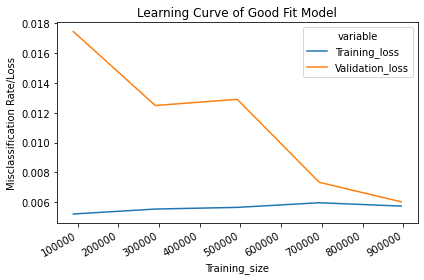

In [68]:
lccat = learn_curve(X_train,y_train,1,cat) 
print_graph(lccat)

In [55]:
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.5773633256278705, depth = 5, 
                            random_state=200, n_estimators =90, bootstrap_type= 'Bernoulli', 
                            random_strength= 1,
                            min_data_in_leaf= 10, l2_leaf_reg=4 , loss_function= 'MultiClassOneVsAll', 
                            grow_policy= 'Depthwise', max_bin= 1024, model_size_reg= 0,
                            task_type= 'GPU', od_type= 'IncToDec', od_wait= 100, metric_period= 500, verbose= 500, 
                            subsample= 0.8,od_pval= 1e-10, max_ctr_complexity= 8, has_time= False, simple_ctr= 'FeatureFreq', 
                            combinations_ctr= 'FeatureFreq').fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.2886453	total: 87.3ms	remaining: 7.77s
89:	learn: 0.0054003	total: 4.69s	remaining: 0us
0:	learn: 0.2886453	total: 164ms	remaining: 14.6s
89:	learn: 0.0054003	total: 4.82s	remaining: 0us
Accuracy of LightGBM + Hyperparameter: 0.9934554168028148
Precision of LightGBM + Hyperparameter: 0.9937231740815811
Recall of LightGBM + Hyperparameter: 0.9934554168028148
Average F1 of LightGBM + Hyperparameter: 0.9935329325232627
 
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       462
           1       0.97      1.00      0.99       112
           2       0.99      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       0.99      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.94      0.99      0.96    211167
weighted avg       0.99      0.99      0.99    211167

 
F1-score for each typ

0:	learn: 0.2887056	total: 123ms	remaining: 11s
89:	learn: 0.0052511	total: 4.54s	remaining: 0us
0:	learn: 0.2886708	total: 172ms	remaining: 15.3s
89:	learn: 0.0052639	total: 4.62s	remaining: 0us
0:	learn: 0.2886406	total: 187ms	remaining: 16.6s
89:	learn: 0.0052655	total: 4.68s	remaining: 0us
0:	learn: 0.2886092	total: 172ms	remaining: 15.3s
89:	learn: 0.0052092	total: 4.67s	remaining: 0us
0:	learn: 0.2887034	total: 108ms	remaining: 9.59s
89:	learn: 0.0052517	total: 4.64s	remaining: 0us
0:	learn: 0.2886453	total: 131ms	remaining: 11.7s
89:	learn: 0.0052625	total: 5.69s	remaining: 0us
0:	learn: 0.2792596	total: 28.4ms	remaining: 2.52s
89:	learn: 0.0057476	total: 1.02s	remaining: 0us
0:	learn: 0.2788319	total: 85.6ms	remaining: 7.62s
89:	learn: 0.0057749	total: 1.56s	remaining: 0us
0:	learn: 0.2786924	total: 98.8ms	remaining: 8.8s
89:	learn: 0.0056622	total: 2.34s	remaining: 0us
0:	learn: 0.2814192	total: 127ms	remaining: 11.3s
89:	learn: 0.0059070	total: 3.62s	remaining: 0us
0:	learn: 

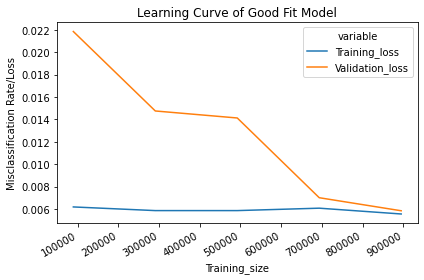

In [56]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)

In [71]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'depth': int(params['depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
        'random_state': int(params['random_state']), 
        'reg_lambda': int(params['reg_lambda'])

    }
    
    HPOcat = CatBoostClassifier(**params)
    HPOcat.fit(X_train, y_train)
    y_pred = HPOcat.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'depth': hp.quniform('depth', 1, 10, 1),
    'learning_rate': hp.normal('learning_rate', 0.001, 0.8),
    
    'random_state': hp.quniform('random_state', 10, 200, 10),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1)

}

bestcat = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

print("CatBoost: Hyperopt estimated optimum {}".format(bestcat))

  0%|                                                                           | 0/20 [00:00<?, ?trial/s, best loss=?]0:	learn: 0.9361023	total: 501ms	remaining: 39.5s
1:	learn: 0.6673917	total: 996ms	remaining: 38.8s
2:	learn: 0.5075489	total: 1.49s	remaining: 38.3s
3:	learn: 0.3987323	total: 2.01s	remaining: 38.2s
4:	learn: 0.3209987	total: 2.52s	remaining: 37.8s
5:	learn: 0.2606601	total: 3.04s	remaining: 37.5s
6:	learn: 0.2160929	total: 3.55s	remaining: 37s
7:	learn: 0.1818728	total: 4.04s	remaining: 36.3s
8:	learn: 0.1546432	total: 4.52s	remaining: 35.6s
9:	learn: 0.1333843	total: 5s	remaining: 35s
10:	learn: 0.1141357	total: 5.49s	remaining: 34.4s
11:	learn: 0.1001914	total: 5.98s	remaining: 33.9s
12:	learn: 0.0859762	total: 6.46s	remaining: 33.3s
13:	learn: 0.0770067	total: 6.94s	remaining: 32.7s
14:	learn: 0.0683896	total: 7.42s	remaining: 32.1s
15:	learn: 0.0617272	total: 7.9s	remaining: 31.6s
16:	learn: 0.0562162	total: 8.39s	remaining: 31.1s
17:	learn: 0.0519843	total: 8.87

46:	learn: 0.0757508	total: 7.01s	remaining: 7.16s
47:	learn: 0.0731285	total: 7.16s	remaining: 7.01s
48:	learn: 0.0719825	total: 7.31s	remaining: 6.86s
49:	learn: 0.0713611	total: 7.46s	remaining: 6.71s
50:	learn: 0.0707941	total: 7.61s	remaining: 6.56s
51:	learn: 0.0685716	total: 7.76s	remaining: 6.42s
52:	learn: 0.0682188	total: 7.91s	remaining: 6.27s
53:	learn: 0.0675004	total: 8.07s	remaining: 6.13s
54:	learn: 0.0668563	total: 8.22s	remaining: 5.98s
55:	learn: 0.0654176	total: 8.37s	remaining: 5.83s
56:	learn: 0.0648151	total: 8.52s	remaining: 5.68s
57:	learn: 0.0643191	total: 8.66s	remaining: 5.52s
58:	learn: 0.0632634	total: 8.81s	remaining: 5.38s
59:	learn: 0.0628422	total: 8.96s	remaining: 5.22s
60:	learn: 0.0611194	total: 9.12s	remaining: 5.08s
61:	learn: 0.0596961	total: 9.26s	remaining: 4.93s
62:	learn: 0.0592255	total: 9.41s	remaining: 4.78s
63:	learn: 0.0590027	total: 9.55s	remaining: 4.63s
64:	learn: 0.0587177	total: 9.7s	remaining: 4.48s
65:	learn: 0.0580260	total: 9.85

26:	learn: 0.0448959	total: 35s	remaining: 1m 8s
27:	learn: 0.0425883	total: 36.1s	remaining: 1m 7s
28:	learn: 0.0406053	total: 37.3s	remaining: 1m 5s
29:	learn: 0.0388057	total: 38.4s	remaining: 1m 4s
30:	learn: 0.0373785	total: 39.5s	remaining: 1m 2s
31:	learn: 0.0360253	total: 40.7s	remaining: 1m 1s
32:	learn: 0.0351380	total: 41.8s	remaining: 59.6s
33:	learn: 0.0339358	total: 43s	remaining: 58.1s
34:	learn: 0.0323137	total: 44.1s	remaining: 56.7s
35:	learn: 0.0314637	total: 45.4s	remaining: 55.4s
36:	learn: 0.0307067	total: 46.6s	remaining: 54.1s
37:	learn: 0.0300510	total: 47.7s	remaining: 52.8s
38:	learn: 0.0295577	total: 48.9s	remaining: 51.4s
39:	learn: 0.0289066	total: 50.1s	remaining: 50.1s
40:	learn: 0.0283427	total: 51.2s	remaining: 48.7s
41:	learn: 0.0279848	total: 52.3s	remaining: 47.4s
42:	learn: 0.0275765	total: 53.5s	remaining: 46s
43:	learn: 0.0271927	total: 54.6s	remaining: 44.7s
44:	learn: 0.0267448	total: 55.8s	remaining: 43.4s
45:	learn: 0.0263331	total: 56.9s	rem

11:	learn: 218.6295534	total: 2.44s	remaining: 14.8s
12:	learn: 167.7464411	total: 2.63s	remaining: 14.5s
13:	learn: 545.2121517	total: 2.84s	remaining: 14.4s
14:	learn: 222.0680838	total: 3.04s	remaining: 14.2s
15:	learn: 276.0403062	total: 3.23s	remaining: 13.9s
16:	learn: 170.0404780	total: 3.44s	remaining: 13.7s
17:	learn: 163.1336686	total: 3.63s	remaining: 13.5s
18:	learn: 157.2064977	total: 3.85s	remaining: 13.4s
19:	learn: 152.4936281	total: 4.04s	remaining: 13.1s
20:	learn: 148.9715037	total: 4.25s	remaining: 12.9s
21:	learn: 146.0698263	total: 4.44s	remaining: 12.7s
22:	learn: 142.3735604	total: 4.65s	remaining: 12.5s
23:	learn: 139.5697760	total: 4.86s	remaining: 12.4s
24:	learn: 136.6323116	total: 5.06s	remaining: 12.1s
25:	learn: 133.8903064	total: 5.27s	remaining: 12s
26:	learn: 130.0171537	total: 5.48s	remaining: 11.8s
27:	learn: 126.6108198	total: 5.69s	remaining: 11.6s
28:	learn: 123.5858268	total: 5.91s	remaining: 11.4s
29:	learn: 121.6100652	total: 6.14s	remaining: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.1864929	total: 260ms	remaining: 19.2s
1:	learn: 7.8112536	total: 490ms	remaining: 17.9s
2:	learn: 227.6070774	total: 723ms	remaining: 17.4s
3:	learn: 1129.4438267	total: 980ms	remaining: 17.4s
4:	learn: 5196.0287628	total: 1.22s	remaining: 17.1s
5:	learn: 4890.6189735	total: 1.43s	remaining: 16.4s
6:	learn: 4374.6517194	total: 1.65s	remaining: 16.1s
7:	learn: 4054.7934145	total: 1.86s	remaining: 15.5s
8:	learn: 3565.9642927	total: 2.09s	remaining: 15.3s
9:	learn: 3051.6568207	total: 2.3s	remaining: 15s
10:	learn: 2639.9067867	total: 2.51s	remaining: 14.6s
11:	learn: 2226.7314297	total: 2.73s	remaining: 14.3s
12:	learn: 1839.6998806	total: 2.94s	remaining: 14s
13:	learn: 1494.3312645	total: 3.16s	remaining: 13.8s
14:	learn: 1279.7253522	total: 3.37s	remaining: 13.5s
15:	learn: 1248.1842071	total: 3.59s	remaining: 13.2s
16:	learn: 1166.3277206	total: 3.83s	remaining: 13.1s
17:	learn: 1129.1304524	total: 4.04s	remaining: 12.8s
18:	learn: 1112.5567657	total: 4.28s	remaining: 12

35:	learn: 0.0276592	total: 19.2s	remaining: 20.8s
36:	learn: 0.0274683	total: 19.7s	remaining: 20.3s
37:	learn: 0.0269867	total: 20.3s	remaining: 19.8s
38:	learn: 0.0266358	total: 20.9s	remaining: 19.3s
39:	learn: 0.0262603	total: 21.5s	remaining: 18.8s
40:	learn: 0.0259772	total: 22s	remaining: 18.3s
41:	learn: 0.0257165	total: 22.7s	remaining: 17.9s
42:	learn: 0.0253689	total: 23.5s	remaining: 17.5s
43:	learn: 0.0250547	total: 24.1s	remaining: 17s
44:	learn: 0.0247969	total: 24.7s	remaining: 16.5s
45:	learn: 0.0245438	total: 25.3s	remaining: 15.9s
46:	learn: 0.0243987	total: 25.9s	remaining: 15.4s
47:	learn: 0.0242726	total: 26.5s	remaining: 14.9s
48:	learn: 0.0240898	total: 27.1s	remaining: 14.4s
49:	learn: 0.0239127	total: 27.8s	remaining: 13.9s
50:	learn: 0.0237719	total: 28.4s	remaining: 13.3s
51:	learn: 0.0236138	total: 28.9s	remaining: 12.8s
52:	learn: 0.0234334	total: 29.5s	remaining: 12.2s
53:	learn: 0.0232753	total: 30.2s	remaining: 11.7s
54:	learn: 0.0230057	total: 30.8s	r

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.8324048	total: 165ms	remaining: 8.09s
1:	learn: 0.2214465	total: 330ms	remaining: 7.93s
2:	learn: 0.1262323	total: 482ms	remaining: 7.56s
3:	learn: 0.1347624	total: 647ms	remaining: 7.44s
4:	learn: 0.1011343	total: 805ms	remaining: 7.24s
5:	learn: 0.0974751	total: 975ms	remaining: 7.15s
6:	learn: 0.0782173	total: 1.14s	remaining: 7s
7:	learn: 0.0770500	total: 1.3s	remaining: 6.84s
8:	learn: 0.0803594	total: 1.48s	remaining: 6.72s
9:	learn: 1.4870838	total: 1.65s	remaining: 6.58s
10:	learn: 17.1879491	total: 1.82s	remaining: 6.45s
11:	learn: 661.5157887	total: 1.99s	remaining: 6.29s
12:	learn: 777.9626805	total: 2.16s	remaining: 6.14s
13:	learn: 675.5346645	total: 2.31s	remaining: 5.95s
14:	learn: 1258.6337869	total: 2.49s	remaining: 5.82s
15:	learn: 1459.7695316	total: 2.67s	remaining: 5.67s
16:	learn: 1395.3544497	total: 2.82s	remaining: 5.47s
17:	learn: 631.9061958	total: 2.98s	remaining: 5.3s
18:	learn: 1740.5003674	total: 3.14s	remaining: 5.12s
19:	learn: 1638.6564262	t

67:	learn: 0.0393814	total: 14.5s	remaining: 2.56s
68:	learn: 0.0390652	total: 14.7s	remaining: 2.34s
69:	learn: 0.0387567	total: 14.9s	remaining: 2.13s
70:	learn: 0.0384922	total: 15.1s	remaining: 1.92s
71:	learn: 0.0381530	total: 15.3s	remaining: 1.7s
72:	learn: 0.0379088	total: 15.5s	remaining: 1.49s
73:	learn: 0.0374819	total: 15.7s	remaining: 1.27s
74:	learn: 0.0370643	total: 15.9s	remaining: 1.06s
75:	learn: 0.0367083	total: 16.1s	remaining: 849ms
76:	learn: 0.0364415	total: 16.3s	remaining: 636ms
77:	learn: 0.0362339	total: 16.5s	remaining: 424ms
78:	learn: 0.0358720	total: 16.7s	remaining: 212ms
79:	learn: 0.0354535	total: 17s	remaining: 0us
 90%|██████████████████████████████████████████▎    | 18/20 [08:02<00:42, 21.18s/trial, best loss: -0.9930197426681252]0:	learn: 0.7806840	total: 193ms	remaining: 5.6s
1:	learn: 0.5505361	total: 376ms	remaining: 5.26s
2:	learn: 0.4177454	total: 560ms	remaining: 5.04s
3:	learn: 0.3328004	total: 750ms	remaining: 4.87s
4:	learn: 0.2696764	tota

In [72]:
%%time
HPOcat = CatBoostClassifier(learning_rate=  0.577199071709429, depth = 5, random_state=170, n_estimators =40, 
                            reg_lambda= 5.0).fit(X_train,y_train)
HPOcat.fit(X_train, y_train)
HPOcat_train=HPOcat.predict(X_train)
HPOcat_test = HPOcat.predict(X_test)


print("Accuracy of LightGBM + Hyperparameter: "+ str(accuracy_score(y_test, HPOcat_test)))
print("Precision of LightGBM + Hyperparameter: "+ str(precision_score(y_test, HPOcat_test, average='weighted')))
print("Recall of LightGBM + Hyperparameter: "+ str(recall_score(y_test, HPOcat_test, average='weighted')))
print("Average F1 of LightGBM + Hyperparameter: "+ str(f1_score(y_test, HPOcat_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOcat_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOcat_test, average=None)))

0:	learn: 0.2323797	total: 219ms	remaining: 8.53s
1:	learn: 0.1549736	total: 428ms	remaining: 8.13s
2:	learn: 0.1073285	total: 648ms	remaining: 8s
3:	learn: 0.0841325	total: 858ms	remaining: 7.72s
4:	learn: 0.0716082	total: 1.08s	remaining: 7.57s
5:	learn: 0.0572270	total: 1.3s	remaining: 7.39s
6:	learn: 0.0500281	total: 1.49s	remaining: 7s
7:	learn: 0.0436465	total: 1.72s	remaining: 6.86s
8:	learn: 0.0396325	total: 1.92s	remaining: 6.63s
9:	learn: 0.0377239	total: 2.11s	remaining: 6.32s
10:	learn: 0.0362974	total: 2.31s	remaining: 6.1s
11:	learn: 0.0354065	total: 2.5s	remaining: 5.84s
12:	learn: 0.0332168	total: 2.73s	remaining: 5.68s
13:	learn: 0.0320377	total: 2.93s	remaining: 5.44s
14:	learn: 0.0315360	total: 3.14s	remaining: 5.24s
15:	learn: 0.0309481	total: 3.35s	remaining: 5.03s
16:	learn: 0.0303106	total: 3.54s	remaining: 4.79s
17:	learn: 0.0298760	total: 3.77s	remaining: 4.6s
18:	learn: 0.0290053	total: 3.98s	remaining: 4.4s
19:	learn: 0.0277920	total: 4.21s	remaining: 4.21s
2

0:	learn: 0.2363463	total: 164ms	remaining: 6.38s
1:	learn: 0.1604526	total: 341ms	remaining: 6.48s
2:	learn: 0.1107621	total: 504ms	remaining: 6.21s
3:	learn: 0.0859798	total: 672ms	remaining: 6.05s
4:	learn: 0.0740206	total: 836ms	remaining: 5.85s
5:	learn: 0.0671345	total: 1.03s	remaining: 5.86s
6:	learn: 0.0568213	total: 1.27s	remaining: 5.99s
7:	learn: 0.0520761	total: 1.43s	remaining: 5.71s
8:	learn: 0.0482380	total: 1.61s	remaining: 5.55s
9:	learn: 0.0440980	total: 1.78s	remaining: 5.34s
10:	learn: 0.0455981	total: 2.09s	remaining: 5.51s
11:	learn: 0.0405175	total: 2.29s	remaining: 5.35s
12:	learn: 0.0380136	total: 2.48s	remaining: 5.16s
13:	learn: 0.0353267	total: 2.72s	remaining: 5.05s
14:	learn: 0.0343242	total: 2.94s	remaining: 4.91s
15:	learn: 0.0329463	total: 3.15s	remaining: 4.72s
16:	learn: 0.0321898	total: 3.33s	remaining: 4.5s
17:	learn: 0.0317431	total: 3.51s	remaining: 4.29s
18:	learn: 0.0306380	total: 3.75s	remaining: 4.14s
19:	learn: 0.0301180	total: 3.93s	remainin

4:	learn: 0.0769580	total: 873ms	remaining: 6.11s
5:	learn: 0.0647522	total: 1.05s	remaining: 5.97s
6:	learn: 0.0585011	total: 1.23s	remaining: 5.81s
7:	learn: 0.0544008	total: 1.4s	remaining: 5.58s
8:	learn: 0.0491260	total: 1.58s	remaining: 5.43s
9:	learn: 0.0428031	total: 1.77s	remaining: 5.3s
10:	learn: 0.0411711	total: 1.96s	remaining: 5.17s
11:	learn: 0.0388220	total: 2.14s	remaining: 4.99s
12:	learn: 0.0372787	total: 2.37s	remaining: 4.93s
13:	learn: 0.0352617	total: 2.59s	remaining: 4.81s
14:	learn: 0.0342727	total: 2.78s	remaining: 4.64s
15:	learn: 0.0331218	total: 3s	remaining: 4.49s
16:	learn: 0.0326368	total: 3.17s	remaining: 4.28s
17:	learn: 0.0317715	total: 3.43s	remaining: 4.19s
18:	learn: 0.0310083	total: 3.65s	remaining: 4.03s
19:	learn: 0.0304421	total: 3.85s	remaining: 3.85s
20:	learn: 0.0299868	total: 4.05s	remaining: 3.66s
21:	learn: 0.0347623	total: 4.22s	remaining: 3.45s
22:	learn: 0.0298835	total: 4.42s	remaining: 3.26s
23:	learn: 0.0982137	total: 4.62s	remainin

6:	learn: 0.0406729	total: 756ms	remaining: 3.56s
7:	learn: 0.0363419	total: 853ms	remaining: 3.41s
8:	learn: 0.0334069	total: 960ms	remaining: 3.31s
9:	learn: 0.0320646	total: 1.06s	remaining: 3.19s
10:	learn: 0.0324510	total: 1.16s	remaining: 3.06s
11:	learn: 0.0313921	total: 1.25s	remaining: 2.92s
12:	learn: 0.0305794	total: 1.36s	remaining: 2.83s
13:	learn: 0.0292826	total: 1.47s	remaining: 2.72s
14:	learn: 0.0286437	total: 1.56s	remaining: 2.61s
15:	learn: 0.0274220	total: 1.67s	remaining: 2.51s
16:	learn: 0.0268460	total: 1.79s	remaining: 2.42s
17:	learn: 0.0265527	total: 1.9s	remaining: 2.32s
18:	learn: 0.0260124	total: 1.99s	remaining: 2.2s
19:	learn: 0.0257632	total: 2.09s	remaining: 2.09s
20:	learn: 0.0255832	total: 2.17s	remaining: 1.97s
21:	learn: 0.0245392	total: 2.28s	remaining: 1.87s
22:	learn: 0.0242322	total: 2.39s	remaining: 1.76s
23:	learn: 0.0262247	total: 2.49s	remaining: 1.66s
24:	learn: 0.0410015	total: 2.59s	remaining: 1.55s
25:	learn: 0.0312441	total: 2.69s	rem

8:	learn: 0.0341338	total: 583ms	remaining: 2.01s
9:	learn: 0.0322945	total: 642ms	remaining: 1.93s
10:	learn: 0.0320332	total: 705ms	remaining: 1.86s
11:	learn: 0.0315719	total: 767ms	remaining: 1.79s
12:	learn: 0.0308682	total: 820ms	remaining: 1.7s
13:	learn: 0.0304364	total: 876ms	remaining: 1.63s
14:	learn: 0.0300514	total: 935ms	remaining: 1.56s
15:	learn: 0.0325140	total: 994ms	remaining: 1.49s
16:	learn: 0.0316023	total: 1.05s	remaining: 1.42s
17:	learn: 0.0307636	total: 1.11s	remaining: 1.36s
18:	learn: 0.0299929	total: 1.17s	remaining: 1.29s
19:	learn: 0.0296356	total: 1.23s	remaining: 1.23s
20:	learn: 0.0278146	total: 1.28s	remaining: 1.16s
21:	learn: 0.0277028	total: 1.34s	remaining: 1.09s
22:	learn: 0.0272184	total: 1.4s	remaining: 1.04s
23:	learn: 0.0247656	total: 1.46s	remaining: 976ms
24:	learn: 0.0244317	total: 1.52s	remaining: 915ms
25:	learn: 0.0242548	total: 1.59s	remaining: 854ms
26:	learn: 0.0240820	total: 1.64s	remaining: 791ms
27:	learn: 0.0237054	total: 1.71s	r

21:	learn: 0.0261169	total: 426ms	remaining: 349ms
22:	learn: 0.0259754	total: 445ms	remaining: 329ms
23:	learn: 0.0258123	total: 465ms	remaining: 310ms
24:	learn: 0.0256623	total: 486ms	remaining: 291ms
25:	learn: 0.0251654	total: 507ms	remaining: 273ms
26:	learn: 0.0250856	total: 526ms	remaining: 253ms
27:	learn: 0.0250401	total: 545ms	remaining: 234ms
28:	learn: 0.0249937	total: 563ms	remaining: 213ms
29:	learn: 0.0249275	total: 582ms	remaining: 194ms
30:	learn: 0.0248210	total: 602ms	remaining: 175ms
31:	learn: 0.0245211	total: 623ms	remaining: 156ms
32:	learn: 0.0243971	total: 646ms	remaining: 137ms
33:	learn: 0.0241778	total: 668ms	remaining: 118ms
34:	learn: 0.0239458	total: 686ms	remaining: 98ms
35:	learn: 0.0238370	total: 706ms	remaining: 78.4ms
36:	learn: 0.0238208	total: 721ms	remaining: 58.5ms
37:	learn: 0.0237458	total: 740ms	remaining: 39ms
38:	learn: 0.0237027	total: 758ms	remaining: 19.4ms
39:	learn: 0.0235788	total: 779ms	remaining: 0us
0:	learn: 0.1964835	total: 64.4m

24:	learn: 0.0321811	total: 5.12s	remaining: 3.07s
25:	learn: 0.0311849	total: 5.33s	remaining: 2.87s
26:	learn: 0.0270913	total: 5.54s	remaining: 2.67s
27:	learn: 0.0266509	total: 5.74s	remaining: 2.46s
28:	learn: 0.0263514	total: 5.94s	remaining: 2.25s
29:	learn: 0.0259523	total: 6.17s	remaining: 2.06s
30:	learn: 0.0255765	total: 6.39s	remaining: 1.85s
31:	learn: 0.0253107	total: 6.56s	remaining: 1.64s
32:	learn: 0.0249144	total: 6.76s	remaining: 1.44s
33:	learn: 0.0246669	total: 6.98s	remaining: 1.23s
34:	learn: 0.0244958	total: 7.16s	remaining: 1.02s
35:	learn: 0.0241820	total: 7.37s	remaining: 819ms
36:	learn: 0.0239176	total: 7.57s	remaining: 614ms
37:	learn: 0.0237204	total: 7.8s	remaining: 411ms
38:	learn: 0.0234390	total: 8.06s	remaining: 207ms
39:	learn: 0.0233188	total: 8.26s	remaining: 0us
0:	learn: 0.1989224	total: 24.6ms	remaining: 960ms
1:	learn: 0.1267259	total: 45.3ms	remaining: 862ms
2:	learn: 0.0906093	total: 66.8ms	remaining: 824ms
3:	learn: 0.0674245	total: 86.8ms	

28:	learn: 0.1027294	total: 4.55s	remaining: 1.73s
29:	learn: 0.0992292	total: 4.71s	remaining: 1.57s
30:	learn: 0.0989453	total: 4.86s	remaining: 1.41s
31:	learn: 0.0979050	total: 5.02s	remaining: 1.25s
32:	learn: 0.0975431	total: 5.18s	remaining: 1.1s
33:	learn: 0.0973711	total: 5.32s	remaining: 939ms
34:	learn: 0.0970927	total: 5.46s	remaining: 781ms
35:	learn: 0.0969053	total: 5.61s	remaining: 623ms
36:	learn: 0.0790025	total: 5.77s	remaining: 468ms
37:	learn: 0.0629674	total: 5.93s	remaining: 312ms
38:	learn: 0.0913049	total: 6.1s	remaining: 156ms
39:	learn: 0.0902499	total: 6.27s	remaining: 0us
0:	learn: 0.2290475	total: 192ms	remaining: 7.47s
1:	learn: 0.1568158	total: 399ms	remaining: 7.58s
2:	learn: 0.1091250	total: 587ms	remaining: 7.24s
3:	learn: 0.0887679	total: 775ms	remaining: 6.97s
4:	learn: 0.0688833	total: 983ms	remaining: 6.88s
5:	learn: 0.0595582	total: 1.17s	remaining: 6.65s
6:	learn: 0.0558477	total: 1.37s	remaining: 6.44s
7:	learn: 0.0511395	total: 1.58s	remaining

30:	learn: 0.0248544	total: 3.27s	remaining: 948ms
31:	learn: 0.0246555	total: 3.38s	remaining: 845ms
32:	learn: 0.0240878	total: 3.5s	remaining: 743ms
33:	learn: 0.0239751	total: 3.59s	remaining: 634ms
34:	learn: 0.0238363	total: 3.71s	remaining: 530ms
35:	learn: 0.0237682	total: 3.8s	remaining: 423ms
36:	learn: 0.0234726	total: 3.91s	remaining: 317ms
37:	learn: 0.0234140	total: 4.01s	remaining: 211ms
38:	learn: 0.0232041	total: 4.13s	remaining: 106ms
39:	learn: 0.0228966	total: 4.24s	remaining: 0us
0:	learn: 0.2203425	total: 156ms	remaining: 6.09s
1:	learn: 0.1437134	total: 299ms	remaining: 5.68s
2:	learn: 0.1043117	total: 459ms	remaining: 5.66s
3:	learn: 0.0776403	total: 619ms	remaining: 5.57s
4:	learn: 0.0661991	total: 768ms	remaining: 5.38s
5:	learn: 0.0543938	total: 927ms	remaining: 5.25s
6:	learn: 0.0489447	total: 1.08s	remaining: 5.1s
7:	learn: 0.0401521	total: 1.23s	remaining: 4.93s
8:	learn: 0.0380373	total: 1.38s	remaining: 4.74s
9:	learn: 0.0374820	total: 1.54s	remaining: 4

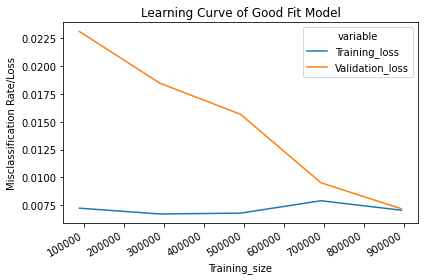

In [73]:
lcHPOcat = learn_curve(X_train,y_train,1,HPOcat) 
print_graph(lcHPOcat)

In [47]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'random_state': int(params['random_state']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    
    HPOrf = RandomForestClassifier( **params)
    HPOrf.fit(X_train,y_train)
    y_pred = HPOrf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'random_state': hp.quniform('random_state', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 0, 19, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

bestHPOrf = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(bestHPOrf))

100%|████████████████████████████████████████████| 20/20 [1:06:11<00:00, 198.56s/trial, best loss: -0.9937869079922526]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 32.0, 'max_features': 19.0, 'min_samples_leaf': 3.0, 'min_samples_split': 11.0, 'n_estimators': 73.0, 'random_state': 32.0}


In [48]:
%%time
HPOrf = RandomForestClassifier(criterion='entropy', max_depth=32, max_features=19, min_samples_leaf=3, 
                               min_samples_split=11, n_estimators=73, random_state= 32).fit(X_train, y_train)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)

print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

Accuracy of Random Forest: 0.9937869079922526
Precision of Random Forest: 0.9940095395894717
Recall of Random Forest: 0.9937869079922526
Average F1 of Random Forest: 0.9938531514769477
 
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       462
           1       0.96      0.99      0.97       112
           2       0.99      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       0.99      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.94      0.99      0.96    211167
weighted avg       0.99      0.99      0.99    211167

 
F1-score for each type of attack: [0.83226398 0.97368421 0.99055331 0.99979735 0.99748617 0.9926232 ]
Wall time: 8min 51s


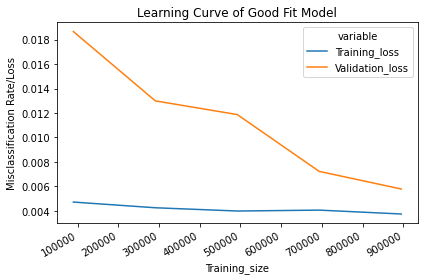

In [49]:
lcHPOrf = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lcHPOrf)

In [53]:
%%time
xgb = xgb.XGBClassifier().fit(X_train, y_train)
xgb.fit(X_train,y_train)
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, xgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, xgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, xgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, xgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,xgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, xgb_test, average=None)))

[07:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9938247926996169
Precision of XGBoost: 0.9940268064388961
Recall of XGBoost: 0.9938247926996169
Average F1 of XGBoost: 0.9938817014214673
 
              precision    recall  f1-score   support

           0       0.74      0.98      0.85       462
           1       0.99      0.99      0.99       112
           2       0.99      0.99      0.99     5811

[07:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[08:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

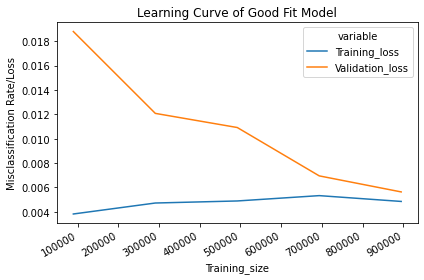

In [54]:
lc = learn_curve(X_train,y_train,1,xgb) 
print_graph(lc)

In [50]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(params):
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
        'random_state': int(params['random_state']), 
        'reg_alpha': int(params['reg_alpha']),
        'reg_lambda': int(params['reg_lambda']),

        'min_child_weight': abs(float(params['min_child_weight'])),
    }
    
    HPOxgb = xgb.XGBClassifier( **params)
    HPOxgb.fit(X_train, y_train)
    y_pred = HPOxgb.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
    
    'random_state': hp.quniform('random_state', 10, 200, 10),
    'reg_alpha': hp.quniform('reg_alpha', 1, 10, 1),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1),

    'min_child_weight': hp.normal('min_child_weight', 0.01, 0.9),
}

bestxg = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(bestxg))

[22:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [51]:
%%time
HPOxgb = xgb.XGBClassifier(learning_rate= 0.9776145245827119, max_depth= 15, min_child_weight= 0.13999385707511144, 
                            n_estimators= 85, random_state= 80, reg_alpha= 1, reg_lambda= 5).fit(X_train, y_train)
HPOxgb_train = HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test, HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

[00:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9949518627437052
Precision of XGBoost: 0.9951775859259512
Recall of XGBoost: 0.9949518627437052
Average F1 of XGBoost: 0.9950186376390463
 
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       462
           1       0.98      0.99      0.99       112
           2       0.99      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       0.99      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.95      0.99      0.97    211167
weighted avg       1.00      0.99     

[00:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[01:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

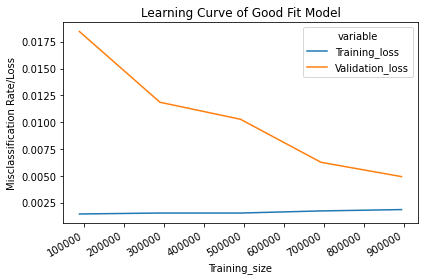

In [52]:
lcHPOxgb = learn_curve(X_train,y_train,1,HPOxgb) 
print_graph(lcHPOxgb)

In [58]:
%%time
light = lgb.LGBMClassifier().fit(X_train, y_train) 
light.fit(X_train,y_train)
light_train = light.predict(X_train)
light_test = light.predict(X_test) 

print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, light_test)))
print("Precision of LightGBM: "+ str(precision_score(y_test, light_test, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, light_test, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, light_test, average='weighted')))
print(" ")
print(classification_report(y_test,light_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, light_test, average=None)))

Accuracy of LightGBM: 0.6513565093030634
Precision of LightGBM: 0.900350520527879
Recall of LightGBM: 0.6513565093030634
Average F1 of LightGBM: 0.722370036466227
 
              precision    recall  f1-score   support

           0       0.01      0.73      0.02       462
           1       0.20      0.99      0.33       112
           2       0.95      0.59      0.73     58116
           3       0.54      1.00      0.70     34546
           4       0.97      0.57      0.71     42852
           5       1.00      0.59      0.74     75079

    accuracy                           0.65    211167
   macro avg       0.61      0.74      0.54    211167
weighted avg       0.90      0.65      0.72    211167

 
F1-score for each type of attack: [0.01620275 0.32599119 0.73020615 0.69679168 0.7149448  0.73724845]
Wall time: 24.7 s


In [59]:
%%time
HPOstklight = lgb.LGBMClassifier(learning_rate= 0.4794424355808078, max_depth= 68, min_child_weight= 1.0007785931615747, 
                              n_estimators= 40, random_state= 170, reg_alpha= 2, 
                              reg_lambda= 1).fit(X_train,y_train)
HPOstklight_test = HPOstklight.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOstklight_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOstklight_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOstklight_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOstklight_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOstklight_test))
print(" ")
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, HPOstklight_test, average=None)))

Accuracy of XGBoost: 0.9933701762112451
Precision of XGBoost: 0.9935667540964565
Recall of XGBoost: 0.9933701762112451
Average F1 of XGBoost: 0.9934254893804741
 
              precision    recall  f1-score   support

           0       0.74      0.98      0.85       462
           1       0.96      0.99      0.97       112
           2       0.99      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       0.99      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.95      0.99      0.97    211167
weighted avg       0.99      0.99      0.99    211167

 
F1 of XGBoost for each type of attack: [0.84808947 0.97368421 0.98959986 0.99985526 0.99775565 0.99188056]
Wall time: 4.21 s


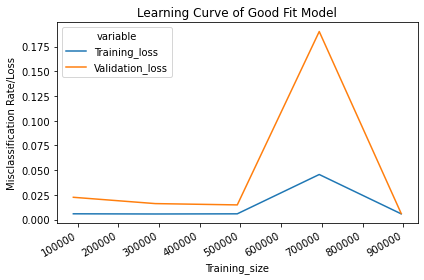

In [60]:
lcHPOstklight = learn_curve(X_train,y_train,1,HPOstklight) 
print_graph(lcHPOstklight)

In [62]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
        'random_state': int(params['random_state']), 
        'reg_alpha': int(params['reg_alpha']),
        'reg_lambda': int(params['reg_lambda']),

        'min_child_weight': abs(float(params['min_child_weight']))
    }
    
    HPOstklight = lgb.LGBMClassifier(**params)
    HPOstklight.fit(X_train, y_train)
    y_pred = HPOstklight.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.1, 0.9),
    
    'random_state': hp.quniform('random_state', 10, 200, 10),
    'reg_alpha': hp.quniform('reg_alpha', 1, 10, 1),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 1),

    'min_child_weight': hp.normal('min_child_weight', 0.01, 0.9)
}

bestHPOstklight = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

print("LightGBM: Hyperopt estimated optimum {}".format(bestHPOstklight))

100%|███████████████████████████████████████████████| 20/20 [02:03<00:00,  6.19s/trial, best loss: -0.9933607050344041]
LightGBM: Hyperopt estimated optimum {'learning_rate': 0.15304889031711033, 'max_depth': 40.0, 'min_child_weight': 0.45356772573494786, 'n_estimators': 65.0, 'random_state': 160.0, 'reg_alpha': 8.0, 'reg_lambda': 8.0}


In [65]:
%%time
HPOstklight = lgb.LGBMClassifier(learning_rate= 0.15304889031711033, max_depth= 40, min_child_weight= 0.45356772573494786, 
                              n_estimators= 65, random_state= 160, reg_alpha=8 , 
                              reg_lambda= 8).fit(X_train,y_train)
HPOstklight_test = HPOstklight.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOstklight_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOstklight_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOstklight_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOstklight_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOstklight_test))
print(" ")
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, HPOstklight_test, average=None)))

Accuracy of XGBoost: 0.9933607050344041
Precision of XGBoost: 0.9935792078815894
Recall of XGBoost: 0.9933607050344041
Average F1 of XGBoost: 0.9934217025618874
 
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       462
           1       0.94      1.00      0.97       112
           2       0.99      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       0.99      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.94      0.99      0.97    211167
weighted avg       0.99      0.99      0.99    211167

 
F1 of XGBoost for each type of attack: [0.84181314 0.96969697 0.98967341 0.99984078 0.99767352 0.99191108]
Wall time: 7.7 s


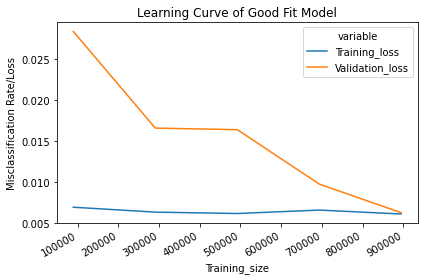

In [66]:
lcHPOstklight = learn_curve(X_train,y_train,1,HPOstklight) 
print_graph(lcHPOstklight)

In [63]:
%%time
HPOstklight = lgb.LGBMClassifier(colsample_bytree= 0.9234, min_child_samples= 399, min_child_weight= 0.1, 
                                 num_leaves= 13, reg_alpha= 2, reg_lambda= 5, subsample= 0.855).fit(X_train,y_train)
HPOstklight_test = HPOstklight.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, HPOstklight_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, HPOstklight_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, HPOstklight_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, HPOstklight_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOstklight_test))
print(" ")
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, HPOstklight_test, average=None)))

Accuracy of XGBoost: 0.9934790947449176
Precision of XGBoost: 0.9936357319966465
Recall of XGBoost: 0.9934790947449176
Average F1 of XGBoost: 0.9935228711491133
 
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       462
           1       0.97      0.99      0.98       112
           2       0.99      0.99      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       0.99      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.95      0.99      0.97    211167
weighted avg       0.99      0.99      0.99    211167

 
F1 of XGBoost for each type of attack: [0.8622982  0.97797357 0.98966703 0.99985526 0.99791973 0.99191497]
Wall time: 10.3 s


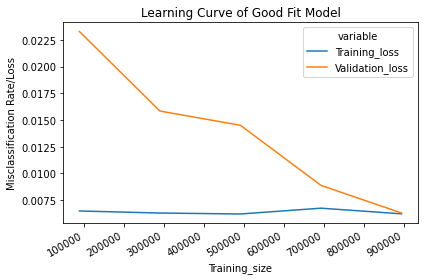

In [64]:
lcHPOstklight = learn_curve(X_train,y_train,1,HPOstklight) 
print_graph(lcHPOstklight)

In [40]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_test = rf.predict(X_test)
rf_train=rf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, rf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, rf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, rf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, rf_test, average='weighted')))
print(" ")
print(classification_report(y_test,rf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, rf_test, average=None)))

 
Accuracy of Random Forest: 0.9951507574573679
Precision of Random Forest: 0.9951739762279693
Recall of Random Forest: 0.9951507574573679
Average F1 of Random Forest: 0.9951531660767361
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       462
           1       0.99      0.98      0.99       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           1.00    211167
   macro avg       0.99      0.99      0.99    211167
weighted avg       1.00      1.00      1.00    211167

 
F1-score for each type of attack: [0.99460626 0.98654709 0.9914341  0.99984079 0.99967326 0.99331137]
Wall time: 3min 55s


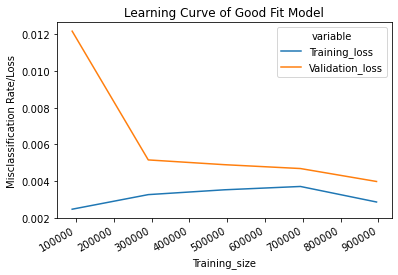

In [46]:
lcrf = learn_curve(X_train,y_train,1,rf) 
print_graph(lcrf)

In [41]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    HPOrf = RandomForestClassifier( **params)
    HPOrf.fit(X_train,y_train)
    #score=HPOrf.score(X_test,y_test)
    y_pred = HPOrf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|█████████████████████████████████████████████| 20/20 [1:13:01<00:00, 219.10s/trial, best loss: -0.995098665984742]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 46.0, 'max_features': 16.0, 'min_samples_leaf': 1.0, 'min_samples_split': 7.0, 'n_estimators': 142.0}


In [75]:
%%time
HPOrf = RandomForestClassifier(criterion='gini', max_depth=46, max_features=16, min_samples_leaf=1, 
                               min_samples_split=7, n_estimators=142)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

 
Accuracy of Random Forest: 0.9950513101005365
Precision of Random Forest: 0.9950701062384703
Recall of Random Forest: 0.9950513101005365
Average F1 of Random Forest: 0.9950534346951824
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      0.98      0.99       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           1.00    211167
   macro avg       0.99      0.99      0.99    211167
weighted avg       1.00      1.00      1.00    211167

 
F1-score for each type of attack: [0.99675676 0.98654709 0.99124995 0.99984079 0.99966161 0.99316683]
Wall time: 8min 39s


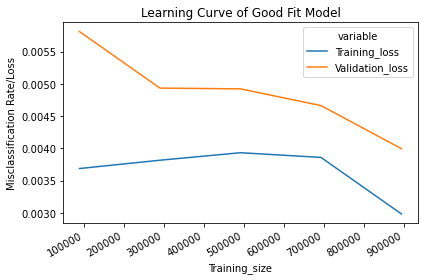

In [76]:
lcHPOrf = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lcHPOrf)

In [73]:
%%time
HPOrf = RandomForestClassifier(criterion='entropy', max_depth=34, max_features=17, min_samples_leaf=3, 
                               min_samples_split=6, n_estimators=143, random_state=123)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

 
Accuracy of Random Forest: 0.9947292900879399
Precision of Random Forest: 0.9947562985899867
Recall of Random Forest: 0.9947292900879399
Average F1 of Random Forest: 0.9947320710701012
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       462
           1       0.98      0.99      0.99       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.99      1.00      0.99    211167
weighted avg       0.99      0.99      0.99    211167

 
F1-score for each type of attack: [0.99246502 0.98666667 0.99070895 0.99984079 0.9996266  0.99272795]
Wall time: 9min 3s


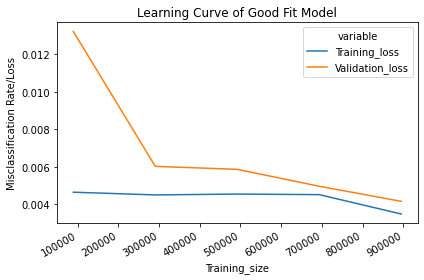

In [74]:
lcHPOrf = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lcHPOrf)

In [41]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_test = rf.predict(X_test)
rf_train=rf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, rf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, rf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, rf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, rf_test, average='weighted')))
print(" ")
print(classification_report(y_test,rf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, rf_test, average=None)))

 
Accuracy of Random Forest: 0.99516969981105
Precision of Random Forest: 0.995191252197005
Recall of Random Forest: 0.99516969981105
Average F1 of Random Forest: 0.9951720648073481
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      0.98      0.99       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           1.00    211167
   macro avg       1.00      0.99      0.99    211167
weighted avg       1.00      1.00      1.00    211167

 
F1-score for each type of attack: [0.99675676 0.98654709 0.99144977 0.99981183 0.9996966  0.99333917]
CPU times: user 3min 23s, sys: 149 ms, total: 3min 24s
Wall time: 3min 24s


In [42]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    HPOrf = RandomForestClassifier( **params)
    HPOrf.fit(X_train,y_train)
    #score=HPOrf.score(X_test,y_test)
    y_pred = HPOrf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [1:18:43<00:00, 236.18s/trial, best loss: -0.9949045068594998]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 34.0, 'max_features': 17.0, 'min_samples_leaf': 3.0, 'min_samples_split': 6.0, 'n_estimators': 143.0}


In [43]:
%%time
HPOrf = RandomForestClassifier(criterion='entropy', max_depth=34, max_features=17, min_samples_leaf=3, 
                               min_samples_split=6, n_estimators=143)
HPOrf.fit(X_train,y_train)
HPOrf_test =HPOrf.predict(X_test)
HPOrf_train=HPOrf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, HPOrf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, HPOrf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, HPOrf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, HPOrf_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOrf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOrf_test, average=None)))

 
Accuracy of Random Forest: 0.9948382086216123
Precision of Random Forest: 0.9948613005079486
Recall of Random Forest: 0.9948382086216123
Average F1 of Random Forest: 0.9948406966364521
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       462
           1       0.98      0.99      0.99       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           0.99    211167
   macro avg       0.99      1.00      0.99    211167
weighted avg       0.99      0.99      0.99    211167

 
F1-score for each type of attack: [0.99460626 0.98666667 0.99090255 0.99984079 0.99961493 0.99287709]
CPU times: user 7min 27s, sys: 180 ms, total: 7min 27s
Wall time: 7min 28s


Cross Validation Accuracies:
-------------------------
[0.9959641916986597, 0.9957362556816404, 0.9958479704665111, 0.9958658478810795, 0.9958837252956477]

    Mean Cross Validation Accuracy:
-------------------------
0.9958595982047077

    Standard Deviation of Cross Validation Accuracy:
-------------------------
7.336151067316951e-05

    Training Accuracy:
---------------
0.9965621793244495




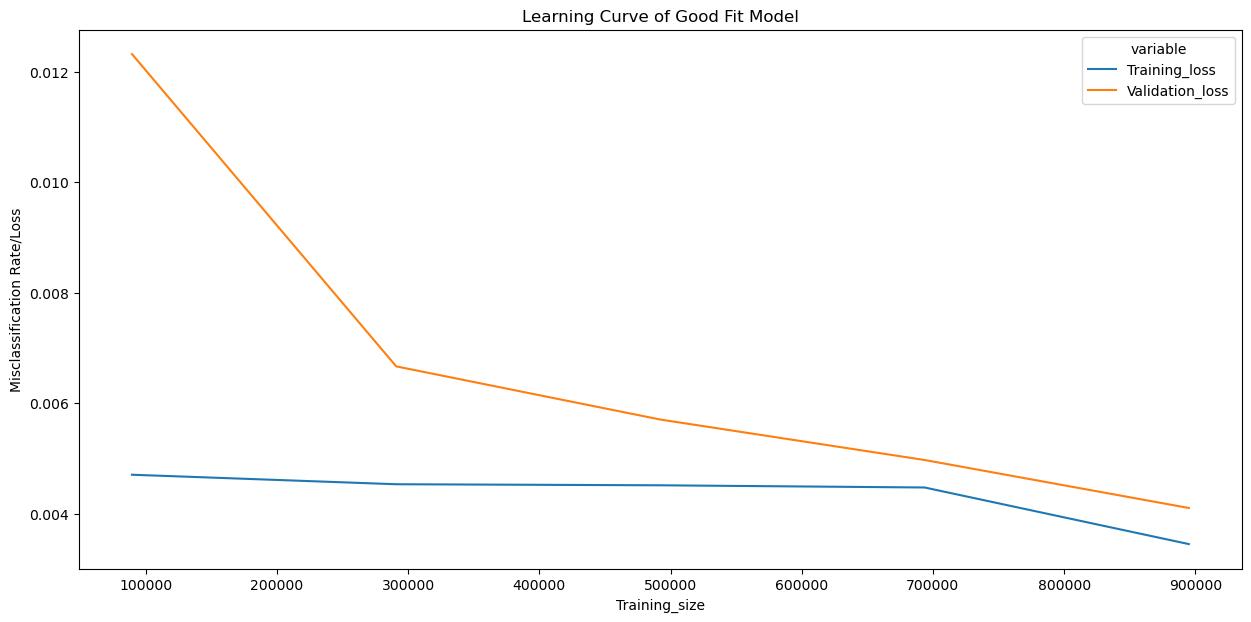

In [44]:
lc = learn_curve(X_train,y_train,1,HPOrf) 
print_graph(lc)

In [31]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_test = rf.predict(X_test)
rf_train=rf.predict(X_train)
print(" ")
print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, rf_test)))
print("Precision of Random Forest: "+ str(precision_score(y_test, rf_test, average='weighted')))
print("Recall of Random Forest: "+ str(recall_score(y_test, rf_test, average='weighted')))
print("Average F1 of Random Forest: "+ str(f1_score(y_test, rf_test, average='weighted')))
print(" ")
print(classification_report(y_test,rf_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, rf_test, average=None)))

 
Accuracy of Random Forest: 0.9950039542163311
Precision of Random Forest: 0.9950251940784539
Recall of Random Forest: 0.9950039542163311
Average F1 of Random Forest: 0.9950063411038698
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       462
           1       0.99      0.98      0.99       112
           2       0.99      1.00      0.99     58116
           3       1.00      1.00      1.00     34546
           4       1.00      1.00      1.00     42852
           5       1.00      0.99      0.99     75079

    accuracy                           1.00    211167
   macro avg       0.99      0.99      0.99    211167
weighted avg       1.00      1.00      1.00    211167

 
F1-score for each type of attack: [0.99460626 0.98654709 0.99116652 0.99982631 0.99967326 0.9931122 ]
Wall time: 3min 37s


Cross Validation Accuracies:
-------------------------
[0.9962278823850153, 0.9958748050253188, 0.9960893155631833, 0.9960178059049101, 0.9959909897830576]

    Mean Cross Validation Accuracy:
-------------------------
0.9960401597322969

    Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00011654668307644208

    Training Accuracy:
---------------
0.9971002885409553




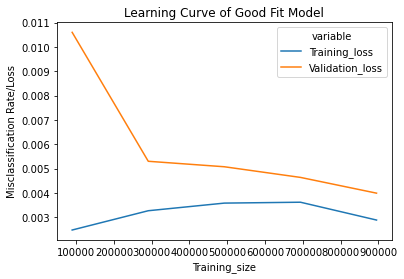

In [32]:
lc = learn_curve(X_train,y_train,1,rf) 
print_graph(lc)

In [30]:
%%time
xgb = xgb.XGBClassifier().fit(X_train, y_train)
xgb.fit(X_train,y_train)
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, xgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, xgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, xgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, xgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,xgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, xgb_test, average=None)))

[21:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9952691471678814
Precision of XGBoost: 0.9952793238167577
Recall of XGBoost: 0.9952691471678814
Average F1 of XGBoost: 0.9952706796664772
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      1.00      1.00       112
           2       0.99      0.99      0.99     5811

[21:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

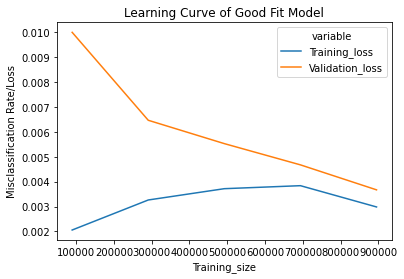

In [31]:
lc = learn_curve(X_train,y_train,1,xgb) 
print_graph(lc)

# XGBoost

In [50]:
%%time
xgb = xgb.XGBClassifier().fit(X_train, y_train)
xgb.fit(X_train,y_train)
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, xgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, xgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, xgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, xgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,xgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, xgb_test, average=None)))

[18:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9952549404026197
Precision of XGBoost: 0.9952638184670708
Recall of XGBoost: 0.9952549404026197
Average F1 of XGBoost: 0.9952563892686436
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      1.00      1.00       112
           2       0.99      0.99      0.99     5811

# HPO XGBoost

In [53]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    HPOxgb = xgb.XGBClassifier( **params)
    HPOxgb.fit(X_train, y_train)
    y_pred = HPOxgb.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

[18:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [63]:
%%time
HPOxgb = xgb.XGBClassifier(learning_rate= 0.4410013249561, n_estimators =85, max_depth = 68).fit(X_train,y_train)
HPOxgb.fit(X_train,y_train)
HPOxgb_train=HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost + Hyperparameter: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost + Hyperparameter: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost + Hyperparameter: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost + Hyperparameter: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

[22:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost + Hyperparameter: 0.9975280228444785
Precision of XGBoost + Hyperparameter: 0.9975295426823535
Recall of XGBoost + Hyperparameter: 0.9975280228444785
Average F1 of XGBoost + Hyperparameter: 0.9975277700247769
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      1.00     

[22:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[02:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

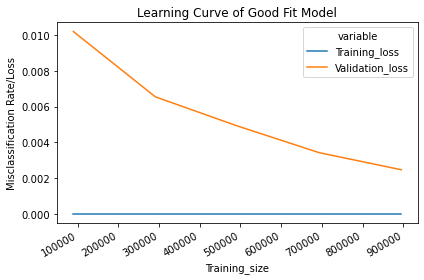

In [64]:
lc = learn_curve(X_train,y_train,1,HPOxgb) 
print_graph(lc)

In [ ]:
%%time
xgb = xgb.XGBClassifier().fit(X_train, y_train)
xgb.fit(X_train,y_train)
xgb_train = xgb.predict(X_train)
xgb_test = xgb.predict(X_test)

print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, xgb_test)))
print("Precision of XGBoost: "+ str(precision_score(y_test, xgb_test, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, xgb_test, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, xgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,xgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, xgb_test, average=None)))

In [83]:
%%time
HPOxgb = xgb.XGBClassifier(learning_rate= 0.4410013249561, n_estimators =85, max_depth = 68, 
                           colsample_bytree= 0.6655392754230048, gamma= 4.198875359789924, 
                           min_child_weight= 1.0, reg_alpha = 57.0, 
                           reg_lambda= 0.896332305739873).fit(X_train,y_train)
HPOxgb.fit(X_train,y_train)
HPOxgb_train=HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost + Hyperparameter: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost + Hyperparameter: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost + Hyperparameter: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost + Hyperparameter: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

[14:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost + Hyperparameter: 0.9944498903711281
Precision of XGBoost + Hyperparameter: 0.9944797710030547
Recall of XGBoost + Hyperparameter: 0.9944498903711281
Average F1 of XGBoost + Hyperparameter: 0.9944547118843813
 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       462
           1       0.98      1.00     

[14:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[16:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

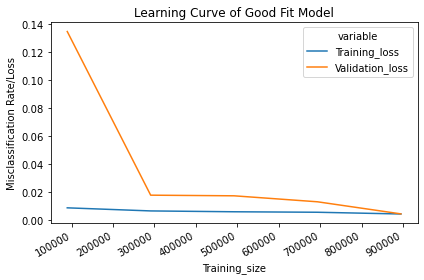

In [84]:
lcHPOxgb = learn_curve(X_train,y_train,1,HPOxgb) 
print_graph(lcHPOxgb)

In [37]:
%%time
HPOxgb = xgb.XGBClassifier(learning_rate= 0.4410013249561, n_estimators =85, max_depth = 68).fit(X_train,y_train)
HPOxgb.fit(X_train,y_train)
HPOxgb_train=HPOxgb.predict(X_train)
HPOxgb_test = HPOxgb.predict(X_test)

print("Accuracy of XGBoost + Hyperparameter: "+ str(accuracy_score(y_test, HPOxgb_test)))
print("Precision of XGBoost + Hyperparameter: "+ str(precision_score(y_test, HPOxgb_test, average='weighted')))
print("Recall of XGBoost + Hyperparameter: "+ str(recall_score(y_test, HPOxgb_test, average='weighted')))
print("Average F1 of XGBoost + Hyperparameter: "+ str(f1_score(y_test, HPOxgb_test, average='weighted')))
print(" ")
print(classification_report(y_test,HPOxgb_test))
print(" ")
print("F1-score for each type of attack: "+ str(f1_score(y_test, HPOxgb_test, average=None)))

[06:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:14:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost + Hyperparameter: 0.9975801143171045
Precision of XGBoost + Hyperparameter: 0.9975814576954711
Recall of XGBoost + Hyperparameter: 0.9975801143171045
Average F1 of XGBoost + Hyperparameter: 0.9975798839890851
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.99      1.00     

[07:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

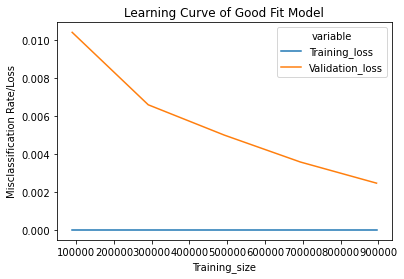

In [38]:
lc = learn_curve(X_train,y_train,1,HPOxgb) 
print_graph(lc)